In [9]:
import os
import matplotlib.pyplot as plt
import json
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
if not os.path.exists(f"data"):
    os.mkdir("data")

## 이미지에서 박스 부분만 추출하여 데이터 저장

# 개 고양이 나눠서
for dc,dc_eng in zip(["반려견","반려묘"],["dog","cat"]):

  #path=f"c:/Users/a/Downloads/반려동물피부질환/01.데이터/1_Training/2_라벨링데이터/{dc}/피부/일반카메라/유증상"

  if not os.path.exists(f"data/{dc_eng}"):
    os.mkdir(f"data/{dc_eng}")
  save_path=f"data/{dc_eng}"

  # 훈련 검증 데이터 나누기
  for tr_vl,tv_path in zip(["train","val"],["1_Training","2_Validation"]):
    path=f"c:/Users/a/Downloads/반려동물피부질환/01.데이터/{tv_path}/2_라벨링데이터/{dc}/피부/일반카메라/유증상"
    if not os.path.exists(f"{save_path}/{tr_vl}"):
      os.mkdir(f"{save_path}/{tr_vl}")

    # 병 폴더명 가져오기
    for i in os.listdir(path):

      if not os.path.exists(f"{save_path}/{tr_vl}/{i}"):
        os.mkdir(f"{save_path}/{tr_vl}/{i}")

      #병 폴더 속에 이미지 이름 가져오기
      i_list=set(map(lambda x: x.split(".")[0] ,os.listdir(f"{path}/{i}")))
      print(dc,tr_vl,i,len(i_list))
      for j in i_list:
        n=0

        # 이미지 가져와서
        try:
          img=plt.imread(f"{path}/{i}/{j}.jpg")
          # 박스값 가져와서
          with open(f"{path}/{i}/{j}.json","r") as f:
            k=json.load(f)["labelingInfo"][-1]["box"]["location"]
            for f in k:
              # 박스크기로 잘라서 다시 저장
              plt.imsave(f"{save_path}/{tr_vl}/{i}/{j}_{n}.jpg",img[f["y"]:f["y"]+f["height"],f["x"]:f["x"]+f["width"]])
              n+=1
        except:
          pass

반려견 train A1_구진_플라크 8706
반려견 train A2_비듬_각질_상피성잔고리 10647
반려견 train A3_태선화_과다색소침착 10533
반려견 train A4_농포_여드름 8734
반려견 train A5_미란_궤양 8450
반려견 train A6_결절_종괴 6106
반려견 val A1_구진_플라크 1088
반려견 val A2_비듬_각질_상피성잔고리 1331
반려견 val A3_태선화_과다색소침착 1317
반려견 val A4_농포_여드름 1092
반려견 val A5_미란_궤양 1056
반려견 val A6_결절_종괴 763
반려묘 train A2_비듬_각질_상피성잔고리 2704
반려묘 val A2_비듬_각질_상피성잔고리 338


In [ ]:
# 업데이트 데이터 처리
import os
import matplotlib.pyplot as plt
import json
from PIL import ImageFile
import cv2
ImageFile.LOAD_TRUNCATED_IMAGES = True
if not os.path.exists(f"datal"):
    os.mkdir("datal")

## 이미지에서 박스 부분만 추출하여 데이터 저장

# 개 고양이 나눠서
for dc,dc_eng in zip(["반려견","반려묘"],["dog","cat"]):

  #path=f"c:/Users/a/Downloads/반려동물피부질환/01.데이터/1_Training/2_라벨링데이터/{dc}/피부/일반카메라/유증상"

  if not os.path.exists(f"datal/{dc_eng}"):
    os.mkdir(f"datal/{dc_eng}")
  save_path=f"datal/{dc_eng}"

  # 훈련 검증 데이터 나누기
  for tr_vl,tv_path in zip(["train"],["1_Training"]):
    path=f"반려동물/{dc}/피부/일반카메라/무증상"
    if not os.path.exists(f"{save_path}/{tr_vl}"):
      os.mkdir(f"{save_path}/{tr_vl}")

    # 병 폴더명 가져오기
    for i in os.listdir(path):

      if not os.path.exists(f"{save_path}/{tr_vl}/{i}"):
        os.mkdir(f"{save_path}/{tr_vl}/{i}")

      #병 폴더 속에 이미지 이름 가져오기
      i_list=set(map(lambda x: x.split(".")[0] ,os.listdir(f"{path}/{i}")))
      print(dc,tr_vl,i,len(i_list))
      for j in i_list:
        n=0

        # 이미지 가져와서
        try:
          img=cv2.imread(f"{path}/{i}/{j}.jpg")
          # 박스값 가져와서
          with open(f"{path}/{i}/{j}.json","r") as f:
            k=json.load(f)["labelingInfo"][-1]["box"]["location"]
            for f in k:
              # 박스크기로 잘라서 다시 저장
              #cv2.resize()
              if f["height"]>480 and f["width"]>480:
                  aaa=img[f["y"]:f["y"]+f["height"],f["x"]:f["x"]+f["width"]]
                  aaa=cv2.resize(aaa,(224,224))
                  cv2.imsave(f"{save_path}/{tr_vl}/{i}/{j}_{n}.jpg",aaa)
                  n+=1
        except:
            print("e")
          

반려견 train A1_구진_플라크 32480
e
e
e
e


In [ ]:
import 

In [3]:
import os
t=os.listdir("datal/dog/true")
for i in t:
    a=os.listdir(f"datal/dog/true/{i}")
    if not os.path.exists(f"datal/dog/val/{i}/"):
        os.mkdir(f"datal/dog/val/{i}/")
    for j in a[0:4290:8]:
        os.rename(f"datal/dog/true/{i}/{j}",f"datal/dog/val/{i}/{j}")

In [1]:
import os
t=os.listdir("datal/dog/true")
t

['A1_구진_플라크',
 'A2_비듬_각질_상피성잔고리',
 'A3_태선화_과다색소침착',
 'A4_농포_여드름',
 'A5_미란_궤양',
 'A6_결절_종괴',
 'A7_무증상']

In [5]:
import os
t=os.listdir("datal/dog/true")
for i in ['A2_비듬_각질_상피성잔고리','A3_태선화_과다색소침착']:
    a=os.listdir(f"datal/dog/true/{i}")
    if not os.path.exists(f"datal/dog/dum/{i}/"):
        os.mkdir(f"datal/dog/dum/{i}/")
    for j in a[::2]:
        os.rename(f"datal/dog/true/{i}/{j}",f"datal/dog/dum/{i}/{j}")

In [1]:
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"



In [1]:
# 이미지 크기 200 이상만 
import os
import matplotlib.pyplot as plt
import shutil

os.mkdir("data/dog4")
os.mkdir("data/dog4/train")
os.mkdir("data/dog4/val")


for k in ["train","val"]:
    
    t=os.listdir(f"data/dog/{k}/")
    for i in t:
        if not os.path.exists(f"data/dog3/{k}/{i}"):
            os.mkdir(f"data/dog3/{k}/{i}")
        for j in os.listdir(f"data/dog/{k}/{i}"):
            x,y,_=plt.imread(f"data/dog/{k}/{i}/{j}").shape
            if x*y>90000:
                shutil.copyfile(f"data/dog/{k}/{i}/{j}",f"data/dog3/{k}/{i}/{j}")

In [ ]:
# 이미지 크기 200 이상만 
import os
import matplotlib.pyplot as plt
import shutil

os.mkdir("data/dog2")
os.mkdir("data/dog2/train")
os.mkdir("data/dog2/val")


for k,op in zip(["train","val"],[2600,160]):
    
    t=os.listdir(f"data/dog1/{k}/")
    for i in t:
        if not os.path.exists(f"data/dog2/{k}/{i}"):
            os.mkdir(f"data/dog2/{k}/{i}")
        for j in os.listdir(f"data/dog1/{k}/{i}")[:op]:
            
            #x,y,_=plt.imread(f"data/dog/{k}/{i}/{j}").shape
            #if x*y>20000:
            shutil.copyfile(f"data/dog1/{k}/{i}/{j}",f"data/dog2/{k}/{i}/{j}")

In [1]:
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"


import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        zoom_range=0.1,
                        #width_shift_range=0.1,
                        #height_shift_range=0.1,
                        rotation_range=15,
                        fill_mode='nearest',
                        )

b_s=16

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(224,224),
                                        classes=[#'A1_구진_플라크',
                                                 #'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(224,224),
                                        classes=[#'A1_구진_플라크',
                                                 #'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                                    pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
def build_trainable_model():
  model = Sequential([
      pre_base,
      Flatten(),
      Dense(2048,activation='relu'),
      Dropout(0.1),
      #BatchNormalization(),
      Dense(3,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = 'best_model_InceptionResNetV2_136.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=20)

pre_model = build_trainable_model()
pre_model.summary()

pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=30,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open("history_InceptionResNetV2_136.json","w") as f:
    f.write(json.dumps(history2.history))




#os.environ["CUDA_VISIBLE_DEVICES"]="-1"



Found 9307 images belonging to 3 classes.
Found 902 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 57,490,659
Trainable para

NameError: name 'history2' is not defined

In [2]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        zoom_range=0.1,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=15,
                        fill_mode='nearest',
                        )

b_s=16

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(224,224),
                                        classes=['A1_구진_플라크',
                                                 'A3_태선화_과다색소침착',
                                                 #'A4_농포_여드름',
                                                 #'A5_미란_궤양',
                                                 'A6_결절_종괴'],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(224,224),
                                        classes=['A1_구진_플라크',
                                                 'A3_태선화_과다색소침착',
                                                 #'A4_농포_여드름',
                                                 #'A5_미란_궤양',
                                                 'A6_결절_종괴'],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                                    pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
def build_trainable_model():
  model = Sequential([
      pre_base,
      Flatten(),
      Dense(2048,activation='relu'),
      Dropout(0.1),
      #Dropout(0.3),
      #BatchNormalization(),
      Dense(3,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = 'best_model_InceptionResNetV2_136.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=20)

pre_model = build_trainable_model()
pre_model.summary()

pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=30,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open("history_InceptionResNetV2_136.json","w") as f:
    f.write(json.dumps(history2.history))

Found 13199 images belonging to 3 classes.
Found 1895 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 57,490,659
Trainable pa

Epoch 16/30
825/825 [==============================] - ETA: 0s - loss: 0.5930 - accuracy: 0.7534 - auc: 0.9040 - precision: 0.7791 - recall: 0.7169
Epoch 16: val_loss improved from 0.69523 to 0.67723, saving model to best_model_InceptionResNetV2_136.h5
825/825 [==============================] - 270s 328ms/step - loss: 0.5930 - accuracy: 0.7534 - auc: 0.9040 - precision: 0.7791 - recall: 0.7169 - val_loss: 0.6772 - val_accuracy: 0.6913 - val_auc: 0.8703 - val_precision: 0.7309 - val_recall: 0.6422
Epoch 17/30
825/825 [==============================] - ETA: 0s - loss: 0.5843 - accuracy: 0.7556 - auc: 0.9062 - precision: 0.7768 - recall: 0.7260
Epoch 17: val_loss did not improve from 0.67723
825/825 [==============================] - 268s 325ms/step - loss: 0.5843 - accuracy: 0.7556 - auc: 0.9062 - precision: 0.7768 - recall: 0.7260 - val_loss: 0.8079 - val_accuracy: 0.6507 - val_auc: 0.8349 - val_precision: 0.6727 - val_recall: 0.6227
Epoch 18/30
825/825 [==============================] 

TypeError: write() argument must be str, not History

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        zoom_range=0.1,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=15,
                        fill_mode='nearest',
                        )

b_s=16

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(224,224),
                                        classes=['A1_구진_플라크',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(224,224),
                                        classes=['A1_구진_플라크',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                                    pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
def build_trainable_model():
  model = Sequential([
      pre_base,
      Flatten(),
      Dense(2048,activation='relu'),
      Dropout(0.1),
      #Dropout(0.3),
      #BatchNormalization(),
      Dense(5,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = 'best_model_InceptionResNetV2_13456.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=20)

pre_model = build_trainable_model()
pre_model.summary()

pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=30,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open("history_InceptionResNetV2_13456.json","w") as f:
    
    f.write(json.dumps(history2.history))

C:\Users\a\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Found 18894 images belonging to 5 classes.
Found 2240 images belonging to 5 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 57,494,757
Trainable pa

Epoch 16/30
1181/1181 [==============================] - ETA: 0s - loss: 0.9796 - accuracy: 0.6219 - auc: 0.8778 - precision: 0.7263 - recall: 0.4870
Epoch 16: val_loss did not improve from 1.09470
1181/1181 [==============================] - 380s 321ms/step - loss: 0.9796 - accuracy: 0.6219 - auc: 0.8778 - precision: 0.7263 - recall: 0.4870 - val_loss: 1.1715 - val_accuracy: 0.5339 - val_auc: 0.8256 - val_precision: 0.6263 - val_recall: 0.4018
Epoch 17/30
1181/1181 [==============================] - ETA: 0s - loss: 1.0142 - accuracy: 0.6034 - auc: 0.8687 - precision: 0.7149 - recall: 0.4588
Epoch 17: val_loss did not improve from 1.09470
1181/1181 [==============================] - 379s 321ms/step - loss: 1.0142 - accuracy: 0.6034 - auc: 0.8687 - precision: 0.7149 - recall: 0.4588 - val_loss: 1.2122 - val_accuracy: 0.5304 - val_auc: 0.8166 - val_precision: 0.6228 - val_recall: 0.4223
Epoch 18/30
1181/1181 [==============================] - ETA: 0s - loss: 0.9705 - accuracy: 0.6267 - a

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog2/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=16

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(224,224),
                                        classes=['A1_구진_플라크',
                                                 #'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(224,224),
                                        classes=['A1_구진_플라크',
                                                 #'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                                    pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
def build_trainable_model():
  model = Sequential([
      pre_base,
      Flatten(),
      Dense(2048,activation='relu'),
      #Dropout(0.4),
      #BatchNormalization(),
      #Dense(1024,activation='relu'),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #BatchNormalization(),
      Dense(5,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = 'best_model_InceptionResNetV2_123456.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open("history_InceptionResNetV2_123456.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 12269 images belonging to 5 classes.
Found 800 images belonging to 5 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dense_1 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 57,494,757
Trainable params: 57,434,213
Non-trainable params: 60,544
_________________________________________________________________
Epoch 1/100
767/767 [

767/767 [==============================] - 242s 316ms/step - loss: 1.0095 - accuracy: 0.5974 - auc: 0.8698 - precision: 0.7146 - recall: 0.4405 - val_loss: 1.5244 - val_accuracy: 0.4363 - val_auc: 0.7367 - val_precision: 0.5244 - val_recall: 0.3363
Epoch 17/100
767/767 [==============================] - ETA: 0s - loss: 0.9861 - accuracy: 0.6098 - auc: 0.8757 - precision: 0.7228 - recall: 0.4511
Epoch 17: val_loss did not improve from 1.30961
767/767 [==============================] - 241s 314ms/step - loss: 0.9861 - accuracy: 0.6098 - auc: 0.8757 - precision: 0.7228 - recall: 0.4511 - val_loss: 1.3822 - val_accuracy: 0.4700 - val_auc: 0.7707 - val_precision: 0.5675 - val_recall: 0.3363
Epoch 18/100
767/767 [==============================] - ETA: 0s - loss: 0.9821 - accuracy: 0.6083 - auc: 0.8767 - precision: 0.7231 - recall: 0.4594
Epoch 18: val_loss did not improve from 1.30961
767/767 [==============================] - 241s 314ms/step - loss: 0.9821 - accuracy: 0.6083 - auc: 0.8767 -

Epoch 35/100
767/767 [==============================] - ETA: 0s - loss: 0.8322 - accuracy: 0.6724 - auc: 0.9121 - precision: 0.7614 - recall: 0.5657
Epoch 35: val_loss did not improve from 1.30961
767/767 [==============================] - 242s 315ms/step - loss: 0.8322 - accuracy: 0.6724 - auc: 0.9121 - precision: 0.7614 - recall: 0.5657 - val_loss: 1.3666 - val_accuracy: 0.4800 - val_auc: 0.7869 - val_precision: 0.5524 - val_recall: 0.3887
Epoch 36/100
767/767 [==============================] - ETA: 0s - loss: 0.9475 - accuracy: 0.6276 - auc: 0.8858 - precision: 0.7355 - recall: 0.4807
Epoch 36: val_loss did not improve from 1.30961
767/767 [==============================] - 241s 315ms/step - loss: 0.9475 - accuracy: 0.6276 - auc: 0.8858 - precision: 0.7355 - recall: 0.4807 - val_loss: 1.4433 - val_accuracy: 0.4588 - val_auc: 0.7610 - val_precision: 0.5411 - val_recall: 0.3375
Epoch 37/100
767/767 [==============================] - ETA: 0s - loss: 0.9898 - accuracy: 0.6113 - auc: 0.8

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog/train"
val_path="data/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=16

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(224,224),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(224,224),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                                    pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
def build_trainable_model():
  model = Sequential([
      pre_base,
      Flatten(),
      Dense(1024,activation='relu'),
      Dropout(0.1),
      #BatchNormalization(),
      #Dense(1024,activation='relu'),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #BatchNormalization(),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = 'best_model_InceptionResNetV2_1234567.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open("history_InceptionResNetV2_1234567.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 53170 images belonging to 6 classes.
Found 6647 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 1024)              1573888   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 6)                 6150      
                                                                 
Total params: 55,916,774
Trainable pa

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog/train"
val_path="data/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(64,64),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(64,64),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2
pre_base = EfficientNetV2B2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(64, 64, 3),
                                    pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False

def build_trainable_model():
  model = Sequential([
      pre_base,
      Flatten(),
      Dense(1024,activation='relu'),
      Dropout(0.1),
      #BatchNormalization(),
      #Dense(1024,activation='relu'),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #BatchNormalization(),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = 'best_model_EfficientNetV2B2_1234567.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open("history_EfficientNetV2B2_1234567.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 53170 images belonging to 6 classes.
Found 6647 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b2 (Function  (None, 1408)             8769374   
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 1408)              0         
                                                                 
 dense (Dense)               (None, 1024)              1442816   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 6)                 6150      
                                                                 
Total params: 10,218,340
Trainable pa

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog/train"
val_path="data/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(75,75),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(75,75),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(75, 75, 3),
                                    pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_64_123456_2048"
def build_trainable_model():
  model = Sequential([
      pre_base,
      Flatten(),
      Dense(2048,activation='relu'),
      Dropout(0.2),
      #BatchNormalization(),
      #Dense(1024,activation='relu'),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #BatchNormalization(),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 53170 images belonging to 6 classes.
Found 6647 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 6)                 12294     
                                                                 
Total params: 57,496,806
Trainable pa

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(100,100),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(100,100),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(100, 100, 3),
                                    pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_100_123456_2048"
def build_trainable_model():
  model = Sequential([
      pre_base,
      Flatten(),
      Dense(2048,activation='relu'),
      Dropout(0.05),
      #BatchNormalization(),
      #Dense(1024,activation='relu'),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #BatchNormalization(),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 24016 images belonging to 6 classes.
Found 960 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 6)                 12294     
                                                                 
Total params: 57,496,806
Trainable par

751/751 [==============================] - ETA: 0s - loss: 1.2787 - accuracy: 0.5151 - auc: 0.8298 - precision: 0.6683 - recall: 0.3093
Epoch 16: val_loss did not improve from 1.56892
751/751 [==============================] - 105s 140ms/step - loss: 1.2787 - accuracy: 0.5151 - auc: 0.8298 - precision: 0.6683 - recall: 0.3093 - val_loss: 1.6996 - val_accuracy: 0.3438 - val_auc: 0.7165 - val_precision: 0.4350 - val_recall: 0.2125
Epoch 17/300
751/751 [==============================] - ETA: 0s - loss: 1.2428 - accuracy: 0.5261 - auc: 0.8400 - precision: 0.6825 - recall: 0.3337
Epoch 17: val_loss improved from 1.56892 to 1.54286, saving model to best_model_InceptionResNetV2_100_123456_2048.h5
751/751 [==============================] - 107s 142ms/step - loss: 1.2428 - accuracy: 0.5261 - auc: 0.8400 - precision: 0.6825 - recall: 0.3337 - val_loss: 1.5429 - val_accuracy: 0.3896 - val_auc: 0.7523 - val_precision: 0.5103 - val_recall: 0.2313
Epoch 18/300
751/751 [==============================

Epoch 34/300
751/751 [==============================] - ETA: 0s - loss: 1.2604 - accuracy: 0.5275 - auc: 0.8366 - precision: 0.6713 - recall: 0.3170
Epoch 34: val_loss did not improve from 1.46646
751/751 [==============================] - 104s 139ms/step - loss: 1.2604 - accuracy: 0.5275 - auc: 0.8366 - precision: 0.6713 - recall: 0.3170 - val_loss: 1.5335 - val_accuracy: 0.3854 - val_auc: 0.7489 - val_precision: 0.5491 - val_recall: 0.2156
Epoch 35/300
751/751 [==============================] - ETA: 0s - loss: 1.2267 - accuracy: 0.5424 - auc: 0.8450 - precision: 0.6795 - recall: 0.3415
Epoch 35: val_loss did not improve from 1.46646
751/751 [==============================] - 104s 139ms/step - loss: 1.2267 - accuracy: 0.5424 - auc: 0.8450 - precision: 0.6795 - recall: 0.3415 - val_loss: 1.6066 - val_accuracy: 0.3552 - val_auc: 0.7284 - val_precision: 0.4908 - val_recall: 0.1937
Epoch 36/300
751/751 [==============================] - ETA: 0s - loss: 1.2588 - accuracy: 0.5224 - auc: 0.8

751/751 [==============================] - 105s 139ms/step - loss: 1.2737 - accuracy: 0.5142 - auc: 0.8313 - precision: 0.6694 - recall: 0.3098 - val_loss: 1.6203 - val_accuracy: 0.3573 - val_auc: 0.7253 - val_precision: 0.4509 - val_recall: 0.2010
Epoch 53/300
751/751 [==============================] - ETA: 0s - loss: 1.3206 - accuracy: 0.4895 - auc: 0.8162 - precision: 0.6616 - recall: 0.2789
Epoch 53: val_loss did not improve from 1.46646
751/751 [==============================] - 105s 140ms/step - loss: 1.3206 - accuracy: 0.4895 - auc: 0.8162 - precision: 0.6616 - recall: 0.2789 - val_loss: 1.5776 - val_accuracy: 0.3542 - val_auc: 0.7253 - val_precision: 0.5050 - val_recall: 0.1583
Epoch 54/300
751/751 [==============================] - ETA: 0s - loss: 1.3046 - accuracy: 0.4988 - auc: 0.8218 - precision: 0.6621 - recall: 0.2917
Epoch 54: val_loss did not improve from 1.46646
751/751 [==============================] - 106s 140ms/step - loss: 1.3046 - accuracy: 0.4988 - auc: 0.8218 -

Epoch 71/300
751/751 [==============================] - ETA: 0s - loss: 1.1653 - accuracy: 0.5570 - auc: 0.8608 - precision: 0.6978 - recall: 0.3804
Epoch 71: val_loss did not improve from 1.46646
751/751 [==============================] - 105s 140ms/step - loss: 1.1653 - accuracy: 0.5570 - auc: 0.8608 - precision: 0.6978 - recall: 0.3804 - val_loss: 1.5569 - val_accuracy: 0.3677 - val_auc: 0.7552 - val_precision: 0.4780 - val_recall: 0.2604
Epoch 72/300
751/751 [==============================] - ETA: 0s - loss: 1.1369 - accuracy: 0.5670 - auc: 0.8677 - precision: 0.7022 - recall: 0.3937
Epoch 72: val_loss did not improve from 1.46646
751/751 [==============================] - 104s 139ms/step - loss: 1.1369 - accuracy: 0.5670 - auc: 0.8677 - precision: 0.7022 - recall: 0.3937 - val_loss: 1.5319 - val_accuracy: 0.3990 - val_auc: 0.7692 - val_precision: 0.4971 - val_recall: 0.2708
Epoch 73/300
751/751 [==============================] - ETA: 0s - loss: 1.1346 - accuracy: 0.5677 - auc: 0.8

751/751 [==============================] - 106s 141ms/step - loss: 1.1118 - accuracy: 0.5710 - auc: 0.8741 - precision: 0.7100 - recall: 0.4084 - val_loss: 1.8001 - val_accuracy: 0.3146 - val_auc: 0.6614 - val_precision: 0.3768 - val_recall: 0.1385
Epoch 90/300
751/751 [==============================] - ETA: 0s - loss: 1.1450 - accuracy: 0.5586 - auc: 0.8660 - precision: 0.6976 - recall: 0.3895
Epoch 90: val_loss did not improve from 1.46646
751/751 [==============================] - 105s 139ms/step - loss: 1.1450 - accuracy: 0.5586 - auc: 0.8660 - precision: 0.6976 - recall: 0.3895 - val_loss: 1.5466 - val_accuracy: 0.4000 - val_auc: 0.7655 - val_precision: 0.4951 - val_recall: 0.2635
Epoch 91/300
751/751 [==============================] - ETA: 0s - loss: 1.0963 - accuracy: 0.5827 - auc: 0.8776 - precision: 0.7158 - recall: 0.4163
Epoch 91: val_loss did not improve from 1.46646
751/751 [==============================] - 105s 139ms/step - loss: 1.0963 - accuracy: 0.5827 - auc: 0.8776 -

Epoch 108/300
751/751 [==============================] - ETA: 0s - loss: 1.0476 - accuracy: 0.6092 - auc: 0.8889 - precision: 0.7210 - recall: 0.4447
Epoch 108: val_loss did not improve from 1.46646
751/751 [==============================] - 105s 139ms/step - loss: 1.0476 - accuracy: 0.6092 - auc: 0.8889 - precision: 0.7210 - recall: 0.4447 - val_loss: 1.5657 - val_accuracy: 0.4062 - val_auc: 0.7616 - val_precision: 0.4866 - val_recall: 0.2656
Epoch 109/300
751/751 [==============================] - ETA: 0s - loss: 1.0455 - accuracy: 0.6026 - auc: 0.8891 - precision: 0.7191 - recall: 0.4483
Epoch 109: val_loss did not improve from 1.46646
751/751 [==============================] - 104s 138ms/step - loss: 1.0455 - accuracy: 0.6026 - auc: 0.8891 - precision: 0.7191 - recall: 0.4483 - val_loss: 1.5272 - val_accuracy: 0.4271 - val_auc: 0.7756 - val_precision: 0.5199 - val_recall: 0.2854
Epoch 110/300
751/751 [==============================] - ETA: 0s - loss: 1.0231 - accuracy: 0.6126 - auc

751/751 [==============================] - ETA: 0s - loss: 1.0137 - accuracy: 0.6142 - auc: 0.8958 - precision: 0.7375 - recall: 0.4770
Epoch 144: val_loss did not improve from 1.46646
751/751 [==============================] - 106s 141ms/step - loss: 1.0137 - accuracy: 0.6142 - auc: 0.8958 - precision: 0.7375 - recall: 0.4770 - val_loss: 1.6095 - val_accuracy: 0.4177 - val_auc: 0.7590 - val_precision: 0.4801 - val_recall: 0.2760
Epoch 145/300
751/751 [==============================] - ETA: 0s - loss: 0.9502 - accuracy: 0.6405 - auc: 0.9087 - precision: 0.7521 - recall: 0.5091
Epoch 145: val_loss did not improve from 1.46646
751/751 [==============================] - 106s 141ms/step - loss: 0.9502 - accuracy: 0.6405 - auc: 0.9087 - precision: 0.7521 - recall: 0.5091 - val_loss: 1.5318 - val_accuracy: 0.4292 - val_auc: 0.7850 - val_precision: 0.4967 - val_recall: 0.3146
Epoch 146/300
751/751 [==============================] - ETA: 0s - loss: 0.8961 - accuracy: 0.6596 - auc: 0.9187 - pre

751/751 [==============================] - ETA: 0s - loss: 0.8579 - accuracy: 0.6694 - auc: 0.9257 - precision: 0.7757 - recall: 0.5635
Epoch 180: val_loss did not improve from 1.46646
751/751 [==============================] - 106s 141ms/step - loss: 0.8579 - accuracy: 0.6694 - auc: 0.9257 - precision: 0.7757 - recall: 0.5635 - val_loss: 1.5841 - val_accuracy: 0.4427 - val_auc: 0.7912 - val_precision: 0.5093 - val_recall: 0.3427
Epoch 181/300
751/751 [==============================] - ETA: 0s - loss: 0.8128 - accuracy: 0.6922 - auc: 0.9333 - precision: 0.7810 - recall: 0.5869
Epoch 181: val_loss did not improve from 1.46646
751/751 [==============================] - 106s 141ms/step - loss: 0.8128 - accuracy: 0.6922 - auc: 0.9333 - precision: 0.7810 - recall: 0.5869 - val_loss: 1.6122 - val_accuracy: 0.4635 - val_auc: 0.7925 - val_precision: 0.5429 - val_recall: 0.3760
Epoch 182/300
751/751 [==============================] - ETA: 0s - loss: 0.7583 - accuracy: 0.7174 - auc: 0.9420 - pre

751/751 [==============================] - ETA: 0s - loss: 0.3622 - accuracy: 0.8675 - auc: 0.9858 - precision: 0.8974 - recall: 0.8279
Epoch 216: val_loss did not improve from 1.46646
751/751 [==============================] - 105s 140ms/step - loss: 0.3622 - accuracy: 0.8675 - auc: 0.9858 - precision: 0.8974 - recall: 0.8279 - val_loss: 2.3872 - val_accuracy: 0.4458 - val_auc: 0.7744 - val_precision: 0.4786 - val_recall: 0.4073
Epoch 217/300
751/751 [==============================] - ETA: 0s - loss: 0.3629 - accuracy: 0.8682 - auc: 0.9856 - precision: 0.8883 - recall: 0.8471
Epoch 217: val_loss did not improve from 1.46646
751/751 [==============================] - 106s 141ms/step - loss: 0.3629 - accuracy: 0.8682 - auc: 0.9856 - precision: 0.8883 - recall: 0.8471 - val_loss: 2.2349 - val_accuracy: 0.4906 - val_auc: 0.7884 - val_precision: 0.5092 - val_recall: 0.4594
Epoch 218/300
751/751 [==============================] - ETA: 0s - loss: 0.3607 - accuracy: 0.8684 - auc: 0.9859 - pre

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(100,100),
                                        classes=['A1_구진_플라크',
                                                 #'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 #'A4_농포_여드름',
                                                 #'A5_미란_궤양',
                                                 'A6_결절_종괴'],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(100,100),
                                        classes=['A1_구진_플라크',
                                                 #'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 #'A4_농포_여드름',
                                                 #'A5_미란_궤양',
                                                 'A6_결절_종괴'],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(100, 100, 3),
                                    pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_100_136_2048"
def build_trainable_model():
  model = Sequential([
      pre_base,
      Flatten(),
      Dense(2048,activation='relu'),
      Dropout(0.05),
      Dense(1024,activation='relu'),
      Dropout(0.2),
      #BatchNormalization(),
      #Dense(1024,activation='relu'),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #BatchNormalization(),
      Dense(3,activation='sigmoid')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 13199 images belonging to 3 classes.
Found 480 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 10

Epoch 16/300
413/413 [==============================] - ETA: 0s - loss: 0.4810 - accuracy: 0.6514 - auc: 0.8215 - precision: 0.6946 - recall: 0.5742
Epoch 16: val_loss did not improve from 0.49237
413/413 [==============================] - 57s 138ms/step - loss: 0.4810 - accuracy: 0.6514 - auc: 0.8215 - precision: 0.6946 - recall: 0.5742 - val_loss: 0.5399 - val_accuracy: 0.5625 - val_auc: 0.7677 - val_precision: 0.5904 - val_recall: 0.5104
Epoch 17/300
413/413 [==============================] - ETA: 0s - loss: 0.4687 - accuracy: 0.6736 - auc: 0.8381 - precision: 0.7095 - recall: 0.6013
Epoch 17: val_loss did not improve from 0.49237
413/413 [==============================] - 57s 137ms/step - loss: 0.4687 - accuracy: 0.6736 - auc: 0.8381 - precision: 0.7095 - recall: 0.6013 - val_loss: 1.1159 - val_accuracy: 0.6021 - val_auc: 0.7676 - val_precision: 0.6327 - val_recall: 0.5167
Epoch 18/300
413/413 [==============================] - ETA: 0s - loss: 0.4607 - accuracy: 0.6715 - auc: 0.841

413/413 [==============================] - ETA: 0s - loss: 0.4350 - accuracy: 0.6879 - auc: 0.8574 - precision: 0.7459 - recall: 0.6093
Epoch 52: val_loss did not improve from 0.45682
413/413 [==============================] - 58s 139ms/step - loss: 0.4350 - accuracy: 0.6879 - auc: 0.8574 - precision: 0.7459 - recall: 0.6093 - val_loss: 0.5649 - val_accuracy: 0.5625 - val_auc: 0.7650 - val_precision: 0.6104 - val_recall: 0.4896
Epoch 53/300
 66/413 [===>..........................] - ETA: 47s - loss: 0.4373 - accuracy: 0.6845 - auc: 0.8561 - precision: 0.7501 - recall: 0.6062

KeyboardInterrupt: 

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog2/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(112,112),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 #'A4_농포_여드름',
                                                 #'A5_미란_궤양',
                                                 #'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(112,112),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 #'A4_농포_여드름',
                                                 #'A5_미란_궤양',
                                                 #'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(112, 112, 3),
                                    pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_224_123_2048"
def build_trainable_model():
  model = Sequential([
      pre_base,
      Flatten(),
      Dense(2048,activation='relu'),
      Dropout(0.05),
      #Dense(1024,activation='relu'),
      #Dropout(0.2),
      #BatchNormalization(),
      #Dense(1024,activation='relu'),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #BatchNormalization(),
      Dense(3,activation='sigmoid')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 7800 images belonging to 3 classes.
Found 480 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 57,490,659
Trainable para

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(112,112),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(112,112),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(112, 112, 3),
                                    pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_112_123456_4096"
def build_trainable_model():
  model = Sequential([
      pre_base,
      Flatten(),
      Dense(4096,activation='relu'),
      Dropout(0.05),
      #Dense(1024,activation='relu'),
      #Dropout(0.2),
      #BatchNormalization(),
      #Dense(1024,activation='relu'),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #BatchNormalization(),
      Dense(6,activation='sigmoid')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 24016 images belonging to 6 classes.
Found 3093 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 4096)              6295552   
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 6)                 24582     
                                                                 
Total params: 60,656,870
Trainable pa

751/751 [==============================] - ETA: 0s - loss: 0.3066 - accuracy: 0.5726 - auc: 0.8677 - precision: 0.7063 - recall: 0.3999
Epoch 16: val_loss did not improve from 0.36162
751/751 [==============================] - 128s 171ms/step - loss: 0.3066 - accuracy: 0.5726 - auc: 0.8677 - precision: 0.7063 - recall: 0.3999 - val_loss: 0.7845 - val_accuracy: 0.4998 - val_auc: 0.8251 - val_precision: 0.5825 - val_recall: 0.3757
Epoch 17/300
167/751 [=====>........................] - ETA: 1:33 - loss: 0.2965 - accuracy: 0.5901 - auc: 0.8783 - precision: 0.7059 - recall: 0.4315

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(144,144),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(144,144),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(144, 144, 3),
                                    pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_112_123456_2048"
def build_trainable_model():
  model = Sequential([
      pre_base,
      Flatten(),
      Dense(2048,activation='relu'),
      Dropout(0.05),
      #Dense(1024,activation='relu'),
      #Dropout(0.2),
      #BatchNormalization(),
      #Dense(1024,activation='relu'),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #BatchNormalization(),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 24016 images belonging to 6 classes.
Found 3093 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 6)                 12294     
                                                                 
Total params: 57,496,806
Trainable pa

Epoch 16/300
751/751 [==============================] - ETA: 0s - loss: 0.9896 - accuracy: 0.6281 - auc: 0.9011 - precision: 0.7362 - recall: 0.4944
Epoch 16: val_loss improved from 1.23990 to 1.22774, saving model to best_model_InceptionResNetV2_112_123456_2048.h5
751/751 [==============================] - 194s 258ms/step - loss: 0.9896 - accuracy: 0.6281 - auc: 0.9011 - precision: 0.7362 - recall: 0.4944 - val_loss: 1.2277 - val_accuracy: 0.5293 - val_auc: 0.8517 - val_precision: 0.6158 - val_recall: 0.4135
Epoch 17/300
751/751 [==============================] - ETA: 0s - loss: 0.9805 - accuracy: 0.6322 - auc: 0.9029 - precision: 0.7414 - recall: 0.5020
Epoch 17: val_loss improved from 1.22774 to 1.22615, saving model to best_model_InceptionResNetV2_112_123456_2048.h5
751/751 [==============================] - 192s 256ms/step - loss: 0.9805 - accuracy: 0.6322 - auc: 0.9029 - precision: 0.7414 - recall: 0.5020 - val_loss: 1.2261 - val_accuracy: 0.5567 - val_auc: 0.8558 - val_precision

751/751 [==============================] - 190s 252ms/step - loss: 0.8976 - accuracy: 0.6578 - auc: 0.9187 - precision: 0.7589 - recall: 0.5436 - val_loss: 1.2026 - val_accuracy: 0.5658 - val_auc: 0.8636 - val_precision: 0.6452 - val_recall: 0.4468
Epoch 34/300
751/751 [==============================] - ETA: 0s - loss: 0.9010 - accuracy: 0.6599 - auc: 0.9182 - precision: 0.7583 - recall: 0.5448
Epoch 34: val_loss did not improve from 1.17015
751/751 [==============================] - 189s 251ms/step - loss: 0.9010 - accuracy: 0.6599 - auc: 0.9182 - precision: 0.7583 - recall: 0.5448 - val_loss: 1.4239 - val_accuracy: 0.5393 - val_auc: 0.8488 - val_precision: 0.6153 - val_recall: 0.4219
Epoch 35/300
751/751 [==============================] - ETA: 0s - loss: 0.8069 - accuracy: 0.6927 - auc: 0.9343 - precision: 0.7748 - recall: 0.5982
Epoch 35: val_loss did not improve from 1.17015
751/751 [==============================] - 189s 251ms/step - loss: 0.8069 - accuracy: 0.6927 - auc: 0.9343 -

Epoch 52/300
751/751 [==============================] - ETA: 0s - loss: 0.5368 - accuracy: 0.7955 - auc: 0.9700 - precision: 0.8389 - recall: 0.7476
Epoch 52: val_loss did not improve from 1.14375
751/751 [==============================] - 189s 252ms/step - loss: 0.5368 - accuracy: 0.7955 - auc: 0.9700 - precision: 0.8389 - recall: 0.7476 - val_loss: 1.2814 - val_accuracy: 0.5917 - val_auc: 0.8765 - val_precision: 0.6309 - val_recall: 0.5399
Epoch 53/300
751/751 [==============================] - ETA: 0s - loss: 0.5454 - accuracy: 0.7949 - auc: 0.9692 - precision: 0.8389 - recall: 0.7453
Epoch 53: val_loss did not improve from 1.14375
751/751 [==============================] - 189s 251ms/step - loss: 0.5454 - accuracy: 0.7949 - auc: 0.9692 - precision: 0.8389 - recall: 0.7453 - val_loss: 1.2637 - val_accuracy: 0.5681 - val_auc: 0.8674 - val_precision: 0.6261 - val_recall: 0.4960
Epoch 54/300
751/751 [==============================] - ETA: 0s - loss: 0.5573 - accuracy: 0.7874 - auc: 0.9

751/751 [==============================] - 189s 252ms/step - loss: 0.3537 - accuracy: 0.8666 - auc: 0.9863 - precision: 0.8889 - recall: 0.8443 - val_loss: 1.6409 - val_accuracy: 0.6085 - val_auc: 0.8688 - val_precision: 0.6318 - val_recall: 0.5865
Epoch 71/300
751/751 [==============================] - ETA: 0s - loss: 0.2832 - accuracy: 0.8944 - auc: 0.9908 - precision: 0.9092 - recall: 0.8801
Epoch 71: val_loss did not improve from 1.14375
751/751 [==============================] - 189s 252ms/step - loss: 0.2832 - accuracy: 0.8944 - auc: 0.9908 - precision: 0.9092 - recall: 0.8801 - val_loss: 1.7592 - val_accuracy: 0.5917 - val_auc: 0.8588 - val_precision: 0.6120 - val_recall: 0.5651
Epoch 72/300
751/751 [==============================] - ETA: 0s - loss: 0.3315 - accuracy: 0.8767 - auc: 0.9876 - precision: 0.8955 - recall: 0.8588
Epoch 72: val_loss did not improve from 1.14375
751/751 [==============================] - 189s 252ms/step - loss: 0.3315 - accuracy: 0.8767 - auc: 0.9876 -

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(144,144),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(144,144),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(144, 144, 3),
                                    pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_112_123456_2048"
def build_trainable_model():
  model = Sequential([
      pre_base,
      Flatten(),
      Dense(2048,activation='relu'),
      Dropout(0.1),
      #Dense(1024,activation='relu'),
      #Dropout(0.2),
      #BatchNormalization(),
      #Dense(1024,activation='relu'),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      BatchNormalization(),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 24016 images belonging to 6 classes.
Found 3093 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 batch_normalization_203 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                     

Epoch 16/100
751/751 [==============================] - ETA: 0s - loss: 1.2111 - accuracy: 0.5508 - auc: 0.8527 - precision: 0.6747 - recall: 0.3795
Epoch 16: val_loss did not improve from 1.31276
751/751 [==============================] - 189s 252ms/step - loss: 1.2111 - accuracy: 0.5508 - auc: 0.8527 - precision: 0.6747 - recall: 0.3795 - val_loss: 1.4501 - val_accuracy: 0.4888 - val_auc: 0.8211 - val_precision: 0.6056 - val_recall: 0.3004
Epoch 17/100
751/751 [==============================] - ETA: 0s - loss: 1.1935 - accuracy: 0.5569 - auc: 0.8568 - precision: 0.6894 - recall: 0.3905
Epoch 17: val_loss did not improve from 1.31276
751/751 [==============================] - 189s 252ms/step - loss: 1.1935 - accuracy: 0.5569 - auc: 0.8568 - precision: 0.6894 - recall: 0.3905 - val_loss: 1.7564 - val_accuracy: 0.5057 - val_auc: 0.8268 - val_precision: 0.6192 - val_recall: 0.3333
Epoch 18/100
751/751 [==============================] - ETA: 0s - loss: 1.1733 - accuracy: 0.5657 - auc: 0.8

KeyboardInterrupt: 

In [3]:
pre_model.save("InceptionResNetV2_112_123456_2048_last.h5")

Found 24016 images belonging to 6 classes.
Found 3093 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 batch_normalization_203 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                     

Epoch 16/100
751/751 [==============================] - ETA: 0s - loss: 1.1915 - accuracy: 0.5501 - auc: 0.8555 - precision: 0.6728 - recall: 0.3860
Epoch 16: val_loss did not improve from 1.53500
751/751 [==============================] - 188s 250ms/step - loss: 1.1915 - accuracy: 0.5501 - auc: 0.8555 - precision: 0.6728 - recall: 0.3860 - val_loss: 20.3746 - val_accuracy: 0.4543 - val_auc: 0.7424 - val_precision: 0.4964 - val_recall: 0.2713
Epoch 17/100
751/751 [==============================] - ETA: 0s - loss: 1.1373 - accuracy: 0.5708 - auc: 0.8686 - precision: 0.6910 - recall: 0.4171
Epoch 17: val_loss did not improve from 1.53500
751/751 [==============================] - 188s 250ms/step - loss: 1.1373 - accuracy: 0.5708 - auc: 0.8686 - precision: 0.6910 - recall: 0.4171 - val_loss: 5.5168 - val_accuracy: 0.5047 - val_auc: 0.8095 - val_precision: 0.5791 - val_recall: 0.3705
Epoch 18/100
751/751 [==============================] - ETA: 0s - loss: 1.1116 - accuracy: 0.5792 - auc: 0.

Epoch 34/100
751/751 [==============================] - ETA: 0s - loss: 0.8543 - accuracy: 0.6780 - auc: 0.9265 - precision: 0.7633 - recall: 0.5798
Epoch 34: val_loss did not improve from 1.21148
751/751 [==============================] - 188s 250ms/step - loss: 0.8543 - accuracy: 0.6780 - auc: 0.9265 - precision: 0.7633 - recall: 0.5798 - val_loss: 1.4621 - val_accuracy: 0.4737 - val_auc: 0.8032 - val_precision: 0.5590 - val_recall: 0.3353
Epoch 35/100
751/751 [==============================] - ETA: 0s - loss: 0.8297 - accuracy: 0.6893 - auc: 0.9305 - precision: 0.7722 - recall: 0.5939
Epoch 35: val_loss did not improve from 1.21148
751/751 [==============================] - 188s 250ms/step - loss: 0.8297 - accuracy: 0.6893 - auc: 0.9305 - precision: 0.7722 - recall: 0.5939 - val_loss: 1.2432 - val_accuracy: 0.5587 - val_auc: 0.8670 - val_precision: 0.6206 - val_recall: 0.4866
Epoch 36/100
751/751 [==============================] - ETA: 0s - loss: 0.8037 - accuracy: 0.6965 - auc: 0.9

751/751 [==============================] - 188s 251ms/step - loss: 0.4924 - accuracy: 0.8130 - auc: 0.9745 - precision: 0.8467 - recall: 0.7768 - val_loss: 10.2506 - val_accuracy: 0.5558 - val_auc: 0.8368 - val_precision: 0.5807 - val_recall: 0.5095
Epoch 53/100
751/751 [==============================] - ETA: 0s - loss: 0.4764 - accuracy: 0.8185 - auc: 0.9761 - precision: 0.8510 - recall: 0.7864
Epoch 53: val_loss did not improve from 1.21148
751/751 [==============================] - 189s 251ms/step - loss: 0.4764 - accuracy: 0.8185 - auc: 0.9761 - precision: 0.8510 - recall: 0.7864 - val_loss: 5.6922 - val_accuracy: 0.5745 - val_auc: 0.8578 - val_precision: 0.6116 - val_recall: 0.5396
Epoch 54/100
751/751 [==============================] - ETA: 0s - loss: 0.4605 - accuracy: 0.8253 - auc: 0.9775 - precision: 0.8545 - recall: 0.7963
Epoch 54: val_loss did not improve from 1.21148
751/751 [==============================] - 188s 250ms/step - loss: 0.4605 - accuracy: 0.8253 - auc: 0.9775 

Epoch 71/100
751/751 [==============================] - ETA: 0s - loss: 0.2764 - accuracy: 0.8979 - auc: 0.9911 - precision: 0.9110 - recall: 0.8867
Epoch 71: val_loss did not improve from 1.21148
751/751 [==============================] - 188s 251ms/step - loss: 0.2764 - accuracy: 0.8979 - auc: 0.9911 - precision: 0.9110 - recall: 0.8867 - val_loss: 32.9665 - val_accuracy: 0.5619 - val_auc: 0.8397 - val_precision: 0.5767 - val_recall: 0.5448
Epoch 72/100
751/751 [==============================] - ETA: 0s - loss: 0.2356 - accuracy: 0.9132 - auc: 0.9932 - precision: 0.9229 - recall: 0.9051
Epoch 72: val_loss did not improve from 1.21148
751/751 [==============================] - 188s 251ms/step - loss: 0.2356 - accuracy: 0.9132 - auc: 0.9932 - precision: 0.9229 - recall: 0.9051 - val_loss: 53.8178 - val_accuracy: 0.5865 - val_auc: 0.8462 - val_precision: 0.5996 - val_recall: 0.5732
Epoch 73/100
751/751 [==============================] - ETA: 0s - loss: 0.2649 - accuracy: 0.9046 - auc: 0

751/751 [==============================] - 189s 251ms/step - loss: 0.1574 - accuracy: 0.9442 - auc: 0.9965 - precision: 0.9488 - recall: 0.9397 - val_loss: 6.2761 - val_accuracy: 0.5710 - val_auc: 0.8203 - val_precision: 0.5802 - val_recall: 0.5542
Epoch 90/100
751/751 [==============================] - ETA: 0s - loss: 0.1586 - accuracy: 0.9438 - auc: 0.9963 - precision: 0.9491 - recall: 0.9395
Epoch 90: val_loss did not improve from 1.21148
751/751 [==============================] - 189s 251ms/step - loss: 0.1586 - accuracy: 0.9438 - auc: 0.9963 - precision: 0.9491 - recall: 0.9395 - val_loss: 17.9515 - val_accuracy: 0.5655 - val_auc: 0.8294 - val_precision: 0.5777 - val_recall: 0.5567
Epoch 91/100
751/751 [==============================] - ETA: 0s - loss: 0.1655 - accuracy: 0.9417 - auc: 0.9959 - precision: 0.9469 - recall: 0.9378
Epoch 91: val_loss did not improve from 1.21148
751/751 [==============================] - 189s 251ms/step - loss: 0.1655 - accuracy: 0.9417 - auc: 0.9959 

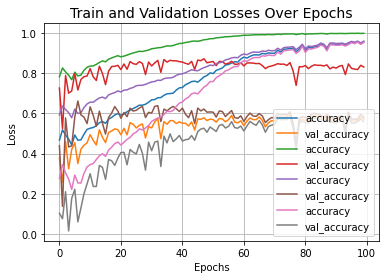

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(144,144),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(144,144),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(144, 144, 3),
                                    pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_112_123456_2048_2"
def build_trainable_model():
  model = Sequential([
      pre_base,
      Flatten(),
      Dense(2048,activation='relu'),
      Dropout(0.3),
      #Dense(1024,activation='relu'),
      #Dropout(0.2),
      #BatchNormalization(),
      #Dense(1024,activation='relu'),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      BatchNormalization(),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(144,144),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(144,144),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(144, 144, 3),
                                    pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_112_123456_no_2"
def build_trainable_model():
  model = Sequential([
      pre_base,
      Flatten(),
      #Dense(2048,activation='relu'),
      Dropout(0.3),
      #Dense(1024,activation='relu'),
      #Dropout(0.2),
      #BatchNormalization(),
      #Dense(1024,activation='relu'),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      BatchNormalization(),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 24016 images belonging to 6 classes.
Found 3093 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 6)                 9222      
                                     

Epoch 16/100
751/751 [==============================] - ETA: 0s - loss: 1.2152 - accuracy: 0.5535 - auc: 0.8533 - precision: 0.6817 - recall: 0.3819
Epoch 16: val_loss did not improve from 1.45410
751/751 [==============================] - 188s 250ms/step - loss: 1.2152 - accuracy: 0.5535 - auc: 0.8533 - precision: 0.6817 - recall: 0.3819 - val_loss: 1.9459 - val_accuracy: 0.4943 - val_auc: 0.8238 - val_precision: 0.5926 - val_recall: 0.3537
Epoch 17/100
751/751 [==============================] - ETA: 0s - loss: 1.1904 - accuracy: 0.5596 - auc: 0.8592 - precision: 0.6825 - recall: 0.3937
Epoch 17: val_loss improved from 1.45410 to 1.27823, saving model to best_model_InceptionResNetV2_112_123456_no_2.h5
751/751 [==============================] - 190s 252ms/step - loss: 1.1904 - accuracy: 0.5596 - auc: 0.8592 - precision: 0.6825 - recall: 0.3937 - val_loss: 1.2782 - val_accuracy: 0.5018 - val_auc: 0.8334 - val_precision: 0.6014 - val_recall: 0.3307
Epoch 18/100
751/751 [=================

751/751 [==============================] - ETA: 0s - loss: 0.7628 - accuracy: 0.7074 - auc: 0.9412 - precision: 0.7854 - recall: 0.6254
Epoch 52: val_loss did not improve from 1.18518
751/751 [==============================] - 188s 251ms/step - loss: 0.7628 - accuracy: 0.7074 - auc: 0.9412 - precision: 0.7854 - recall: 0.6254 - val_loss: 1.2197 - val_accuracy: 0.5813 - val_auc: 0.8723 - val_precision: 0.6370 - val_recall: 0.4879
Epoch 53/100
751/751 [==============================] - ETA: 0s - loss: 0.7433 - accuracy: 0.7192 - auc: 0.9441 - precision: 0.7921 - recall: 0.6367
Epoch 53: val_loss did not improve from 1.18518
751/751 [==============================] - 187s 249ms/step - loss: 0.7433 - accuracy: 0.7192 - auc: 0.9441 - precision: 0.7921 - recall: 0.6367 - val_loss: 1.4532 - val_accuracy: 0.5671 - val_auc: 0.8688 - val_precision: 0.6195 - val_recall: 0.5011
Epoch 54/100
751/751 [==============================] - ETA: 0s - loss: 0.7484 - accuracy: 0.7182 - auc: 0.9432 - precisi

751/751 [==============================] - 188s 250ms/step - loss: 0.5784 - accuracy: 0.7802 - auc: 0.9654 - precision: 0.8278 - recall: 0.7298 - val_loss: 6.0741 - val_accuracy: 0.5574 - val_auc: 0.8498 - val_precision: 0.6005 - val_recall: 0.5034
Epoch 71/100
751/751 [==============================] - ETA: 0s - loss: 0.5434 - accuracy: 0.7971 - auc: 0.9692 - precision: 0.8394 - recall: 0.7525
Epoch 71: val_loss did not improve from 1.18518
751/751 [==============================] - 187s 249ms/step - loss: 0.5434 - accuracy: 0.7971 - auc: 0.9692 - precision: 0.8394 - recall: 0.7525 - val_loss: 4.4273 - val_accuracy: 0.5483 - val_auc: 0.8451 - val_precision: 0.5765 - val_recall: 0.5141
Epoch 72/100
751/751 [==============================] - ETA: 0s - loss: 0.5205 - accuracy: 0.8039 - auc: 0.9718 - precision: 0.8422 - recall: 0.7621
Epoch 72: val_loss did not improve from 1.18518
751/751 [==============================] - 188s 250ms/step - loss: 0.5205 - accuracy: 0.8039 - auc: 0.9718 -

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(144,144),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(144,144),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(144, 144, 3),
                                    pooling='avg')
pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_vgg19_112_123456_no_2"
def build_trainable_model():
  model = Sequential([
     # pre_base,
      pre_base2,
      Flatten(),
      #Dense(2048,activation='relu'),
      Dropout(0.3),
      #Dense(1024,activation='relu'),
      #Dropout(0.2),
      #BatchNormalization(),
      #Dense(1024,activation='relu'),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      BatchNormalization(),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 24016 images belonging to 6 classes.
Found 3093 images belonging to 6 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_407 (Ba  (None, 512)              2048      
 tchNormalization)                                               
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 20,029,510
Trainable 

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(144,144),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(144,144),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(144, 144, 3),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_all_112_123456_no_2"
def build_trainable_model():
  model = Sequential([
      pre_base,
     # pre_base2,
      Flatten(),
      Dense(2048,activation='relu'),
      Dropout(0.5),
      Dense(1024,activation='relu'),
      Dropout(0.2),
      Dense(512,activation='relu'),
      BatchNormalization(),
      Dense(256,activation='relu'),
      BatchNormalization(),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      Dense(128,activation='relu'),
      BatchNormalization(),
      Dense(64,activation='relu'),
      BatchNormalization(),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 24016 images belonging to 6 classes.
Found 3093 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(144,144),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(144,144),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(144, 144, 3),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_all_112_123456_no_la"
def build_trainable_model():
  model = Sequential([
      pre_base,
     # pre_base2,
      Flatten(),
      Dense(2048,activation='relu'),
      Dropout(0.5),
      Dense(1024,activation='relu'),
      Dropout(0.2),
      Dense(512,activation='relu'),
      BatchNormalization(),
      Dense(256,activation='relu'),
      BatchNormalization(),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      Dense(128,activation='relu'),
      BatchNormalization(),
      Dense(64,activation='relu'),
      BatchNormalization(),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 24016 images belonging to 6 classes.
Found 3093 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1

Epoch 12/300
751/751 [==============================] - ETA: 0s - loss: 1.2285 - accuracy: 0.5459 - auc: 0.8442 - precision: 0.6804 - recall: 0.3750
Epoch 12: val_loss did not improve from 1.35307
751/751 [==============================] - 192s 256ms/step - loss: 1.2285 - accuracy: 0.5459 - auc: 0.8442 - precision: 0.6804 - recall: 0.3750 - val_loss: 1.8989 - val_accuracy: 0.5011 - val_auc: 0.8143 - val_precision: 0.6046 - val_recall: 0.3214
Epoch 13/300
751/751 [==============================] - ETA: 0s - loss: 1.2265 - accuracy: 0.5454 - auc: 0.8447 - precision: 0.6816 - recall: 0.3794
Epoch 13: val_loss did not improve from 1.35307
751/751 [==============================] - 192s 255ms/step - loss: 1.2265 - accuracy: 0.5454 - auc: 0.8447 - precision: 0.6816 - recall: 0.3794 - val_loss: 11.2943 - val_accuracy: 0.4568 - val_auc: 0.7619 - val_precision: 0.5581 - val_recall: 0.2548
Epoch 14/300
751/751 [==============================] - ETA: 0s - loss: 1.2509 - accuracy: 0.5304 - auc: 0.

751/751 [==============================] - 192s 255ms/step - loss: 1.2509 - accuracy: 0.5361 - auc: 0.8371 - precision: 0.6828 - recall: 0.3543 - val_loss: 16.9667 - val_accuracy: 0.4475 - val_auc: 0.7755 - val_precision: 0.5540 - val_recall: 0.2887
Epoch 31/300
751/751 [==============================] - ETA: 0s - loss: 1.1979 - accuracy: 0.5570 - auc: 0.8524 - precision: 0.6909 - recall: 0.3919
Epoch 31: val_loss did not improve from 1.35307
751/751 [==============================] - 192s 255ms/step - loss: 1.1979 - accuracy: 0.5570 - auc: 0.8524 - precision: 0.6909 - recall: 0.3919 - val_loss: 1.5997 - val_accuracy: 0.5079 - val_auc: 0.8282 - val_precision: 0.6179 - val_recall: 0.3702
Epoch 32/300
751/751 [==============================] - ETA: 0s - loss: 1.1689 - accuracy: 0.5676 - auc: 0.8600 - precision: 0.6988 - recall: 0.4031
Epoch 32: val_loss did not improve from 1.35307
751/751 [==============================] - 192s 255ms/step - loss: 1.1689 - accuracy: 0.5676 - auc: 0.8600 

Epoch 49/300
751/751 [==============================] - ETA: 0s - loss: 0.9799 - accuracy: 0.6401 - auc: 0.9031 - precision: 0.7443 - recall: 0.5172
Epoch 49: val_loss did not improve from 1.25227
751/751 [==============================] - 191s 255ms/step - loss: 0.9799 - accuracy: 0.6401 - auc: 0.9031 - precision: 0.7443 - recall: 0.5172 - val_loss: 1.6224 - val_accuracy: 0.5312 - val_auc: 0.8514 - val_precision: 0.6236 - val_recall: 0.4061
Epoch 50/300
751/751 [==============================] - ETA: 0s - loss: 0.9571 - accuracy: 0.6479 - auc: 0.9076 - precision: 0.7487 - recall: 0.5289
Epoch 50: val_loss did not improve from 1.25227
751/751 [==============================] - 192s 255ms/step - loss: 0.9571 - accuracy: 0.6479 - auc: 0.9076 - precision: 0.7487 - recall: 0.5289 - val_loss: 1.3307 - val_accuracy: 0.5584 - val_auc: 0.8628 - val_precision: 0.6490 - val_recall: 0.4358
Epoch 51/300
751/751 [==============================] - ETA: 0s - loss: 0.9583 - accuracy: 0.6487 - auc: 0.9

751/751 [==============================] - 192s 255ms/step - loss: 0.7286 - accuracy: 0.7328 - auc: 0.9464 - precision: 0.7970 - recall: 0.6576 - val_loss: 12.2556 - val_accuracy: 0.5771 - val_auc: 0.8614 - val_precision: 0.6175 - val_recall: 0.5089
Epoch 86/300
751/751 [==============================] - ETA: 0s - loss: 0.7092 - accuracy: 0.7394 - auc: 0.9491 - precision: 0.8021 - recall: 0.6695
Epoch 86: val_loss did not improve from 1.19821
751/751 [==============================] - 192s 255ms/step - loss: 0.7092 - accuracy: 0.7394 - auc: 0.9491 - precision: 0.8021 - recall: 0.6695 - val_loss: 4.7896 - val_accuracy: 0.5774 - val_auc: 0.8708 - val_precision: 0.6209 - val_recall: 0.5147
Epoch 87/300
751/751 [==============================] - ETA: 0s - loss: 0.7316 - accuracy: 0.7293 - auc: 0.9460 - precision: 0.7980 - recall: 0.6567
Epoch 87: val_loss did not improve from 1.19821
751/751 [==============================] - 192s 255ms/step - loss: 0.7316 - accuracy: 0.7293 - auc: 0.9460 

Epoch 104/300
751/751 [==============================] - ETA: 0s - loss: 0.4486 - accuracy: 0.8384 - auc: 0.9786 - precision: 0.8685 - recall: 0.8100
Epoch 104: val_loss did not improve from 1.19821
751/751 [==============================] - 192s 256ms/step - loss: 0.4486 - accuracy: 0.8384 - auc: 0.9786 - precision: 0.8685 - recall: 0.8100 - val_loss: 709.4805 - val_accuracy: 0.5849 - val_auc: 0.8713 - val_precision: 0.6233 - val_recall: 0.5318
Epoch 105/300
751/751 [==============================] - ETA: 0s - loss: 0.4156 - accuracy: 0.8511 - auc: 0.9814 - precision: 0.8786 - recall: 0.8258
Epoch 105: val_loss did not improve from 1.19821
751/751 [==============================] - 192s 255ms/step - loss: 0.4156 - accuracy: 0.8511 - auc: 0.9814 - precision: 0.8786 - recall: 0.8258 - val_loss: 1128.6993 - val_accuracy: 0.5839 - val_auc: 0.8714 - val_precision: 0.6197 - val_recall: 0.5506
Epoch 106/300
751/751 [==============================] - ETA: 0s - loss: 0.4094 - accuracy: 0.8512 

751/751 [==============================] - ETA: 0s - loss: 0.2402 - accuracy: 0.9146 - auc: 0.9930 - precision: 0.9243 - recall: 0.9042
Epoch 140: val_loss did not improve from 1.19821
751/751 [==============================] - 192s 256ms/step - loss: 0.2402 - accuracy: 0.9146 - auc: 0.9930 - precision: 0.9243 - recall: 0.9042 - val_loss: 14209.3125 - val_accuracy: 0.5768 - val_auc: 0.8482 - val_precision: 0.5934 - val_recall: 0.5600
Epoch 141/300
751/751 [==============================] - ETA: 0s - loss: 0.2145 - accuracy: 0.9231 - auc: 0.9942 - precision: 0.9319 - recall: 0.9152
Epoch 141: val_loss did not improve from 1.19821
751/751 [==============================] - 192s 255ms/step - loss: 0.2145 - accuracy: 0.9231 - auc: 0.9942 - precision: 0.9319 - recall: 0.9152 - val_loss: 189.1963 - val_accuracy: 0.5373 - val_auc: 0.8252 - val_precision: 0.5504 - val_recall: 0.5186
Epoch 142/300
751/751 [==============================] - ETA: 0s - loss: 0.2311 - accuracy: 0.9185 - auc: 0.9931

751/751 [==============================] - ETA: 0s - loss: 0.1535 - accuracy: 0.9480 - auc: 0.9962 - precision: 0.9527 - recall: 0.9440
Epoch 176: val_loss did not improve from 1.19821
751/751 [==============================] - 192s 255ms/step - loss: 0.1535 - accuracy: 0.9480 - auc: 0.9962 - precision: 0.9527 - recall: 0.9440 - val_loss: 2406.0510 - val_accuracy: 0.5710 - val_auc: 0.8436 - val_precision: 0.5838 - val_recall: 0.5574
Epoch 177/300
751/751 [==============================] - ETA: 0s - loss: 0.1332 - accuracy: 0.9548 - auc: 0.9973 - precision: 0.9592 - recall: 0.9515
Epoch 177: val_loss did not improve from 1.19821
751/751 [==============================] - 192s 255ms/step - loss: 0.1332 - accuracy: 0.9548 - auc: 0.9973 - precision: 0.9592 - recall: 0.9515 - val_loss: 3724.0571 - val_accuracy: 0.5904 - val_auc: 0.8503 - val_precision: 0.6013 - val_recall: 0.5787
Epoch 178/300
751/751 [==============================] - ETA: 0s - loss: 0.1878 - accuracy: 0.9338 - auc: 0.9950

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog2/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(144,144),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(144,144),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(144, 144, 3),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_all_112_123456_no_2"
def build_trainable_model():
  model = Sequential([
      pre_base,
     # pre_base2,
      Flatten(),
      Dense(2048,activation='relu'),
      Dropout(0.2),
      #Dense(1024,activation='relu'),
      #Dropout(0.2),
      #Dense(512,activation='relu'),
      #BatchNormalization(),
      #Dense(256,activation='relu'),
     # BatchNormalization(),
      #Dropout(0.3),
      #Dropout(0.2),
      Dense(128,activation='relu'),
      Dropout(0.2),
      #Dense(128,activation='relu'),
      #BatchNormalization(),
      #Dense(64,activation='relu'),
      #BatchNormalization(),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 14869 images belonging to 6 classes.
Found 960 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 12

465/465 [==============================] - 113s 243ms/step - loss: 1.4388 - accuracy: 0.4468 - auc: 0.7769 - precision: 0.6638 - recall: 0.1791 - val_loss: 1.5963 - val_accuracy: 0.3771 - val_auc: 0.7347 - val_precision: 0.5797 - val_recall: 0.1781
Epoch 16/300
465/465 [==============================] - ETA: 0s - loss: 1.3580 - accuracy: 0.4885 - auc: 0.8057 - precision: 0.6731 - recall: 0.2290
Epoch 16: val_loss did not improve from 1.53272
465/465 [==============================] - 114s 244ms/step - loss: 1.3580 - accuracy: 0.4885 - auc: 0.8057 - precision: 0.6731 - recall: 0.2290 - val_loss: 1.6133 - val_accuracy: 0.4260 - val_auc: 0.7493 - val_precision: 0.5635 - val_recall: 0.2125
Epoch 17/300
465/465 [==============================] - ETA: 0s - loss: 1.3276 - accuracy: 0.5035 - auc: 0.8153 - precision: 0.6917 - recall: 0.2555
Epoch 17: val_loss did not improve from 1.53272
465/465 [==============================] - 114s 244ms/step - loss: 1.3276 - accuracy: 0.5035 - auc: 0.8153 -

Epoch 34/300
465/465 [==============================] - ETA: 0s - loss: 1.1071 - accuracy: 0.5830 - auc: 0.8757 - precision: 0.7347 - recall: 0.3966
Epoch 34: val_loss did not improve from 1.42488
465/465 [==============================] - 113s 244ms/step - loss: 1.1071 - accuracy: 0.5830 - auc: 0.8757 - precision: 0.7347 - recall: 0.3966 - val_loss: 4.8424 - val_accuracy: 0.4510 - val_auc: 0.7738 - val_precision: 0.5224 - val_recall: 0.3156
Epoch 35/300
465/465 [==============================] - ETA: 0s - loss: 1.0720 - accuracy: 0.5977 - auc: 0.8835 - precision: 0.7409 - recall: 0.4176
Epoch 35: val_loss did not improve from 1.42488
465/465 [==============================] - 114s 245ms/step - loss: 1.0720 - accuracy: 0.5977 - auc: 0.8835 - precision: 0.7409 - recall: 0.4176 - val_loss: 1.4475 - val_accuracy: 0.4656 - val_auc: 0.7961 - val_precision: 0.5576 - val_recall: 0.3177
Epoch 36/300
465/465 [==============================] - ETA: 0s - loss: 1.1025 - accuracy: 0.5871 - auc: 0.8

465/465 [==============================] - 113s 243ms/step - loss: 0.8947 - accuracy: 0.6629 - auc: 0.9193 - precision: 0.7776 - recall: 0.5337 - val_loss: 4.4158 - val_accuracy: 0.4677 - val_auc: 0.7956 - val_precision: 0.5383 - val_recall: 0.3729
Epoch 53/300
465/465 [==============================] - ETA: 0s - loss: 0.8385 - accuracy: 0.6855 - auc: 0.9291 - precision: 0.7854 - recall: 0.5697
Epoch 53: val_loss did not improve from 1.42488
465/465 [==============================] - 113s 244ms/step - loss: 0.8385 - accuracy: 0.6855 - auc: 0.9291 - precision: 0.7854 - recall: 0.5697 - val_loss: 32.4836 - val_accuracy: 0.4542 - val_auc: 0.7960 - val_precision: 0.5329 - val_recall: 0.3625
Epoch 54/300
465/465 [==============================] - ETA: 0s - loss: 1.0002 - accuracy: 0.6245 - auc: 0.8987 - precision: 0.7638 - recall: 0.4660
Epoch 54: val_loss did not improve from 1.42488
465/465 [==============================] - 114s 244ms/step - loss: 1.0002 - accuracy: 0.6245 - auc: 0.8987 

Epoch 71/300
465/465 [==============================] - ETA: 0s - loss: 0.5980 - accuracy: 0.7777 - auc: 0.9633 - precision: 0.8367 - recall: 0.7146
Epoch 71: val_loss did not improve from 1.42488
465/465 [==============================] - 113s 243ms/step - loss: 0.5980 - accuracy: 0.7777 - auc: 0.9633 - precision: 0.8367 - recall: 0.7146 - val_loss: 80.6364 - val_accuracy: 0.4521 - val_auc: 0.7843 - val_precision: 0.5045 - val_recall: 0.4073
Epoch 72/300
465/465 [==============================] - ETA: 0s - loss: 0.5915 - accuracy: 0.7771 - auc: 0.9641 - precision: 0.8339 - recall: 0.7171
Epoch 72: val_loss did not improve from 1.42488
465/465 [==============================] - 113s 242ms/step - loss: 0.5915 - accuracy: 0.7771 - auc: 0.9641 - precision: 0.8339 - recall: 0.7171 - val_loss: 45.3201 - val_accuracy: 0.4875 - val_auc: 0.7829 - val_precision: 0.5197 - val_recall: 0.4406
Epoch 73/300
465/465 [==============================] - ETA: 0s - loss: 0.5587 - accuracy: 0.7913 - auc: 0

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog2/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(112,112),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(112,112),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(112, 112, 3),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_all_112_123456_no_2dn1"
def build_trainable_model():
  model = Sequential([
      pre_base,
     # pre_base2,
      Flatten(),
      Dense(2048,activation='relu'),
      Dropout(0.1),
      #Dense(1024,activation='relu'),
      #Dropout(0.2),
      #Dense(512,activation='relu'),
      #BatchNormalization(),
      #Dense(256,activation='relu'),
     # BatchNormalization(),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #BatchNormalization(),
      #Dense(64,activation='relu'),
      #BatchNormalization(),
      Dense(6,activation='sigmoid')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 14869 images belonging to 6 classes.
Found 960 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 6)                 12294     
                                                                 
Total params: 57,496,806
Trainable par

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall,F
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog2/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=12

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(112,112),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(112,112),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7
pre_base = EfficientNetB7(include_top=False, weights='imagenet', input_tensor=None, input_shape=(112, 112, 3),
                                    pooling='max')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="EfficientNetB7_all_112_123456_no_2dn1"
def build_trainable_model():
  model = Sequential([
      pre_base,
     # pre_base2,
      Flatten(),
      Dense(1234,activation='relu'),
      Dropout(0.1),
      #Dense(1024,activation='relu'),
      #Dropout(0.2),
      #Dense(512,activation='relu'),
      #BatchNormalization(),
      #Dense(256,activation='relu'),
     # BatchNormalization(),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #BatchNormalization(),
      #Dense(64,activation='relu'),
      #BatchNormalization(),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 14869 images belonging to 6 classes.
Found 960 images belonging to 6 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 2560)             64097687  
                                                                 
 flatten_1 (Flatten)         (None, 2560)              0         
                                                                 
 dense_2 (Dense)             (None, 1234)              3160274   
                                                                 
 dropout_1 (Dropout)         (None, 1234)              0         
                                                                 
 dense_3 (Dense)             (None, 6)                 7410      
                                                                 
Total params: 67,265,371
Trainable params: 66,954,644
Non-trainable params: 310,727
__________________

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog2/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=50

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(112,112),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(112,112),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = EfficientNetV2S(include_top=False, weights='imagenet', input_tensor=None, input_shape=(112, 112, 3),
                                    pooling='max')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="EfficientNetV2S_all_112_123456_666"
def build_trainable_model():
  model = Sequential([
      pre_base,
     # pre_base2,
      Flatten(),
      Dense(666,activation='relu'),
      Dropout(0.1),
      Dense(1024,activation='relu'),
      Dropout(0.2),
      Dense(512,activation='relu'),
      BatchNormalization(),
      Dense(256,activation='relu'),
      BatchNormalization(),
      Dropout(0.3),
      #Dropout(0.2),
      Dense(128,activation='relu'),
      Dropout(0.2),
      Dense(128,activation='relu'),
      BatchNormalization(),
      Dense(64,activation='relu'),
      BatchNormalization(),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 14869 images belonging to 6 classes.
Found 960 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Functiona  (None, 1280)             20331360  
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 666)               853146    
                                                                 
 dropout (Dropout)           (None, 666)               0         
                                                                 
 dense_1 (Dense)             (None, 1024)              683008    
                                                                 
 dropout_1 (Dropout)         (None, 10

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog2/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=20

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(112,112),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 #'A4_농포_여드름',
                                                 #'A5_미란_궤양',
                                                 #'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(112,112),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 #'A4_농포_여드름',
                                                 #'A5_미란_궤양',
                                                 #'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(112, 112, 3),
                                    pooling='max')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_all_112_123_"
def build_trainable_model():
  model = Sequential([
      pre_base,
     # pre_base2,
      Flatten(),
      Dense(2048,activation='relu'),
      #Dropout(0.1),
      #Dense(1024,activation='relu'),
      #Dropout(0.2),
      #Dense(512,activation='relu'),
      #BatchNormalization(),
      #Dense(256,activation='relu'),
      #BatchNormalization(),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #BatchNormalization(),
      #Dense(64,activation='relu'),
      #BatchNormalization(),
      Dense(3,activation='sigmoid')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=200)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog2/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=30

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(112,112),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 #'A4_농포_여드름',
                                                 #'A5_미란_궤양',
                                                 #'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(112,112),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 #'A4_농포_여드름',
                                                 #'A5_미란_궤양',
                                                 #'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(112, 112, 3),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_all_112_123_s"
def build_trainable_model():
  model = Sequential([
      pre_base,
     # pre_base2,
      Flatten(),
      Dense(2048,activation='relu'),
      #Dropout(0.1),
      #Dense(1024,activation='relu'),
      #Dropout(0.2),
      #Dense(512,activation='relu'),
      #BatchNormalization(),
      #Dense(256,activation='relu'),
      #BatchNormalization(),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #BatchNormalization(),
      #Dense(64,activation='relu'),
      #BatchNormalization(),
      Dense(3,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=100)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.000213388, decay=1e-5, momentum=0.999, nesterov=True)

pre_model.compile(optimizer=optimizer,loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 7800 images belonging to 3 classes.
Found 480 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dense_1 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 57,490,659
Trainable params: 57,430,115
Non-trainable params: 60,544
_________________________________________________________________
Epoch 1/100
260/260 [=

Epoch 16/100
260/260 [==============================] - ETA: 0s - loss: 0.8221 - accuracy: 0.6290 - auc: 0.8097 - precision: 0.6885 - recall: 0.5167
Epoch 16: val_loss did not improve from 0.89311
260/260 [==============================] - 41s 157ms/step - loss: 0.8221 - accuracy: 0.6290 - auc: 0.8097 - precision: 0.6885 - recall: 0.5167 - val_loss: 0.9488 - val_accuracy: 0.5813 - val_auc: 0.7562 - val_precision: 0.6369 - val_recall: 0.4750
Epoch 17/100
260/260 [==============================] - ETA: 0s - loss: 0.8092 - accuracy: 0.6369 - auc: 0.8160 - precision: 0.6987 - recall: 0.5279
Epoch 17: val_loss did not improve from 0.89311
260/260 [==============================] - 41s 157ms/step - loss: 0.8092 - accuracy: 0.6369 - auc: 0.8160 - precision: 0.6987 - recall: 0.5279 - val_loss: 0.9391 - val_accuracy: 0.5750 - val_auc: 0.7590 - val_precision: 0.6267 - val_recall: 0.4792
Epoch 18/100
260/260 [==============================] - ETA: 0s - loss: 0.7974 - accuracy: 0.6386 - auc: 0.821

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog2/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=30

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(112,112),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 #'A4_농포_여드름',
                                                 #'A5_미란_궤양',
                                                 #'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(112,112),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 #'A4_농포_여드름',
                                                 #'A5_미란_궤양',
                                                 #'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(112, 112, 3),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_all_112_123_s"
def build_trainable_model():
  model = Sequential([
      pre_base,
     # pre_base2,
      #Flatten(),
      Dense(2048,activation='relu'),
      Dropout(0.2),
      #Dense(1024,activation='relu'),
      #Dropout(0.2),
      #Dense(512,activation='relu'),
      #BatchNormalization(),
      #Dense(256,activation='relu'),
      #BatchNormalization(),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #BatchNormalization(),
      #Dense(64,activation='relu'),
      #BatchNormalization(),
      Dense(3,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=100)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.000213388, decay=1e-5, momentum=0.999, nesterov=True)

pre_model.compile(optimizer=optimizer,loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 7800 images belonging to 3 classes.
Found 480 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 57,490,659
Trainable params: 57,430,115
Non-trainable params: 60,544
_________________________________________________________________
Epoch 1/100
260/260 [=

260/260 [==============================] - 40s 155ms/step - loss: 0.5003 - accuracy: 0.8013 - auc: 0.9332 - precision: 0.8286 - recall: 0.7738 - val_loss: 1.1208 - val_accuracy: 0.5896 - val_auc: 0.7847 - val_precision: 0.5991 - val_recall: 0.5667
Epoch 35/100
260/260 [==============================] - ETA: 0s - loss: 0.4947 - accuracy: 0.8018 - auc: 0.9341 - precision: 0.8237 - recall: 0.7695
Epoch 35: val_loss did not improve from 0.86935
260/260 [==============================] - 40s 154ms/step - loss: 0.4947 - accuracy: 0.8018 - auc: 0.9341 - precision: 0.8237 - recall: 0.7695 - val_loss: 1.1591 - val_accuracy: 0.5792 - val_auc: 0.7689 - val_precision: 0.5925 - val_recall: 0.5604
Epoch 36/100
260/260 [==============================] - ETA: 0s - loss: 0.4596 - accuracy: 0.8117 - auc: 0.9428 - precision: 0.8337 - recall: 0.7868
Epoch 36: val_loss did not improve from 0.86935
260/260 [==============================] - 40s 154ms/step - loss: 0.4596 - accuracy: 0.8117 - auc: 0.9428 - pr

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog3/train"
val_path="data/dog3/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=16

train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=(224,224),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 #'A4_농포_여드름',
                                                 #'A5_미란_궤양',
                                                 #'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=(224,224),
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 #'A4_농포_여드름',
                                                 #'A5_미란_궤양',
                                                 #'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_all_224_123_s"
def build_trainable_model():
  model = Sequential([
      pre_base,
     # pre_base2,
      #Flatten(),
      Dense(2048,activation='relu'),
      Dropout(0.3),
      #Dense(1024,activation='relu'),
      #Dropout(0.2),
      #Dense(512,activation='relu'),
      #BatchNormalization(),
      #Dense(256,activation='relu'),
      #BatchNormalization(),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #BatchNormalization(),
      #Dense(64,activation='relu'),
      #BatchNormalization(),
      Dense(3,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=100)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.000213388, decay=1e-5, momentum=0.999, nesterov=True)

pre_model.compile(optimizer=optimizer,loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 4327 images belonging to 3 classes.
Found 731 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 57,490,659
Trainable params: 57,430,115
Non-trainable params: 60,544
_________________________________________________________________
Epoch 1/100
271/271 [=

Epoch 16/100
271/271 [==============================] - ETA: 0s - loss: 0.6005 - accuracy: 0.7430 - auc: 0.9028 - precision: 0.7877 - recall: 0.6878
Epoch 16: val_loss did not improve from 0.78975
271/271 [==============================] - 90s 331ms/step - loss: 0.6005 - accuracy: 0.7430 - auc: 0.9028 - precision: 0.7877 - recall: 0.6878 - val_loss: 0.8369 - val_accuracy: 0.6402 - val_auc: 0.8225 - val_precision: 0.6687 - val_recall: 0.5855
Epoch 17/100
271/271 [==============================] - ETA: 0s - loss: 0.5923 - accuracy: 0.7599 - auc: 0.9071 - precision: 0.7878 - recall: 0.7190
Epoch 17: val_loss did not improve from 0.78975
271/271 [==============================] - 90s 330ms/step - loss: 0.5923 - accuracy: 0.7599 - auc: 0.9071 - precision: 0.7878 - recall: 0.7190 - val_loss: 0.8848 - val_accuracy: 0.6635 - val_auc: 0.8248 - val_precision: 0.6759 - val_recall: 0.6334
Epoch 18/100
271/271 [==============================] - ETA: 0s - loss: 0.5891 - accuracy: 0.7516 - auc: 0.906

271/271 [==============================] - 91s 336ms/step - loss: 0.4341 - accuracy: 0.8315 - auc: 0.9492 - precision: 0.8543 - recall: 0.8089 - val_loss: 1.1706 - val_accuracy: 0.6484 - val_auc: 0.8202 - val_precision: 0.6647 - val_recall: 0.6320
Epoch 35/100
271/271 [==============================] - ETA: 0s - loss: 0.4363 - accuracy: 0.8227 - auc: 0.9482 - precision: 0.8401 - recall: 0.8003
Epoch 35: val_loss did not improve from 0.78975
271/271 [==============================] - 90s 332ms/step - loss: 0.4363 - accuracy: 0.8227 - auc: 0.9482 - precision: 0.8401 - recall: 0.8003 - val_loss: 0.9619 - val_accuracy: 0.6512 - val_auc: 0.8176 - val_precision: 0.6677 - val_recall: 0.6183
Epoch 36/100
271/271 [==============================] - ETA: 0s - loss: 0.4357 - accuracy: 0.8234 - auc: 0.9487 - precision: 0.8370 - recall: 0.8056
Epoch 36: val_loss did not improve from 0.78975
271/271 [==============================] - 90s 331ms/step - loss: 0.4357 - accuracy: 0.8234 - auc: 0.9487 - pr

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=90
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_all_112_123456_no_s"
def build_trainable_model():
  model = Sequential([
      pre_base,
     # pre_base2,
      #Flatten(),
      Dense(2048,activation='relu'),
      #Dropout(0.1),
      #Dense(1024,activation='relu'),
      #Dropout(0.2),
      #Dense(512,activation='relu'),
      #BatchNormalization(),
      #Dense(256,activation='relu'),
      #BatchNormalization(),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #BatchNormalization(),
      #Dense(64,activation='relu'),
      #BatchNormalization(),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=100)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.000213388, decay=1e-5, momentum=0.999, nesterov=True)

pre_model.compile(optimizer=optimizer,loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dense_1 (Dense)             (None, 6)                 12294     
                                                                 
Total params: 57,496,806
Trainable params: 57,436,262
Non-trainable params: 60,544
_________________________________________________________________
Epoch 1/100


KeyboardInterrupt: 

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=12
img_size=(300,300)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_all_300_123456_no_s"
def build_trainable_model():
  model = Sequential([
      pre_base,
     # pre_base2,
      #Flatten(),
      Dense(2048,activation='relu'),
      #Dropout(0.1),
      #Dense(1024,activation='relu'),
      #Dropout(0.2),
      #Dense(512,activation='relu'),
      #BatchNormalization(),
      #Dense(256,activation='relu'),
      #BatchNormalization(),
      #Dropout(0.3),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #Dropout(0.2),
      #Dense(128,activation='relu'),
      #BatchNormalization(),
      #Dense(64,activation='relu'),
      BatchNormalization(),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=100)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.000213388, decay=1e-5, momentum=0.999, nesterov=True)

pre_model.compile(optimizer=optimizer,loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_203 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dense_1 (Dense)             (None, 6)                 12294     
                                                                 
Total params: 57,504,998
Trainable params: 57,440,358
Non-trainable params: 64,640
_____________________

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=100
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_all_112_123456_2048_1"
def build_trainable_model():
  model = Sequential([
      pre_base,
      Dense(2048,activation='relu'),
      BatchNormalization(),
      Dense(1024,activation='relu'),
      BatchNormalization(),
      Dense(512,activation='relu'),
      BatchNormalization(),
      Dense(256,activation='relu'),
      BatchNormalization(),
      Dense(128,activation='relu'),
      BatchNormalization(),
      Dense(64,activation='relu'),
      BatchNormalization(),
      Dense(32,activation='relu'),
      BatchNormalization(),
      Dense(16,activation='relu'),
      BatchNormalization(),
      Dense(8,activation='relu'),
      BatchNormalization(),
      Dense(4,activation='relu'),
      BatchNormalization(),
      Dense(2,activation='relu'),
      BatchNormalization(),
      Dense(1,activation='relu'),
      BatchNormalization(),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.000213388, decay=1e-5, momentum=0.999, nesterov=True)

pre_model.compile(optimizer=optimizer,loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1000,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_203 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_204 (Ba  (None, 1024)             4096      
 tchNormalization)                    

Epoch 8/1000
52/52 [==============================] - ETA: 0s - loss: 1.5648 - accuracy: 0.3800 - auc: 0.7334 - precision: 0.4407 - recall: 0.2245
Epoch 8: val_accuracy did not improve from 0.35983
52/52 [==============================] - 30s 567ms/step - loss: 1.5648 - accuracy: 0.3800 - auc: 0.7334 - precision: 0.4407 - recall: 0.2245 - val_loss: 2.4208 - val_accuracy: 0.3363 - val_auc: 0.6647 - val_precision: 0.3002 - val_recall: 0.1981
Epoch 9/1000
52/52 [==============================] - ETA: 0s - loss: 1.5646 - accuracy: 0.3711 - auc: 0.7345 - precision: 0.4397 - recall: 0.2760
Epoch 9: val_accuracy did not improve from 0.35983
52/52 [==============================] - 29s 556ms/step - loss: 1.5646 - accuracy: 0.3711 - auc: 0.7345 - precision: 0.4397 - recall: 0.2760 - val_loss: 1.8371 - val_accuracy: 0.3453 - val_auc: 0.6843 - val_precision: 0.3090 - val_recall: 0.1918
Epoch 10/1000
52/52 [==============================] - ETA: 0s - loss: 1.5601 - accuracy: 0.3709 - auc: 0.7349 -

Epoch 25/1000
52/52 [==============================] - ETA: 0s - loss: 1.5231 - accuracy: 0.4151 - auc: 0.7552 - precision: 0.6125 - recall: 0.0438
Epoch 25: val_accuracy did not improve from 0.39405
52/52 [==============================] - 28s 537ms/step - loss: 1.5231 - accuracy: 0.4151 - auc: 0.7552 - precision: 0.6125 - recall: 0.0438 - val_loss: 1.5724 - val_accuracy: 0.3903 - val_auc: 0.7384 - val_precision: 0.6471 - val_recall: 0.0114
Epoch 26/1000
52/52 [==============================] - ETA: 0s - loss: 1.5248 - accuracy: 0.4184 - auc: 0.7550 - precision: 0.6667 - recall: 0.0314
Epoch 26: val_accuracy did not improve from 0.39405
52/52 [==============================] - 28s 538ms/step - loss: 1.5248 - accuracy: 0.4184 - auc: 0.7550 - precision: 0.6667 - recall: 0.0314 - val_loss: 1.5717 - val_accuracy: 0.3830 - val_auc: 0.7365 - val_precision: 0.5000 - val_recall: 0.0038
Epoch 27/1000
52/52 [==============================] - ETA: 0s - loss: 1.5249 - accuracy: 0.4135 - auc: 0.75

Epoch 43/1000
52/52 [==============================] - ETA: 0s - loss: 1.4605 - accuracy: 0.4368 - auc: 0.7722 - precision: 0.5890 - recall: 0.1679
Epoch 43: val_accuracy did not improve from 0.40615
52/52 [==============================] - 29s 550ms/step - loss: 1.4605 - accuracy: 0.4368 - auc: 0.7722 - precision: 0.5890 - recall: 0.1679 - val_loss: 1.4991 - val_accuracy: 0.4010 - val_auc: 0.7591 - val_precision: 0.4957 - val_recall: 0.1794
Epoch 44/1000
52/52 [==============================] - ETA: 0s - loss: 1.4598 - accuracy: 0.4433 - auc: 0.7726 - precision: 0.5982 - recall: 0.1681
Epoch 44: val_accuracy did not improve from 0.40615
52/52 [==============================] - 29s 553ms/step - loss: 1.4598 - accuracy: 0.4433 - auc: 0.7726 - precision: 0.5982 - recall: 0.1681 - val_loss: 1.4999 - val_accuracy: 0.3947 - val_auc: 0.7591 - val_precision: 0.4952 - val_recall: 0.1791
Epoch 45/1000
52/52 [==============================] - ETA: 0s - loss: 1.4616 - accuracy: 0.4350 - auc: 0.77

52/52 [==============================] - 28s 535ms/step - loss: 1.3740 - accuracy: 0.4774 - auc: 0.8043 - precision: 0.6731 - recall: 0.1615 - val_loss: 1.3981 - val_accuracy: 0.4625 - val_auc: 0.7960 - val_precision: 0.6555 - val_recall: 0.1421
Epoch 79/1000
52/52 [==============================] - ETA: 0s - loss: 1.3774 - accuracy: 0.4860 - auc: 0.8043 - precision: 0.6737 - recall: 0.1664
Epoch 79: val_accuracy did not improve from 0.46803
52/52 [==============================] - 28s 537ms/step - loss: 1.3774 - accuracy: 0.4860 - auc: 0.8043 - precision: 0.6737 - recall: 0.1664 - val_loss: 1.4046 - val_accuracy: 0.4642 - val_auc: 0.7946 - val_precision: 0.6311 - val_recall: 0.1473
Epoch 80/1000
52/52 [==============================] - ETA: 0s - loss: 1.3763 - accuracy: 0.4807 - auc: 0.8042 - precision: 0.6674 - recall: 0.1803
Epoch 80: val_accuracy improved from 0.46803 to 0.47114, saving model to best_model_InceptionResNetV2_all_112_123456_2048_1.h5
52/52 [==========================

Epoch 96/1000
52/52 [==============================] - ETA: 0s - loss: 1.3220 - accuracy: 0.5051 - auc: 0.8213 - precision: 0.6338 - recall: 0.2266
Epoch 96: val_accuracy did not improve from 0.50086
52/52 [==============================] - 28s 534ms/step - loss: 1.3220 - accuracy: 0.5051 - auc: 0.8213 - precision: 0.6338 - recall: 0.2266 - val_loss: 1.4089 - val_accuracy: 0.4971 - val_auc: 0.7996 - val_precision: 0.6232 - val_recall: 0.2378
Epoch 97/1000
52/52 [==============================] - ETA: 0s - loss: 1.3142 - accuracy: 0.4997 - auc: 0.8228 - precision: 0.6208 - recall: 0.2220
Epoch 97: val_accuracy did not improve from 0.50086
52/52 [==============================] - 28s 534ms/step - loss: 1.3142 - accuracy: 0.4997 - auc: 0.8228 - precision: 0.6208 - recall: 0.2220 - val_loss: 1.3961 - val_accuracy: 0.4950 - val_auc: 0.8047 - val_precision: 0.6034 - val_recall: 0.2340
Epoch 98/1000
52/52 [==============================] - ETA: 0s - loss: 1.3119 - accuracy: 0.5005 - auc: 0.82

Epoch 114/1000
52/52 [==============================] - ETA: 0s - loss: 1.2163 - accuracy: 0.5427 - auc: 0.8497 - precision: 0.6700 - recall: 0.3767
Epoch 114: val_accuracy improved from 0.51607 to 0.52091, saving model to best_model_InceptionResNetV2_all_112_123456_2048_1.h5
52/52 [==============================] - 29s 560ms/step - loss: 1.2163 - accuracy: 0.5427 - auc: 0.8497 - precision: 0.6700 - recall: 0.3767 - val_loss: 1.3577 - val_accuracy: 0.5209 - val_auc: 0.8224 - val_precision: 0.6572 - val_recall: 0.3505
Epoch 115/1000
52/52 [==============================] - ETA: 0s - loss: 1.2059 - accuracy: 0.5551 - auc: 0.8522 - precision: 0.6856 - recall: 0.3603
Epoch 115: val_accuracy improved from 0.52091 to 0.53612, saving model to best_model_InceptionResNetV2_all_112_123456_2048_1.h5
52/52 [==============================] - 30s 568ms/step - loss: 1.2059 - accuracy: 0.5551 - auc: 0.8522 - precision: 0.6856 - recall: 0.3603 - val_loss: 1.3613 - val_accuracy: 0.5361 - val_auc: 0.8269

Epoch 149/1000
52/52 [==============================] - ETA: 0s - loss: 1.0409 - accuracy: 0.6308 - auc: 0.8919 - precision: 0.7272 - recall: 0.4997
Epoch 149: val_accuracy did not improve from 0.58693
52/52 [==============================] - 28s 538ms/step - loss: 1.0409 - accuracy: 0.6308 - auc: 0.8919 - precision: 0.7272 - recall: 0.4997 - val_loss: 1.4552 - val_accuracy: 0.5600 - val_auc: 0.8279 - val_precision: 0.6393 - val_recall: 0.4307
Epoch 150/1000
52/52 [==============================] - ETA: 0s - loss: 1.0421 - accuracy: 0.6409 - auc: 0.8914 - precision: 0.7273 - recall: 0.5129
Epoch 150: val_accuracy did not improve from 0.58693
52/52 [==============================] - 28s 537ms/step - loss: 1.0421 - accuracy: 0.6409 - auc: 0.8914 - precision: 0.7273 - recall: 0.5129 - val_loss: 1.4035 - val_accuracy: 0.5641 - val_auc: 0.8356 - val_precision: 0.6526 - val_recall: 0.4487
Epoch 151/1000
52/52 [==============================] - ETA: 0s - loss: 1.0433 - accuracy: 0.6454 - auc:

Epoch 185/1000
52/52 [==============================] - ETA: 0s - loss: 0.9003 - accuracy: 0.7039 - auc: 0.9195 - precision: 0.7665 - recall: 0.6014
Epoch 185: val_accuracy did not improve from 0.61113
52/52 [==============================] - 28s 541ms/step - loss: 0.9003 - accuracy: 0.7039 - auc: 0.9195 - precision: 0.7665 - recall: 0.6014 - val_loss: 1.5626 - val_accuracy: 0.6015 - val_auc: 0.8545 - val_precision: 0.6601 - val_recall: 0.5181
Epoch 186/1000
52/52 [==============================] - ETA: 0s - loss: 0.9194 - accuracy: 0.6895 - auc: 0.9180 - precision: 0.7529 - recall: 0.6008
Epoch 186: val_accuracy did not improve from 0.61113
52/52 [==============================] - 28s 538ms/step - loss: 0.9194 - accuracy: 0.6895 - auc: 0.9180 - precision: 0.7529 - recall: 0.6008 - val_loss: 1.5690 - val_accuracy: 0.6011 - val_auc: 0.8553 - val_precision: 0.6551 - val_recall: 0.5240
Epoch 187/1000
52/52 [==============================] - ETA: 0s - loss: 0.8818 - accuracy: 0.6901 - auc:

52/52 [==============================] - ETA: 0s - loss: 0.7769 - accuracy: 0.7420 - auc: 0.9387 - precision: 0.7765 - recall: 0.7033
Epoch 221: val_accuracy did not improve from 0.61390
52/52 [==============================] - 28s 536ms/step - loss: 0.7769 - accuracy: 0.7420 - auc: 0.9387 - precision: 0.7765 - recall: 0.7033 - val_loss: 1.6871 - val_accuracy: 0.6046 - val_auc: 0.8530 - val_precision: 0.6328 - val_recall: 0.5683
Epoch 222/1000
52/52 [==============================] - ETA: 0s - loss: 0.7783 - accuracy: 0.7459 - auc: 0.9382 - precision: 0.7774 - recall: 0.7050
Epoch 222: val_accuracy did not improve from 0.61390
52/52 [==============================] - 28s 537ms/step - loss: 0.7783 - accuracy: 0.7459 - auc: 0.9382 - precision: 0.7774 - recall: 0.7050 - val_loss: 1.7672 - val_accuracy: 0.6139 - val_auc: 0.8520 - val_precision: 0.6424 - val_recall: 0.5824
Epoch 223/1000
52/52 [==============================] - ETA: 0s - loss: 0.7711 - accuracy: 0.7379 - auc: 0.9397 - preci

52/52 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.7707 - auc: 0.9514 - precision: 0.7933 - recall: 0.7366
Epoch 257: val_accuracy did not improve from 0.61390
52/52 [==============================] - 30s 569ms/step - loss: 0.6941 - accuracy: 0.7707 - auc: 0.9514 - precision: 0.7933 - recall: 0.7366 - val_loss: 1.9025 - val_accuracy: 0.6070 - val_auc: 0.8490 - val_precision: 0.6243 - val_recall: 0.5790
Epoch 258/1000
52/52 [==============================] - ETA: 0s - loss: 0.6755 - accuracy: 0.7757 - auc: 0.9534 - precision: 0.8039 - recall: 0.7447
Epoch 258: val_accuracy did not improve from 0.61390
52/52 [==============================] - 29s 561ms/step - loss: 0.6755 - accuracy: 0.7757 - auc: 0.9534 - precision: 0.8039 - recall: 0.7447 - val_loss: 1.8500 - val_accuracy: 0.6080 - val_auc: 0.8489 - val_precision: 0.6272 - val_recall: 0.5762
Epoch 259/1000
52/52 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.7757 - auc: 0.9505 - preci

Epoch 275/1000
52/52 [==============================] - ETA: 0s - loss: 0.6545 - accuracy: 0.7848 - auc: 0.9555 - precision: 0.8060 - recall: 0.7606
Epoch 275: val_accuracy did not improve from 0.61943
52/52 [==============================] - 29s 561ms/step - loss: 0.6545 - accuracy: 0.7848 - auc: 0.9555 - precision: 0.8060 - recall: 0.7606 - val_loss: 2.0710 - val_accuracy: 0.6170 - val_auc: 0.8505 - val_precision: 0.6370 - val_recall: 0.5945
Epoch 276/1000
52/52 [==============================] - ETA: 0s - loss: 0.6495 - accuracy: 0.7868 - auc: 0.9569 - precision: 0.8120 - recall: 0.7604
Epoch 276: val_accuracy did not improve from 0.61943
52/52 [==============================] - 30s 571ms/step - loss: 0.6495 - accuracy: 0.7868 - auc: 0.9569 - precision: 0.8120 - recall: 0.7604 - val_loss: 1.9632 - val_accuracy: 0.6153 - val_auc: 0.8518 - val_precision: 0.6335 - val_recall: 0.5897
Epoch 277/1000
52/52 [==============================] - ETA: 0s - loss: 0.6276 - accuracy: 0.7943 - auc:

Epoch 293/1000
52/52 [==============================] - ETA: 0s - loss: 0.6005 - accuracy: 0.8005 - auc: 0.9623 - precision: 0.8211 - recall: 0.7825
Epoch 293: val_accuracy did not improve from 0.63014
52/52 [==============================] - 29s 560ms/step - loss: 0.6005 - accuracy: 0.8005 - auc: 0.9623 - precision: 0.8211 - recall: 0.7825 - val_loss: 2.3436 - val_accuracy: 0.6077 - val_auc: 0.8362 - val_precision: 0.6217 - val_recall: 0.5828
Epoch 294/1000
52/52 [==============================] - ETA: 0s - loss: 0.5905 - accuracy: 0.8048 - auc: 0.9636 - precision: 0.8259 - recall: 0.7854
Epoch 294: val_accuracy did not improve from 0.63014
52/52 [==============================] - 29s 559ms/step - loss: 0.5905 - accuracy: 0.8048 - auc: 0.9636 - precision: 0.8259 - recall: 0.7854 - val_loss: 2.3525 - val_accuracy: 0.5928 - val_auc: 0.8343 - val_precision: 0.6085 - val_recall: 0.5669
Epoch 295/1000
52/52 [==============================] - ETA: 0s - loss: 0.6132 - accuracy: 0.7993 - auc:

52/52 [==============================] - ETA: 0s - loss: 0.5899 - accuracy: 0.8119 - auc: 0.9653 - precision: 0.8314 - recall: 0.7928
Epoch 329: val_accuracy did not improve from 0.63014
52/52 [==============================] - 30s 568ms/step - loss: 0.5899 - accuracy: 0.8119 - auc: 0.9653 - precision: 0.8314 - recall: 0.7928 - val_loss: 2.2514 - val_accuracy: 0.6253 - val_auc: 0.8542 - val_precision: 0.6476 - val_recall: 0.6015
Epoch 330/1000
52/52 [==============================] - ETA: 0s - loss: 0.5675 - accuracy: 0.8148 - auc: 0.9678 - precision: 0.8328 - recall: 0.8005
Epoch 330: val_accuracy improved from 0.63014 to 0.63083, saving model to best_model_InceptionResNetV2_all_112_123456_2048_1.h5
52/52 [==============================] - 31s 590ms/step - loss: 0.5675 - accuracy: 0.8148 - auc: 0.9678 - precision: 0.8328 - recall: 0.8005 - val_loss: 2.2640 - val_accuracy: 0.6308 - val_auc: 0.8509 - val_precision: 0.6464 - val_recall: 0.6097
Epoch 331/1000
52/52 [======================

KeyboardInterrupt: 

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=90
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_all_112_123456_2048_1_bn"
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      #Activation(activation='relu'),
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.2),
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.1),
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.1),
      Dense(256),
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(128),
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(64),
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(32),
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(16),
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(8),
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(4),
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(2),
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(1),
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.000153388, decay=1e-5, momentum=0.999, nesterov=True)

pre_model.compile(optimizer=optimizer,loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1000,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_203 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 2048)             0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                      

Epoch 4/1000
58/58 [==============================] - ETA: 0s - loss: 1.6173 - accuracy: 0.3587 - auc: 0.7046 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4: val_accuracy did not improve from 0.35949
58/58 [==============================] - 28s 484ms/step - loss: 1.6173 - accuracy: 0.3587 - auc: 0.7046 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.6245 - val_accuracy: 0.3595 - val_auc: 0.6978 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/1000
58/58 [==============================] - ETA: 0s - loss: 1.5863 - accuracy: 0.3587 - auc: 0.7191 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5: val_accuracy did not improve from 0.35949
58/58 [==============================] - 28s 481ms/step - loss: 1.5863 - accuracy: 0.3587 - auc: 0.7191 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.6174 - val_accuracy: 0.3595 - val_auc: 0.7051 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 6/1000
58/58 [==============================] - ETA: 0s - 

Epoch 21/1000
58/58 [==============================] - ETA: 0s - loss: 1.5252 - accuracy: 0.4077 - auc: 0.7487 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 21: val_accuracy did not improve from 0.40166
58/58 [==============================] - 28s 485ms/step - loss: 1.5252 - accuracy: 0.4077 - auc: 0.7487 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.5350 - val_accuracy: 0.3896 - val_auc: 0.7435 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 22/1000
58/58 [==============================] - ETA: 0s - loss: 1.5205 - accuracy: 0.4052 - auc: 0.7518 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 22: val_accuracy did not improve from 0.40166
58/58 [==============================] - 28s 486ms/step - loss: 1.5205 - accuracy: 0.4052 - auc: 0.7518 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.5368 - val_accuracy: 0.3920 - val_auc: 0.7437 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 23/1000
58/58 [==============================] - ETA: 

Epoch 39/1000
58/58 [==============================] - ETA: 0s - loss: 1.4625 - accuracy: 0.4052 - auc: 0.7683 - precision: 0.5300 - recall: 0.1507
Epoch 39: val_accuracy did not improve from 0.41272
58/58 [==============================] - 28s 488ms/step - loss: 1.4625 - accuracy: 0.4052 - auc: 0.7683 - precision: 0.5300 - recall: 0.1507 - val_loss: 1.4803 - val_accuracy: 0.3954 - val_auc: 0.7610 - val_precision: 0.4664 - val_recall: 0.1656
Epoch 40/1000
58/58 [==============================] - ETA: 0s - loss: 1.4608 - accuracy: 0.4069 - auc: 0.7693 - precision: 0.5468 - recall: 0.1528
Epoch 40: val_accuracy did not improve from 0.41272
58/58 [==============================] - 29s 490ms/step - loss: 1.4608 - accuracy: 0.4069 - auc: 0.7693 - precision: 0.5468 - recall: 0.1528 - val_loss: 1.4784 - val_accuracy: 0.3958 - val_auc: 0.7629 - val_precision: 0.4665 - val_recall: 0.1614
Epoch 41/1000
58/58 [==============================] - ETA: 0s - loss: 1.4632 - accuracy: 0.4093 - auc: 0.76

58/58 [==============================] - 28s 488ms/step - loss: 1.4332 - accuracy: 0.4095 - auc: 0.7809 - precision: 0.5340 - recall: 0.1825 - val_loss: 1.4506 - val_accuracy: 0.3944 - val_auc: 0.7752 - val_precision: 0.4755 - val_recall: 0.1642
Epoch 58/1000
58/58 [==============================] - ETA: 0s - loss: 1.4280 - accuracy: 0.4116 - auc: 0.7830 - precision: 0.5346 - recall: 0.1753
Epoch 58: val_accuracy did not improve from 0.41272
58/58 [==============================] - 28s 486ms/step - loss: 1.4280 - accuracy: 0.4116 - auc: 0.7830 - precision: 0.5346 - recall: 0.1753 - val_loss: 1.4502 - val_accuracy: 0.4044 - val_auc: 0.7757 - val_precision: 0.4708 - val_recall: 0.1590
Epoch 59/1000
58/58 [==============================] - ETA: 0s - loss: 1.4252 - accuracy: 0.4089 - auc: 0.7843 - precision: 0.5293 - recall: 0.1611
Epoch 59: val_accuracy did not improve from 0.41272
58/58 [==============================] - 28s 491ms/step - loss: 1.4252 - accuracy: 0.4089 - auc: 0.7843 - pr

58/58 [==============================] - ETA: 0s - loss: 1.3403 - accuracy: 0.4834 - auc: 0.8132 - precision: 0.5917 - recall: 0.2801
Epoch 92: val_accuracy did not improve from 0.46146
58/58 [==============================] - 28s 485ms/step - loss: 1.3403 - accuracy: 0.4834 - auc: 0.8132 - precision: 0.5917 - recall: 0.2801 - val_loss: 1.3958 - val_accuracy: 0.4604 - val_auc: 0.7954 - val_precision: 0.5419 - val_recall: 0.2458
Epoch 93/1000
58/58 [==============================] - ETA: 0s - loss: 1.3377 - accuracy: 0.4800 - auc: 0.8136 - precision: 0.5960 - recall: 0.2849
Epoch 93: val_accuracy did not improve from 0.46146
58/58 [==============================] - 29s 492ms/step - loss: 1.3377 - accuracy: 0.4800 - auc: 0.8136 - precision: 0.5960 - recall: 0.2849 - val_loss: 1.4014 - val_accuracy: 0.4570 - val_auc: 0.7942 - val_precision: 0.5448 - val_recall: 0.2499
Epoch 94/1000
58/58 [==============================] - ETA: 0s - loss: 1.3393 - accuracy: 0.4871 - auc: 0.8135 - precision

Epoch 127/1000
58/58 [==============================] - ETA: 0s - loss: 1.1715 - accuracy: 0.5563 - auc: 0.8636 - precision: 0.6506 - recall: 0.4000
Epoch 127: val_accuracy did not improve from 0.49983
58/58 [==============================] - 28s 485ms/step - loss: 1.1715 - accuracy: 0.5563 - auc: 0.8636 - precision: 0.6506 - recall: 0.4000 - val_loss: 1.4276 - val_accuracy: 0.4971 - val_auc: 0.8145 - val_precision: 0.5655 - val_recall: 0.3239
Epoch 128/1000
58/58 [==============================] - ETA: 0s - loss: 1.1648 - accuracy: 0.5567 - auc: 0.8661 - precision: 0.6538 - recall: 0.3881
Epoch 128: val_accuracy improved from 0.49983 to 0.50432, saving model to best_model_InceptionResNetV2_all_112_123456_2048_1_bn.h5
58/58 [==============================] - 30s 510ms/step - loss: 1.1648 - accuracy: 0.5567 - auc: 0.8661 - precision: 0.6538 - recall: 0.3881 - val_loss: 1.4276 - val_accuracy: 0.5043 - val_auc: 0.8135 - val_precision: 0.5774 - val_recall: 0.3146
Epoch 129/1000
58/58 [====

KeyboardInterrupt: 

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=88
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_all_112_123456_2048_1_r_bn_adam"
def build_trainable_model():
  model = Sequential([
      pre_base,
      
      
      Activation(activation='LeakyReLU'),
      BatchNormalization(),
      Dense(2048),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      #Dropout(0.2),
      Dense(1024),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.1),
      Dense(512),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.1),
      Dense(256),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(128),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(64),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(32),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(16),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(8),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(6),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(6),
      
#       BatchNormalization(),
#       Activation(activation='relu'),
#       Dense(1),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
optimizer = Adam(0.001)
pre_model.compile(optimizer=optimizer,loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1000,
                         callbacks=[early_stop,checkpoint])


plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 activation_205 (Activation)  (None, 1536)             0         
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_204 (Ba  (None, 2048)             8192      
 tchNormalization)                    

Epoch 22/1000
59/59 [==============================] - ETA: 0s - loss: 0.7102 - accuracy: 0.7480 - auc: 0.9491 - precision: 0.8316 - recall: 0.6618
Epoch 22: val_accuracy did not improve from 0.63222
59/59 [==============================] - 28s 480ms/step - loss: 0.7102 - accuracy: 0.7480 - auc: 0.9491 - precision: 0.8316 - recall: 0.6618 - val_loss: 1.2301 - val_accuracy: 0.6153 - val_auc: 0.8697 - val_precision: 0.6810 - val_recall: 0.5403
Epoch 23/1000
59/59 [==============================] - ETA: 0s - loss: 0.6964 - accuracy: 0.7542 - auc: 0.9509 - precision: 0.8370 - recall: 0.6831
Epoch 23: val_accuracy improved from 0.63222 to 0.63325, saving model to best_model_InceptionResNetV2_all_112_123456_2048_1_r_bn_adam.h5
59/59 [==============================] - 30s 513ms/step - loss: 0.6964 - accuracy: 0.7542 - auc: 0.9509 - precision: 0.8370 - recall: 0.6831 - val_loss: 1.1507 - val_accuracy: 0.6333 - val_auc: 0.8965 - val_precision: 0.7015 - val_recall: 0.5548
Epoch 24/1000
59/59 [==

Epoch 40/1000
59/59 [==============================] - ETA: 0s - loss: 0.4209 - accuracy: 0.8538 - auc: 0.9806 - precision: 0.8882 - recall: 0.8199
Epoch 40: val_accuracy did not improve from 0.65261
59/59 [==============================] - 28s 480ms/step - loss: 0.4209 - accuracy: 0.8538 - auc: 0.9806 - precision: 0.8882 - recall: 0.8199 - val_loss: 1.3225 - val_accuracy: 0.6170 - val_auc: 0.8683 - val_precision: 0.6638 - val_recall: 0.5652
Epoch 41/1000
59/59 [==============================] - ETA: 0s - loss: 0.3954 - accuracy: 0.8656 - auc: 0.9833 - precision: 0.8982 - recall: 0.8307
Epoch 41: val_accuracy did not improve from 0.65261
59/59 [==============================] - 28s 476ms/step - loss: 0.3954 - accuracy: 0.8656 - auc: 0.9833 - precision: 0.8982 - recall: 0.8307 - val_loss: 1.6037 - val_accuracy: 0.6516 - val_auc: 0.8850 - val_precision: 0.6811 - val_recall: 0.6149
Epoch 42/1000
59/59 [==============================] - ETA: 0s - loss: 0.3685 - accuracy: 0.8780 - auc: 0.98

Epoch 58/1000
59/59 [==============================] - ETA: 0s - loss: 0.3988 - accuracy: 0.8691 - auc: 0.9817 - precision: 0.8879 - recall: 0.8534
Epoch 58: val_accuracy did not improve from 0.66747
59/59 [==============================] - 28s 476ms/step - loss: 0.3988 - accuracy: 0.8691 - auc: 0.9817 - precision: 0.8879 - recall: 0.8534 - val_loss: 1.8606 - val_accuracy: 0.5154 - val_auc: 0.8142 - val_precision: 0.5332 - val_recall: 0.4919
Epoch 59/1000
59/59 [==============================] - ETA: 0s - loss: 0.3303 - accuracy: 0.8906 - auc: 0.9867 - precision: 0.9061 - recall: 0.8747
Epoch 59: val_accuracy did not improve from 0.66747
59/59 [==============================] - 28s 480ms/step - loss: 0.3303 - accuracy: 0.8906 - auc: 0.9867 - precision: 0.9061 - recall: 0.8747 - val_loss: 1.7510 - val_accuracy: 0.6077 - val_auc: 0.8589 - val_precision: 0.6198 - val_recall: 0.5911
Epoch 60/1000
59/59 [==============================] - ETA: 0s - loss: 0.2600 - accuracy: 0.9156 - auc: 0.99

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=90
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
sav="InceptionResNetV2_all_112_123456_2048_1_r_bn_dog1"
def build_trainable_model():
  model = Sequential([
      pre_base,
      
      #BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      Dense(2048),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      Dense(1024),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.35),
      Dense(512),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      Dense(256),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.25),
      Dense(128),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(64),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.15),
      Dense(32),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(16),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(8),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(6),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(6),
      

      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(6,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 24016 images belonging to 6 classes.
Found 3093 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_203 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 2048)             0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                     

Epoch 4/300
267/267 [==============================] - ETA: 0s - loss: 1.3233 - accuracy: 0.5165 - auc: 0.8153 - precision: 0.6919 - recall: 0.3068
Epoch 4: val_accuracy improved from 0.37310 to 0.46072, saving model to best_model_InceptionResNetV2_all_112_123456_2048_1_r_bn_adam_sgd.h5
267/267 [==============================] - 95s 355ms/step - loss: 1.3233 - accuracy: 0.5165 - auc: 0.8153 - precision: 0.6919 - recall: 0.3068 - val_loss: 1.4724 - val_accuracy: 0.4607 - val_auc: 0.7720 - val_precision: 0.5750 - val_recall: 0.2813
Epoch 5/300
267/267 [==============================] - ETA: 0s - loss: 1.2536 - accuracy: 0.5487 - auc: 0.8356 - precision: 0.7065 - recall: 0.3679
Epoch 5: val_accuracy did not improve from 0.46072
267/267 [==============================] - 93s 348ms/step - loss: 1.2536 - accuracy: 0.5487 - auc: 0.8356 - precision: 0.7065 - recall: 0.3679 - val_loss: 1.8455 - val_accuracy: 0.4462 - val_auc: 0.7575 - val_precision: 0.5588 - val_recall: 0.2457
Epoch 6/300
267/2

Epoch 22/300
267/267 [==============================] - ETA: 0s - loss: 0.8382 - accuracy: 0.6966 - auc: 0.9290 - precision: 0.8008 - recall: 0.5909
Epoch 22: val_accuracy did not improve from 0.53443
267/267 [==============================] - 93s 347ms/step - loss: 0.8382 - accuracy: 0.6966 - auc: 0.9290 - precision: 0.8008 - recall: 0.5909 - val_loss: 1.4062 - val_accuracy: 0.5257 - val_auc: 0.8251 - val_precision: 0.5932 - val_recall: 0.4323
Epoch 23/300
267/267 [==============================] - ETA: 0s - loss: 0.8313 - accuracy: 0.7004 - auc: 0.9303 - precision: 0.7969 - recall: 0.5907
Epoch 23: val_accuracy did not improve from 0.53443
267/267 [==============================] - 93s 347ms/step - loss: 0.8313 - accuracy: 0.7004 - auc: 0.9303 - precision: 0.7969 - recall: 0.5907 - val_loss: 31.8723 - val_accuracy: 0.4190 - val_auc: 0.7051 - val_precision: 0.4460 - val_recall: 0.3097
Epoch 24/300
267/267 [==============================] - ETA: 0s - loss: 0.9446 - accuracy: 0.6559 - a

267/267 [==============================] - 93s 346ms/step - loss: 0.8218 - accuracy: 0.7086 - auc: 0.9321 - precision: 0.7843 - recall: 0.6374 - val_loss: 1.4178 - val_accuracy: 0.5244 - val_auc: 0.8269 - val_precision: 0.5726 - val_recall: 0.4345
Epoch 40/300
267/267 [==============================] - ETA: 0s - loss: 0.6916 - accuracy: 0.7584 - auc: 0.9512 - precision: 0.8223 - recall: 0.6889
Epoch 40: val_accuracy did not improve from 0.56709
267/267 [==============================] - 92s 346ms/step - loss: 0.6916 - accuracy: 0.7584 - auc: 0.9512 - precision: 0.8223 - recall: 0.6889 - val_loss: 9.9292 - val_accuracy: 0.5276 - val_auc: 0.8202 - val_precision: 0.5767 - val_recall: 0.4617
Epoch 41/300
267/267 [==============================] - ETA: 0s - loss: 0.5876 - accuracy: 0.7953 - auc: 0.9645 - precision: 0.8447 - recall: 0.7446
Epoch 41: val_accuracy did not improve from 0.56709
267/267 [==============================] - 92s 345ms/step - loss: 0.5876 - accuracy: 0.7953 - auc: 0.9

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=90
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
pre_base.summary()
sav="InceptionResNetV2_all_112_123456_2048_6_bn_dog1"
def build_trainable_model():
  model = Sequential([
      pre_base,
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.45),
      Dense(2048),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      Dense(1024),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.35),
      Dense(512),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      Dense(256),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.25),
      Dense(128),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(64),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.15),
      Dense(32),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(16),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(8),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(6),
      

      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(6),
      
      #BatchNormalization(),
      Activation(activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 24016 images belonging to 6 classes.
Found 3093 images belonging to 6 classes.
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 55, 55, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 55, 55, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                   

                                                                                                  
 batch_normalization_10 (BatchN  (None, 11, 11, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 11, 11, 64)  192         ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 11, 11, 96)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 11, 11, 64)   0           ['batch_normalization_7[0][0]']  
          

                                                                                                  
 batch_normalization_19 (BatchN  (None, 11, 11, 32)  96          ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_22 (BatchN  (None, 11, 11, 48)  144         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_19 (Activation)     (None, 11, 11, 32)   0           ['batch_normalization_19[0][0]'] 
                                                                                                  
 activation_22 (Activation)     (None, 11, 11, 48)   0           ['batch_normalization_22[0][0]'] 
          

 activation_29 (Activation)     (None, 11, 11, 64)   0           ['batch_normalization_29[0][0]'] 
                                                                                                  
 block35_3_mixed (Concatenate)  (None, 11, 11, 128)  0           ['activation_24[0][0]',          
                                                                  'activation_26[0][0]',          
                                                                  'activation_29[0][0]']          
                                                                                                  
 block35_3_conv (Conv2D)        (None, 11, 11, 320)  41280       ['block35_3_mixed[0][0]']        
                                                                                                  
 block35_3 (Lambda)             (None, 11, 11, 320)  0           ['block35_2_ac[0][0]',           
                                                                  'block35_3_conv[0][0]']         
          

 activation_37 (Activation)     (None, 11, 11, 32)   0           ['batch_normalization_37[0][0]'] 
                                                                                                  
 activation_40 (Activation)     (None, 11, 11, 48)   0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 conv2d_36 (Conv2D)             (None, 11, 11, 32)   10240       ['block35_4_ac[0][0]']           
                                                                                                  
 conv2d_38 (Conv2D)             (None, 11, 11, 32)   9216        ['activation_37[0][0]']          
                                                                                                  
 conv2d_41 (Conv2D)             (None, 11, 11, 64)   27648       ['activation_40[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 block35_6 (Lambda)             (None, 11, 11, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 11, 11, 320)  0           ['block35_6[0][0]']              
                                                                                                  
 conv2d_51 (Conv2D)             (None, 11, 11, 32)   10240       ['block35_6_ac[0][0]']           
                                                                                                  
 batch_normalization_51 (BatchN  (None, 11, 11, 32)  96          ['conv2d_51[0][0]']              
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_59 (Conv2D)             (None, 11, 11, 64)   27648       ['activation_58[0][0]']          
                                                                                                  
 batch_normalization_54 (BatchN  (None, 11, 11, 32)  96          ['conv2d_54[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_56 (BatchN  (None, 11, 11, 32)  96          ['conv2d_56[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_59 (BatchN  (None, 11, 11, 64)  192         ['conv2d_59[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_69 (BatchN  (None, 11, 11, 32)  96          ['conv2d_69[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_69 (Activation)     (None, 11, 11, 32)   0           ['batch_normalization_69[0][0]'] 
                                                                                                  
 conv2d_67 (Conv2D)             (None, 11, 11, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 conv2d_70 (Conv2D)             (None, 11, 11, 48)   13824       ['activation_69[0][0]']          
                                                                                                  
 batch_nor

                                                                  'activation_75[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_77 (Conv2D)             (None, 5, 5, 128)    139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_normalization_77 (BatchN  (None, 5, 5, 128)   384         ['conv2d_77[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_77 (Activation)     (None, 5, 5, 128)    0           ['batch_normalization_77[0][0]'] 
                                                                                                  
 conv2d_78

                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 128)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 conv2d_86 (Conv2D)             (None, 5, 5, 160)    143360      ['activation_85[0][0]']          
                                                                                                  
 batch_normalization_86 (BatchN  (None, 5, 5, 160)   480         ['conv2d_86[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_86 (Activation)     (None, 5, 5, 160)    0           ['batch_normalization_86[0][0]'] 
                                                                                                  
 conv2d_84

                                                                                                  
 activation_94 (Activation)     (None, 5, 5, 160)    0           ['batch_normalization_94[0][0]'] 
                                                                                                  
 conv2d_92 (Conv2D)             (None, 5, 5, 192)    208896      ['block17_4_ac[0][0]']           
                                                                                                  
 conv2d_95 (Conv2D)             (None, 5, 5, 192)    215040      ['activation_94[0][0]']          
                                                                                                  
 batch_normalization_92 (BatchN  (None, 5, 5, 192)   576         ['conv2d_92[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_nor

 batch_normalization_100 (Batch  (None, 5, 5, 192)   576         ['conv2d_100[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_103 (Batch  (None, 5, 5, 192)   576         ['conv2d_103[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_100 (Activation)    (None, 5, 5, 192)    0           ['batch_normalization_100[0][0]']
                                                                                                  
 activation_103 (Activation)    (None, 5, 5, 192)    0           ['batch_normalization_103[0][0]']
                                                                                                  
 block17_7

                                                                                                  
 activation_111 (Activation)    (None, 5, 5, 192)    0           ['batch_normalization_111[0][0]']
                                                                                                  
 block17_9_mixed (Concatenate)  (None, 5, 5, 384)    0           ['activation_108[0][0]',         
                                                                  'activation_111[0][0]']         
                                                                                                  
 block17_9_conv (Conv2D)        (None, 5, 5, 1088)   418880      ['block17_9_mixed[0][0]']        
                                                                                                  
 block17_9 (Lambda)             (None, 5, 5, 1088)   0           ['block17_8_ac[0][0]',           
                                                                  'block17_9_conv[0][0]']         
          

                                                                                                  
 block17_11 (Lambda)            (None, 5, 5, 1088)   0           ['block17_10_ac[0][0]',          
                                                                  'block17_11_conv[0][0]']        
                                                                                                  
 block17_11_ac (Activation)     (None, 5, 5, 1088)   0           ['block17_11[0][0]']             
                                                                                                  
 conv2d_121 (Conv2D)            (None, 5, 5, 128)    139264      ['block17_11_ac[0][0]']          
                                                                                                  
 batch_normalization_121 (Batch  (None, 5, 5, 128)   384         ['conv2d_121[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 batch_normalization_129 (Batch  (None, 5, 5, 128)   384         ['conv2d_129[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_129 (Activation)    (None, 5, 5, 128)    0           ['batch_normalization_129[0][0]']
                                                                                                  
 conv2d_130 (Conv2D)            (None, 5, 5, 160)    143360      ['activation_129[0][0]']         
                                                                                                  
 batch_normalization_130 (Batch  (None, 5, 5, 160)   480         ['conv2d_130[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 batch_normalization_138 (Batch  (None, 5, 5, 160)   480         ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 5, 5, 160)    0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_136 (Conv2D)            (None, 5, 5, 192)    208896      ['block17_15_ac[0][0]']          
                                                                                                  
 conv2d_139 (Conv2D)            (None, 5, 5, 192)    215040      ['activation_138[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_147 (Conv2D)            (None, 5, 5, 192)    215040      ['activation_146[0][0]']         
                                                                                                  
 batch_normalization_144 (Batch  (None, 5, 5, 192)   576         ['conv2d_144[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_147 (Batch  (None, 5, 5, 192)   576         ['conv2d_147[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_144 (Activation)    (None, 5, 5, 192)    0           ['batch_normalization_144[0][0]']
          

 Normalization)                                                                                   
                                                                                                  
 activation_152 (Activation)    (None, 5, 5, 192)    0           ['batch_normalization_152[0][0]']
                                                                                                  
 activation_155 (Activation)    (None, 5, 5, 192)    0           ['batch_normalization_155[0][0]']
                                                                                                  
 block17_20_mixed (Concatenate)  (None, 5, 5, 384)   0           ['activation_152[0][0]',         
                                                                  'activation_155[0][0]']         
                                                                                                  
 block17_20_conv (Conv2D)       (None, 5, 5, 1088)   418880      ['block17_20_mixed[0][0]']       
          

                                                                                                  
 activation_165 (Activation)    (None, 2, 2, 224)    0           ['batch_normalization_165[0][0]']
                                                                                                  
 conv2d_163 (Conv2D)            (None, 2, 2, 192)    399360      ['mixed_7a[0][0]']               
                                                                                                  
 conv2d_166 (Conv2D)            (None, 2, 2, 256)    172032      ['activation_165[0][0]']         
                                                                                                  
 batch_normalization_163 (Batch  (None, 2, 2, 192)   576         ['conv2d_163[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 batch_normalization_171 (Batch  (None, 2, 2, 192)   576         ['conv2d_171[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_174 (Batch  (None, 2, 2, 256)   768         ['conv2d_174[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_171 (Activation)    (None, 2, 2, 192)    0           ['batch_normalization_171[0][0]']
                                                                                                  
 activation_174 (Activation)    (None, 2, 2, 256)    0           ['batch_normalization_174[0][0]']
                                                                                                  
 block8_3_

                                                                                                  
 activation_182 (Activation)    (None, 2, 2, 256)    0           ['batch_normalization_182[0][0]']
                                                                                                  
 block8_5_mixed (Concatenate)   (None, 2, 2, 448)    0           ['activation_179[0][0]',         
                                                                  'activation_182[0][0]']         
                                                                                                  
 block8_5_conv (Conv2D)         (None, 2, 2, 2080)   933920      ['block8_5_mixed[0][0]']         
                                                                                                  
 block8_5 (Lambda)              (None, 2, 2, 2080)   0           ['block8_4_ac[0][0]',            
                                                                  'block8_5_conv[0][0]']          
          

                                                                                                  
 block8_7 (Lambda)              (None, 2, 2, 2080)   0           ['block8_6_ac[0][0]',            
                                                                  'block8_7_conv[0][0]']          
                                                                                                  
 block8_7_ac (Activation)       (None, 2, 2, 2080)   0           ['block8_7[0][0]']               
                                                                                                  
 conv2d_192 (Conv2D)            (None, 2, 2, 192)    399360      ['block8_7_ac[0][0]']            
                                                                                                  
 batch_normalization_192 (Batch  (None, 2, 2, 192)   576         ['conv2d_192[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 batch_normalization_200 (Batch  (None, 2, 2, 192)   576         ['conv2d_200[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_200 (Activation)    (None, 2, 2, 192)    0           ['batch_normalization_200[0][0]']
                                                                                                  
 conv2d_201 (Conv2D)            (None, 2, 2, 224)    129024      ['activation_200[0][0]']         
                                                                                                  
 batch_normalization_201 (Batch  (None, 2, 2, 224)   672         ['conv2d_201[0][0]']             
 Normalization)                                                                                   
          

                                                                 
 activation_208 (Activation)  (None, 128)              0         
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_209 (Ba  (None, 64)               256       
 tchNormalization)                                               
                                                                 
 activation_209 (Activation)  (None, 64)               0         
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
          

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=90
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_112_123456_2048_6_bn_dog4"
def build_trainable_model():
  model = Sequential([
      pre_base,
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(2048),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(1024),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.1),
      Dense(512),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.1),
      Dense(256),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.1),
      Dense(128),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.05),
      Dense(64),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.15),
      Dense(32),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(16),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(8),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(6),
      

      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(6),
      
      #BatchNormalization(),
      Activation(activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1536)             0         
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                      

Epoch 4/300
58/58 [==============================] - ETA: 0s - loss: 0.9995 - accuracy: 0.6614 - auc: 0.9013 - precision: 0.8132 - recall: 0.4840
Epoch 4: val_accuracy improved from 0.49775 to 0.50501, saving model to best_model_InceptionResNetV2_all_112_123456_2048_6_bn_dog4.h5
58/58 [==============================] - 25s 436ms/step - loss: 0.9995 - accuracy: 0.6614 - auc: 0.9013 - precision: 0.8132 - recall: 0.4840 - val_loss: 1.3468 - val_accuracy: 0.5050 - val_auc: 0.8146 - val_precision: 0.6205 - val_recall: 0.3080
Epoch 5/300
58/58 [==============================] - ETA: 0s - loss: 0.9316 - accuracy: 0.6824 - auc: 0.9147 - precision: 0.8177 - recall: 0.5464
Epoch 5: val_accuracy did not improve from 0.50501
58/58 [==============================] - 23s 403ms/step - loss: 0.9316 - accuracy: 0.6824 - auc: 0.9147 - precision: 0.8177 - recall: 0.5464 - val_loss: 1.9297 - val_accuracy: 0.4528 - val_auc: 0.7686 - val_precision: 0.5645 - val_recall: 0.2361
Epoch 6/300
58/58 [============

Epoch 22/300
58/58 [==============================] - ETA: 0s - loss: 0.6659 - accuracy: 0.7645 - auc: 0.9558 - precision: 0.8609 - recall: 0.6760
Epoch 22: val_accuracy improved from 0.62841 to 0.64431, saving model to best_model_InceptionResNetV2_all_112_123456_2048_6_bn_dog4.h5
58/58 [==============================] - 25s 432ms/step - loss: 0.6659 - accuracy: 0.7645 - auc: 0.9558 - precision: 0.8609 - recall: 0.6760 - val_loss: 1.0444 - val_accuracy: 0.6443 - val_auc: 0.8983 - val_precision: 0.7008 - val_recall: 0.5887
Epoch 23/300
58/58 [==============================] - ETA: 0s - loss: 0.6084 - accuracy: 0.7780 - auc: 0.9635 - precision: 0.8687 - recall: 0.7011
Epoch 23: val_accuracy did not improve from 0.64431
58/58 [==============================] - 23s 398ms/step - loss: 0.6084 - accuracy: 0.7780 - auc: 0.9635 - precision: 0.8687 - recall: 0.7011 - val_loss: 1.0897 - val_accuracy: 0.6056 - val_auc: 0.8845 - val_precision: 0.6983 - val_recall: 0.5081
Epoch 24/300
58/58 [=======

58/58 [==============================] - 23s 397ms/step - loss: 0.1863 - accuracy: 0.9407 - auc: 0.9954 - precision: 0.9552 - recall: 0.9301 - val_loss: 18.0958 - val_accuracy: 0.4352 - val_auc: 0.7123 - val_precision: 0.4435 - val_recall: 0.4207
Epoch 59/300
58/58 [==============================] - ETA: 0s - loss: 0.2303 - accuracy: 0.9243 - auc: 0.9935 - precision: 0.9414 - recall: 0.9125
Epoch 59: val_accuracy did not improve from 0.65399
58/58 [==============================] - 23s 399ms/step - loss: 0.2303 - accuracy: 0.9243 - auc: 0.9935 - precision: 0.9414 - recall: 0.9125 - val_loss: 1.7768 - val_accuracy: 0.5655 - val_auc: 0.8472 - val_precision: 0.5871 - val_recall: 0.5475
Epoch 60/300
58/58 [==============================] - ETA: 0s - loss: 0.2266 - accuracy: 0.9200 - auc: 0.9940 - precision: 0.9388 - recall: 0.9094
Epoch 60: val_accuracy did not improve from 0.65399
58/58 [==============================] - 23s 399ms/step - loss: 0.2266 - accuracy: 0.9200 - auc: 0.9940 - pre

Epoch 77/300
58/58 [==============================] - ETA: 0s - loss: 0.0921 - accuracy: 0.9723 - auc: 0.9987 - precision: 0.9766 - recall: 0.9688
Epoch 77: val_accuracy did not improve from 0.66644
58/58 [==============================] - 23s 398ms/step - loss: 0.0921 - accuracy: 0.9723 - auc: 0.9987 - precision: 0.9766 - recall: 0.9688 - val_loss: 1.5246 - val_accuracy: 0.6509 - val_auc: 0.8771 - val_precision: 0.6634 - val_recall: 0.6405
Epoch 78/300
58/58 [==============================] - ETA: 0s - loss: 0.0883 - accuracy: 0.9735 - auc: 0.9987 - precision: 0.9768 - recall: 0.9709
Epoch 78: val_accuracy did not improve from 0.66644
58/58 [==============================] - 23s 397ms/step - loss: 0.0883 - accuracy: 0.9735 - auc: 0.9987 - precision: 0.9768 - recall: 0.9709 - val_loss: 11.9868 - val_accuracy: 0.6384 - val_auc: 0.8636 - val_precision: 0.6552 - val_recall: 0.6274
Epoch 79/300
58/58 [==============================] - ETA: 0s - loss: 0.0790 - accuracy: 0.9781 - auc: 0.9988

58/58 [==============================] - ETA: 0s - loss: 0.0822 - accuracy: 0.9725 - auc: 0.9988 - precision: 0.9753 - recall: 0.9713
Epoch 113: val_accuracy did not improve from 0.68406
58/58 [==============================] - 23s 402ms/step - loss: 0.0822 - accuracy: 0.9725 - auc: 0.9988 - precision: 0.9753 - recall: 0.9713 - val_loss: 2.1767 - val_accuracy: 0.5852 - val_auc: 0.8336 - val_precision: 0.5937 - val_recall: 0.5769
Epoch 114/300
58/58 [==============================] - ETA: 0s - loss: 0.0948 - accuracy: 0.9702 - auc: 0.9977 - precision: 0.9717 - recall: 0.9692
Epoch 114: val_accuracy did not improve from 0.68406
58/58 [==============================] - 23s 401ms/step - loss: 0.0948 - accuracy: 0.9702 - auc: 0.9977 - precision: 0.9717 - recall: 0.9692 - val_loss: 1.9407 - val_accuracy: 0.6021 - val_auc: 0.8513 - val_precision: 0.6097 - val_recall: 0.5925
Epoch 115/300
58/58 [==============================] - ETA: 0s - loss: 0.0871 - accuracy: 0.9731 - auc: 0.9985 - precisi

58/58 [==============================] - 24s 405ms/step - loss: 0.0219 - accuracy: 0.9940 - auc: 0.9996 - precision: 0.9942 - recall: 0.9938 - val_loss: 1.8745 - val_accuracy: 0.6689 - val_auc: 0.8698 - val_precision: 0.6731 - val_recall: 0.6633
Epoch 132/300
58/58 [==============================] - ETA: 0s - loss: 0.0896 - accuracy: 0.9721 - auc: 0.9975 - precision: 0.9732 - recall: 0.9715
Epoch 132: val_accuracy did not improve from 0.68406
58/58 [==============================] - 23s 400ms/step - loss: 0.0896 - accuracy: 0.9721 - auc: 0.9975 - precision: 0.9732 - recall: 0.9715 - val_loss: 2.2928 - val_accuracy: 0.5399 - val_auc: 0.8242 - val_precision: 0.5483 - val_recall: 0.5282
Epoch 133/300
58/58 [==============================] - ETA: 0s - loss: 0.2827 - accuracy: 0.9121 - auc: 0.9888 - precision: 0.9213 - recall: 0.9066
Epoch 133: val_accuracy did not improve from 0.68406
58/58 [==============================] - 24s 405ms/step - loss: 0.2827 - accuracy: 0.9121 - auc: 0.9888 - 

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=90
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_112_123456_2048_6_bn_dog4_drop"
def build_trainable_model():
  model = Sequential([
      pre_base,
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      Dense(2048),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      Dense(1024),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      Dense(2048),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      Dense(1024),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      Dense(512),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      Dense(1024),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      Dense(512),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      Dense(256),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      Dense(512),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      Dense(256),
      

      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      
      Dense(6),
      
      #BatchNormalization(),
      Activation(activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=optimizer,loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1000,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1536)             0         
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                      

Epoch 3/1000
58/58 [==============================] - ETA: 0s - loss: 1.6225 - accuracy: 0.3277 - auc: 0.7125 - precision: 0.6571 - recall: 0.0932
Epoch 3: val_accuracy did not improve from 0.33253
58/58 [==============================] - 23s 405ms/step - loss: 1.6225 - accuracy: 0.3277 - auc: 0.7125 - precision: 0.6571 - recall: 0.0932 - val_loss: 5.4148 - val_accuracy: 0.2872 - val_auc: 0.6436 - val_precision: 0.4953 - val_recall: 0.0736
Epoch 4/1000
58/58 [==============================] - ETA: 0s - loss: 1.6416 - accuracy: 0.3448 - auc: 0.7208 - precision: 0.7202 - recall: 0.1371
Epoch 4: val_accuracy did not improve from 0.33253
58/58 [==============================] - 24s 410ms/step - loss: 1.6416 - accuracy: 0.3448 - auc: 0.7208 - precision: 0.7202 - recall: 0.1371 - val_loss: 14.7097 - val_accuracy: 0.2866 - val_auc: 0.6934 - val_precision: 0.6210 - val_recall: 0.0798
Epoch 5/1000
58/58 [==============================] - ETA: 0s - loss: 1.5719 - accuracy: 0.3359 - auc: 0.7225 -

Epoch 21/1000
58/58 [==============================] - ETA: 0s - loss: 1.5034 - accuracy: 0.3942 - auc: 0.7534 - precision: 0.7025 - recall: 0.1495
Epoch 21: val_accuracy did not improve from 0.38645
58/58 [==============================] - 24s 409ms/step - loss: 1.5034 - accuracy: 0.3942 - auc: 0.7534 - precision: 0.7025 - recall: 0.1495 - val_loss: 10.7333 - val_accuracy: 0.3688 - val_auc: 0.7169 - val_precision: 0.5699 - val_recall: 0.1704
Epoch 22/1000
58/58 [==============================] - ETA: 0s - loss: 1.4994 - accuracy: 0.3850 - auc: 0.7519 - precision: 0.6995 - recall: 0.1488
Epoch 22: val_accuracy did not improve from 0.38645
58/58 [==============================] - 24s 408ms/step - loss: 1.4994 - accuracy: 0.3850 - auc: 0.7519 - precision: 0.6995 - recall: 0.1488 - val_loss: 14.3383 - val_accuracy: 0.3609 - val_auc: 0.6806 - val_precision: 0.4545 - val_recall: 0.1673
Epoch 23/1000
58/58 [==============================] - ETA: 0s - loss: 1.4825 - accuracy: 0.4062 - auc: 0.

Epoch 38/1000
58/58 [==============================] - ETA: 0s - loss: 1.3663 - accuracy: 0.4689 - auc: 0.7984 - precision: 0.7073 - recall: 0.2528
Epoch 38: val_accuracy did not improve from 0.42655
58/58 [==============================] - 24s 409ms/step - loss: 1.3663 - accuracy: 0.4689 - auc: 0.7984 - precision: 0.7073 - recall: 0.2528 - val_loss: 1.5182 - val_accuracy: 0.4210 - val_auc: 0.7668 - val_precision: 0.7908 - val_recall: 0.1542
Epoch 39/1000
58/58 [==============================] - ETA: 0s - loss: 1.3564 - accuracy: 0.4811 - auc: 0.8031 - precision: 0.7280 - recall: 0.2597
Epoch 39: val_accuracy improved from 0.42655 to 0.43104, saving model to best_model_InceptionResNetV2_all_112_123456_2048_6_bn_dog4_drop.h5
58/58 [==============================] - 25s 435ms/step - loss: 1.3564 - accuracy: 0.4811 - auc: 0.8031 - precision: 0.7280 - recall: 0.2597 - val_loss: 1.6276 - val_accuracy: 0.4310 - val_auc: 0.7707 - val_precision: 0.7558 - val_recall: 0.1925
Epoch 40/1000
58/58 

Epoch 55/1000
58/58 [==============================] - ETA: 0s - loss: 1.2174 - accuracy: 0.5443 - auc: 0.8446 - precision: 0.7817 - recall: 0.3461
Epoch 55: val_accuracy did not improve from 0.51262
58/58 [==============================] - 24s 406ms/step - loss: 1.2174 - accuracy: 0.5443 - auc: 0.8446 - precision: 0.7817 - recall: 0.3461 - val_loss: 1.3932 - val_accuracy: 0.4898 - val_auc: 0.8102 - val_precision: 0.7448 - val_recall: 0.2976
Epoch 56/1000
58/58 [==============================] - ETA: 0s - loss: 1.2039 - accuracy: 0.5534 - auc: 0.8480 - precision: 0.7902 - recall: 0.3465
Epoch 56: val_accuracy did not improve from 0.51262
58/58 [==============================] - 24s 408ms/step - loss: 1.2039 - accuracy: 0.5534 - auc: 0.8480 - precision: 0.7902 - recall: 0.3465 - val_loss: 1.4215 - val_accuracy: 0.4957 - val_auc: 0.8039 - val_precision: 0.7419 - val_recall: 0.2931
Epoch 57/1000
58/58 [==============================] - ETA: 0s - loss: 1.2028 - accuracy: 0.5485 - auc: 0.84

58/58 [==============================] - 24s 405ms/step - loss: 1.0746 - accuracy: 0.6057 - auc: 0.8808 - precision: 0.8115 - recall: 0.4062 - val_loss: 1.2884 - val_accuracy: 0.5375 - val_auc: 0.8336 - val_precision: 0.7613 - val_recall: 0.3142
Epoch 73/1000
58/58 [==============================] - ETA: 0s - loss: 1.0612 - accuracy: 0.6167 - auc: 0.8840 - precision: 0.8217 - recall: 0.4071
Epoch 73: val_accuracy did not improve from 0.56032
58/58 [==============================] - 24s 414ms/step - loss: 1.0612 - accuracy: 0.6167 - auc: 0.8840 - precision: 0.8217 - recall: 0.4071 - val_loss: 1.3632 - val_accuracy: 0.5417 - val_auc: 0.8264 - val_precision: 0.7439 - val_recall: 0.3253
Epoch 74/1000
58/58 [==============================] - ETA: 0s - loss: 1.0608 - accuracy: 0.6124 - auc: 0.8847 - precision: 0.8213 - recall: 0.4112
Epoch 74: val_accuracy improved from 0.56032 to 0.56792, saving model to best_model_InceptionResNetV2_all_112_123456_2048_6_bn_dog4_drop.h5
58/58 [=============

58/58 [==============================] - 24s 406ms/step - loss: 0.9266 - accuracy: 0.6688 - auc: 0.9126 - precision: 0.8423 - recall: 0.4716 - val_loss: 1.2792 - val_accuracy: 0.5683 - val_auc: 0.8524 - val_precision: 0.7098 - val_recall: 0.4024
Epoch 91/1000
58/58 [==============================] - ETA: 0s - loss: 0.9267 - accuracy: 0.6711 - auc: 0.9124 - precision: 0.8337 - recall: 0.4912
Epoch 91: val_accuracy did not improve from 0.58244
58/58 [==============================] - 24s 409ms/step - loss: 0.9267 - accuracy: 0.6711 - auc: 0.9124 - precision: 0.8337 - recall: 0.4912 - val_loss: 1.3572 - val_accuracy: 0.5313 - val_auc: 0.8301 - val_precision: 0.6572 - val_recall: 0.3778
Epoch 92/1000
58/58 [==============================] - ETA: 0s - loss: 0.9123 - accuracy: 0.6746 - auc: 0.9152 - precision: 0.8206 - recall: 0.5042
Epoch 92: val_accuracy did not improve from 0.58244
58/58 [==============================] - 24s 408ms/step - loss: 0.9123 - accuracy: 0.6746 - auc: 0.9152 - pr

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog2/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=96
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_224_123456_2048_2048_6_bn_dog2_drop"
def build_trainable_model():
  model = Sequential([
      pre_base,
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      Dense(2048),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      Dense(1024),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      Dense(2048),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      Dense(1024),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(512),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      Dense(1024),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(512),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(256),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(512),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(256),
      
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(512),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(256),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(512),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      Dense(1024),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(512),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      Dense(1024),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      Dense(2048),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      Dense(1024),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(512),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(256),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(128),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.1),
      Dense(64),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.1),
      Dense(32),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.1),
      Dense(16),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      #Dropout(0.1),
      Dense(8),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      #Dropout(0.1),
      Dense(4),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      #Dropout(0.1),
      Dense(2),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      #Dropout(0.1),
      Dense(1),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      
      Dense(6),
      
      #BatchNormalization(),
      Activation(activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1000,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 14869 images belonging to 6 classes.
Found 960 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1536)             0         
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                      

 batch_normalization_216 (Ba  (None, 512)              2048      
 tchNormalization)                                               
                                                                 
 activation_216 (Activation)  (None, 512)              0         
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 1024)              525312    
                                                                 
 batch_normalization_217 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 activation_217 (Activation)  (None, 1024)             0         
                                                                 
 dropout_14 (Dropout)        (None, 1024)              0         
          

 dense_27 (Dense)            (None, 1)                 3         
                                                                 
 batch_normalization_231 (Ba  (None, 1)                4         
 tchNormalization)                                               
                                                                 
 activation_231 (Activation)  (None, 1)                0         
                                                                 
 dense_28 (Dense)            (None, 6)                 12        
                                                                 
 activation_232 (Activation)  (None, 6)                0         
                                                                 
Total params: 72,691,345
Trainable params: 72,593,427
Non-trainable params: 97,918
_________________________________________________________________
Epoch 1/1000
155/155 [==============================] - ETA: 0s - loss: 1.7765 - accuracy: 0.2069 - auc: 0.5534 - precision: 

155/155 [==============================] - 58s 373ms/step - loss: 1.4476 - accuracy: 0.4181 - auc: 0.7723 - precision: 0.8049 - recall: 0.1865 - val_loss: 1.7324 - val_accuracy: 0.2854 - val_auc: 0.6347 - val_precision: 0.9286 - val_recall: 0.0406
Epoch 16/1000
155/155 [==============================] - ETA: 0s - loss: 1.4756 - accuracy: 0.4046 - auc: 0.7606 - precision: 0.7981 - recall: 0.1734
Epoch 16: val_accuracy improved from 0.31354 to 0.32604, saving model to best_model_InceptionResNetV2_all_224_123456_2048_2048_6_bn_dog2_drop.h5
155/155 [==============================] - 61s 390ms/step - loss: 1.4756 - accuracy: 0.4046 - auc: 0.7606 - precision: 0.7981 - recall: 0.1734 - val_loss: 1.6804 - val_accuracy: 0.3260 - val_auc: 0.6701 - val_precision: 0.7377 - val_recall: 0.0938
Epoch 17/1000
155/155 [==============================] - ETA: 0s - loss: 1.4252 - accuracy: 0.4248 - auc: 0.7801 - precision: 0.8146 - recall: 0.1962
Epoch 17: val_accuracy did not improve from 0.32604
155/155

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog2/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=120
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_112_123456_2048_2048_6_bn_dog2_drop_2"
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      
      Dense(256),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      
      Dense(256),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      
      Dense(65),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      
      Dense(6),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1000,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 14869 images belonging to 6 classes.
Found 960 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1536)             0         
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                      

124/124 [==============================] - ETA: 0s - loss: 0.9753 - accuracy: 0.6450 - auc: 0.9038 - precision: 0.7497 - recall: 0.5230
Epoch 6: val_accuracy did not improve from 0.43542
124/124 [==============================] - 54s 433ms/step - loss: 0.9753 - accuracy: 0.6450 - auc: 0.9038 - precision: 0.7497 - recall: 0.5230 - val_loss: 1.6032 - val_accuracy: 0.4115 - val_auc: 0.7624 - val_precision: 0.4921 - val_recall: 0.2917
Epoch 7/1000
124/124 [==============================] - ETA: 0s - loss: 0.9334 - accuracy: 0.6578 - auc: 0.9122 - precision: 0.7579 - recall: 0.5460
Epoch 7: val_accuracy improved from 0.43542 to 0.44063, saving model to best_model_InceptionResNetV2_all_112_123456_2048_2048_6_bn_dog2_drop_2.h5
124/124 [==============================] - 56s 450ms/step - loss: 0.9334 - accuracy: 0.6578 - auc: 0.9122 - precision: 0.7579 - recall: 0.5460 - val_loss: 1.5383 - val_accuracy: 0.4406 - val_auc: 0.7797 - val_precision: 0.5147 - val_recall: 0.3281
Epoch 8/1000
124/124 [

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog2/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=120
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_112_123456_256_64_6_bn_dog2_drop_2"
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      
      Dense(256),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(128),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(64),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(128),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(256),
      BatchNormalization(),
      Activation(activation='relu'),
      
      Dense(6),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1000,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 14869 images belonging to 6 classes.
Found 960 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1536)             0         
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 256)               393472    
                                      

Epoch 9/1000
124/124 [==============================] - ETA: 0s - loss: 1.2249 - accuracy: 0.5522 - auc: 0.8447 - precision: 0.6945 - recall: 0.3532
Epoch 9: val_accuracy did not improve from 0.37292
124/124 [==============================] - 53s 428ms/step - loss: 1.2249 - accuracy: 0.5522 - auc: 0.8447 - precision: 0.6945 - recall: 0.3532 - val_loss: 1.8006 - val_accuracy: 0.3562 - val_auc: 0.6837 - val_precision: 0.3966 - val_recall: 0.2417
Epoch 10/1000
124/124 [==============================] - ETA: 0s - loss: 1.1672 - accuracy: 0.5789 - auc: 0.8599 - precision: 0.7114 - recall: 0.4083
Epoch 10: val_accuracy did not improve from 0.37292
124/124 [==============================] - 53s 429ms/step - loss: 1.1672 - accuracy: 0.5789 - auc: 0.8599 - precision: 0.7114 - recall: 0.4083 - val_loss: 1.7663 - val_accuracy: 0.3375 - val_auc: 0.6878 - val_precision: 0.4817 - val_recall: 0.1917
Epoch 11/1000
124/124 [==============================] - ETA: 0s - loss: 1.1727 - accuracy: 0.5771 - a

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog2/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=48
img_size=(128,128)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = Xception(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="Xception_all_144_123456_2048_6666_bn_dog2_drop_2"
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      Dropout(0.4),
      
      Dense(2048),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(1024),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(256),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(128),
      BatchNormalization(),
      #Activation(activation='relu'),
      
      Dense(6),
      BatchNormalization(),
      #Activation(activation='relu'),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1000,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 14869 images belonging to 6 classes.
Found 960 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 batch_normalization_4 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 batch_normalization_5 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                      

Epoch 8/1000
310/310 [==============================] - ETA: 0s - loss: 1.0188 - accuracy: 0.6396 - auc: 0.8948 - precision: 0.7537 - recall: 0.4992
Epoch 8: val_accuracy did not improve from 0.47500
310/310 [==============================] - 71s 230ms/step - loss: 1.0188 - accuracy: 0.6396 - auc: 0.8948 - precision: 0.7537 - recall: 0.4992 - val_loss: 1.5993 - val_accuracy: 0.4479 - val_auc: 0.7590 - val_precision: 0.5016 - val_recall: 0.3323
Epoch 9/1000
310/310 [==============================] - ETA: 0s - loss: 0.9824 - accuracy: 0.6533 - auc: 0.9021 - precision: 0.7657 - recall: 0.5243

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog2/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=48
img_size=(128,128)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = Xception(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="Xception_all_128_123456_2048_666_bn_dog2_drop_sss2"
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      Dropout(0.4),
      
      Dense(2048),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(1024),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(256),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(128),
      BatchNormalization(),
      #Activation(activation='relu'),
      
#       Dense(6),
#       BatchNormalization(),
      #Activation(activation='relu'),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      
      Dense(6),
      #BatchNormalization(),
      Activation(activation='sigmoid'),
      
      Dense(6),
      #BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1000,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 14869 images belonging to 6 classes.
Found 960 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 batch_normalization_4 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 batch_normalization_5 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                      

Epoch 9/1000
310/310 [==============================] - ETA: 0s - loss: 1.2744 - accuracy: 0.4961 - auc: 0.8359 - precision: 0.8004 - recall: 0.2371
Epoch 9: val_accuracy improved from 0.36354 to 0.37292, saving model to best_model_Xception_all_128_123456_2048_666_bn_dog2_drop_sss2.h5
310/310 [==============================] - 72s 231ms/step - loss: 1.2744 - accuracy: 0.4961 - auc: 0.8359 - precision: 0.8004 - recall: 0.2371 - val_loss: 1.6102 - val_accuracy: 0.3729 - val_auc: 0.7191 - val_precision: 0.6358 - val_recall: 0.1146
Epoch 10/1000
310/310 [==============================] - ETA: 0s - loss: 1.2382 - accuracy: 0.5080 - auc: 0.8454 - precision: 0.8078 - recall: 0.2445
Epoch 10: val_accuracy did not improve from 0.37292
310/310 [==============================] - 71s 229ms/step - loss: 1.2382 - accuracy: 0.5080 - auc: 0.8454 - precision: 0.8078 - recall: 0.2445 - val_loss: 1.6667 - val_accuracy: 0.3552 - val_auc: 0.7028 - val_precision: 0.7070 - val_recall: 0.1156
Epoch 11/1000
26

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=64
img_size=(128,128)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_128_123456_2048_666_bn_dog2_drop_sss2"
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      Dropout(0.4),
      
      Dense(2048),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(1024),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(256),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(128),
      BatchNormalization(),
      #Activation(activation='relu'),
      
#       Dense(6),
#       BatchNormalization(),
      #Activation(activation='relu'),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      
      Dense(6),
      #BatchNormalization(),
      Activation(activation='sigmoid'),
      
      Dense(6),
      #BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1000,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_204 (Ba  (None, 2048)             8192      
 tchNormalization)                    

Epoch 25/1000
81/81 [==============================] - ETA: 0s - loss: 0.8723 - accuracy: 0.7420 - auc: 0.9248 - precision: 0.8276 - recall: 0.6117
Epoch 25: val_accuracy improved from 0.61320 to 0.62910, saving model to best_model_InceptionResNetV2_all_128_123456_2048_666_bn_dog2_drop_sss2.h5
81/81 [==============================] - 33s 410ms/step - loss: 0.8723 - accuracy: 0.7420 - auc: 0.9248 - precision: 0.8276 - recall: 0.6117 - val_loss: 1.1394 - val_accuracy: 0.6291 - val_auc: 0.8668 - val_precision: 0.7023 - val_recall: 0.4787
Epoch 26/1000
81/81 [==============================] - ETA: 0s - loss: 0.8305 - accuracy: 0.7596 - auc: 0.9313 - precision: 0.8415 - recall: 0.6254
Epoch 26: val_accuracy did not improve from 0.62910
81/81 [==============================] - 31s 383ms/step - loss: 0.8305 - accuracy: 0.7596 - auc: 0.9313 - precision: 0.8415 - recall: 0.6254 - val_loss: 1.1819 - val_accuracy: 0.6170 - val_auc: 0.8557 - val_precision: 0.6920 - val_recall: 0.4653
Epoch 27/1000

Epoch 43/1000
81/81 [==============================] - ETA: 0s - loss: 0.4873 - accuracy: 0.8462 - auc: 0.9771 - precision: 0.9032 - recall: 0.8131
Epoch 43: val_accuracy did not improve from 0.64431
81/81 [==============================] - 31s 384ms/step - loss: 0.4873 - accuracy: 0.8462 - auc: 0.9771 - precision: 0.9032 - recall: 0.8131 - val_loss: 1.2743 - val_accuracy: 0.5883 - val_auc: 0.8481 - val_precision: 0.6747 - val_recall: 0.5327
Epoch 44/1000
81/81 [==============================] - ETA: 0s - loss: 0.4712 - accuracy: 0.8536 - auc: 0.9781 - precision: 0.9037 - recall: 0.8232
Epoch 44: val_accuracy did not improve from 0.64431
81/81 [==============================] - 31s 383ms/step - loss: 0.4712 - accuracy: 0.8536 - auc: 0.9781 - precision: 0.9037 - recall: 0.8232 - val_loss: 1.2686 - val_accuracy: 0.6295 - val_auc: 0.8545 - val_precision: 0.6845 - val_recall: 0.5911
Epoch 45/1000
81/81 [==============================] - ETA: 0s - loss: 0.4443 - accuracy: 0.8625 - auc: 0.98

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=100
img_size=(128,128)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_128_123456_2048_666_bn_dog2_drop_sss2_notrain"
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      Dropout(0.4),
      
      Dense(2048),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(1024),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(256),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(128),
      BatchNormalization(),
      #Activation(activation='relu'),
      
#       Dense(6),
#       BatchNormalization(),
      #Activation(activation='relu'),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      
      Dense(6),
      #BatchNormalization(),
      Activation(activation='sigmoid'),
      Dropout(0.5),
      
      Dense(6),
      #BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1000,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_204 (Ba  (None, 2048)             8192      
 tchNormalization)                    

Epoch 9/1000
52/52 [==============================] - ETA: 0s - loss: 1.5645 - accuracy: 0.3690 - auc: 0.7280 - precision: 0.6259 - recall: 0.0337
Epoch 9: val_accuracy did not improve from 0.47010
52/52 [==============================] - 14s 262ms/step - loss: 1.5645 - accuracy: 0.3690 - auc: 0.7280 - precision: 0.6259 - recall: 0.0337 - val_loss: 1.4787 - val_accuracy: 0.4490 - val_auc: 0.7775 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 10/1000
52/52 [==============================] - ETA: 0s - loss: 1.5548 - accuracy: 0.3765 - auc: 0.7347 - precision: 0.5786 - recall: 0.0378
Epoch 10: val_accuracy did not improve from 0.47010
52/52 [==============================] - 14s 262ms/step - loss: 1.5548 - accuracy: 0.3765 - auc: 0.7347 - precision: 0.5786 - recall: 0.0378 - val_loss: 1.4685 - val_accuracy: 0.4594 - val_auc: 0.7812 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 11/1000
52/52 [==============================] - ETA: 0s - loss: 1.5426 - accuracy: 0.38

Epoch 27/1000
52/52 [==============================] - ETA: 0s - loss: 1.4616 - accuracy: 0.4141 - auc: 0.7700 - precision: 0.6411 - recall: 0.1457
Epoch 27: val_accuracy did not improve from 0.47909
52/52 [==============================] - 13s 258ms/step - loss: 1.4616 - accuracy: 0.4141 - auc: 0.7700 - precision: 0.6411 - recall: 0.1457 - val_loss: 1.3806 - val_accuracy: 0.4739 - val_auc: 0.8083 - val_precision: 0.7528 - val_recall: 0.1410
Epoch 28/1000
52/52 [==============================] - ETA: 0s - loss: 1.4556 - accuracy: 0.4244 - auc: 0.7724 - precision: 0.6485 - recall: 0.1379
Epoch 28: val_accuracy did not improve from 0.47909
52/52 [==============================] - 14s 261ms/step - loss: 1.4556 - accuracy: 0.4244 - auc: 0.7724 - precision: 0.6485 - recall: 0.1379 - val_loss: 1.3803 - val_accuracy: 0.4722 - val_auc: 0.8079 - val_precision: 0.7705 - val_recall: 0.1462
Epoch 29/1000
52/52 [==============================] - ETA: 0s - loss: 1.4595 - accuracy: 0.4160 - auc: 0.77

Epoch 45/1000
52/52 [==============================] - ETA: 0s - loss: 1.4112 - accuracy: 0.4418 - auc: 0.7882 - precision: 0.6611 - recall: 0.1776
Epoch 45: val_accuracy did not improve from 0.48116
52/52 [==============================] - 13s 257ms/step - loss: 1.4112 - accuracy: 0.4418 - auc: 0.7882 - precision: 0.6611 - recall: 0.1776 - val_loss: 1.3259 - val_accuracy: 0.4794 - val_auc: 0.8235 - val_precision: 0.7598 - val_recall: 0.2274
Epoch 46/1000
52/52 [==============================] - ETA: 0s - loss: 1.4071 - accuracy: 0.4513 - auc: 0.7891 - precision: 0.6773 - recall: 0.1887
Epoch 46: val_accuracy did not improve from 0.48116
52/52 [==============================] - 13s 256ms/step - loss: 1.4071 - accuracy: 0.4513 - auc: 0.7891 - precision: 0.6773 - recall: 0.1887 - val_loss: 1.3201 - val_accuracy: 0.4801 - val_auc: 0.8243 - val_precision: 0.7846 - val_recall: 0.2330
Epoch 47/1000
52/52 [==============================] - ETA: 0s - loss: 1.4014 - accuracy: 0.4480 - auc: 0.79

Epoch 80/1000
52/52 [==============================] - ETA: 0s - loss: 1.3688 - accuracy: 0.4602 - auc: 0.8005 - precision: 0.6860 - recall: 0.2222
Epoch 80: val_accuracy did not improve from 0.51227
52/52 [==============================] - 13s 258ms/step - loss: 1.3688 - accuracy: 0.4602 - auc: 0.8005 - precision: 0.6860 - recall: 0.2222 - val_loss: 1.2777 - val_accuracy: 0.5088 - val_auc: 0.8370 - val_precision: 0.7697 - val_recall: 0.2634
Epoch 81/1000
52/52 [==============================] - ETA: 0s - loss: 1.3485 - accuracy: 0.4679 - auc: 0.8078 - precision: 0.7167 - recall: 0.2249
Epoch 81: val_accuracy did not improve from 0.51227
52/52 [==============================] - 13s 258ms/step - loss: 1.3485 - accuracy: 0.4679 - auc: 0.8078 - precision: 0.7167 - recall: 0.2249 - val_loss: 1.2636 - val_accuracy: 0.5050 - val_auc: 0.8402 - val_precision: 0.7826 - val_recall: 0.2489
Epoch 82/1000
52/52 [==============================] - ETA: 0s - loss: 1.3697 - accuracy: 0.4633 - auc: 0.80

Epoch 116/1000
52/52 [==============================] - ETA: 0s - loss: 1.3499 - accuracy: 0.4536 - auc: 0.8047 - precision: 0.7170 - recall: 0.2346
Epoch 116: val_accuracy did not improve from 0.52471
52/52 [==============================] - 13s 255ms/step - loss: 1.3499 - accuracy: 0.4536 - auc: 0.8047 - precision: 0.7170 - recall: 0.2346 - val_loss: 1.2436 - val_accuracy: 0.5244 - val_auc: 0.8465 - val_precision: 0.7685 - val_recall: 0.2651
Epoch 117/1000
52/52 [==============================] - ETA: 0s - loss: 1.3556 - accuracy: 0.4499 - auc: 0.8032 - precision: 0.7125 - recall: 0.2390
Epoch 117: val_accuracy did not improve from 0.52471
52/52 [==============================] - 13s 255ms/step - loss: 1.3556 - accuracy: 0.4499 - auc: 0.8032 - precision: 0.7125 - recall: 0.2390 - val_loss: 1.2446 - val_accuracy: 0.5219 - val_auc: 0.8454 - val_precision: 0.7708 - val_recall: 0.2534
Epoch 118/1000
52/52 [==============================] - ETA: 0s - loss: 1.3444 - accuracy: 0.4542 - auc:

Epoch 152/1000
52/52 [==============================] - ETA: 0s - loss: 1.3360 - accuracy: 0.4614 - auc: 0.8086 - precision: 0.7407 - recall: 0.2479
Epoch 152: val_accuracy did not improve from 0.53301
52/52 [==============================] - 13s 251ms/step - loss: 1.3360 - accuracy: 0.4614 - auc: 0.8086 - precision: 0.7407 - recall: 0.2479 - val_loss: 1.2296 - val_accuracy: 0.5264 - val_auc: 0.8494 - val_precision: 0.7812 - val_recall: 0.2665
Epoch 153/1000
52/52 [==============================] - ETA: 0s - loss: 1.3445 - accuracy: 0.4559 - auc: 0.8055 - precision: 0.7356 - recall: 0.2398
Epoch 153: val_accuracy did not improve from 0.53301
52/52 [==============================] - 13s 249ms/step - loss: 1.3445 - accuracy: 0.4559 - auc: 0.8055 - precision: 0.7356 - recall: 0.2398 - val_loss: 1.2304 - val_accuracy: 0.5251 - val_auc: 0.8494 - val_precision: 0.7766 - val_recall: 0.2572
Epoch 154/1000
52/52 [==============================] - ETA: 0s - loss: 1.3365 - accuracy: 0.4643 - auc:

Epoch 170/1000
52/52 [==============================] - ETA: 0s - loss: 1.3187 - accuracy: 0.4724 - auc: 0.8140 - precision: 0.7403 - recall: 0.2578
Epoch 170: val_accuracy did not improve from 0.54407
52/52 [==============================] - 14s 260ms/step - loss: 1.3187 - accuracy: 0.4724 - auc: 0.8140 - precision: 0.7403 - recall: 0.2578 - val_loss: 1.2171 - val_accuracy: 0.5347 - val_auc: 0.8518 - val_precision: 0.7948 - val_recall: 0.2945
Epoch 171/1000
52/52 [==============================] - ETA: 0s - loss: 1.3268 - accuracy: 0.4689 - auc: 0.8118 - precision: 0.7382 - recall: 0.2551
Epoch 171: val_accuracy improved from 0.54407 to 0.55410, saving model to best_model_InceptionResNetV2_all_128_123456_2048_666_bn_dog2_drop_sss2_notrain.h5
52/52 [==============================] - 14s 273ms/step - loss: 1.3268 - accuracy: 0.4689 - auc: 0.8118 - precision: 0.7382 - recall: 0.2551 - val_loss: 1.2160 - val_accuracy: 0.5541 - val_auc: 0.8532 - val_precision: 0.7801 - val_recall: 0.2980
E

Epoch 188/1000
52/52 [==============================] - ETA: 0s - loss: 1.3268 - accuracy: 0.4850 - auc: 0.8136 - precision: 0.7328 - recall: 0.2475
Epoch 188: val_accuracy did not improve from 0.56343
52/52 [==============================] - 13s 252ms/step - loss: 1.3268 - accuracy: 0.4850 - auc: 0.8136 - precision: 0.7328 - recall: 0.2475 - val_loss: 1.2223 - val_accuracy: 0.5468 - val_auc: 0.8501 - val_precision: 0.7803 - val_recall: 0.3094
Epoch 189/1000
52/52 [==============================] - ETA: 0s - loss: 1.3228 - accuracy: 0.4761 - auc: 0.8143 - precision: 0.7431 - recall: 0.2561
Epoch 189: val_accuracy did not improve from 0.56343
52/52 [==============================] - 13s 257ms/step - loss: 1.3228 - accuracy: 0.4761 - auc: 0.8143 - precision: 0.7431 - recall: 0.2561 - val_loss: 1.2126 - val_accuracy: 0.5403 - val_auc: 0.8541 - val_precision: 0.7810 - val_recall: 0.2897
Epoch 190/1000
52/52 [==============================] - ETA: 0s - loss: 1.3346 - accuracy: 0.4660 - auc:

52/52 [==============================] - ETA: 0s - loss: 1.3310 - accuracy: 0.4838 - auc: 0.8118 - precision: 0.7318 - recall: 0.2495
Epoch 224: val_accuracy did not improve from 0.57587
52/52 [==============================] - 13s 250ms/step - loss: 1.3310 - accuracy: 0.4838 - auc: 0.8118 - precision: 0.7318 - recall: 0.2495 - val_loss: 1.2066 - val_accuracy: 0.5717 - val_auc: 0.8538 - val_precision: 0.7791 - val_recall: 0.3170
Epoch 225/1000
52/52 [==============================] - ETA: 0s - loss: 1.3308 - accuracy: 0.4720 - auc: 0.8098 - precision: 0.7497 - recall: 0.2437
Epoch 225: val_accuracy did not improve from 0.57587
52/52 [==============================] - 13s 248ms/step - loss: 1.3308 - accuracy: 0.4720 - auc: 0.8098 - precision: 0.7497 - recall: 0.2437 - val_loss: 1.2115 - val_accuracy: 0.5572 - val_auc: 0.8540 - val_precision: 0.7772 - val_recall: 0.3063
Epoch 226/1000
52/52 [==============================] - ETA: 0s - loss: 1.3344 - accuracy: 0.4676 - auc: 0.8111 - preci

52/52 [==============================] - ETA: 0s - loss: 1.3274 - accuracy: 0.4794 - auc: 0.8141 - precision: 0.7287 - recall: 0.2367
Epoch 260: val_accuracy did not improve from 0.57795
52/52 [==============================] - 13s 251ms/step - loss: 1.3274 - accuracy: 0.4794 - auc: 0.8141 - precision: 0.7287 - recall: 0.2367 - val_loss: 1.2016 - val_accuracy: 0.5569 - val_auc: 0.8549 - val_precision: 0.7875 - val_recall: 0.3228
Epoch 261/1000
52/52 [==============================] - ETA: 0s - loss: 1.3296 - accuracy: 0.4734 - auc: 0.8125 - precision: 0.7207 - recall: 0.2419
Epoch 261: val_accuracy did not improve from 0.57795
52/52 [==============================] - 13s 252ms/step - loss: 1.3296 - accuracy: 0.4734 - auc: 0.8125 - precision: 0.7207 - recall: 0.2419 - val_loss: 1.2073 - val_accuracy: 0.5499 - val_auc: 0.8529 - val_precision: 0.7760 - val_recall: 0.3222
Epoch 262/1000
52/52 [==============================] - ETA: 0s - loss: 1.3297 - accuracy: 0.4800 - auc: 0.8117 - preci

52/52 [==============================] - ETA: 0s - loss: 1.3180 - accuracy: 0.4809 - auc: 0.8167 - precision: 0.7412 - recall: 0.2524
Epoch 296: val_accuracy did not improve from 0.57795
52/52 [==============================] - 13s 250ms/step - loss: 1.3180 - accuracy: 0.4809 - auc: 0.8167 - precision: 0.7412 - recall: 0.2524 - val_loss: 1.1935 - val_accuracy: 0.5665 - val_auc: 0.8581 - val_precision: 0.7861 - val_recall: 0.3291
Epoch 297/1000
52/52 [==============================] - ETA: 0s - loss: 1.3250 - accuracy: 0.4732 - auc: 0.8122 - precision: 0.7392 - recall: 0.2427
Epoch 297: val_accuracy did not improve from 0.57795
52/52 [==============================] - 13s 251ms/step - loss: 1.3250 - accuracy: 0.4732 - auc: 0.8122 - precision: 0.7392 - recall: 0.2427 - val_loss: 1.1993 - val_accuracy: 0.5603 - val_auc: 0.8566 - val_precision: 0.7859 - val_recall: 0.3159
Epoch 298/1000
52/52 [==============================] - ETA: 0s - loss: 1.3258 - accuracy: 0.4759 - auc: 0.8118 - preci

52/52 [==============================] - ETA: 0s - loss: 1.3205 - accuracy: 0.4811 - auc: 0.8149 - precision: 0.7415 - recall: 0.2444
Epoch 332: val_accuracy did not improve from 0.57795
52/52 [==============================] - 13s 249ms/step - loss: 1.3205 - accuracy: 0.4811 - auc: 0.8149 - precision: 0.7415 - recall: 0.2444 - val_loss: 1.2053 - val_accuracy: 0.5631 - val_auc: 0.8542 - val_precision: 0.7658 - val_recall: 0.3222
Epoch 333/1000
52/52 [==============================] - ETA: 0s - loss: 1.3225 - accuracy: 0.4823 - auc: 0.8140 - precision: 0.7471 - recall: 0.2471
Epoch 333: val_accuracy did not improve from 0.57795
52/52 [==============================] - 13s 252ms/step - loss: 1.3225 - accuracy: 0.4823 - auc: 0.8140 - precision: 0.7471 - recall: 0.2471 - val_loss: 1.1869 - val_accuracy: 0.5676 - val_auc: 0.8599 - val_precision: 0.8043 - val_recall: 0.3197
Epoch 334/1000
52/52 [==============================] - ETA: 0s - loss: 1.3230 - accuracy: 0.4780 - auc: 0.8150 - preci

52/52 [==============================] - ETA: 0s - loss: 1.3249 - accuracy: 0.4800 - auc: 0.8146 - precision: 0.7403 - recall: 0.2468
Epoch 368: val_accuracy did not improve from 0.57795
52/52 [==============================] - 13s 251ms/step - loss: 1.3249 - accuracy: 0.4800 - auc: 0.8146 - precision: 0.7403 - recall: 0.2468 - val_loss: 1.1854 - val_accuracy: 0.5724 - val_auc: 0.8601 - val_precision: 0.8029 - val_recall: 0.3239
Epoch 369/1000
52/52 [==============================] - ETA: 0s - loss: 1.3040 - accuracy: 0.4904 - auc: 0.8199 - precision: 0.7514 - recall: 0.2535
Epoch 369: val_accuracy did not improve from 0.57795
52/52 [==============================] - 13s 254ms/step - loss: 1.3040 - accuracy: 0.4904 - auc: 0.8199 - precision: 0.7514 - recall: 0.2535 - val_loss: 1.1831 - val_accuracy: 0.5655 - val_auc: 0.8600 - val_precision: 0.7918 - val_recall: 0.3325
Epoch 370/1000
52/52 [==============================] - ETA: 0s - loss: 1.3198 - accuracy: 0.4875 - auc: 0.8150 - preci

52/52 [==============================] - ETA: 0s - loss: 1.3231 - accuracy: 0.4689 - auc: 0.8140 - precision: 0.7259 - recall: 0.2421
Epoch 404: val_accuracy did not improve from 0.57795
52/52 [==============================] - 13s 252ms/step - loss: 1.3231 - accuracy: 0.4689 - auc: 0.8140 - precision: 0.7259 - recall: 0.2421 - val_loss: 1.1907 - val_accuracy: 0.5589 - val_auc: 0.8582 - val_precision: 0.7838 - val_recall: 0.3246
Epoch 405/1000
52/52 [==============================] - ETA: 0s - loss: 1.3223 - accuracy: 0.4815 - auc: 0.8149 - precision: 0.7259 - recall: 0.2359
Epoch 405: val_accuracy did not improve from 0.57795
52/52 [==============================] - 13s 250ms/step - loss: 1.3223 - accuracy: 0.4815 - auc: 0.8149 - precision: 0.7259 - recall: 0.2359 - val_loss: 1.1862 - val_accuracy: 0.5600 - val_auc: 0.8592 - val_precision: 0.7903 - val_recall: 0.3218
Epoch 406/1000
52/52 [==============================] - ETA: 0s - loss: 1.3122 - accuracy: 0.4805 - auc: 0.8181 - preci

52/52 [==============================] - ETA: 0s - loss: 1.3186 - accuracy: 0.4761 - auc: 0.8158 - precision: 0.7366 - recall: 0.2394
Epoch 440: val_accuracy did not improve from 0.57795
52/52 [==============================] - 13s 250ms/step - loss: 1.3186 - accuracy: 0.4761 - auc: 0.8158 - precision: 0.7366 - recall: 0.2394 - val_loss: 1.1917 - val_accuracy: 0.5703 - val_auc: 0.8585 - val_precision: 0.7921 - val_recall: 0.3201
Epoch 441/1000
52/52 [==============================] - ETA: 0s - loss: 1.3181 - accuracy: 0.4829 - auc: 0.8167 - precision: 0.7490 - recall: 0.2502
Epoch 441: val_accuracy did not improve from 0.57795
52/52 [==============================] - 13s 250ms/step - loss: 1.3181 - accuracy: 0.4829 - auc: 0.8167 - precision: 0.7490 - recall: 0.2502 - val_loss: 1.1841 - val_accuracy: 0.5614 - val_auc: 0.8597 - val_precision: 0.8007 - val_recall: 0.3263
Epoch 442/1000
52/52 [==============================] - ETA: 0s - loss: 1.3086 - accuracy: 0.4862 - auc: 0.8172 - preci

52/52 [==============================] - ETA: 0s - loss: 1.3129 - accuracy: 0.4887 - auc: 0.8185 - precision: 0.7496 - recall: 0.2446
Epoch 476: val_accuracy did not improve from 0.57795
52/52 [==============================] - 13s 251ms/step - loss: 1.3129 - accuracy: 0.4887 - auc: 0.8185 - precision: 0.7496 - recall: 0.2446 - val_loss: 1.1847 - val_accuracy: 0.5565 - val_auc: 0.8598 - val_precision: 0.7832 - val_recall: 0.3246
Epoch 477/1000
52/52 [==============================] - ETA: 0s - loss: 1.3198 - accuracy: 0.4763 - auc: 0.8152 - precision: 0.7346 - recall: 0.2429
Epoch 477: val_accuracy did not improve from 0.57795
52/52 [==============================] - 13s 247ms/step - loss: 1.3198 - accuracy: 0.4763 - auc: 0.8152 - precision: 0.7346 - recall: 0.2429 - val_loss: 1.1773 - val_accuracy: 0.5672 - val_auc: 0.8614 - val_precision: 0.7911 - val_recall: 0.3273
Epoch 478/1000
52/52 [==============================] - ETA: 0s - loss: 1.3081 - accuracy: 0.4871 - auc: 0.8187 - preci

52/52 [==============================] - ETA: 0s - loss: 1.3137 - accuracy: 0.4838 - auc: 0.8169 - precision: 0.7458 - recall: 0.2512
Epoch 512: val_accuracy did not improve from 0.57968
52/52 [==============================] - 14s 267ms/step - loss: 1.3137 - accuracy: 0.4838 - auc: 0.8169 - precision: 0.7458 - recall: 0.2512 - val_loss: 1.1750 - val_accuracy: 0.5745 - val_auc: 0.8620 - val_precision: 0.7780 - val_recall: 0.3308
Epoch 513/1000
52/52 [==============================] - ETA: 0s - loss: 1.3214 - accuracy: 0.4836 - auc: 0.8149 - precision: 0.7349 - recall: 0.2433
Epoch 513: val_accuracy did not improve from 0.57968
52/52 [==============================] - 14s 265ms/step - loss: 1.3214 - accuracy: 0.4836 - auc: 0.8149 - precision: 0.7349 - recall: 0.2433 - val_loss: 1.1892 - val_accuracy: 0.5686 - val_auc: 0.8586 - val_precision: 0.7763 - val_recall: 0.3215
Epoch 514/1000
52/52 [==============================] - ETA: 0s - loss: 1.3131 - accuracy: 0.4875 - auc: 0.8177 - preci

KeyboardInterrupt: 

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog2/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=100
img_size=(128,128)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_128_123456_2048_666_bn_dog2_drop_sss2_notrain2"
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      Dropout(0.4),
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      Dense(256),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      Dense(128),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      
#       Dense(6),
#       BatchNormalization(),
      #Activation(activation='relu'),
      Dense(256),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      
      
      Dense(666),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      Dropout(0.5),
      
      Dense(6),
      #BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1000,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 14869 images belonging to 6 classes.
Found 960 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_204 (Ba  (None, 2048)             8192      
 tchNormalization)                    

Epoch 19/1000
149/149 [==============================] - ETA: 0s - loss: 1.6121 - accuracy: 0.3273 - auc: 0.6910 - precision: 0.7052 - recall: 0.0648
Epoch 19: val_accuracy did not improve from 0.35938
149/149 [==============================] - 25s 169ms/step - loss: 1.6121 - accuracy: 0.3273 - auc: 0.6910 - precision: 0.7052 - recall: 0.0648 - val_loss: 1.6113 - val_accuracy: 0.3479 - val_auc: 0.7025 - val_precision: 0.7590 - val_recall: 0.0656
Epoch 20/1000
149/149 [==============================] - ETA: 0s - loss: 1.6051 - accuracy: 0.3280 - auc: 0.6966 - precision: 0.7160 - recall: 0.0654
Epoch 20: val_accuracy did not improve from 0.35938
149/149 [==============================] - 25s 169ms/step - loss: 1.6051 - accuracy: 0.3280 - auc: 0.6966 - precision: 0.7160 - recall: 0.0654 - val_loss: 1.6327 - val_accuracy: 0.3406 - val_auc: 0.6846 - val_precision: 0.8378 - val_recall: 0.0646
Epoch 21/1000
149/149 [==============================] - ETA: 0s - loss: 1.6039 - accuracy: 0.3321 -

Epoch 37/1000
149/149 [==============================] - ETA: 0s - loss: 1.5769 - accuracy: 0.3410 - auc: 0.7095 - precision: 0.7190 - recall: 0.0948
Epoch 37: val_accuracy did not improve from 0.36875
149/149 [==============================] - 25s 169ms/step - loss: 1.5769 - accuracy: 0.3410 - auc: 0.7095 - precision: 0.7190 - recall: 0.0948 - val_loss: 1.6213 - val_accuracy: 0.3531 - val_auc: 0.6914 - val_precision: 0.6761 - val_recall: 0.0500
Epoch 38/1000
149/149 [==============================] - ETA: 0s - loss: 1.5761 - accuracy: 0.3449 - auc: 0.7102 - precision: 0.7078 - recall: 0.0930
Epoch 38: val_accuracy did not improve from 0.36875
149/149 [==============================] - 25s 169ms/step - loss: 1.5761 - accuracy: 0.3449 - auc: 0.7102 - precision: 0.7078 - recall: 0.0930 - val_loss: 1.6085 - val_accuracy: 0.3688 - val_auc: 0.6975 - val_precision: 0.6346 - val_recall: 0.0688
Epoch 39/1000
149/149 [==============================] - ETA: 0s - loss: 1.5758 - accuracy: 0.3445 -

Epoch 55/1000
149/149 [==============================] - ETA: 0s - loss: 1.5585 - accuracy: 0.3520 - auc: 0.7188 - precision: 0.7210 - recall: 0.0982
Epoch 55: val_accuracy did not improve from 0.38021
149/149 [==============================] - 25s 169ms/step - loss: 1.5585 - accuracy: 0.3520 - auc: 0.7188 - precision: 0.7210 - recall: 0.0982 - val_loss: 1.5882 - val_accuracy: 0.3656 - val_auc: 0.7070 - val_precision: 0.7294 - val_recall: 0.0646
Epoch 56/1000
149/149 [==============================] - ETA: 0s - loss: 1.5456 - accuracy: 0.3578 - auc: 0.7241 - precision: 0.7346 - recall: 0.1044
Epoch 56: val_accuracy did not improve from 0.38021
149/149 [==============================] - 25s 168ms/step - loss: 1.5456 - accuracy: 0.3578 - auc: 0.7241 - precision: 0.7346 - recall: 0.1044 - val_loss: 1.6025 - val_accuracy: 0.3604 - val_auc: 0.7001 - val_precision: 0.6238 - val_recall: 0.0656
Epoch 57/1000
149/149 [==============================] - ETA: 0s - loss: 1.5492 - accuracy: 0.3539 -

149/149 [==============================] - ETA: 0s - loss: 1.5189 - accuracy: 0.3785 - auc: 0.7361 - precision: 0.7533 - recall: 0.1142
Epoch 91: val_accuracy did not improve from 0.38021
149/149 [==============================] - 25s 168ms/step - loss: 1.5189 - accuracy: 0.3785 - auc: 0.7361 - precision: 0.7533 - recall: 0.1142 - val_loss: 1.5882 - val_accuracy: 0.3792 - val_auc: 0.7112 - val_precision: 0.6989 - val_recall: 0.0677
Epoch 92/1000
149/149 [==============================] - ETA: 0s - loss: 1.5235 - accuracy: 0.3759 - auc: 0.7344 - precision: 0.7419 - recall: 0.1135
Epoch 92: val_accuracy improved from 0.38021 to 0.38333, saving model to best_model_InceptionResNetV2_all_128_123456_2048_666_bn_dog2_drop_sss2_notrain2.h5
149/149 [==============================] - 26s 175ms/step - loss: 1.5235 - accuracy: 0.3759 - auc: 0.7344 - precision: 0.7419 - recall: 0.1135 - val_loss: 1.5995 - val_accuracy: 0.3833 - val_auc: 0.7043 - val_precision: 0.6556 - val_recall: 0.0615
Epoch 93/1

Epoch 109/1000
149/149 [==============================] - ETA: 0s - loss: 1.5094 - accuracy: 0.3830 - auc: 0.7393 - precision: 0.7647 - recall: 0.1235
Epoch 109: val_accuracy did not improve from 0.38438
149/149 [==============================] - 25s 169ms/step - loss: 1.5094 - accuracy: 0.3830 - auc: 0.7393 - precision: 0.7647 - recall: 0.1235 - val_loss: 1.6252 - val_accuracy: 0.3583 - val_auc: 0.6933 - val_precision: 0.6374 - val_recall: 0.0604
Epoch 110/1000
149/149 [==============================] - ETA: 0s - loss: 1.5154 - accuracy: 0.3829 - auc: 0.7380 - precision: 0.7502 - recall: 0.1222
Epoch 110: val_accuracy did not improve from 0.38438
149/149 [==============================] - 25s 169ms/step - loss: 1.5154 - accuracy: 0.3829 - auc: 0.7380 - precision: 0.7502 - recall: 0.1222 - val_loss: 1.5972 - val_accuracy: 0.3635 - val_auc: 0.7039 - val_precision: 0.6809 - val_recall: 0.0667
Epoch 111/1000
149/149 [==============================] - ETA: 0s - loss: 1.5045 - accuracy: 0.3

Epoch 127/1000
149/149 [==============================] - ETA: 0s - loss: 1.5091 - accuracy: 0.3854 - auc: 0.7402 - precision: 0.7409 - recall: 0.1271
Epoch 127: val_accuracy did not improve from 0.39271
149/149 [==============================] - 25s 169ms/step - loss: 1.5091 - accuracy: 0.3854 - auc: 0.7402 - precision: 0.7409 - recall: 0.1271 - val_loss: 1.6075 - val_accuracy: 0.3698 - val_auc: 0.7078 - val_precision: 0.6768 - val_recall: 0.0698
Epoch 128/1000
149/149 [==============================] - ETA: 0s - loss: 1.5052 - accuracy: 0.3850 - auc: 0.7415 - precision: 0.7517 - recall: 0.1254
Epoch 128: val_accuracy did not improve from 0.39271
149/149 [==============================] - 25s 168ms/step - loss: 1.5052 - accuracy: 0.3850 - auc: 0.7415 - precision: 0.7517 - recall: 0.1254 - val_loss: 1.6064 - val_accuracy: 0.3594 - val_auc: 0.7051 - val_precision: 0.6505 - val_recall: 0.0698
Epoch 129/1000
149/149 [==============================] - ETA: 0s - loss: 1.5037 - accuracy: 0.3

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog2/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=100
img_size=(128,128)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_128_123456_2048_666_bn_dog2_drop_sss2_notrain2"
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      Dense(256),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      Dense(128),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      
      Dense(64),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      Dense(32),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      Dense(16),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      Dropout(0.5),
      
      Dense(6),
      #BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1000,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 14869 images belonging to 6 classes.
Found 960 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1536)             0         
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                      

Epoch 3/1000
149/149 [==============================] - ETA: 0s - loss: 1.7713 - accuracy: 0.2176 - auc: 0.5726 - precision: 0.2857 - recall: 6.7254e-04
Epoch 3: val_accuracy did not improve from 0.30521
149/149 [==============================] - 26s 171ms/step - loss: 1.7713 - accuracy: 0.2176 - auc: 0.5726 - precision: 0.2857 - recall: 6.7254e-04 - val_loss: 1.7369 - val_accuracy: 0.2927 - val_auc: 0.6276 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/1000
149/149 [==============================] - ETA: 0s - loss: 1.7475 - accuracy: 0.2307 - auc: 0.5946 - precision: 0.3333 - recall: 6.7254e-05
Epoch 4: val_accuracy improved from 0.30521 to 0.31875, saving model to best_model_InceptionResNetV2_all_128_123456_2048_666_bn_dog2_drop_sss2_notrain2.h5
149/149 [==============================] - 27s 178ms/step - loss: 1.7475 - accuracy: 0.2307 - auc: 0.5946 - precision: 0.3333 - recall: 6.7254e-05 - val_loss: 1.7301 - val_accuracy: 0.3187 - val_auc: 0.6396 - val_precision: 0.00

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog2/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=90
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_224_123456_2048_666_bn_dog2_drop_sss2_notrain2"
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      Dropout(0.4),
      
      Dense(2048),
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      Dropout(0.6),
      
      Dense(1024),
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      Dropout(0.6),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      Dropout(0.6),
      
      Dense(256),
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      Dense(128),
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      
      Dense(64),
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      Dense(32),
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      Dense(16),
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      #Dense(6),
      #BatchNormalization(),
      #Activation(activation='sigmoid'),
      
      Dense(6),
      BatchNormalization(),
      #Activation(activation='sigmoid'),
      Dropout(0.5),
      
      Dense(6),
      #BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1000,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 14869 images belonging to 6 classes.
Found 960 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_204 (Ba  (None, 2048)             8192      
 tchNormalization)                    

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog/train"
val_path="data/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=300
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_224_123456_2048_666_bn_dog1_drop_sss2_notrain"
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      Dropout(0.4),
      
      Dense(2048),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(1024),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(256),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(128),
      BatchNormalization(),
      #Activation(activation='relu'),
      
#       Dense(6),
#       BatchNormalization(),
      #Activation(activation='relu'),
      
      Dense(6),
      BatchNormalization(),
      #Activation(activation='sigmoid'),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      Dropout(0.5),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 53170 images belonging to 6 classes.
Found 6647 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_204 (Ba  (None, 2048)             8192      
 tchNormalization)                   

Epoch 8/1000
178/178 [==============================] - ETA: 0s - loss: 1.6459 - accuracy: 0.3021 - auc: 0.6764 - precision: 0.5693 - recall: 0.0230
Epoch 8: val_accuracy improved from 0.32029 to 0.32150, saving model to best_model_InceptionResNetV2_all_224_123456_2048_666_bn_dog1_drop_sss2_notrain.h5
178/178 [==============================] - 306s 2s/step - loss: 1.6459 - accuracy: 0.3021 - auc: 0.6764 - precision: 0.5693 - recall: 0.0230 - val_loss: 1.6229 - val_accuracy: 0.3215 - val_auc: 0.6954 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 9/1000
 57/178 [========>.....................] - ETA: 3:02 - loss: 1.6438 - accuracy: 0.3028 - auc: 0.6786 - precision: 0.5644 - recall: 0.0244

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=300
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_224_123456_2048_666_bn_dog1_drop_sss2_notrain3"
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      Dropout(0.4),
      
      Dense(2048),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(1024),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(256),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(128),
      BatchNormalization(),
      Dropout(0.3),
      #Activation(activation='relu'),
      
#       Dense(6),
#       BatchNormalization(),
      #Activation(activation='relu'),
      
      Dense(6),
      BatchNormalization(),
      #Activation(activation='sigmoid'),
      
      #Dense(6),
     # BatchNormalization(),
      #Activation(activation='sigmoid'),
      Dropout(0.5),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 24016 images belonging to 6 classes.
Found 3093 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_204 (Ba  (None, 2048)             8192      
 tchNormalization)                   

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=300
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_224_123456_2048_666_bn_dog1_drop_sss2_notrain4"
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      #Dropout(0.4),
      
      Dense(2048),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(1024),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(256),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(128),
      BatchNormalization(),
      Dropout(0.5),
      #Activation(activation='relu'),
      Dense(64),
      BatchNormalization(),
      Dropout(0.5),
#       Dense(6),
#       BatchNormalization(),
      #Activation(activation='relu'),
      
      Dense(6),
      BatchNormalization(),
      Dropout(0.5),
      Activation(activation='relu'),
      
      #Dense(6),
     # BatchNormalization(),
      #Activation(activation='sigmoid'),
      
      
      Dense(6),
      #BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 24016 images belonging to 6 classes.
Found 3093 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_204 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 2

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=600
img_size=(128,128)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_128_123456_2048_666_bn_dog1_drop_sss2_notrain5"
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      #Dropout(0.4),
      
      Dense(2048),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.6),
      
      Dense(1024),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(256),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(128),
      BatchNormalization(),
      Dropout(0.5),
      #Activation(activation='relu'),
      Dense(32),
      BatchNormalization(),
      Dropout(0.5),
#       Dense(6),
#       BatchNormalization(),
      #Activation(activation='relu'),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      Dropout(0.5),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=850,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 24016 images belonging to 6 classes.
Found 3093 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_204 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 2

Epoch 7/850
41/41 [==============================] - ETA: 0s - loss: 1.7183 - accuracy: 0.3164 - auc: 0.6409 - precision: 0.4951 - recall: 0.0522
Epoch 7: val_accuracy improved from 0.37504 to 0.37730, saving model to best_model_InceptionResNetV2_all_128_123456_2048_666_bn_dog1_drop_sss2_notrain5.h5
41/41 [==============================] - 39s 950ms/step - loss: 1.7183 - accuracy: 0.3164 - auc: 0.6409 - precision: 0.4951 - recall: 0.0522 - val_loss: 1.6182 - val_accuracy: 0.3773 - val_auc: 0.7042 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 8/850
41/41 [==============================] - ETA: 0s - loss: 1.7069 - accuracy: 0.3201 - auc: 0.6458 - precision: 0.5085 - recall: 0.0521
Epoch 8: val_accuracy improved from 0.37730 to 0.37924, saving model to best_model_InceptionResNetV2_all_128_123456_2048_666_bn_dog1_drop_sss2_notrain5.h5
41/41 [==============================] - 39s 951ms/step - loss: 1.7069 - accuracy: 0.3201 - auc: 0.6458 - precision: 0.5085 - recall: 0.0521 - v

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=600
img_size=(128,128)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_128_123456_2048_666_bn_dog4_drop_sss2_notrain5"
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      #Dropout(0.4),
      
      Dense(2048),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.6),
      
      Dense(1024),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(256),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(128),
      BatchNormalization(),
      Dropout(0.5),
      #Activation(activation='relu'),
      Dense(32),
      BatchNormalization(),
      Dropout(0.5),
#       Dense(6),
#       BatchNormalization(),
      #Activation(activation='relu'),
      
      #Dense(6),
      #BatchNormalization(),
      #Activation(activation='sigmoid'),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=850,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_204 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 20

Epoch 8/850
9/9 [==============================] - ETA: 0s - loss: 1.7116 - accuracy: 0.2739 - auc: 0.6215 - precision: 0.6699 - recall: 0.0672
Epoch 8: val_accuracy improved from 0.46457 to 0.47287, saving model to best_model_InceptionResNetV2_all_128_123456_2048_666_bn_dog4_drop_sss2_notrain5.h5
9/9 [==============================] - 15s 2s/step - loss: 1.7116 - accuracy: 0.2739 - auc: 0.6215 - precision: 0.6699 - recall: 0.0672 - val_loss: 3.0490 - val_accuracy: 0.4729 - val_auc: 0.7689 - val_precision: 0.5362 - val_recall: 0.4068
Epoch 9/850
9/9 [==============================] - ETA: 0s - loss: 1.6992 - accuracy: 0.2752 - auc: 0.6281 - precision: 0.6752 - recall: 0.0660
Epoch 9: val_accuracy did not improve from 0.47287
9/9 [==============================] - 14s 2s/step - loss: 1.6992 - accuracy: 0.2752 - auc: 0.6281 - precision: 0.6752 - recall: 0.0660 - val_loss: 2.8522 - val_accuracy: 0.4694 - val_auc: 0.7627 - val_precision: 0.5301 - val_recall: 0.3992
Epoch 10/850
9/9 [======

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=600
img_size=(128,128)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_128_123456_2048_666_bn_dog4_drop_sss2_notrain5"
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      #Dropout(0.4),
      
      Dense(2048),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.6),
      
      Dense(1024),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(256),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(128),
      BatchNormalization(),
      Dropout(0.5),
      #Activation(activation='relu'),
      Dense(32),
      BatchNormalization(),
      Dropout(0.5),
#       Dense(6),
#       BatchNormalization(),
      #Activation(activation='relu'),
      
      #Dense(6),
      #BatchNormalization(),
      #Activation(activation='sigmoid'),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_204 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 20

Epoch 8/1700
9/9 [==============================] - ETA: 0s - loss: 1.6892 - accuracy: 0.2650 - auc: 0.6474 - precision: 0.5901 - recall: 0.0647
Epoch 8: val_accuracy improved from 0.40512 to 0.47805, saving model to best_model_InceptionResNetV2_all_128_123456_2048_666_bn_dog4_drop_sss2_notrain5.h5
9/9 [==============================] - 15s 2s/step - loss: 1.6892 - accuracy: 0.2650 - auc: 0.6474 - precision: 0.5901 - recall: 0.0647 - val_loss: 2.7465 - val_accuracy: 0.4781 - val_auc: 0.7560 - val_precision: 0.5318 - val_recall: 0.4276
Epoch 9/1700
9/9 [==============================] - ETA: 0s - loss: 1.6848 - accuracy: 0.2592 - auc: 0.6519 - precision: 0.6212 - recall: 0.0670
Epoch 9: val_accuracy improved from 0.47805 to 0.51054, saving model to best_model_InceptionResNetV2_all_128_123456_2048_666_bn_dog4_drop_sss2_notrain5.h5
9/9 [==============================] - 15s 2s/step - loss: 1.6848 - accuracy: 0.2592 - auc: 0.6519 - precision: 0.6212 - recall: 0.0670 - val_loss: 2.5810 - va

Epoch 26/1700
9/9 [==============================] - ETA: 0s - loss: 1.5105 - accuracy: 0.4131 - auc: 0.7433 - precision: 0.7740 - recall: 0.1187
Epoch 26: val_accuracy did not improve from 0.54027
9/9 [==============================] - 14s 2s/step - loss: 1.5105 - accuracy: 0.4131 - auc: 0.7433 - precision: 0.7740 - recall: 0.1187 - val_loss: 1.4213 - val_accuracy: 0.5140 - val_auc: 0.7850 - val_precision: 0.7169 - val_recall: 0.2828
Epoch 27/1700
9/9 [==============================] - ETA: 0s - loss: 1.5154 - accuracy: 0.4362 - auc: 0.7396 - precision: 0.7581 - recall: 0.1263
Epoch 27: val_accuracy did not improve from 0.54027
9/9 [==============================] - 15s 2s/step - loss: 1.5154 - accuracy: 0.4362 - auc: 0.7396 - precision: 0.7581 - recall: 0.1263 - val_loss: 1.4029 - val_accuracy: 0.5216 - val_auc: 0.7882 - val_precision: 0.7269 - val_recall: 0.2751
Epoch 28/1700
9/9 [==============================] - ETA: 0s - loss: 1.5147 - accuracy: 0.4517 - auc: 0.7450 - precision: 

Epoch 61/1700
9/9 [==============================] - ETA: 0s - loss: 1.3884 - accuracy: 0.5036 - auc: 0.7956 - precision: 0.7669 - recall: 0.2090
Epoch 61: val_accuracy did not improve from 0.58728
9/9 [==============================] - 13s 1s/step - loss: 1.3884 - accuracy: 0.5036 - auc: 0.7956 - precision: 0.7669 - recall: 0.2090 - val_loss: 1.2519 - val_accuracy: 0.5786 - val_auc: 0.8413 - val_precision: 0.7824 - val_recall: 0.3108
Epoch 62/1700
9/9 [==============================] - ETA: 0s - loss: 1.3843 - accuracy: 0.5022 - auc: 0.7955 - precision: 0.7624 - recall: 0.2082
Epoch 62: val_accuracy did not improve from 0.58728
9/9 [==============================] - 13s 1s/step - loss: 1.3843 - accuracy: 0.5022 - auc: 0.7955 - precision: 0.7624 - recall: 0.2082 - val_loss: 1.2560 - val_accuracy: 0.5776 - val_auc: 0.8399 - val_precision: 0.7663 - val_recall: 0.3038
Epoch 63/1700
9/9 [==============================] - ETA: 0s - loss: 1.3789 - accuracy: 0.5042 - auc: 0.8003 - precision: 

Epoch 98/1700
9/9 [==============================] - ETA: 0s - loss: 1.3294 - accuracy: 0.5183 - auc: 0.8167 - precision: 0.7641 - recall: 0.2435
Epoch 98: val_accuracy did not improve from 0.60353
9/9 [==============================] - 13s 1s/step - loss: 1.3294 - accuracy: 0.5183 - auc: 0.8167 - precision: 0.7641 - recall: 0.2435 - val_loss: 1.2206 - val_accuracy: 0.5807 - val_auc: 0.8478 - val_precision: 0.7491 - val_recall: 0.3415
Epoch 99/1700
9/9 [==============================] - ETA: 0s - loss: 1.3142 - accuracy: 0.5150 - auc: 0.8195 - precision: 0.7599 - recall: 0.2562
Epoch 99: val_accuracy did not improve from 0.60353
9/9 [==============================] - 14s 2s/step - loss: 1.3142 - accuracy: 0.5150 - auc: 0.8195 - precision: 0.7599 - recall: 0.2562 - val_loss: 1.2137 - val_accuracy: 0.5797 - val_auc: 0.8514 - val_precision: 0.7648 - val_recall: 0.3270
Epoch 100/1700
9/9 [==============================] - ETA: 0s - loss: 1.3196 - accuracy: 0.5138 - auc: 0.8183 - precision:

Epoch 117/1700
9/9 [==============================] - ETA: 0s - loss: 1.2831 - accuracy: 0.5390 - auc: 0.8277 - precision: 0.7699 - recall: 0.2715
Epoch 117: val_accuracy did not improve from 0.60353
9/9 [==============================] - 13s 1s/step - loss: 1.2831 - accuracy: 0.5390 - auc: 0.8277 - precision: 0.7699 - recall: 0.2715 - val_loss: 1.1907 - val_accuracy: 0.6011 - val_auc: 0.8580 - val_precision: 0.7714 - val_recall: 0.3370
Epoch 118/1700
9/9 [==============================] - ETA: 0s - loss: 1.2994 - accuracy: 0.5212 - auc: 0.8242 - precision: 0.7525 - recall: 0.2621
Epoch 118: val_accuracy did not improve from 0.60353
9/9 [==============================] - 13s 1s/step - loss: 1.2994 - accuracy: 0.5212 - auc: 0.8242 - precision: 0.7525 - recall: 0.2621 - val_loss: 1.1955 - val_accuracy: 0.5925 - val_auc: 0.8561 - val_precision: 0.7582 - val_recall: 0.3446
Epoch 119/1700
9/9 [==============================] - ETA: 0s - loss: 1.3039 - accuracy: 0.5199 - auc: 0.8239 - precis

Epoch 136/1700
9/9 [==============================] - ETA: 0s - loss: 1.2928 - accuracy: 0.5171 - auc: 0.8249 - precision: 0.7686 - recall: 0.2677
Epoch 136: val_accuracy did not improve from 0.60353
9/9 [==============================] - 13s 1s/step - loss: 1.2928 - accuracy: 0.5171 - auc: 0.8249 - precision: 0.7686 - recall: 0.2677 - val_loss: 1.1893 - val_accuracy: 0.5970 - val_auc: 0.8573 - val_precision: 0.7642 - val_recall: 0.3349
Epoch 137/1700
9/9 [==============================] - ETA: 0s - loss: 1.2680 - accuracy: 0.5272 - auc: 0.8331 - precision: 0.7832 - recall: 0.2715
Epoch 137: val_accuracy did not improve from 0.60353
9/9 [==============================] - 13s 1s/step - loss: 1.2680 - accuracy: 0.5272 - auc: 0.8331 - precision: 0.7832 - recall: 0.2715 - val_loss: 1.2042 - val_accuracy: 0.5817 - val_auc: 0.8519 - val_precision: 0.7531 - val_recall: 0.3522
Epoch 138/1700
9/9 [==============================] - ETA: 0s - loss: 1.2798 - accuracy: 0.5278 - auc: 0.8293 - precis

Epoch 155/1700
9/9 [==============================] - ETA: 0s - loss: 1.2831 - accuracy: 0.5169 - auc: 0.8282 - precision: 0.7697 - recall: 0.2706
Epoch 155: val_accuracy did not improve from 0.60353
9/9 [==============================] - 13s 1s/step - loss: 1.2831 - accuracy: 0.5169 - auc: 0.8282 - precision: 0.7697 - recall: 0.2706 - val_loss: 1.1895 - val_accuracy: 0.5845 - val_auc: 0.8567 - val_precision: 0.7658 - val_recall: 0.3560
Epoch 156/1700
9/9 [==============================] - ETA: 0s - loss: 1.2749 - accuracy: 0.5199 - auc: 0.8303 - precision: 0.7772 - recall: 0.2710
Epoch 156: val_accuracy did not improve from 0.60353
9/9 [==============================] - 13s 1s/step - loss: 1.2749 - accuracy: 0.5199 - auc: 0.8303 - precision: 0.7772 - recall: 0.2710 - val_loss: 1.1842 - val_accuracy: 0.5862 - val_auc: 0.8580 - val_precision: 0.7670 - val_recall: 0.3391
Epoch 157/1700
9/9 [==============================] - ETA: 0s - loss: 1.2874 - accuracy: 0.5187 - auc: 0.8285 - precis

Epoch 174/1700
9/9 [==============================] - ETA: 0s - loss: 1.2681 - accuracy: 0.5264 - auc: 0.8338 - precision: 0.7793 - recall: 0.2818
Epoch 174: val_accuracy did not improve from 0.60353
9/9 [==============================] - 14s 1s/step - loss: 1.2681 - accuracy: 0.5264 - auc: 0.8338 - precision: 0.7793 - recall: 0.2818 - val_loss: 1.1788 - val_accuracy: 0.5887 - val_auc: 0.8587 - val_precision: 0.7593 - val_recall: 0.3522
Epoch 175/1700
9/9 [==============================] - ETA: 0s - loss: 1.2588 - accuracy: 0.5291 - auc: 0.8343 - precision: 0.7820 - recall: 0.2946
Epoch 175: val_accuracy did not improve from 0.60353
9/9 [==============================] - 13s 1s/step - loss: 1.2588 - accuracy: 0.5291 - auc: 0.8343 - precision: 0.7820 - recall: 0.2946 - val_loss: 1.1807 - val_accuracy: 0.5804 - val_auc: 0.8578 - val_precision: 0.7482 - val_recall: 0.3574
Epoch 176/1700
9/9 [==============================] - ETA: 0s - loss: 1.2543 - accuracy: 0.5324 - auc: 0.8362 - precis

Epoch 193/1700
9/9 [==============================] - ETA: 0s - loss: 1.2441 - accuracy: 0.5297 - auc: 0.8390 - precision: 0.7879 - recall: 0.2878
Epoch 193: val_accuracy did not improve from 0.60353
9/9 [==============================] - 13s 1s/step - loss: 1.2441 - accuracy: 0.5297 - auc: 0.8390 - precision: 0.7879 - recall: 0.2878 - val_loss: 1.1836 - val_accuracy: 0.5859 - val_auc: 0.8571 - val_precision: 0.7567 - val_recall: 0.3591
Epoch 194/1700
9/9 [==============================] - ETA: 0s - loss: 1.2576 - accuracy: 0.5257 - auc: 0.8357 - precision: 0.7862 - recall: 0.2870
Epoch 194: val_accuracy did not improve from 0.60353
9/9 [==============================] - 13s 1s/step - loss: 1.2576 - accuracy: 0.5257 - auc: 0.8357 - precision: 0.7862 - recall: 0.2870 - val_loss: 1.1840 - val_accuracy: 0.5835 - val_auc: 0.8559 - val_precision: 0.7498 - val_recall: 0.3585
Epoch 195/1700
9/9 [==============================] - ETA: 0s - loss: 1.2644 - accuracy: 0.5282 - auc: 0.8335 - precis

Epoch 212/1700
9/9 [==============================] - ETA: 0s - loss: 1.2520 - accuracy: 0.5206 - auc: 0.8361 - precision: 0.7887 - recall: 0.2929
Epoch 212: val_accuracy did not improve from 0.60353
9/9 [==============================] - 13s 1s/step - loss: 1.2520 - accuracy: 0.5206 - auc: 0.8361 - precision: 0.7887 - recall: 0.2929 - val_loss: 1.1742 - val_accuracy: 0.5817 - val_auc: 0.8594 - val_precision: 0.7561 - val_recall: 0.3557
Epoch 213/1700
9/9 [==============================] - ETA: 0s - loss: 1.2603 - accuracy: 0.5245 - auc: 0.8351 - precision: 0.7706 - recall: 0.2929
Epoch 213: val_accuracy did not improve from 0.60353
9/9 [==============================] - 13s 1s/step - loss: 1.2603 - accuracy: 0.5245 - auc: 0.8351 - precision: 0.7706 - recall: 0.2929 - val_loss: 1.1935 - val_accuracy: 0.5779 - val_auc: 0.8561 - val_precision: 0.7684 - val_recall: 0.3429
Epoch 214/1700
9/9 [==============================] - ETA: 0s - loss: 1.2664 - accuracy: 0.5230 - auc: 0.8327 - precis

Epoch 231/1700
9/9 [==============================] - ETA: 0s - loss: 1.2496 - accuracy: 0.5191 - auc: 0.8363 - precision: 0.7790 - recall: 0.2826
Epoch 231: val_accuracy did not improve from 0.60353
9/9 [==============================] - 13s 1s/step - loss: 1.2496 - accuracy: 0.5191 - auc: 0.8363 - precision: 0.7790 - recall: 0.2826 - val_loss: 1.1608 - val_accuracy: 0.5918 - val_auc: 0.8628 - val_precision: 0.7685 - val_recall: 0.3591
Epoch 232/1700
9/9 [==============================] - ETA: 0s - loss: 1.2622 - accuracy: 0.5218 - auc: 0.8331 - precision: 0.7795 - recall: 0.2814
Epoch 232: val_accuracy did not improve from 0.60353
9/9 [==============================] - 13s 1s/step - loss: 1.2622 - accuracy: 0.5218 - auc: 0.8331 - precision: 0.7795 - recall: 0.2814 - val_loss: 1.1851 - val_accuracy: 0.5741 - val_auc: 0.8570 - val_precision: 0.7566 - val_recall: 0.3491
Epoch 233/1700
9/9 [==============================] - ETA: 0s - loss: 1.2555 - accuracy: 0.5140 - auc: 0.8345 - precis

Epoch 250/1700
9/9 [==============================] - ETA: 0s - loss: 1.2545 - accuracy: 0.5175 - auc: 0.8363 - precision: 0.7660 - recall: 0.2892
Epoch 250: val_accuracy did not improve from 0.60353
9/9 [==============================] - 13s 2s/step - loss: 1.2545 - accuracy: 0.5175 - auc: 0.8363 - precision: 0.7660 - recall: 0.2892 - val_loss: 1.1838 - val_accuracy: 0.5748 - val_auc: 0.8593 - val_precision: 0.7776 - val_recall: 0.3408
Epoch 251/1700
9/9 [==============================] - ETA: 0s - loss: 1.2370 - accuracy: 0.5352 - auc: 0.8410 - precision: 0.7986 - recall: 0.2888
Epoch 251: val_accuracy did not improve from 0.60353
9/9 [==============================] - 14s 1s/step - loss: 1.2370 - accuracy: 0.5352 - auc: 0.8410 - precision: 0.7986 - recall: 0.2888 - val_loss: 1.1699 - val_accuracy: 0.5842 - val_auc: 0.8616 - val_precision: 0.7639 - val_recall: 0.3557
Epoch 252/1700
9/9 [==============================] - ETA: 0s - loss: 1.2466 - accuracy: 0.5290 - auc: 0.8378 - precis

Epoch 269/1700
9/9 [==============================] - ETA: 0s - loss: 1.2300 - accuracy: 0.5307 - auc: 0.8430 - precision: 0.7861 - recall: 0.3033
Epoch 269: val_accuracy did not improve from 0.60353
9/9 [==============================] - 13s 1s/step - loss: 1.2300 - accuracy: 0.5307 - auc: 0.8430 - precision: 0.7861 - recall: 0.3033 - val_loss: 1.1813 - val_accuracy: 0.5987 - val_auc: 0.8588 - val_precision: 0.7624 - val_recall: 0.3560
Epoch 270/1700
9/9 [==============================] - ETA: 0s - loss: 1.2425 - accuracy: 0.5369 - auc: 0.8401 - precision: 0.7753 - recall: 0.3021
Epoch 270: val_accuracy did not improve from 0.60353
9/9 [==============================] - 14s 1s/step - loss: 1.2425 - accuracy: 0.5369 - auc: 0.8401 - precision: 0.7753 - recall: 0.3021 - val_loss: 1.1757 - val_accuracy: 0.5994 - val_auc: 0.8594 - val_precision: 0.7537 - val_recall: 0.3671
Epoch 271/1700
9/9 [==============================] - ETA: 0s - loss: 1.2377 - accuracy: 0.5326 - auc: 0.8413 - precis

9/9 [==============================] - 13s 1s/step - loss: 1.2462 - accuracy: 0.5315 - auc: 0.8381 - precision: 0.7915 - recall: 0.2956 - val_loss: 1.1706 - val_accuracy: 0.5852 - val_auc: 0.8605 - val_precision: 0.7734 - val_recall: 0.3574
Epoch 288/1700
9/9 [==============================] - ETA: 0s - loss: 1.2392 - accuracy: 0.5247 - auc: 0.8390 - precision: 0.7914 - recall: 0.2969
Epoch 288: val_accuracy did not improve from 0.60629
9/9 [==============================] - 13s 1s/step - loss: 1.2392 - accuracy: 0.5247 - auc: 0.8390 - precision: 0.7914 - recall: 0.2969 - val_loss: 1.1766 - val_accuracy: 0.5973 - val_auc: 0.8603 - val_precision: 0.7552 - val_recall: 0.3508
Epoch 289/1700
9/9 [==============================] - ETA: 0s - loss: 1.2297 - accuracy: 0.5257 - auc: 0.8420 - precision: 0.7895 - recall: 0.2971
Epoch 289: val_accuracy did not improve from 0.60629
9/9 [==============================] - 13s 1s/step - loss: 1.2297 - accuracy: 0.5257 - auc: 0.8420 - precision: 0.7895

9/9 [==============================] - ETA: 0s - loss: 1.2502 - accuracy: 0.5293 - auc: 0.8376 - precision: 0.7664 - recall: 0.3056
Epoch 306: val_accuracy did not improve from 0.60629
9/9 [==============================] - 13s 1s/step - loss: 1.2502 - accuracy: 0.5293 - auc: 0.8376 - precision: 0.7664 - recall: 0.3056 - val_loss: 1.1779 - val_accuracy: 0.5970 - val_auc: 0.8594 - val_precision: 0.7694 - val_recall: 0.3529
Epoch 307/1700
9/9 [==============================] - ETA: 0s - loss: 1.2414 - accuracy: 0.5230 - auc: 0.8399 - precision: 0.7835 - recall: 0.2944
Epoch 307: val_accuracy did not improve from 0.60629
9/9 [==============================] - 13s 1s/step - loss: 1.2414 - accuracy: 0.5230 - auc: 0.8399 - precision: 0.7835 - recall: 0.2944 - val_loss: 1.1697 - val_accuracy: 0.5956 - val_auc: 0.8608 - val_precision: 0.7625 - val_recall: 0.3585
Epoch 308/1700
9/9 [==============================] - ETA: 0s - loss: 1.2328 - accuracy: 0.5276 - auc: 0.8417 - precision: 0.7867 - r

Epoch 325/1700
9/9 [==============================] - ETA: 0s - loss: 1.2326 - accuracy: 0.5268 - auc: 0.8415 - precision: 0.7984 - recall: 0.2992
Epoch 325: val_accuracy did not improve from 0.60629
9/9 [==============================] - 13s 1s/step - loss: 1.2326 - accuracy: 0.5268 - auc: 0.8415 - precision: 0.7984 - recall: 0.2992 - val_loss: 1.1790 - val_accuracy: 0.5880 - val_auc: 0.8589 - val_precision: 0.7631 - val_recall: 0.3585
Epoch 326/1700
9/9 [==============================] - ETA: 0s - loss: 1.2298 - accuracy: 0.5262 - auc: 0.8414 - precision: 0.7872 - recall: 0.3016
Epoch 326: val_accuracy did not improve from 0.60629
9/9 [==============================] - 13s 2s/step - loss: 1.2298 - accuracy: 0.5262 - auc: 0.8414 - precision: 0.7872 - recall: 0.3016 - val_loss: 1.2025 - val_accuracy: 0.5845 - val_auc: 0.8539 - val_precision: 0.7310 - val_recall: 0.3457
Epoch 327/1700
9/9 [==============================] - ETA: 0s - loss: 1.2377 - accuracy: 0.5261 - auc: 0.8420 - precis

Epoch 344/1700
9/9 [==============================] - ETA: 0s - loss: 1.2272 - accuracy: 0.5390 - auc: 0.8437 - precision: 0.7875 - recall: 0.3072
Epoch 344: val_accuracy did not improve from 0.60629
9/9 [==============================] - 13s 1s/step - loss: 1.2272 - accuracy: 0.5390 - auc: 0.8437 - precision: 0.7875 - recall: 0.3072 - val_loss: 1.1776 - val_accuracy: 0.5925 - val_auc: 0.8607 - val_precision: 0.7661 - val_recall: 0.3578
Epoch 345/1700
9/9 [==============================] - ETA: 0s - loss: 1.2234 - accuracy: 0.5375 - auc: 0.8441 - precision: 0.7840 - recall: 0.3051
Epoch 345: val_accuracy did not improve from 0.60629
9/9 [==============================] - 13s 1s/step - loss: 1.2234 - accuracy: 0.5375 - auc: 0.8441 - precision: 0.7840 - recall: 0.3051 - val_loss: 1.1827 - val_accuracy: 0.5862 - val_auc: 0.8574 - val_precision: 0.7743 - val_recall: 0.3381
Epoch 346/1700
9/9 [==============================] - ETA: 0s - loss: 1.2340 - accuracy: 0.5309 - auc: 0.8404 - precis

Epoch 363/1700
9/9 [==============================] - ETA: 0s - loss: 1.2142 - accuracy: 0.5353 - auc: 0.8455 - precision: 0.7954 - recall: 0.3124
Epoch 363: val_accuracy did not improve from 0.60629
9/9 [==============================] - 13s 1s/step - loss: 1.2142 - accuracy: 0.5353 - auc: 0.8455 - precision: 0.7954 - recall: 0.3124 - val_loss: 1.1751 - val_accuracy: 0.5876 - val_auc: 0.8583 - val_precision: 0.7698 - val_recall: 0.3629
Epoch 364/1700
9/9 [==============================] - ETA: 0s - loss: 1.2342 - accuracy: 0.5270 - auc: 0.8413 - precision: 0.7837 - recall: 0.3010
Epoch 364: val_accuracy did not improve from 0.60629
9/9 [==============================] - 13s 1s/step - loss: 1.2342 - accuracy: 0.5270 - auc: 0.8413 - precision: 0.7837 - recall: 0.3010 - val_loss: 1.1865 - val_accuracy: 0.5890 - val_auc: 0.8569 - val_precision: 0.7415 - val_recall: 0.3678
Epoch 365/1700
9/9 [==============================] - ETA: 0s - loss: 1.2148 - accuracy: 0.5348 - auc: 0.8458 - precis

Epoch 382/1700
9/9 [==============================] - ETA: 0s - loss: 1.2186 - accuracy: 0.5272 - auc: 0.8437 - precision: 0.7838 - recall: 0.3041
Epoch 382: val_accuracy did not improve from 0.60629
9/9 [==============================] - 13s 1s/step - loss: 1.2186 - accuracy: 0.5272 - auc: 0.8437 - precision: 0.7838 - recall: 0.3041 - val_loss: 1.1892 - val_accuracy: 0.5945 - val_auc: 0.8576 - val_precision: 0.7731 - val_recall: 0.3591
Epoch 383/1700
9/9 [==============================] - ETA: 0s - loss: 1.2212 - accuracy: 0.5361 - auc: 0.8450 - precision: 0.7938 - recall: 0.3043
Epoch 383: val_accuracy did not improve from 0.60629
9/9 [==============================] - 13s 1s/step - loss: 1.2212 - accuracy: 0.5361 - auc: 0.8450 - precision: 0.7938 - recall: 0.3043 - val_loss: 1.1518 - val_accuracy: 0.6028 - val_auc: 0.8644 - val_precision: 0.7653 - val_recall: 0.3764
Epoch 384/1700
9/9 [==============================] - ETA: 0s - loss: 1.2221 - accuracy: 0.5280 - auc: 0.8441 - precis

Epoch 401/1700
9/9 [==============================] - ETA: 0s - loss: 1.2154 - accuracy: 0.5359 - auc: 0.8458 - precision: 0.7793 - recall: 0.3105
Epoch 401: val_accuracy did not improve from 0.60629
9/9 [==============================] - 13s 2s/step - loss: 1.2154 - accuracy: 0.5359 - auc: 0.8458 - precision: 0.7793 - recall: 0.3105 - val_loss: 1.2000 - val_accuracy: 0.5842 - val_auc: 0.8543 - val_precision: 0.7336 - val_recall: 0.3588
Epoch 402/1700
9/9 [==============================] - ETA: 0s - loss: 1.2209 - accuracy: 0.5274 - auc: 0.8456 - precision: 0.7986 - recall: 0.3064
Epoch 402: val_accuracy did not improve from 0.60629
9/9 [==============================] - 13s 1s/step - loss: 1.2209 - accuracy: 0.5274 - auc: 0.8456 - precision: 0.7986 - recall: 0.3064 - val_loss: 1.1892 - val_accuracy: 0.5928 - val_auc: 0.8571 - val_precision: 0.7456 - val_recall: 0.3657
Epoch 403/1700
9/9 [==============================] - ETA: 0s - loss: 1.2150 - accuracy: 0.5334 - auc: 0.8455 - precis

9/9 [==============================] - 13s 1s/step - loss: 1.2176 - accuracy: 0.5321 - auc: 0.8439 - precision: 0.7921 - recall: 0.3049 - val_loss: 1.1842 - val_accuracy: 0.5942 - val_auc: 0.8584 - val_precision: 0.7634 - val_recall: 0.3792
Epoch 420/1700
9/9 [==============================] - ETA: 0s - loss: 1.2204 - accuracy: 0.5394 - auc: 0.8444 - precision: 0.7981 - recall: 0.3124
Epoch 420: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.2204 - accuracy: 0.5394 - auc: 0.8444 - precision: 0.7981 - recall: 0.3124 - val_loss: 1.1868 - val_accuracy: 0.5952 - val_auc: 0.8574 - val_precision: 0.7521 - val_recall: 0.3702
Epoch 421/1700
9/9 [==============================] - ETA: 0s - loss: 1.2117 - accuracy: 0.5427 - auc: 0.8467 - precision: 0.7950 - recall: 0.3103
Epoch 421: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.2117 - accuracy: 0.5427 - auc: 0.8467 - precision: 0.7950

9/9 [==============================] - ETA: 0s - loss: 1.2126 - accuracy: 0.5342 - auc: 0.8462 - precision: 0.7936 - recall: 0.3136
Epoch 438: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.2126 - accuracy: 0.5342 - auc: 0.8462 - precision: 0.7936 - recall: 0.3136 - val_loss: 1.1839 - val_accuracy: 0.5852 - val_auc: 0.8580 - val_precision: 0.7351 - val_recall: 0.3712
Epoch 439/1700
9/9 [==============================] - ETA: 0s - loss: 1.2094 - accuracy: 0.5394 - auc: 0.8471 - precision: 0.8006 - recall: 0.3149
Epoch 439: val_accuracy did not improve from 0.60664
9/9 [==============================] - 14s 2s/step - loss: 1.2094 - accuracy: 0.5394 - auc: 0.8471 - precision: 0.8006 - recall: 0.3149 - val_loss: 1.1771 - val_accuracy: 0.5859 - val_auc: 0.8592 - val_precision: 0.7516 - val_recall: 0.3598
Epoch 440/1700
9/9 [==============================] - ETA: 0s - loss: 1.2098 - accuracy: 0.5386 - auc: 0.8466 - precision: 0.8002 - r

Epoch 457/1700
9/9 [==============================] - ETA: 0s - loss: 1.2150 - accuracy: 0.5311 - auc: 0.8458 - precision: 0.7893 - recall: 0.3142
Epoch 457: val_accuracy did not improve from 0.60664
9/9 [==============================] - 14s 2s/step - loss: 1.2150 - accuracy: 0.5311 - auc: 0.8458 - precision: 0.7893 - recall: 0.3142 - val_loss: 1.1902 - val_accuracy: 0.5856 - val_auc: 0.8578 - val_precision: 0.7331 - val_recall: 0.3609
Epoch 458/1700
9/9 [==============================] - ETA: 0s - loss: 1.1886 - accuracy: 0.5491 - auc: 0.8523 - precision: 0.8119 - recall: 0.3169
Epoch 458: val_accuracy did not improve from 0.60664
9/9 [==============================] - 14s 1s/step - loss: 1.1886 - accuracy: 0.5491 - auc: 0.8523 - precision: 0.8119 - recall: 0.3169 - val_loss: 1.1654 - val_accuracy: 0.5894 - val_auc: 0.8627 - val_precision: 0.7509 - val_recall: 0.3750
Epoch 459/1700
9/9 [==============================] - ETA: 0s - loss: 1.2139 - accuracy: 0.5330 - auc: 0.8445 - precis

Epoch 476/1700
9/9 [==============================] - ETA: 0s - loss: 1.2194 - accuracy: 0.5348 - auc: 0.8448 - precision: 0.8029 - recall: 0.3085
Epoch 476: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.2194 - accuracy: 0.5348 - auc: 0.8448 - precision: 0.8029 - recall: 0.3085 - val_loss: 1.1754 - val_accuracy: 0.5970 - val_auc: 0.8608 - val_precision: 0.7548 - val_recall: 0.3671
Epoch 477/1700
9/9 [==============================] - ETA: 0s - loss: 1.2079 - accuracy: 0.5396 - auc: 0.8480 - precision: 0.7932 - recall: 0.3076
Epoch 477: val_accuracy did not improve from 0.60664
9/9 [==============================] - 14s 2s/step - loss: 1.2079 - accuracy: 0.5396 - auc: 0.8480 - precision: 0.7932 - recall: 0.3076 - val_loss: 1.1823 - val_accuracy: 0.5831 - val_auc: 0.8590 - val_precision: 0.7599 - val_recall: 0.3730
Epoch 478/1700
9/9 [==============================] - ETA: 0s - loss: 1.2068 - accuracy: 0.5417 - auc: 0.8487 - precis

Epoch 495/1700
9/9 [==============================] - ETA: 0s - loss: 1.2101 - accuracy: 0.5332 - auc: 0.8473 - precision: 0.7921 - recall: 0.3122
Epoch 495: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 2s/step - loss: 1.2101 - accuracy: 0.5332 - auc: 0.8473 - precision: 0.7921 - recall: 0.3122 - val_loss: 1.1687 - val_accuracy: 0.5945 - val_auc: 0.8618 - val_precision: 0.7590 - val_recall: 0.3799
Epoch 496/1700
9/9 [==============================] - ETA: 0s - loss: 1.2187 - accuracy: 0.5202 - auc: 0.8442 - precision: 0.7880 - recall: 0.3039
Epoch 496: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.2187 - accuracy: 0.5202 - auc: 0.8442 - precision: 0.7880 - recall: 0.3039 - val_loss: 1.1657 - val_accuracy: 0.5938 - val_auc: 0.8628 - val_precision: 0.7584 - val_recall: 0.3764
Epoch 497/1700
9/9 [==============================] - ETA: 0s - loss: 1.2161 - accuracy: 0.5311 - auc: 0.8455 - precis

Epoch 514/1700
9/9 [==============================] - ETA: 0s - loss: 1.2087 - accuracy: 0.5352 - auc: 0.8477 - precision: 0.7957 - recall: 0.3153
Epoch 514: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.2087 - accuracy: 0.5352 - auc: 0.8477 - precision: 0.7957 - recall: 0.3153 - val_loss: 1.1763 - val_accuracy: 0.5994 - val_auc: 0.8600 - val_precision: 0.7724 - val_recall: 0.3695
Epoch 515/1700
9/9 [==============================] - ETA: 0s - loss: 1.2098 - accuracy: 0.5255 - auc: 0.8459 - precision: 0.7997 - recall: 0.3085
Epoch 515: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.2098 - accuracy: 0.5255 - auc: 0.8459 - precision: 0.7997 - recall: 0.3085 - val_loss: 1.1788 - val_accuracy: 0.5876 - val_auc: 0.8603 - val_precision: 0.7636 - val_recall: 0.3640
Epoch 516/1700
9/9 [==============================] - ETA: 0s - loss: 1.2060 - accuracy: 0.5381 - auc: 0.8485 - precis

Epoch 533/1700
9/9 [==============================] - ETA: 0s - loss: 1.1961 - accuracy: 0.5392 - auc: 0.8503 - precision: 0.8170 - recall: 0.3130
Epoch 533: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1961 - accuracy: 0.5392 - auc: 0.8503 - precision: 0.8170 - recall: 0.3130 - val_loss: 1.1867 - val_accuracy: 0.5873 - val_auc: 0.8578 - val_precision: 0.7580 - val_recall: 0.3757
Epoch 534/1700
9/9 [==============================] - ETA: 0s - loss: 1.1932 - accuracy: 0.5446 - auc: 0.8508 - precision: 0.8050 - recall: 0.3198
Epoch 534: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1932 - accuracy: 0.5446 - auc: 0.8508 - precision: 0.8050 - recall: 0.3198 - val_loss: 1.1847 - val_accuracy: 0.5921 - val_auc: 0.8599 - val_precision: 0.7528 - val_recall: 0.3726
Epoch 535/1700
9/9 [==============================] - ETA: 0s - loss: 1.2092 - accuracy: 0.5348 - auc: 0.8470 - precis

Epoch 552/1700
9/9 [==============================] - ETA: 0s - loss: 1.2075 - accuracy: 0.5441 - auc: 0.8501 - precision: 0.8025 - recall: 0.3109
Epoch 552: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.2075 - accuracy: 0.5441 - auc: 0.8501 - precision: 0.8025 - recall: 0.3109 - val_loss: 1.1735 - val_accuracy: 0.5918 - val_auc: 0.8610 - val_precision: 0.7531 - val_recall: 0.3626
Epoch 553/1700
9/9 [==============================] - ETA: 0s - loss: 1.1854 - accuracy: 0.5520 - auc: 0.8538 - precision: 0.8112 - recall: 0.3221
Epoch 553: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1854 - accuracy: 0.5520 - auc: 0.8538 - precision: 0.8112 - recall: 0.3221 - val_loss: 1.1742 - val_accuracy: 0.5873 - val_auc: 0.8621 - val_precision: 0.7681 - val_recall: 0.3585
Epoch 554/1700
9/9 [==============================] - ETA: 0s - loss: 1.2150 - accuracy: 0.5350 - auc: 0.8468 - precis

Epoch 571/1700
9/9 [==============================] - ETA: 0s - loss: 1.2167 - accuracy: 0.5270 - auc: 0.8449 - precision: 0.7835 - recall: 0.3056
Epoch 571: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.2167 - accuracy: 0.5270 - auc: 0.8449 - precision: 0.7835 - recall: 0.3056 - val_loss: 1.2038 - val_accuracy: 0.5849 - val_auc: 0.8559 - val_precision: 0.7266 - val_recall: 0.3885
Epoch 572/1700
9/9 [==============================] - ETA: 0s - loss: 1.2173 - accuracy: 0.5338 - auc: 0.8440 - precision: 0.8055 - recall: 0.3113
Epoch 572: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.2173 - accuracy: 0.5338 - auc: 0.8440 - precision: 0.8055 - recall: 0.3113 - val_loss: 1.2015 - val_accuracy: 0.5859 - val_auc: 0.8565 - val_precision: 0.7310 - val_recall: 0.3747
Epoch 573/1700
9/9 [==============================] - ETA: 0s - loss: 1.2186 - accuracy: 0.5237 - auc: 0.8430 - precis

Epoch 590/1700
9/9 [==============================] - ETA: 0s - loss: 1.2023 - accuracy: 0.5322 - auc: 0.8480 - precision: 0.8074 - recall: 0.3175
Epoch 590: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.2023 - accuracy: 0.5322 - auc: 0.8480 - precision: 0.8074 - recall: 0.3175 - val_loss: 1.1945 - val_accuracy: 0.5890 - val_auc: 0.8572 - val_precision: 0.7345 - val_recall: 0.3778
Epoch 591/1700
9/9 [==============================] - ETA: 0s - loss: 1.2063 - accuracy: 0.5352 - auc: 0.8482 - precision: 0.8024 - recall: 0.3194
Epoch 591: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.2063 - accuracy: 0.5352 - auc: 0.8482 - precision: 0.8024 - recall: 0.3194 - val_loss: 1.1786 - val_accuracy: 0.5835 - val_auc: 0.8605 - val_precision: 0.7481 - val_recall: 0.3747
Epoch 592/1700
9/9 [==============================] - ETA: 0s - loss: 1.1874 - accuracy: 0.5433 - auc: 0.8535 - precis

Epoch 609/1700
9/9 [==============================] - ETA: 0s - loss: 1.2074 - accuracy: 0.5307 - auc: 0.8461 - precision: 0.8092 - recall: 0.3155
Epoch 609: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 2s/step - loss: 1.2074 - accuracy: 0.5307 - auc: 0.8461 - precision: 0.8092 - recall: 0.3155 - val_loss: 1.1958 - val_accuracy: 0.5904 - val_auc: 0.8574 - val_precision: 0.7422 - val_recall: 0.3782
Epoch 610/1700
9/9 [==============================] - ETA: 0s - loss: 1.2137 - accuracy: 0.5386 - auc: 0.8463 - precision: 0.8006 - recall: 0.3095
Epoch 610: val_accuracy did not improve from 0.60664
9/9 [==============================] - 14s 2s/step - loss: 1.2137 - accuracy: 0.5386 - auc: 0.8463 - precision: 0.8006 - recall: 0.3095 - val_loss: 1.1944 - val_accuracy: 0.5873 - val_auc: 0.8563 - val_precision: 0.7389 - val_recall: 0.3726
Epoch 611/1700
9/9 [==============================] - ETA: 0s - loss: 1.1959 - accuracy: 0.5383 - auc: 0.8506 - precis

Epoch 628/1700
9/9 [==============================] - ETA: 0s - loss: 1.1947 - accuracy: 0.5381 - auc: 0.8502 - precision: 0.8140 - recall: 0.3196
Epoch 628: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1947 - accuracy: 0.5381 - auc: 0.8502 - precision: 0.8140 - recall: 0.3196 - val_loss: 1.1840 - val_accuracy: 0.5894 - val_auc: 0.8594 - val_precision: 0.7555 - val_recall: 0.3782
Epoch 629/1700
9/9 [==============================] - ETA: 0s - loss: 1.1955 - accuracy: 0.5301 - auc: 0.8503 - precision: 0.8079 - recall: 0.3176
Epoch 629: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1955 - accuracy: 0.5301 - auc: 0.8503 - precision: 0.8079 - recall: 0.3176 - val_loss: 1.1823 - val_accuracy: 0.5835 - val_auc: 0.8605 - val_precision: 0.7536 - val_recall: 0.3764
Epoch 630/1700
9/9 [==============================] - ETA: 0s - loss: 1.2044 - accuracy: 0.5435 - auc: 0.8490 - precis

Epoch 647/1700
9/9 [==============================] - ETA: 0s - loss: 1.1941 - accuracy: 0.5361 - auc: 0.8504 - precision: 0.8076 - recall: 0.3171
Epoch 647: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 2s/step - loss: 1.1941 - accuracy: 0.5361 - auc: 0.8504 - precision: 0.8076 - recall: 0.3171 - val_loss: 1.2228 - val_accuracy: 0.5821 - val_auc: 0.8528 - val_precision: 0.7320 - val_recall: 0.3692
Epoch 648/1700
9/9 [==============================] - ETA: 0s - loss: 1.1972 - accuracy: 0.5456 - auc: 0.8492 - precision: 0.8060 - recall: 0.3252
Epoch 648: val_accuracy did not improve from 0.60664
9/9 [==============================] - 14s 2s/step - loss: 1.1972 - accuracy: 0.5456 - auc: 0.8492 - precision: 0.8060 - recall: 0.3252 - val_loss: 1.2000 - val_accuracy: 0.5828 - val_auc: 0.8556 - val_precision: 0.7362 - val_recall: 0.3868
Epoch 649/1700
9/9 [==============================] - ETA: 0s - loss: 1.1899 - accuracy: 0.5425 - auc: 0.8516 - precis

Epoch 666/1700
9/9 [==============================] - ETA: 0s - loss: 1.1889 - accuracy: 0.5456 - auc: 0.8521 - precision: 0.8149 - recall: 0.3173
Epoch 666: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1889 - accuracy: 0.5456 - auc: 0.8521 - precision: 0.8149 - recall: 0.3173 - val_loss: 1.1812 - val_accuracy: 0.5980 - val_auc: 0.8596 - val_precision: 0.7733 - val_recall: 0.3726
Epoch 667/1700
9/9 [==============================] - ETA: 0s - loss: 1.2062 - accuracy: 0.5326 - auc: 0.8467 - precision: 0.7924 - recall: 0.3178
Epoch 667: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.2062 - accuracy: 0.5326 - auc: 0.8467 - precision: 0.7924 - recall: 0.3178 - val_loss: 1.2046 - val_accuracy: 0.5790 - val_auc: 0.8531 - val_precision: 0.7390 - val_recall: 0.3699
Epoch 668/1700
9/9 [==============================] - ETA: 0s - loss: 1.1964 - accuracy: 0.5437 - auc: 0.8504 - precis

Epoch 685/1700
9/9 [==============================] - ETA: 0s - loss: 1.1933 - accuracy: 0.5365 - auc: 0.8513 - precision: 0.8179 - recall: 0.3262
Epoch 685: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1933 - accuracy: 0.5365 - auc: 0.8513 - precision: 0.8179 - recall: 0.3262 - val_loss: 1.2066 - val_accuracy: 0.5838 - val_auc: 0.8547 - val_precision: 0.7275 - val_recall: 0.3847
Epoch 686/1700
9/9 [==============================] - ETA: 0s - loss: 1.2042 - accuracy: 0.5404 - auc: 0.8489 - precision: 0.8052 - recall: 0.3211
Epoch 686: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.2042 - accuracy: 0.5404 - auc: 0.8489 - precision: 0.8052 - recall: 0.3211 - val_loss: 1.2131 - val_accuracy: 0.5862 - val_auc: 0.8552 - val_precision: 0.7132 - val_recall: 0.3868
Epoch 687/1700
9/9 [==============================] - ETA: 0s - loss: 1.1862 - accuracy: 0.5373 - auc: 0.8515 - precis

Epoch 704/1700
9/9 [==============================] - ETA: 0s - loss: 1.2011 - accuracy: 0.5417 - auc: 0.8505 - precision: 0.8057 - recall: 0.3101
Epoch 704: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.2011 - accuracy: 0.5417 - auc: 0.8505 - precision: 0.8057 - recall: 0.3101 - val_loss: 1.1955 - val_accuracy: 0.5769 - val_auc: 0.8576 - val_precision: 0.7317 - val_recall: 0.3733
Epoch 705/1700
9/9 [==============================] - ETA: 0s - loss: 1.2090 - accuracy: 0.5326 - auc: 0.8483 - precision: 0.8028 - recall: 0.3202
Epoch 705: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.2090 - accuracy: 0.5326 - auc: 0.8483 - precision: 0.8028 - recall: 0.3202 - val_loss: 1.1939 - val_accuracy: 0.5918 - val_auc: 0.8589 - val_precision: 0.7511 - val_recall: 0.3681
Epoch 706/1700
9/9 [==============================] - ETA: 0s - loss: 1.1827 - accuracy: 0.5419 - auc: 0.8531 - precis

Epoch 723/1700
9/9 [==============================] - ETA: 0s - loss: 1.1993 - accuracy: 0.5307 - auc: 0.8493 - precision: 0.8136 - recall: 0.3145
Epoch 723: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1993 - accuracy: 0.5307 - auc: 0.8493 - precision: 0.8136 - recall: 0.3145 - val_loss: 1.2062 - val_accuracy: 0.5845 - val_auc: 0.8544 - val_precision: 0.7333 - val_recall: 0.3830
Epoch 724/1700
9/9 [==============================] - ETA: 0s - loss: 1.1943 - accuracy: 0.5406 - auc: 0.8500 - precision: 0.8076 - recall: 0.3260
Epoch 724: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1943 - accuracy: 0.5406 - auc: 0.8500 - precision: 0.8076 - recall: 0.3260 - val_loss: 1.2078 - val_accuracy: 0.5887 - val_auc: 0.8567 - val_precision: 0.7341 - val_recall: 0.3788
Epoch 725/1700
9/9 [==============================] - ETA: 0s - loss: 1.1850 - accuracy: 0.5408 - auc: 0.8521 - precis

Epoch 742/1700
9/9 [==============================] - ETA: 0s - loss: 1.2064 - accuracy: 0.5297 - auc: 0.8461 - precision: 0.8133 - recall: 0.3173
Epoch 742: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.2064 - accuracy: 0.5297 - auc: 0.8461 - precision: 0.8133 - recall: 0.3173 - val_loss: 1.2159 - val_accuracy: 0.5862 - val_auc: 0.8547 - val_precision: 0.7266 - val_recall: 0.3868
Epoch 743/1700
9/9 [==============================] - ETA: 0s - loss: 1.1928 - accuracy: 0.5363 - auc: 0.8505 - precision: 0.8110 - recall: 0.3142
Epoch 743: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1928 - accuracy: 0.5363 - auc: 0.8505 - precision: 0.8110 - recall: 0.3142 - val_loss: 1.2014 - val_accuracy: 0.5890 - val_auc: 0.8573 - val_precision: 0.7436 - val_recall: 0.3809
Epoch 744/1700
9/9 [==============================] - ETA: 0s - loss: 1.1770 - accuracy: 0.5495 - auc: 0.8548 - precis

Epoch 761/1700
9/9 [==============================] - ETA: 0s - loss: 1.1993 - accuracy: 0.5334 - auc: 0.8496 - precision: 0.8132 - recall: 0.3153
Epoch 761: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1993 - accuracy: 0.5334 - auc: 0.8496 - precision: 0.8132 - recall: 0.3153 - val_loss: 1.1916 - val_accuracy: 0.5821 - val_auc: 0.8571 - val_precision: 0.7497 - val_recall: 0.3799
Epoch 762/1700
9/9 [==============================] - ETA: 0s - loss: 1.1956 - accuracy: 0.5297 - auc: 0.8493 - precision: 0.8155 - recall: 0.3184
Epoch 762: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1956 - accuracy: 0.5297 - auc: 0.8493 - precision: 0.8155 - recall: 0.3184 - val_loss: 1.2037 - val_accuracy: 0.5807 - val_auc: 0.8544 - val_precision: 0.7328 - val_recall: 0.3830
Epoch 763/1700
9/9 [==============================] - ETA: 0s - loss: 1.1752 - accuracy: 0.5321 - auc: 0.8547 - precis

Epoch 780/1700
9/9 [==============================] - ETA: 0s - loss: 1.1780 - accuracy: 0.5475 - auc: 0.8537 - precision: 0.8203 - recall: 0.3236
Epoch 780: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1780 - accuracy: 0.5475 - auc: 0.8537 - precision: 0.8203 - recall: 0.3236 - val_loss: 1.2181 - val_accuracy: 0.5786 - val_auc: 0.8533 - val_precision: 0.7240 - val_recall: 0.3771
Epoch 781/1700
9/9 [==============================] - ETA: 0s - loss: 1.1867 - accuracy: 0.5367 - auc: 0.8530 - precision: 0.8181 - recall: 0.3267
Epoch 781: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1867 - accuracy: 0.5367 - auc: 0.8530 - precision: 0.8181 - recall: 0.3267 - val_loss: 1.2098 - val_accuracy: 0.5887 - val_auc: 0.8548 - val_precision: 0.7437 - val_recall: 0.3792
Epoch 782/1700
9/9 [==============================] - ETA: 0s - loss: 1.1850 - accuracy: 0.5386 - auc: 0.8526 - precis

Epoch 799/1700
9/9 [==============================] - ETA: 0s - loss: 1.1826 - accuracy: 0.5427 - auc: 0.8523 - precision: 0.8255 - recall: 0.3244
Epoch 799: val_accuracy did not improve from 0.60664
9/9 [==============================] - 14s 1s/step - loss: 1.1826 - accuracy: 0.5427 - auc: 0.8523 - precision: 0.8255 - recall: 0.3244 - val_loss: 1.2034 - val_accuracy: 0.5918 - val_auc: 0.8573 - val_precision: 0.7374 - val_recall: 0.3785
Epoch 800/1700
9/9 [==============================] - ETA: 0s - loss: 1.1836 - accuracy: 0.5429 - auc: 0.8528 - precision: 0.8137 - recall: 0.3308
Epoch 800: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1836 - accuracy: 0.5429 - auc: 0.8528 - precision: 0.8137 - recall: 0.3308 - val_loss: 1.1749 - val_accuracy: 0.5945 - val_auc: 0.8627 - val_precision: 0.7644 - val_recall: 0.3847
Epoch 801/1700
9/9 [==============================] - ETA: 0s - loss: 1.1963 - accuracy: 0.5506 - auc: 0.8506 - precis

Epoch 818/1700
9/9 [==============================] - ETA: 0s - loss: 1.1768 - accuracy: 0.5439 - auc: 0.8549 - precision: 0.8271 - recall: 0.3318
Epoch 818: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1768 - accuracy: 0.5439 - auc: 0.8549 - precision: 0.8271 - recall: 0.3318 - val_loss: 1.2177 - val_accuracy: 0.5828 - val_auc: 0.8538 - val_precision: 0.7379 - val_recall: 0.3913
Epoch 819/1700
9/9 [==============================] - ETA: 0s - loss: 1.1850 - accuracy: 0.5408 - auc: 0.8525 - precision: 0.8175 - recall: 0.3297
Epoch 819: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1850 - accuracy: 0.5408 - auc: 0.8525 - precision: 0.8175 - recall: 0.3297 - val_loss: 1.2194 - val_accuracy: 0.5773 - val_auc: 0.8525 - val_precision: 0.7190 - val_recall: 0.3944
Epoch 820/1700
9/9 [==============================] - ETA: 0s - loss: 1.1904 - accuracy: 0.5406 - auc: 0.8518 - precis

Epoch 837/1700
9/9 [==============================] - ETA: 0s - loss: 1.1955 - accuracy: 0.5336 - auc: 0.8502 - precision: 0.7964 - recall: 0.3258
Epoch 837: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1955 - accuracy: 0.5336 - auc: 0.8502 - precision: 0.7964 - recall: 0.3258 - val_loss: 1.1979 - val_accuracy: 0.5856 - val_auc: 0.8583 - val_precision: 0.7493 - val_recall: 0.3750
Epoch 838/1700
9/9 [==============================] - ETA: 0s - loss: 1.1902 - accuracy: 0.5319 - auc: 0.8507 - precision: 0.8142 - recall: 0.3182
Epoch 838: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 2s/step - loss: 1.1902 - accuracy: 0.5319 - auc: 0.8507 - precision: 0.8142 - recall: 0.3182 - val_loss: 1.2031 - val_accuracy: 0.5807 - val_auc: 0.8561 - val_precision: 0.7280 - val_recall: 0.3858
Epoch 839/1700
9/9 [==============================] - ETA: 0s - loss: 1.2040 - accuracy: 0.5247 - auc: 0.8476 - precis

Epoch 856/1700
9/9 [==============================] - ETA: 0s - loss: 1.1866 - accuracy: 0.5388 - auc: 0.8518 - precision: 0.8240 - recall: 0.3236
Epoch 856: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1866 - accuracy: 0.5388 - auc: 0.8518 - precision: 0.8240 - recall: 0.3236 - val_loss: 1.2413 - val_accuracy: 0.5793 - val_auc: 0.8513 - val_precision: 0.7067 - val_recall: 0.4024
Epoch 857/1700
9/9 [==============================] - ETA: 0s - loss: 1.1854 - accuracy: 0.5363 - auc: 0.8526 - precision: 0.8105 - recall: 0.3271
Epoch 857: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1854 - accuracy: 0.5363 - auc: 0.8526 - precision: 0.8105 - recall: 0.3271 - val_loss: 1.2460 - val_accuracy: 0.5769 - val_auc: 0.8503 - val_precision: 0.7175 - val_recall: 0.4048
Epoch 858/1700
9/9 [==============================] - ETA: 0s - loss: 1.2057 - accuracy: 0.5390 - auc: 0.8481 - precis

Epoch 875/1700
9/9 [==============================] - ETA: 0s - loss: 1.1881 - accuracy: 0.5332 - auc: 0.8508 - precision: 0.8243 - recall: 0.3244
Epoch 875: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1881 - accuracy: 0.5332 - auc: 0.8508 - precision: 0.8243 - recall: 0.3244 - val_loss: 1.2250 - val_accuracy: 0.5852 - val_auc: 0.8547 - val_precision: 0.7222 - val_recall: 0.4079
Epoch 876/1700
9/9 [==============================] - ETA: 0s - loss: 1.1801 - accuracy: 0.5443 - auc: 0.8537 - precision: 0.8122 - recall: 0.3233
Epoch 876: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1801 - accuracy: 0.5443 - auc: 0.8537 - precision: 0.8122 - recall: 0.3233 - val_loss: 1.2391 - val_accuracy: 0.5835 - val_auc: 0.8509 - val_precision: 0.7026 - val_recall: 0.4165
Epoch 877/1700
9/9 [==============================] - ETA: 0s - loss: 1.1888 - accuracy: 0.5361 - auc: 0.8514 - precis

Epoch 894/1700
9/9 [==============================] - ETA: 0s - loss: 1.1750 - accuracy: 0.5439 - auc: 0.8544 - precision: 0.8240 - recall: 0.3345
Epoch 894: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1750 - accuracy: 0.5439 - auc: 0.8544 - precision: 0.8240 - recall: 0.3345 - val_loss: 1.1918 - val_accuracy: 0.5907 - val_auc: 0.8599 - val_precision: 0.7387 - val_recall: 0.4027
Epoch 895/1700
9/9 [==============================] - ETA: 0s - loss: 1.1740 - accuracy: 0.5497 - auc: 0.8559 - precision: 0.8128 - recall: 0.3289
Epoch 895: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1740 - accuracy: 0.5497 - auc: 0.8559 - precision: 0.8128 - recall: 0.3289 - val_loss: 1.2183 - val_accuracy: 0.5717 - val_auc: 0.8517 - val_precision: 0.7172 - val_recall: 0.3944
Epoch 896/1700
9/9 [==============================] - ETA: 0s - loss: 1.1773 - accuracy: 0.5384 - auc: 0.8544 - precis

Epoch 913/1700
9/9 [==============================] - ETA: 0s - loss: 1.2021 - accuracy: 0.5311 - auc: 0.8475 - precision: 0.8091 - recall: 0.3202
Epoch 913: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.2021 - accuracy: 0.5311 - auc: 0.8475 - precision: 0.8091 - recall: 0.3202 - val_loss: 1.2403 - val_accuracy: 0.5856 - val_auc: 0.8516 - val_precision: 0.7182 - val_recall: 0.3982
Epoch 914/1700
9/9 [==============================] - ETA: 0s - loss: 1.1835 - accuracy: 0.5443 - auc: 0.8528 - precision: 0.8274 - recall: 0.3277
Epoch 914: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1835 - accuracy: 0.5443 - auc: 0.8528 - precision: 0.8274 - recall: 0.3277 - val_loss: 1.2291 - val_accuracy: 0.5828 - val_auc: 0.8531 - val_precision: 0.7210 - val_recall: 0.3913
Epoch 915/1700
9/9 [==============================] - ETA: 0s - loss: 1.1661 - accuracy: 0.5423 - auc: 0.8553 - precis

Epoch 932/1700
9/9 [==============================] - ETA: 0s - loss: 1.1896 - accuracy: 0.5326 - auc: 0.8492 - precision: 0.8290 - recall: 0.3231
Epoch 932: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1896 - accuracy: 0.5326 - auc: 0.8492 - precision: 0.8290 - recall: 0.3231 - val_loss: 1.1986 - val_accuracy: 0.5807 - val_auc: 0.8573 - val_precision: 0.7569 - val_recall: 0.3723
Epoch 933/1700
9/9 [==============================] - ETA: 0s - loss: 1.1871 - accuracy: 0.5446 - auc: 0.8519 - precision: 0.8142 - recall: 0.3250
Epoch 933: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1871 - accuracy: 0.5446 - auc: 0.8519 - precision: 0.8142 - recall: 0.3250 - val_loss: 1.1989 - val_accuracy: 0.5721 - val_auc: 0.8570 - val_precision: 0.7433 - val_recall: 0.3723
Epoch 934/1700
9/9 [==============================] - ETA: 0s - loss: 1.1980 - accuracy: 0.5375 - auc: 0.8498 - precis

Epoch 951/1700
9/9 [==============================] - ETA: 0s - loss: 1.1816 - accuracy: 0.5270 - auc: 0.8527 - precision: 0.8099 - recall: 0.3252
Epoch 951: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1816 - accuracy: 0.5270 - auc: 0.8527 - precision: 0.8099 - recall: 0.3252 - val_loss: 1.2351 - val_accuracy: 0.5769 - val_auc: 0.8524 - val_precision: 0.7372 - val_recall: 0.3820
Epoch 952/1700
9/9 [==============================] - ETA: 0s - loss: 1.1738 - accuracy: 0.5346 - auc: 0.8553 - precision: 0.8236 - recall: 0.3291
Epoch 952: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1738 - accuracy: 0.5346 - auc: 0.8553 - precision: 0.8236 - recall: 0.3291 - val_loss: 1.2158 - val_accuracy: 0.5883 - val_auc: 0.8565 - val_precision: 0.7566 - val_recall: 0.3782
Epoch 953/1700
9/9 [==============================] - ETA: 0s - loss: 1.1951 - accuracy: 0.5367 - auc: 0.8504 - precis

Epoch 970/1700
9/9 [==============================] - ETA: 0s - loss: 1.1861 - accuracy: 0.5427 - auc: 0.8526 - precision: 0.8236 - recall: 0.3264
Epoch 970: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1861 - accuracy: 0.5427 - auc: 0.8526 - precision: 0.8236 - recall: 0.3264 - val_loss: 1.2137 - val_accuracy: 0.5783 - val_auc: 0.8522 - val_precision: 0.7432 - val_recall: 0.3771
Epoch 971/1700
9/9 [==============================] - ETA: 0s - loss: 1.1738 - accuracy: 0.5359 - auc: 0.8557 - precision: 0.8135 - recall: 0.3304
Epoch 971: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1738 - accuracy: 0.5359 - auc: 0.8557 - precision: 0.8135 - recall: 0.3304 - val_loss: 1.1949 - val_accuracy: 0.5869 - val_auc: 0.8576 - val_precision: 0.7415 - val_recall: 0.3837
Epoch 972/1700
9/9 [==============================] - ETA: 0s - loss: 1.1785 - accuracy: 0.5410 - auc: 0.8528 - precis

Epoch 989/1700
9/9 [==============================] - ETA: 0s - loss: 1.1748 - accuracy: 0.5381 - auc: 0.8555 - precision: 0.8231 - recall: 0.3281
Epoch 989: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1748 - accuracy: 0.5381 - auc: 0.8555 - precision: 0.8231 - recall: 0.3281 - val_loss: 1.2210 - val_accuracy: 0.5838 - val_auc: 0.8558 - val_precision: 0.7394 - val_recall: 0.3795
Epoch 990/1700
9/9 [==============================] - ETA: 0s - loss: 1.1934 - accuracy: 0.5384 - auc: 0.8492 - precision: 0.8123 - recall: 0.3235
Epoch 990: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1934 - accuracy: 0.5384 - auc: 0.8492 - precision: 0.8123 - recall: 0.3235 - val_loss: 1.2518 - val_accuracy: 0.5752 - val_auc: 0.8468 - val_precision: 0.7238 - val_recall: 0.3723
Epoch 991/1700
9/9 [==============================] - ETA: 0s - loss: 1.1760 - accuracy: 0.5483 - auc: 0.8545 - precis

Epoch 1008/1700
9/9 [==============================] - ETA: 0s - loss: 1.1755 - accuracy: 0.5369 - auc: 0.8554 - precision: 0.8256 - recall: 0.3310
Epoch 1008: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1755 - accuracy: 0.5369 - auc: 0.8554 - precision: 0.8256 - recall: 0.3310 - val_loss: 1.2717 - val_accuracy: 0.5610 - val_auc: 0.8469 - val_precision: 0.7157 - val_recall: 0.3681
Epoch 1009/1700
9/9 [==============================] - ETA: 0s - loss: 1.1802 - accuracy: 0.5541 - auc: 0.8535 - precision: 0.8283 - recall: 0.3262
Epoch 1009: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1802 - accuracy: 0.5541 - auc: 0.8535 - precision: 0.8283 - recall: 0.3262 - val_loss: 1.2666 - val_accuracy: 0.5738 - val_auc: 0.8463 - val_precision: 0.7167 - val_recall: 0.3830
Epoch 1010/1700
9/9 [==============================] - ETA: 0s - loss: 1.1817 - accuracy: 0.5288 - auc: 0.8513 - p

Epoch 1027/1700
9/9 [==============================] - ETA: 0s - loss: 1.1885 - accuracy: 0.5272 - auc: 0.8504 - precision: 0.8142 - recall: 0.3167
Epoch 1027: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1885 - accuracy: 0.5272 - auc: 0.8504 - precision: 0.8142 - recall: 0.3167 - val_loss: 1.2454 - val_accuracy: 0.5731 - val_auc: 0.8518 - val_precision: 0.7234 - val_recall: 0.3896
Epoch 1028/1700
9/9 [==============================] - ETA: 0s - loss: 1.1920 - accuracy: 0.5311 - auc: 0.8495 - precision: 0.8223 - recall: 0.3190
Epoch 1028: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1920 - accuracy: 0.5311 - auc: 0.8495 - precision: 0.8223 - recall: 0.3190 - val_loss: 1.2454 - val_accuracy: 0.5797 - val_auc: 0.8520 - val_precision: 0.7214 - val_recall: 0.4027
Epoch 1029/1700
9/9 [==============================] - ETA: 0s - loss: 1.1883 - accuracy: 0.5505 - auc: 0.8530 - p

Epoch 1046/1700
9/9 [==============================] - ETA: 0s - loss: 1.1733 - accuracy: 0.5425 - auc: 0.8544 - precision: 0.8240 - recall: 0.3273
Epoch 1046: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1733 - accuracy: 0.5425 - auc: 0.8544 - precision: 0.8240 - recall: 0.3273 - val_loss: 1.2543 - val_accuracy: 0.5811 - val_auc: 0.8503 - val_precision: 0.7157 - val_recall: 0.4003
Epoch 1047/1700
9/9 [==============================] - ETA: 0s - loss: 1.1691 - accuracy: 0.5460 - auc: 0.8561 - precision: 0.8254 - recall: 0.3343
Epoch 1047: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1691 - accuracy: 0.5460 - auc: 0.8561 - precision: 0.8254 - recall: 0.3343 - val_loss: 1.2816 - val_accuracy: 0.5683 - val_auc: 0.8462 - val_precision: 0.7005 - val_recall: 0.4051
Epoch 1048/1700
9/9 [==============================] - ETA: 0s - loss: 1.1710 - accuracy: 0.5425 - auc: 0.8557 - p

Epoch 1065/1700
9/9 [==============================] - ETA: 0s - loss: 1.1757 - accuracy: 0.5427 - auc: 0.8538 - precision: 0.8271 - recall: 0.3355
Epoch 1065: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1757 - accuracy: 0.5427 - auc: 0.8538 - precision: 0.8271 - recall: 0.3355 - val_loss: 1.2221 - val_accuracy: 0.5738 - val_auc: 0.8532 - val_precision: 0.7247 - val_recall: 0.3885
Epoch 1066/1700
9/9 [==============================] - ETA: 0s - loss: 1.1669 - accuracy: 0.5510 - auc: 0.8564 - precision: 0.8216 - recall: 0.3318
Epoch 1066: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 2s/step - loss: 1.1669 - accuracy: 0.5510 - auc: 0.8564 - precision: 0.8216 - recall: 0.3318 - val_loss: 1.2416 - val_accuracy: 0.5793 - val_auc: 0.8522 - val_precision: 0.7296 - val_recall: 0.3889
Epoch 1067/1700
9/9 [==============================] - ETA: 0s - loss: 1.1637 - accuracy: 0.5528 - auc: 0.8566 - p

Epoch 1084/1700
9/9 [==============================] - ETA: 0s - loss: 1.1881 - accuracy: 0.5462 - auc: 0.8527 - precision: 0.8193 - recall: 0.3267
Epoch 1084: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1881 - accuracy: 0.5462 - auc: 0.8527 - precision: 0.8193 - recall: 0.3267 - val_loss: 1.2725 - val_accuracy: 0.5748 - val_auc: 0.8491 - val_precision: 0.7221 - val_recall: 0.3844
Epoch 1085/1700
9/9 [==============================] - ETA: 0s - loss: 1.1977 - accuracy: 0.5282 - auc: 0.8485 - precision: 0.8283 - recall: 0.3262
Epoch 1085: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1977 - accuracy: 0.5282 - auc: 0.8485 - precision: 0.8283 - recall: 0.3262 - val_loss: 1.2921 - val_accuracy: 0.5773 - val_auc: 0.8460 - val_precision: 0.7228 - val_recall: 0.3920
Epoch 1086/1700
9/9 [==============================] - ETA: 0s - loss: 1.1840 - accuracy: 0.5330 - auc: 0.8505 - p

Epoch 1103/1700
9/9 [==============================] - ETA: 0s - loss: 1.1720 - accuracy: 0.5408 - auc: 0.8550 - precision: 0.8322 - recall: 0.3295
Epoch 1103: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1720 - accuracy: 0.5408 - auc: 0.8550 - precision: 0.8322 - recall: 0.3295 - val_loss: 1.2481 - val_accuracy: 0.5741 - val_auc: 0.8499 - val_precision: 0.7044 - val_recall: 0.3961
Epoch 1104/1700
9/9 [==============================] - ETA: 0s - loss: 1.1813 - accuracy: 0.5489 - auc: 0.8533 - precision: 0.8199 - recall: 0.3324
Epoch 1104: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1813 - accuracy: 0.5489 - auc: 0.8533 - precision: 0.8199 - recall: 0.3324 - val_loss: 1.2280 - val_accuracy: 0.5876 - val_auc: 0.8544 - val_precision: 0.7197 - val_recall: 0.3968
Epoch 1105/1700
9/9 [==============================] - ETA: 0s - loss: 1.1854 - accuracy: 0.5334 - auc: 0.8525 - p

Epoch 1122/1700
9/9 [==============================] - ETA: 0s - loss: 1.1767 - accuracy: 0.5373 - auc: 0.8532 - precision: 0.8221 - recall: 0.3320
Epoch 1122: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1767 - accuracy: 0.5373 - auc: 0.8532 - precision: 0.8221 - recall: 0.3320 - val_loss: 1.2128 - val_accuracy: 0.5849 - val_auc: 0.8562 - val_precision: 0.7607 - val_recall: 0.3868
Epoch 1123/1700
9/9 [==============================] - ETA: 0s - loss: 1.1806 - accuracy: 0.5421 - auc: 0.8535 - precision: 0.8233 - recall: 0.3357
Epoch 1123: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1806 - accuracy: 0.5421 - auc: 0.8535 - precision: 0.8233 - recall: 0.3357 - val_loss: 1.2411 - val_accuracy: 0.5831 - val_auc: 0.8531 - val_precision: 0.7407 - val_recall: 0.3792
Epoch 1124/1700
9/9 [==============================] - ETA: 0s - loss: 1.1876 - accuracy: 0.5384 - auc: 0.8522 - p

Epoch 1141/1700
9/9 [==============================] - ETA: 0s - loss: 1.1825 - accuracy: 0.5472 - auc: 0.8529 - precision: 0.8328 - recall: 0.3298
Epoch 1141: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1825 - accuracy: 0.5472 - auc: 0.8529 - precision: 0.8328 - recall: 0.3298 - val_loss: 1.2551 - val_accuracy: 0.5783 - val_auc: 0.8509 - val_precision: 0.7362 - val_recall: 0.3927
Epoch 1142/1700
9/9 [==============================] - ETA: 0s - loss: 1.1757 - accuracy: 0.5355 - auc: 0.8542 - precision: 0.8203 - recall: 0.3333
Epoch 1142: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1757 - accuracy: 0.5355 - auc: 0.8542 - precision: 0.8203 - recall: 0.3333 - val_loss: 1.2534 - val_accuracy: 0.5645 - val_auc: 0.8497 - val_precision: 0.7165 - val_recall: 0.3861
Epoch 1143/1700
9/9 [==============================] - ETA: 0s - loss: 1.1657 - accuracy: 0.5342 - auc: 0.8550 - p

Epoch 1160/1700
9/9 [==============================] - ETA: 0s - loss: 1.1643 - accuracy: 0.5501 - auc: 0.8559 - precision: 0.8393 - recall: 0.3339
Epoch 1160: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1643 - accuracy: 0.5501 - auc: 0.8559 - precision: 0.8393 - recall: 0.3339 - val_loss: 1.2392 - val_accuracy: 0.5835 - val_auc: 0.8529 - val_precision: 0.7348 - val_recall: 0.3927
Epoch 1161/1700
9/9 [==============================] - ETA: 0s - loss: 1.1694 - accuracy: 0.5472 - auc: 0.8557 - precision: 0.8345 - recall: 0.3339
Epoch 1161: val_accuracy did not improve from 0.60664
9/9 [==============================] - 14s 1s/step - loss: 1.1694 - accuracy: 0.5472 - auc: 0.8557 - precision: 0.8345 - recall: 0.3339 - val_loss: 1.2436 - val_accuracy: 0.5769 - val_auc: 0.8516 - val_precision: 0.7396 - val_recall: 0.3858
Epoch 1162/1700
9/9 [==============================] - ETA: 0s - loss: 1.1752 - accuracy: 0.5346 - auc: 0.8542 - p

Epoch 1179/1700
9/9 [==============================] - ETA: 0s - loss: 1.1597 - accuracy: 0.5466 - auc: 0.8573 - precision: 0.8295 - recall: 0.3364
Epoch 1179: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1597 - accuracy: 0.5466 - auc: 0.8573 - precision: 0.8295 - recall: 0.3364 - val_loss: 1.2308 - val_accuracy: 0.5797 - val_auc: 0.8540 - val_precision: 0.7437 - val_recall: 0.3692
Epoch 1180/1700
9/9 [==============================] - ETA: 0s - loss: 1.1721 - accuracy: 0.5406 - auc: 0.8549 - precision: 0.8346 - recall: 0.3285
Epoch 1180: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1721 - accuracy: 0.5406 - auc: 0.8549 - precision: 0.8346 - recall: 0.3285 - val_loss: 1.2248 - val_accuracy: 0.5814 - val_auc: 0.8547 - val_precision: 0.7599 - val_recall: 0.3785
Epoch 1181/1700
9/9 [==============================] - ETA: 0s - loss: 1.1779 - accuracy: 0.5317 - auc: 0.8534 - p

Epoch 1198/1700
9/9 [==============================] - ETA: 0s - loss: 1.1647 - accuracy: 0.5464 - auc: 0.8582 - precision: 0.8225 - recall: 0.3357
Epoch 1198: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 2s/step - loss: 1.1647 - accuracy: 0.5464 - auc: 0.8582 - precision: 0.8225 - recall: 0.3357 - val_loss: 1.2420 - val_accuracy: 0.5890 - val_auc: 0.8540 - val_precision: 0.7391 - val_recall: 0.4034
Epoch 1199/1700
9/9 [==============================] - ETA: 0s - loss: 1.1755 - accuracy: 0.5355 - auc: 0.8535 - precision: 0.8295 - recall: 0.3355
Epoch 1199: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1755 - accuracy: 0.5355 - auc: 0.8535 - precision: 0.8295 - recall: 0.3355 - val_loss: 1.2415 - val_accuracy: 0.5759 - val_auc: 0.8533 - val_precision: 0.7309 - val_recall: 0.4037
Epoch 1200/1700
9/9 [==============================] - ETA: 0s - loss: 1.1722 - accuracy: 0.5386 - auc: 0.8553 - p

Epoch 1217/1700
9/9 [==============================] - ETA: 0s - loss: 1.1606 - accuracy: 0.5448 - auc: 0.8572 - precision: 0.8348 - recall: 0.3357
Epoch 1217: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1606 - accuracy: 0.5448 - auc: 0.8572 - precision: 0.8348 - recall: 0.3357 - val_loss: 1.2349 - val_accuracy: 0.5776 - val_auc: 0.8540 - val_precision: 0.7488 - val_recall: 0.3688
Epoch 1218/1700
9/9 [==============================] - ETA: 0s - loss: 1.1673 - accuracy: 0.5472 - auc: 0.8564 - precision: 0.8270 - recall: 0.3353
Epoch 1218: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1673 - accuracy: 0.5472 - auc: 0.8564 - precision: 0.8270 - recall: 0.3353 - val_loss: 1.2300 - val_accuracy: 0.5804 - val_auc: 0.8528 - val_precision: 0.7474 - val_recall: 0.3723
Epoch 1219/1700
9/9 [==============================] - ETA: 0s - loss: 1.1713 - accuracy: 0.5524 - auc: 0.8563 - p

Epoch 1236/1700
9/9 [==============================] - ETA: 0s - loss: 1.1714 - accuracy: 0.5441 - auc: 0.8547 - precision: 0.8308 - recall: 0.3291
Epoch 1236: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1714 - accuracy: 0.5441 - auc: 0.8547 - precision: 0.8308 - recall: 0.3291 - val_loss: 1.2241 - val_accuracy: 0.5776 - val_auc: 0.8529 - val_precision: 0.7397 - val_recall: 0.3840
Epoch 1237/1700
9/9 [==============================] - ETA: 0s - loss: 1.1640 - accuracy: 0.5379 - auc: 0.8560 - precision: 0.8156 - recall: 0.3359
Epoch 1237: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1640 - accuracy: 0.5379 - auc: 0.8560 - precision: 0.8156 - recall: 0.3359 - val_loss: 1.2184 - val_accuracy: 0.5811 - val_auc: 0.8548 - val_precision: 0.7550 - val_recall: 0.3761
Epoch 1238/1700
9/9 [==============================] - ETA: 0s - loss: 1.1788 - accuracy: 0.5410 - auc: 0.8534 - p

Epoch 1255/1700
9/9 [==============================] - ETA: 0s - loss: 1.1822 - accuracy: 0.5359 - auc: 0.8517 - precision: 0.8324 - recall: 0.3329
Epoch 1255: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1822 - accuracy: 0.5359 - auc: 0.8517 - precision: 0.8324 - recall: 0.3329 - val_loss: 1.2290 - val_accuracy: 0.5866 - val_auc: 0.8551 - val_precision: 0.7366 - val_recall: 0.3906
Epoch 1256/1700
9/9 [==============================] - ETA: 0s - loss: 1.1792 - accuracy: 0.5340 - auc: 0.8518 - precision: 0.8225 - recall: 0.3349
Epoch 1256: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1792 - accuracy: 0.5340 - auc: 0.8518 - precision: 0.8225 - recall: 0.3349 - val_loss: 1.2402 - val_accuracy: 0.5724 - val_auc: 0.8499 - val_precision: 0.7401 - val_recall: 0.3740
Epoch 1257/1700
9/9 [==============================] - ETA: 0s - loss: 1.1699 - accuracy: 0.5383 - auc: 0.8551 - p

Epoch 1274/1700
9/9 [==============================] - ETA: 0s - loss: 1.1789 - accuracy: 0.5307 - auc: 0.8518 - precision: 0.8264 - recall: 0.3254
Epoch 1274: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 2s/step - loss: 1.1789 - accuracy: 0.5307 - auc: 0.8518 - precision: 0.8264 - recall: 0.3254 - val_loss: 1.2302 - val_accuracy: 0.5866 - val_auc: 0.8572 - val_precision: 0.7347 - val_recall: 0.3944
Epoch 1275/1700
9/9 [==============================] - ETA: 0s - loss: 1.1776 - accuracy: 0.5266 - auc: 0.8523 - precision: 0.8177 - recall: 0.3328
Epoch 1275: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1776 - accuracy: 0.5266 - auc: 0.8523 - precision: 0.8177 - recall: 0.3328 - val_loss: 1.2410 - val_accuracy: 0.5918 - val_auc: 0.8531 - val_precision: 0.7310 - val_recall: 0.3954
Epoch 1276/1700
9/9 [==============================] - ETA: 0s - loss: 1.1704 - accuracy: 0.5400 - auc: 0.8551 - p

Epoch 1293/1700
9/9 [==============================] - ETA: 0s - loss: 1.1723 - accuracy: 0.5506 - auc: 0.8552 - precision: 0.8317 - recall: 0.3283
Epoch 1293: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1723 - accuracy: 0.5506 - auc: 0.8552 - precision: 0.8317 - recall: 0.3283 - val_loss: 1.2362 - val_accuracy: 0.5793 - val_auc: 0.8541 - val_precision: 0.7354 - val_recall: 0.3909
Epoch 1294/1700
9/9 [==============================] - ETA: 0s - loss: 1.1584 - accuracy: 0.5528 - auc: 0.8587 - precision: 0.8383 - recall: 0.3355
Epoch 1294: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1584 - accuracy: 0.5528 - auc: 0.8587 - precision: 0.8383 - recall: 0.3355 - val_loss: 1.2419 - val_accuracy: 0.5856 - val_auc: 0.8544 - val_precision: 0.7290 - val_recall: 0.3951
Epoch 1295/1700
9/9 [==============================] - ETA: 0s - loss: 1.1734 - accuracy: 0.5321 - auc: 0.8527 - p

Epoch 1312/1700
9/9 [==============================] - ETA: 0s - loss: 1.1576 - accuracy: 0.5431 - auc: 0.8580 - precision: 0.8232 - recall: 0.3318
Epoch 1312: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1576 - accuracy: 0.5431 - auc: 0.8580 - precision: 0.8232 - recall: 0.3318 - val_loss: 1.2687 - val_accuracy: 0.5773 - val_auc: 0.8488 - val_precision: 0.7234 - val_recall: 0.3896
Epoch 1313/1700
9/9 [==============================] - ETA: 0s - loss: 1.1761 - accuracy: 0.5427 - auc: 0.8547 - precision: 0.8169 - recall: 0.3310
Epoch 1313: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1761 - accuracy: 0.5427 - auc: 0.8547 - precision: 0.8169 - recall: 0.3310 - val_loss: 1.2939 - val_accuracy: 0.5759 - val_auc: 0.8463 - val_precision: 0.7138 - val_recall: 0.4017
Epoch 1314/1700
9/9 [==============================] - ETA: 0s - loss: 1.1640 - accuracy: 0.5448 - auc: 0.8571 - p

Epoch 1331/1700
9/9 [==============================] - ETA: 0s - loss: 1.1703 - accuracy: 0.5388 - auc: 0.8545 - precision: 0.8405 - recall: 0.3297
Epoch 1331: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1703 - accuracy: 0.5388 - auc: 0.8545 - precision: 0.8405 - recall: 0.3297 - val_loss: 1.2626 - val_accuracy: 0.5849 - val_auc: 0.8523 - val_precision: 0.7247 - val_recall: 0.4041
Epoch 1332/1700
9/9 [==============================] - ETA: 0s - loss: 1.1698 - accuracy: 0.5303 - auc: 0.8541 - precision: 0.8315 - recall: 0.3269
Epoch 1332: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1698 - accuracy: 0.5303 - auc: 0.8541 - precision: 0.8315 - recall: 0.3269 - val_loss: 1.2738 - val_accuracy: 0.5811 - val_auc: 0.8502 - val_precision: 0.7195 - val_recall: 0.3920
Epoch 1333/1700
9/9 [==============================] - ETA: 0s - loss: 1.1658 - accuracy: 0.5421 - auc: 0.8564 - p

Epoch 1350/1700
9/9 [==============================] - ETA: 0s - loss: 1.1652 - accuracy: 0.5414 - auc: 0.8561 - precision: 0.8340 - recall: 0.3347
Epoch 1350: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1652 - accuracy: 0.5414 - auc: 0.8561 - precision: 0.8340 - recall: 0.3347 - val_loss: 1.2663 - val_accuracy: 0.5793 - val_auc: 0.8513 - val_precision: 0.7188 - val_recall: 0.3923
Epoch 1351/1700
9/9 [==============================] - ETA: 0s - loss: 1.1742 - accuracy: 0.5448 - auc: 0.8551 - precision: 0.8447 - recall: 0.3393
Epoch 1351: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1742 - accuracy: 0.5448 - auc: 0.8551 - precision: 0.8447 - recall: 0.3393 - val_loss: 1.2812 - val_accuracy: 0.5707 - val_auc: 0.8470 - val_precision: 0.7117 - val_recall: 0.3916
Epoch 1352/1700
9/9 [==============================] - ETA: 0s - loss: 1.1709 - accuracy: 0.5384 - auc: 0.8551 - p

Epoch 1369/1700
9/9 [==============================] - ETA: 0s - loss: 1.1724 - accuracy: 0.5371 - auc: 0.8543 - precision: 0.8195 - recall: 0.3306
Epoch 1369: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1724 - accuracy: 0.5371 - auc: 0.8543 - precision: 0.8195 - recall: 0.3306 - val_loss: 1.2463 - val_accuracy: 0.5655 - val_auc: 0.8502 - val_precision: 0.7502 - val_recall: 0.3757
Epoch 1370/1700
9/9 [==============================] - ETA: 0s - loss: 1.1635 - accuracy: 0.5474 - auc: 0.8565 - precision: 0.8363 - recall: 0.3374
Epoch 1370: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1635 - accuracy: 0.5474 - auc: 0.8565 - precision: 0.8363 - recall: 0.3374 - val_loss: 1.2401 - val_accuracy: 0.5652 - val_auc: 0.8503 - val_precision: 0.7430 - val_recall: 0.3678
Epoch 1371/1700
9/9 [==============================] - ETA: 0s - loss: 1.1742 - accuracy: 0.5408 - auc: 0.8531 - p

Epoch 1388/1700
9/9 [==============================] - ETA: 0s - loss: 1.1750 - accuracy: 0.5402 - auc: 0.8551 - precision: 0.8291 - recall: 0.3308
Epoch 1388: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1750 - accuracy: 0.5402 - auc: 0.8551 - precision: 0.8291 - recall: 0.3308 - val_loss: 1.2741 - val_accuracy: 0.5800 - val_auc: 0.8474 - val_precision: 0.7123 - val_recall: 0.4065
Epoch 1389/1700
9/9 [==============================] - ETA: 0s - loss: 1.1695 - accuracy: 0.5384 - auc: 0.8545 - precision: 0.8391 - recall: 0.3293
Epoch 1389: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1695 - accuracy: 0.5384 - auc: 0.8545 - precision: 0.8391 - recall: 0.3293 - val_loss: 1.2546 - val_accuracy: 0.5766 - val_auc: 0.8530 - val_precision: 0.7278 - val_recall: 0.3965
Epoch 1390/1700
9/9 [==============================] - ETA: 0s - loss: 1.1843 - accuracy: 0.5307 - auc: 0.8517 - p

Epoch 1407/1700
9/9 [==============================] - ETA: 0s - loss: 1.1687 - accuracy: 0.5429 - auc: 0.8559 - precision: 0.8403 - recall: 0.3364
Epoch 1407: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1687 - accuracy: 0.5429 - auc: 0.8559 - precision: 0.8403 - recall: 0.3364 - val_loss: 1.3747 - val_accuracy: 0.5551 - val_auc: 0.8355 - val_precision: 0.6844 - val_recall: 0.4003
Epoch 1408/1700
9/9 [==============================] - ETA: 0s - loss: 1.1728 - accuracy: 0.5332 - auc: 0.8538 - precision: 0.8323 - recall: 0.3267
Epoch 1408: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1728 - accuracy: 0.5332 - auc: 0.8538 - precision: 0.8323 - recall: 0.3267 - val_loss: 1.3393 - val_accuracy: 0.5641 - val_auc: 0.8414 - val_precision: 0.6977 - val_recall: 0.3934
Epoch 1409/1700
9/9 [==============================] - ETA: 0s - loss: 1.1778 - accuracy: 0.5379 - auc: 0.8539 - p

Epoch 1426/1700
9/9 [==============================] - ETA: 0s - loss: 1.1813 - accuracy: 0.5342 - auc: 0.8519 - precision: 0.8341 - recall: 0.3349
Epoch 1426: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1813 - accuracy: 0.5342 - auc: 0.8519 - precision: 0.8341 - recall: 0.3349 - val_loss: 1.3268 - val_accuracy: 0.5634 - val_auc: 0.8395 - val_precision: 0.7034 - val_recall: 0.3820
Epoch 1427/1700
9/9 [==============================] - ETA: 0s - loss: 1.1668 - accuracy: 0.5388 - auc: 0.8553 - precision: 0.8238 - recall: 0.3250
Epoch 1427: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1668 - accuracy: 0.5388 - auc: 0.8553 - precision: 0.8238 - recall: 0.3250 - val_loss: 1.3300 - val_accuracy: 0.5503 - val_auc: 0.8381 - val_precision: 0.6909 - val_recall: 0.3778
Epoch 1428/1700
9/9 [==============================] - ETA: 0s - loss: 1.1629 - accuracy: 0.5338 - auc: 0.8559 - p

Epoch 1445/1700
9/9 [==============================] - ETA: 0s - loss: 1.1706 - accuracy: 0.5353 - auc: 0.8549 - precision: 0.8368 - recall: 0.3297
Epoch 1445: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1706 - accuracy: 0.5353 - auc: 0.8549 - precision: 0.8368 - recall: 0.3297 - val_loss: 1.2339 - val_accuracy: 0.5786 - val_auc: 0.8536 - val_precision: 0.7520 - val_recall: 0.3806
Epoch 1446/1700
9/9 [==============================] - ETA: 0s - loss: 1.1632 - accuracy: 0.5435 - auc: 0.8578 - precision: 0.8446 - recall: 0.3326
Epoch 1446: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1632 - accuracy: 0.5435 - auc: 0.8578 - precision: 0.8446 - recall: 0.3326 - val_loss: 1.2342 - val_accuracy: 0.5811 - val_auc: 0.8524 - val_precision: 0.7466 - val_recall: 0.3799
Epoch 1447/1700
9/9 [==============================] - ETA: 0s - loss: 1.1671 - accuracy: 0.5352 - auc: 0.8552 - p

Epoch 1464/1700
9/9 [==============================] - ETA: 0s - loss: 1.1765 - accuracy: 0.5369 - auc: 0.8543 - precision: 0.8232 - recall: 0.3364
Epoch 1464: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1765 - accuracy: 0.5369 - auc: 0.8543 - precision: 0.8232 - recall: 0.3364 - val_loss: 1.2696 - val_accuracy: 0.5724 - val_auc: 0.8481 - val_precision: 0.7270 - val_recall: 0.3820
Epoch 1465/1700
9/9 [==============================] - ETA: 0s - loss: 1.1440 - accuracy: 0.5505 - auc: 0.8613 - precision: 0.8462 - recall: 0.3451
Epoch 1465: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1440 - accuracy: 0.5505 - auc: 0.8613 - precision: 0.8462 - recall: 0.3451 - val_loss: 1.2818 - val_accuracy: 0.5849 - val_auc: 0.8497 - val_precision: 0.7345 - val_recall: 0.3844
Epoch 1466/1700
9/9 [==============================] - ETA: 0s - loss: 1.1523 - accuracy: 0.5506 - auc: 0.8598 - p

Epoch 1483/1700
9/9 [==============================] - ETA: 0s - loss: 1.1630 - accuracy: 0.5363 - auc: 0.8560 - precision: 0.8343 - recall: 0.3345
Epoch 1483: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1630 - accuracy: 0.5363 - auc: 0.8560 - precision: 0.8343 - recall: 0.3345 - val_loss: 1.2518 - val_accuracy: 0.5811 - val_auc: 0.8531 - val_precision: 0.7428 - val_recall: 0.3934
Epoch 1484/1700
9/9 [==============================] - ETA: 0s - loss: 1.1618 - accuracy: 0.5328 - auc: 0.8554 - precision: 0.8393 - recall: 0.3349
Epoch 1484: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1618 - accuracy: 0.5328 - auc: 0.8554 - precision: 0.8393 - recall: 0.3349 - val_loss: 1.2534 - val_accuracy: 0.5714 - val_auc: 0.8487 - val_precision: 0.7227 - val_recall: 0.3882
Epoch 1485/1700
9/9 [==============================] - ETA: 0s - loss: 1.1658 - accuracy: 0.5404 - auc: 0.8551 - p

Epoch 1502/1700
9/9 [==============================] - ETA: 0s - loss: 1.1674 - accuracy: 0.5419 - auc: 0.8548 - precision: 0.8413 - recall: 0.3388
Epoch 1502: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1674 - accuracy: 0.5419 - auc: 0.8548 - precision: 0.8413 - recall: 0.3388 - val_loss: 1.2542 - val_accuracy: 0.5807 - val_auc: 0.8521 - val_precision: 0.7167 - val_recall: 0.4058
Epoch 1503/1700
9/9 [==============================] - ETA: 0s - loss: 1.1620 - accuracy: 0.5431 - auc: 0.8556 - precision: 0.8381 - recall: 0.3399
Epoch 1503: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1620 - accuracy: 0.5431 - auc: 0.8556 - precision: 0.8381 - recall: 0.3399 - val_loss: 1.2545 - val_accuracy: 0.5907 - val_auc: 0.8541 - val_precision: 0.7270 - val_recall: 0.4041
Epoch 1504/1700
9/9 [==============================] - ETA: 0s - loss: 1.1471 - accuracy: 0.5489 - auc: 0.8606 - p

Epoch 1521/1700
9/9 [==============================] - ETA: 0s - loss: 1.1645 - accuracy: 0.5448 - auc: 0.8571 - precision: 0.8242 - recall: 0.3333
Epoch 1521: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1645 - accuracy: 0.5448 - auc: 0.8571 - precision: 0.8242 - recall: 0.3333 - val_loss: 1.2510 - val_accuracy: 0.5786 - val_auc: 0.8504 - val_precision: 0.7270 - val_recall: 0.3858
Epoch 1522/1700
9/9 [==============================] - ETA: 0s - loss: 1.1728 - accuracy: 0.5394 - auc: 0.8557 - precision: 0.8256 - recall: 0.3357
Epoch 1522: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 2s/step - loss: 1.1728 - accuracy: 0.5394 - auc: 0.8557 - precision: 0.8256 - recall: 0.3357 - val_loss: 1.2468 - val_accuracy: 0.5852 - val_auc: 0.8524 - val_precision: 0.7458 - val_recall: 0.3854
Epoch 1523/1700
9/9 [==============================] - ETA: 0s - loss: 1.1640 - accuracy: 0.5470 - auc: 0.8570 - p

Epoch 1540/1700
9/9 [==============================] - ETA: 0s - loss: 1.1630 - accuracy: 0.5379 - auc: 0.8568 - precision: 0.8282 - recall: 0.3399
Epoch 1540: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1630 - accuracy: 0.5379 - auc: 0.8568 - precision: 0.8282 - recall: 0.3399 - val_loss: 1.2733 - val_accuracy: 0.5728 - val_auc: 0.8512 - val_precision: 0.7204 - val_recall: 0.3927
Epoch 1541/1700
9/9 [==============================] - ETA: 0s - loss: 1.1618 - accuracy: 0.5398 - auc: 0.8567 - precision: 0.8328 - recall: 0.3424
Epoch 1541: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 2s/step - loss: 1.1618 - accuracy: 0.5398 - auc: 0.8567 - precision: 0.8328 - recall: 0.3424 - val_loss: 1.2925 - val_accuracy: 0.5700 - val_auc: 0.8455 - val_precision: 0.7190 - val_recall: 0.3954
Epoch 1542/1700
9/9 [==============================] - ETA: 0s - loss: 1.1494 - accuracy: 0.5464 - auc: 0.8599 - p

Epoch 1559/1700
9/9 [==============================] - ETA: 0s - loss: 1.1600 - accuracy: 0.5506 - auc: 0.8584 - precision: 0.8336 - recall: 0.3366
Epoch 1559: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1600 - accuracy: 0.5506 - auc: 0.8584 - precision: 0.8336 - recall: 0.3366 - val_loss: 1.2891 - val_accuracy: 0.5728 - val_auc: 0.8477 - val_precision: 0.7095 - val_recall: 0.3951
Epoch 1560/1700
9/9 [==============================] - ETA: 0s - loss: 1.1716 - accuracy: 0.5384 - auc: 0.8552 - precision: 0.8258 - recall: 0.3297
Epoch 1560: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1716 - accuracy: 0.5384 - auc: 0.8552 - precision: 0.8258 - recall: 0.3297 - val_loss: 1.3133 - val_accuracy: 0.5669 - val_auc: 0.8432 - val_precision: 0.7073 - val_recall: 0.3951
Epoch 1561/1700
9/9 [==============================] - ETA: 0s - loss: 1.1637 - accuracy: 0.5532 - auc: 0.8573 - p

Epoch 1578/1700
9/9 [==============================] - ETA: 0s - loss: 1.1684 - accuracy: 0.5427 - auc: 0.8562 - precision: 0.8275 - recall: 0.3364
Epoch 1578: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1684 - accuracy: 0.5427 - auc: 0.8562 - precision: 0.8275 - recall: 0.3364 - val_loss: 1.2547 - val_accuracy: 0.5697 - val_auc: 0.8492 - val_precision: 0.7199 - val_recall: 0.3820
Epoch 1579/1700
9/9 [==============================] - ETA: 0s - loss: 1.1488 - accuracy: 0.5551 - auc: 0.8618 - precision: 0.8357 - recall: 0.3448
Epoch 1579: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1488 - accuracy: 0.5551 - auc: 0.8618 - precision: 0.8357 - recall: 0.3448 - val_loss: 1.2429 - val_accuracy: 0.5776 - val_auc: 0.8535 - val_precision: 0.7374 - val_recall: 0.3892
Epoch 1580/1700
9/9 [==============================] - ETA: 0s - loss: 1.1585 - accuracy: 0.5460 - auc: 0.8595 - p

Epoch 1597/1700
9/9 [==============================] - ETA: 0s - loss: 1.1716 - accuracy: 0.5336 - auc: 0.8549 - precision: 0.8242 - recall: 0.3297
Epoch 1597: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1716 - accuracy: 0.5336 - auc: 0.8549 - precision: 0.8242 - recall: 0.3297 - val_loss: 1.2635 - val_accuracy: 0.5582 - val_auc: 0.8448 - val_precision: 0.7125 - val_recall: 0.3633
Epoch 1598/1700
9/9 [==============================] - ETA: 0s - loss: 1.1637 - accuracy: 0.5472 - auc: 0.8568 - precision: 0.8269 - recall: 0.3368
Epoch 1598: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 2s/step - loss: 1.1637 - accuracy: 0.5472 - auc: 0.8568 - precision: 0.8269 - recall: 0.3368 - val_loss: 1.2599 - val_accuracy: 0.5676 - val_auc: 0.8471 - val_precision: 0.7411 - val_recall: 0.3750
Epoch 1599/1700
9/9 [==============================] - ETA: 0s - loss: 1.1760 - accuracy: 0.5350 - auc: 0.8528 - p

Epoch 1616/1700
9/9 [==============================] - ETA: 0s - loss: 1.1732 - accuracy: 0.5377 - auc: 0.8541 - precision: 0.8402 - recall: 0.3339
Epoch 1616: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 2s/step - loss: 1.1732 - accuracy: 0.5377 - auc: 0.8541 - precision: 0.8402 - recall: 0.3339 - val_loss: 1.3122 - val_accuracy: 0.5672 - val_auc: 0.8449 - val_precision: 0.7016 - val_recall: 0.3958
Epoch 1617/1700
9/9 [==============================] - ETA: 0s - loss: 1.1785 - accuracy: 0.5388 - auc: 0.8540 - precision: 0.8354 - recall: 0.3244
Epoch 1617: val_accuracy did not improve from 0.60664
9/9 [==============================] - 14s 1s/step - loss: 1.1785 - accuracy: 0.5388 - auc: 0.8540 - precision: 0.8354 - recall: 0.3244 - val_loss: 1.3439 - val_accuracy: 0.5724 - val_auc: 0.8413 - val_precision: 0.6978 - val_recall: 0.4006
Epoch 1618/1700
9/9 [==============================] - ETA: 0s - loss: 1.1618 - accuracy: 0.5458 - auc: 0.8559 - p

Epoch 1635/1700
9/9 [==============================] - ETA: 0s - loss: 1.1584 - accuracy: 0.5503 - auc: 0.8601 - precision: 0.8334 - recall: 0.3401
Epoch 1635: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1584 - accuracy: 0.5503 - auc: 0.8601 - precision: 0.8334 - recall: 0.3401 - val_loss: 1.3439 - val_accuracy: 0.5752 - val_auc: 0.8381 - val_precision: 0.7048 - val_recall: 0.4051
Epoch 1636/1700
9/9 [==============================] - ETA: 0s - loss: 1.1600 - accuracy: 0.5503 - auc: 0.8578 - precision: 0.8318 - recall: 0.3430
Epoch 1636: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1600 - accuracy: 0.5503 - auc: 0.8578 - precision: 0.8318 - recall: 0.3430 - val_loss: 1.3446 - val_accuracy: 0.5669 - val_auc: 0.8406 - val_precision: 0.6974 - val_recall: 0.3951
Epoch 1637/1700
9/9 [==============================] - ETA: 0s - loss: 1.1491 - accuracy: 0.5514 - auc: 0.8598 - p

Epoch 1654/1700
9/9 [==============================] - ETA: 0s - loss: 1.1568 - accuracy: 0.5458 - auc: 0.8581 - precision: 0.8423 - recall: 0.3415
Epoch 1654: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1568 - accuracy: 0.5458 - auc: 0.8581 - precision: 0.8423 - recall: 0.3415 - val_loss: 1.2920 - val_accuracy: 0.5828 - val_auc: 0.8472 - val_precision: 0.7200 - val_recall: 0.3965
Epoch 1655/1700
9/9 [==============================] - ETA: 0s - loss: 1.1684 - accuracy: 0.5350 - auc: 0.8560 - precision: 0.8306 - recall: 0.3314
Epoch 1655: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1684 - accuracy: 0.5350 - auc: 0.8560 - precision: 0.8306 - recall: 0.3314 - val_loss: 1.2825 - val_accuracy: 0.5811 - val_auc: 0.8484 - val_precision: 0.7104 - val_recall: 0.4079
Epoch 1656/1700
9/9 [==============================] - ETA: 0s - loss: 1.1454 - accuracy: 0.5557 - auc: 0.8608 - p

Epoch 1673/1700
9/9 [==============================] - ETA: 0s - loss: 1.1694 - accuracy: 0.5408 - auc: 0.8559 - precision: 0.8466 - recall: 0.3271
Epoch 1673: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1694 - accuracy: 0.5408 - auc: 0.8559 - precision: 0.8466 - recall: 0.3271 - val_loss: 1.3237 - val_accuracy: 0.5790 - val_auc: 0.8454 - val_precision: 0.6972 - val_recall: 0.4345
Epoch 1674/1700
9/9 [==============================] - ETA: 0s - loss: 1.1562 - accuracy: 0.5425 - auc: 0.8584 - precision: 0.8419 - recall: 0.3353
Epoch 1674: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1562 - accuracy: 0.5425 - auc: 0.8584 - precision: 0.8419 - recall: 0.3353 - val_loss: 1.3028 - val_accuracy: 0.5755 - val_auc: 0.8467 - val_precision: 0.6948 - val_recall: 0.4290
Epoch 1675/1700
9/9 [==============================] - ETA: 0s - loss: 1.1530 - accuracy: 0.5445 - auc: 0.8595 - p

Epoch 1692/1700
9/9 [==============================] - ETA: 0s - loss: 1.1526 - accuracy: 0.5319 - auc: 0.8586 - precision: 0.8385 - recall: 0.3318
Epoch 1692: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1526 - accuracy: 0.5319 - auc: 0.8586 - precision: 0.8385 - recall: 0.3318 - val_loss: 1.3932 - val_accuracy: 0.5603 - val_auc: 0.8337 - val_precision: 0.6744 - val_recall: 0.4037
Epoch 1693/1700
9/9 [==============================] - ETA: 0s - loss: 1.1553 - accuracy: 0.5350 - auc: 0.8575 - precision: 0.8353 - recall: 0.3370
Epoch 1693: val_accuracy did not improve from 0.60664
9/9 [==============================] - 13s 1s/step - loss: 1.1553 - accuracy: 0.5350 - auc: 0.8575 - precision: 0.8353 - recall: 0.3370 - val_loss: 1.3545 - val_accuracy: 0.5665 - val_auc: 0.8380 - val_precision: 0.6935 - val_recall: 0.3896
Epoch 1694/1700
9/9 [==============================] - ETA: 0s - loss: 1.1723 - accuracy: 0.5423 - auc: 0.8553 - p

NameError: name 'history2' is not defined

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog/train"
val_path="data/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=600
img_size=(128,128)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_128_123456_2048_666_bn_dog_drop_sss2_notrain5"
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      #Dropout(0.4),
      
      Dense(2048),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(1024),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.2),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(256),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(128),
      BatchNormalization(),
      Dropout(0.2),
      #Activation(activation='relu'),
      Dense(32),
      BatchNormalization(),
      Dropout(0.2),
      
      Dense(16),
      BatchNormalization(),
      Dropout(0.2),
      
      Dense(8),
      BatchNormalization(),
      Dropout(0.3),
      
#       Dense(6),
#       BatchNormalization(),
      #Activation(activation='relu'),
      
      #Dense(6),
      #BatchNormalization(),
      #Activation(activation='sigmoid'),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      #Dropout(0.5),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=optimizer,loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 53170 images belonging to 6 classes.
Found 6647 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_204 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 2

Epoch 6/1700
89/89 [==============================] - ETA: 0s - loss: 1.7091 - accuracy: 0.2810 - auc: 0.6397 - precision: 0.6136 - recall: 0.0141
Epoch 6: val_accuracy improved from 0.25816 to 0.27968, saving model to best_model_InceptionResNetV2_all_128_123456_2048_666_bn_dog_drop_sss2_notrain5.h5
89/89 [==============================] - 82s 918ms/step - loss: 1.7091 - accuracy: 0.2810 - auc: 0.6397 - precision: 0.6136 - recall: 0.0141 - val_loss: 1.7418 - val_accuracy: 0.2797 - val_auc: 0.6319 - val_precision: 0.4288 - val_recall: 0.0707
Epoch 7/1700
89/89 [==============================] - ETA: 0s - loss: 1.6836 - accuracy: 0.2921 - auc: 0.6582 - precision: 0.5640 - recall: 0.0216
Epoch 7: val_accuracy did not improve from 0.27968
89/89 [==============================] - 81s 909ms/step - loss: 1.6836 - accuracy: 0.2921 - auc: 0.6582 - precision: 0.5640 - recall: 0.0216 - val_loss: 1.7942 - val_accuracy: 0.2792 - val_auc: 0.6302 - val_precision: 0.4069 - val_recall: 0.0996
Epoch 8/1

89/89 [==============================] - 82s 920ms/step - loss: 1.5028 - accuracy: 0.4096 - auc: 0.7552 - precision: 0.6179 - recall: 0.1085 - val_loss: 1.6153 - val_accuracy: 0.3368 - val_auc: 0.7043 - val_precision: 0.5222 - val_recall: 0.1116
Epoch 40/1700
89/89 [==============================] - ETA: 0s - loss: 1.5020 - accuracy: 0.4095 - auc: 0.7554 - precision: 0.6180 - recall: 0.1113
Epoch 40: val_accuracy improved from 0.33684 to 0.33985, saving model to best_model_InceptionResNetV2_all_128_123456_2048_666_bn_dog_drop_sss2_notrain5.h5
89/89 [==============================] - 82s 919ms/step - loss: 1.5020 - accuracy: 0.4095 - auc: 0.7554 - precision: 0.6180 - recall: 0.1113 - val_loss: 1.6138 - val_accuracy: 0.3399 - val_auc: 0.7043 - val_precision: 0.5216 - val_recall: 0.1106
Epoch 41/1700
89/89 [==============================] - ETA: 0s - loss: 1.4975 - accuracy: 0.4146 - auc: 0.7570 - precision: 0.6284 - recall: 0.1076
Epoch 41: val_accuracy improved from 0.33985 to 0.34076, 

89/89 [==============================] - 81s 908ms/step - loss: 1.4758 - accuracy: 0.4256 - auc: 0.7660 - precision: 0.6404 - recall: 0.1220 - val_loss: 1.6024 - val_accuracy: 0.3492 - val_auc: 0.7105 - val_precision: 0.5335 - val_recall: 0.1137
Epoch 57/1700
89/89 [==============================] - ETA: 0s - loss: 1.4762 - accuracy: 0.4248 - auc: 0.7658 - precision: 0.6362 - recall: 0.1232
Epoch 57: val_accuracy did not improve from 0.35249
89/89 [==============================] - 81s 909ms/step - loss: 1.4762 - accuracy: 0.4248 - auc: 0.7658 - precision: 0.6362 - recall: 0.1232 - val_loss: 1.6052 - val_accuracy: 0.3445 - val_auc: 0.7102 - val_precision: 0.5312 - val_recall: 0.1154
Epoch 58/1700
89/89 [==============================] - ETA: 0s - loss: 1.4767 - accuracy: 0.4245 - auc: 0.7658 - precision: 0.6320 - recall: 0.1237
Epoch 58: val_accuracy did not improve from 0.35249
89/89 [==============================] - 81s 909ms/step - loss: 1.4767 - accuracy: 0.4245 - auc: 0.7658 - pr

Epoch 92/1700
89/89 [==============================] - ETA: 0s - loss: 1.4546 - accuracy: 0.4364 - auc: 0.7739 - precision: 0.6431 - recall: 0.1406
Epoch 92: val_accuracy did not improve from 0.36016
89/89 [==============================] - 81s 909ms/step - loss: 1.4546 - accuracy: 0.4364 - auc: 0.7739 - precision: 0.6431 - recall: 0.1406 - val_loss: 1.5912 - val_accuracy: 0.3534 - val_auc: 0.7151 - val_precision: 0.5299 - val_recall: 0.1279
Epoch 93/1700
89/89 [==============================] - ETA: 0s - loss: 1.4546 - accuracy: 0.4361 - auc: 0.7738 - precision: 0.6371 - recall: 0.1401
Epoch 93: val_accuracy did not improve from 0.36016
89/89 [==============================] - 81s 910ms/step - loss: 1.4546 - accuracy: 0.4361 - auc: 0.7738 - precision: 0.6371 - recall: 0.1401 - val_loss: 1.5880 - val_accuracy: 0.3556 - val_auc: 0.7176 - val_precision: 0.5383 - val_recall: 0.1291
Epoch 94/1700
89/89 [==============================] - ETA: 0s - loss: 1.4530 - accuracy: 0.4337 - auc: 0.77

89/89 [==============================] - ETA: 0s - loss: 1.4486 - accuracy: 0.4380 - auc: 0.7761 - precision: 0.6376 - recall: 0.1432
Epoch 128: val_accuracy did not improve from 0.36016
89/89 [==============================] - 81s 910ms/step - loss: 1.4486 - accuracy: 0.4380 - auc: 0.7761 - precision: 0.6376 - recall: 0.1432 - val_loss: 1.5961 - val_accuracy: 0.3510 - val_auc: 0.7152 - val_precision: 0.5270 - val_recall: 0.1262
Epoch 129/1700
89/89 [==============================] - ETA: 0s - loss: 1.4458 - accuracy: 0.4384 - auc: 0.7770 - precision: 0.6429 - recall: 0.1434
Epoch 129: val_accuracy did not improve from 0.36016
89/89 [==============================] - 81s 910ms/step - loss: 1.4458 - accuracy: 0.4384 - auc: 0.7770 - precision: 0.6429 - recall: 0.1434 - val_loss: 1.5965 - val_accuracy: 0.3570 - val_auc: 0.7148 - val_precision: 0.5319 - val_recall: 0.1316
Epoch 130/1700
89/89 [==============================] - ETA: 0s - loss: 1.4420 - accuracy: 0.4391 - auc: 0.7786 - preci

89/89 [==============================] - ETA: 0s - loss: 1.4443 - accuracy: 0.4412 - auc: 0.7776 - precision: 0.6446 - recall: 0.1476
Epoch 164: val_accuracy did not improve from 0.36016
89/89 [==============================] - 81s 907ms/step - loss: 1.4443 - accuracy: 0.4412 - auc: 0.7776 - precision: 0.6446 - recall: 0.1476 - val_loss: 1.6000 - val_accuracy: 0.3547 - val_auc: 0.7167 - val_precision: 0.5179 - val_recall: 0.1330
Epoch 165/1700
89/89 [==============================] - ETA: 0s - loss: 1.4392 - accuracy: 0.4429 - auc: 0.7792 - precision: 0.6528 - recall: 0.1512
Epoch 165: val_accuracy did not improve from 0.36016
89/89 [==============================] - 81s 907ms/step - loss: 1.4392 - accuracy: 0.4429 - auc: 0.7792 - precision: 0.6528 - recall: 0.1512 - val_loss: 1.5981 - val_accuracy: 0.3499 - val_auc: 0.7164 - val_precision: 0.5171 - val_recall: 0.1362
Epoch 166/1700
89/89 [==============================] - ETA: 0s - loss: 1.4398 - accuracy: 0.4428 - auc: 0.7792 - preci

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=600
img_size=(128,128)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_128_123456_2048_666_bn_dog_drop_sss2_notrain5_50"
for i in pre_base.layers[:-50]:
    i.trainable=False
#pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      #Dropout(0.4),
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.2),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(256),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(128),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.2),
      #Activation(activation='relu'),
      Dense(32),
      BatchNormalization(),
      Activation(activation='relu'),
      #Dropout(0.2),
      
      Dense(16),
      BatchNormalization(),
      Activation(activation='relu'),
      #Dropout(0.2),
      
      Dense(8),
      BatchNormalization(),
      Activation(activation='relu'),
      #Dropout(0.3),
      
      Dense(4),
      BatchNormalization(),
      Activation(activation='relu'),
      #Dropout(0.3),
      
      Dense(2),
      BatchNormalization(),
      Activation(activation='relu'),
      #Dropout(0.3),
      
#       Dense(6),
#       BatchNormalization(),
      #Activation(activation='relu'),
      
      #Dense(6),
      #BatchNormalization(),
      #Activation(activation='sigmoid'),
      
      Dense(1),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      #Dropout(0.5),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=optimizer,loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_204 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 2

Epoch 2/1700
9/9 [==============================] - ETA: 0s - loss: 2.0184 - accuracy: 0.1309 - auc: 0.4797 - precision: 0.2324 - recall: 0.0186
Epoch 2: val_accuracy did not improve from 0.07881
9/9 [==============================] - 13s 1s/step - loss: 2.0184 - accuracy: 0.1309 - auc: 0.4797 - precision: 0.2324 - recall: 0.0186 - val_loss: 1.9103 - val_accuracy: 0.0788 - val_auc: 0.3479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/1700
9/9 [==============================] - ETA: 0s - loss: 2.0095 - accuracy: 0.1300 - auc: 0.4798 - precision: 0.2114 - recall: 0.0165
Epoch 3: val_accuracy did not improve from 0.07881
9/9 [==============================] - 13s 1s/step - loss: 2.0095 - accuracy: 0.1300 - auc: 0.4798 - precision: 0.2114 - recall: 0.0165 - val_loss: 1.8921 - val_accuracy: 0.0788 - val_auc: 0.3477 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/1700
9/9 [==============================] - ETA: 0s - loss: 1.9793 - accuracy: 0.1416 - auc: 0.4769 - 

Epoch 20/1700
9/9 [==============================] - ETA: 0s - loss: 1.5308 - accuracy: 0.4050 - auc: 0.7384 - precision: 0.9120 - recall: 0.0442
Epoch 20: val_accuracy did not improve from 0.35949
9/9 [==============================] - 13s 1s/step - loss: 1.5308 - accuracy: 0.4050 - auc: 0.7384 - precision: 0.9120 - recall: 0.0442 - val_loss: 1.5883 - val_accuracy: 0.3595 - val_auc: 0.7320 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 21/1700
9/9 [==============================] - ETA: 0s - loss: 1.5384 - accuracy: 0.4033 - auc: 0.7376 - precision: 0.8871 - recall: 0.0426
Epoch 21: val_accuracy did not improve from 0.35949
9/9 [==============================] - 13s 1s/step - loss: 1.5384 - accuracy: 0.4033 - auc: 0.7376 - precision: 0.8871 - recall: 0.0426 - val_loss: 1.6008 - val_accuracy: 0.3595 - val_auc: 0.7328 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 22/1700
9/9 [==============================] - ETA: 0s - loss: 1.5438 - accuracy: 0.4044 - auc: 0.73

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=200
img_size=(128,128)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_128_123456_4096_666_bn_dog_drop_sss2_notrain5_50"
#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      #Dropout(0.4),
      Dense(4096),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.7),
      
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      
#       Dense(512),
#       BatchNormalization(),
#       Activation(activation='relu'),
#       Dropout(0.3),
      
#       Dense(512),
#       BatchNormalization(),
#       Activation(activation='relu'),
#       Dropout(0.3),
      
#       Dense(256),
#       BatchNormalization(),
#       Activation(activation='relu'),
#       Dropout(0.3),
      
#       Dense(128),
#       BatchNormalization(),
#       Activation(activation='relu'),
#       Dropout(0.2),
#       #Activation(activation='relu'),
#       Dense(32),
#       BatchNormalization(),
#       Activation(activation='relu'),
#       #Dropout(0.2),
      
#       Dense(16),
#       BatchNormalization(),
#       Activation(activation='relu'),
#       #Dropout(0.2),
      
#       Dense(8),
#       BatchNormalization(),
#       Activation(activation='relu'),
#       #Dropout(0.3),
      
#       Dense(4),
#       BatchNormalization(),
#       Activation(activation='relu'),
#       #Dropout(0.3),
      
#       Dense(2),
#       BatchNormalization(),
#       Activation(activation='relu'),
#       #Dropout(0.3),
      
# #       Dense(6),
# #       BatchNormalization(),
#       #Activation(activation='relu'),
      
#       #Dense(6),
#       #BatchNormalization(),
#       #Activation(activation='sigmoid'),
      
#       Dense(1),
#       BatchNormalization(),
#       Activation(activation='relu'),
      #Dropout(0.5),
      Dense(4096),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.7),
      
      
      Dense(6),
      #BatchNormalization(),
      
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=optimizer,loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 4096)              6295552   
                                                                 
 batch_normalization_204 (Ba  (None, 4096)             16384     
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 4

Epoch 8/1700
26/26 [==============================] - ETA: 0s - loss: 2.0804 - accuracy: 0.3229 - auc: 0.6790 - precision: 0.3854 - recall: 0.1840
Epoch 8: val_accuracy improved from 0.41479 to 0.43588, saving model to best_model_InceptionResNetV2_all_128_123456_4096_666_bn_dog_drop_sss2_notrain5_50.h5
26/26 [==============================] - 14s 554ms/step - loss: 2.0804 - accuracy: 0.3229 - auc: 0.6790 - precision: 0.3854 - recall: 0.1840 - val_loss: 2.5105 - val_accuracy: 0.4359 - val_auc: 0.7600 - val_precision: 0.5800 - val_recall: 0.2482
Epoch 9/1700
26/26 [==============================] - ETA: 0s - loss: 2.1697 - accuracy: 0.3298 - auc: 0.6861 - precision: 0.3888 - recall: 0.2001
Epoch 9: val_accuracy did not improve from 0.43588
26/26 [==============================] - 13s 509ms/step - loss: 2.1697 - accuracy: 0.3298 - auc: 0.6861 - precision: 0.3888 - recall: 0.2001 - val_loss: 2.6535 - val_accuracy: 0.4317 - val_auc: 0.7511 - val_precision: 0.5613 - val_recall: 0.2610
Epoch 

26/26 [==============================] - 14s 555ms/step - loss: 1.9200 - accuracy: 0.4348 - auc: 0.7671 - precision: 0.5458 - recall: 0.2841 - val_loss: 2.4742 - val_accuracy: 0.5029 - val_auc: 0.7859 - val_precision: 0.5652 - val_recall: 0.4148
Epoch 25/1700
26/26 [==============================] - ETA: 0s - loss: 1.7946 - accuracy: 0.4393 - auc: 0.7666 - precision: 0.5520 - recall: 0.2715
Epoch 25: val_accuracy did not improve from 0.50294
26/26 [==============================] - 13s 511ms/step - loss: 1.7946 - accuracy: 0.4393 - auc: 0.7666 - precision: 0.5520 - recall: 0.2715 - val_loss: 1.9912 - val_accuracy: 0.5019 - val_auc: 0.7961 - val_precision: 0.5637 - val_recall: 0.4055
Epoch 26/1700
26/26 [==============================] - ETA: 0s - loss: 1.7017 - accuracy: 0.4443 - auc: 0.7698 - precision: 0.5812 - recall: 0.2593
Epoch 26: val_accuracy improved from 0.50294 to 0.51504, saving model to best_model_InceptionResNetV2_all_128_123456_4096_666_bn_dog_drop_sss2_notrain5_50.h5
26

26/26 [==============================] - 13s 507ms/step - loss: 1.4560 - accuracy: 0.5334 - auc: 0.8245 - precision: 0.6858 - recall: 0.3256 - val_loss: 1.4874 - val_accuracy: 0.5441 - val_auc: 0.8434 - val_precision: 0.6692 - val_recall: 0.3923
Epoch 42/1700
26/26 [==============================] - ETA: 0s - loss: 1.4295 - accuracy: 0.5305 - auc: 0.8261 - precision: 0.6729 - recall: 0.3442
Epoch 42: val_accuracy did not improve from 0.54822
26/26 [==============================] - 13s 495ms/step - loss: 1.4295 - accuracy: 0.5305 - auc: 0.8261 - precision: 0.6729 - recall: 0.3442 - val_loss: 1.4395 - val_accuracy: 0.5434 - val_auc: 0.8455 - val_precision: 0.6712 - val_recall: 0.3923
Epoch 43/1700
26/26 [==============================] - ETA: 0s - loss: 1.5999 - accuracy: 0.5274 - auc: 0.8293 - precision: 0.6813 - recall: 0.3395
Epoch 43: val_accuracy did not improve from 0.54822
26/26 [==============================] - 13s 502ms/step - loss: 1.5999 - accuracy: 0.5274 - auc: 0.8293 - pr

26/26 [==============================] - 14s 548ms/step - loss: 1.5041 - accuracy: 0.5524 - auc: 0.8398 - precision: 0.6944 - recall: 0.3455 - val_loss: 1.4782 - val_accuracy: 0.5655 - val_auc: 0.8552 - val_precision: 0.7060 - val_recall: 0.3826
Epoch 59/1700
26/26 [==============================] - ETA: 0s - loss: 1.3942 - accuracy: 0.5570 - auc: 0.8425 - precision: 0.7097 - recall: 0.3546
Epoch 59: val_accuracy did not improve from 0.56550
26/26 [==============================] - 13s 504ms/step - loss: 1.3942 - accuracy: 0.5570 - auc: 0.8425 - precision: 0.7097 - recall: 0.3546 - val_loss: 1.3592 - val_accuracy: 0.5603 - val_auc: 0.8581 - val_precision: 0.7011 - val_recall: 0.3851
Epoch 60/1700
26/26 [==============================] - ETA: 0s - loss: 1.5736 - accuracy: 0.5596 - auc: 0.8440 - precision: 0.6993 - recall: 0.3684
Epoch 60: val_accuracy improved from 0.56550 to 0.56792, saving model to best_model_InceptionResNetV2_all_128_123456_4096_666_bn_dog_drop_sss2_notrain5_50.h5
26

Epoch 76/1700
26/26 [==============================] - ETA: 0s - loss: 1.5430 - accuracy: 0.5681 - auc: 0.8536 - precision: 0.7082 - recall: 0.3788
Epoch 76: val_accuracy did not improve from 0.58106
26/26 [==============================] - 13s 509ms/step - loss: 1.5430 - accuracy: 0.5681 - auc: 0.8536 - precision: 0.7082 - recall: 0.3788 - val_loss: 1.2252 - val_accuracy: 0.5738 - val_auc: 0.8696 - val_precision: 0.7029 - val_recall: 0.3999
Epoch 77/1700
26/26 [==============================] - ETA: 0s - loss: 1.7357 - accuracy: 0.5636 - auc: 0.8521 - precision: 0.7075 - recall: 0.3936
Epoch 77: val_accuracy improved from 0.58106 to 0.58486, saving model to best_model_InceptionResNetV2_all_128_123456_4096_666_bn_dog_drop_sss2_notrain5_50.h5
26/26 [==============================] - 15s 562ms/step - loss: 1.7357 - accuracy: 0.5636 - auc: 0.8521 - precision: 0.7075 - recall: 0.3936 - val_loss: 1.2975 - val_accuracy: 0.5849 - val_auc: 0.8689 - val_precision: 0.7152 - val_recall: 0.4124
Ep

Epoch 94/1700
26/26 [==============================] - ETA: 0s - loss: 1.3698 - accuracy: 0.5727 - auc: 0.8584 - precision: 0.7097 - recall: 0.4005
Epoch 94: val_accuracy did not improve from 0.58866
26/26 [==============================] - 13s 501ms/step - loss: 1.3698 - accuracy: 0.5727 - auc: 0.8584 - precision: 0.7097 - recall: 0.4005 - val_loss: 1.4028 - val_accuracy: 0.5776 - val_auc: 0.8711 - val_precision: 0.7084 - val_recall: 0.4148
Epoch 95/1700
26/26 [==============================] - ETA: 0s - loss: 1.6183 - accuracy: 0.5793 - auc: 0.8599 - precision: 0.7067 - recall: 0.4079
Epoch 95: val_accuracy did not improve from 0.58866
26/26 [==============================] - 13s 507ms/step - loss: 1.6183 - accuracy: 0.5793 - auc: 0.8599 - precision: 0.7067 - recall: 0.4079 - val_loss: 1.2916 - val_accuracy: 0.5873 - val_auc: 0.8735 - val_precision: 0.7164 - val_recall: 0.4348
Epoch 96/1700
26/26 [==============================] - ETA: 0s - loss: 1.4311 - accuracy: 0.5799 - auc: 0.85

26/26 [==============================] - 14s 542ms/step - loss: 1.4357 - accuracy: 0.5880 - auc: 0.8634 - precision: 0.7076 - recall: 0.4304 - val_loss: 1.5395 - val_accuracy: 0.5963 - val_auc: 0.8748 - val_precision: 0.7208 - val_recall: 0.4452
Epoch 112/1700
26/26 [==============================] - ETA: 0s - loss: 1.5732 - accuracy: 0.5836 - auc: 0.8657 - precision: 0.7117 - recall: 0.4288
Epoch 112: val_accuracy did not improve from 0.59627
26/26 [==============================] - 13s 504ms/step - loss: 1.5732 - accuracy: 0.5836 - auc: 0.8657 - precision: 0.7117 - recall: 0.4288 - val_loss: 1.6622 - val_accuracy: 0.5852 - val_auc: 0.8721 - val_precision: 0.7109 - val_recall: 0.4393
Epoch 113/1700
26/26 [==============================] - ETA: 0s - loss: 1.2682 - accuracy: 0.5907 - auc: 0.8675 - precision: 0.7266 - recall: 0.4304
Epoch 113: val_accuracy did not improve from 0.59627
26/26 [==============================] - 13s 501ms/step - loss: 1.2682 - accuracy: 0.5907 - auc: 0.8675 

Epoch 130/1700
26/26 [==============================] - ETA: 0s - loss: 1.7037 - accuracy: 0.5840 - auc: 0.8677 - precision: 0.7085 - recall: 0.4232
Epoch 130: val_accuracy did not improve from 0.60318
26/26 [==============================] - 13s 498ms/step - loss: 1.7037 - accuracy: 0.5840 - auc: 0.8677 - precision: 0.7085 - recall: 0.4232 - val_loss: 1.4964 - val_accuracy: 0.5838 - val_auc: 0.8754 - val_precision: 0.7166 - val_recall: 0.4283
Epoch 131/1700
26/26 [==============================] - ETA: 0s - loss: 1.1996 - accuracy: 0.5909 - auc: 0.8682 - precision: 0.7154 - recall: 0.4182
Epoch 131: val_accuracy did not improve from 0.60318
26/26 [==============================] - 14s 519ms/step - loss: 1.1996 - accuracy: 0.5909 - auc: 0.8682 - precision: 0.7154 - recall: 0.4182 - val_loss: 1.8277 - val_accuracy: 0.5869 - val_auc: 0.8755 - val_precision: 0.7231 - val_recall: 0.4314
Epoch 132/1700
26/26 [==============================] - ETA: 0s - loss: 1.1849 - accuracy: 0.5871 - auc:

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=200
img_size=(128,128)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_128_123456_8192_666_bn_dog_drop_sss2_notrain5_50"
#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      #Dropout(0.4),
      Dense(8192),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.9),
      
      Dense(4096),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.7),
      
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      
      Dense(4096),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.7),
      
      Dense(8192),
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.9),
      
      Dense(6),
      #BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=optimizer,loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 8192)              12591104  
                                                                 
 batch_normalization_204 (Ba  (None, 8192)             32768     
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 8

Epoch 6/1700
26/26 [==============================] - ETA: 0s - loss: 5.1271 - accuracy: 0.2785 - auc: 0.6227 - precision: 0.2861 - recall: 0.2537
Epoch 6: val_accuracy improved from 0.37090 to 0.39786, saving model to best_model_InceptionResNetV2_all_128_123456_8192_666_bn_dog_drop_sss2_notrain5_50.h5
26/26 [==============================] - 16s 600ms/step - loss: 5.1271 - accuracy: 0.2785 - auc: 0.6227 - precision: 0.2861 - recall: 0.2537 - val_loss: 29.6847 - val_accuracy: 0.3979 - val_auc: 0.6883 - val_precision: 0.4744 - val_recall: 0.2461
Epoch 7/1700
26/26 [==============================] - ETA: 0s - loss: 5.6843 - accuracy: 0.2609 - auc: 0.6047 - precision: 0.2693 - recall: 0.2380
Epoch 7: val_accuracy did not improve from 0.39786
26/26 [==============================] - 14s 525ms/step - loss: 5.6843 - accuracy: 0.2609 - auc: 0.6047 - precision: 0.2693 - recall: 0.2380 - val_loss: 84.2640 - val_accuracy: 0.3871 - val_auc: 0.6711 - val_precision: 0.4775 - val_recall: 0.2458
Epoc

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=128
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_224_123456_4096_666_bn_dog_drop_sss2_notrain5_50_2"
#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      #Dropout(0.4),
      Dense(4096),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.7),
      
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      
      Dense(4096),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.7),
      
      
      Dense(6),
      #BatchNormalization(),
      
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 4096)              6295552   
                                                                 
 batch_normalization_204 (Ba  (None, 4096)             16384     
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 4

Epoch 23/1700
41/41 [==============================] - ETA: 0s - loss: 0.9341 - accuracy: 0.6649 - auc: 0.9156 - precision: 0.7678 - recall: 0.5584
Epoch 23: val_accuracy did not improve from 0.64017
41/41 [==============================] - 42s 1s/step - loss: 0.9341 - accuracy: 0.6649 - auc: 0.9156 - precision: 0.7678 - recall: 0.5584 - val_loss: 1.1202 - val_accuracy: 0.6333 - val_auc: 0.8967 - val_precision: 0.7070 - val_recall: 0.5555
Epoch 24/1700
41/41 [==============================] - ETA: 0s - loss: 0.9510 - accuracy: 0.6653 - auc: 0.9148 - precision: 0.7692 - recall: 0.5520
Epoch 24: val_accuracy improved from 0.64017 to 0.64293, saving model to best_model_InceptionResNetV2_all_224_123456_4096_666_bn_dog_drop_sss2_notrain5_50_2.h5
41/41 [==============================] - 44s 1s/step - loss: 0.9510 - accuracy: 0.6653 - auc: 0.9148 - precision: 0.7692 - recall: 0.5520 - val_loss: 0.9956 - val_accuracy: 0.6429 - val_auc: 0.9079 - val_precision: 0.7261 - val_recall: 0.5617
Epoch 

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=128
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_224_123456_2048_666_bn_dog_drop_sss2_notrain5_50_3"
#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      #Dropout(0.4),
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.7),
      
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.7),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.7),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      
      Dense(6),
      #BatchNormalization(),
      
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_204 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 2

Epoch 21/1700
41/41 [==============================] - ETA: 0s - loss: 1.0688 - accuracy: 0.6283 - auc: 0.8832 - precision: 0.7475 - recall: 0.4800
Epoch 21: val_accuracy did not improve from 0.60007
41/41 [==============================] - 42s 1s/step - loss: 1.0688 - accuracy: 0.6283 - auc: 0.8832 - precision: 0.7475 - recall: 0.4800 - val_loss: 1.1903 - val_accuracy: 0.5883 - val_auc: 0.8662 - val_precision: 0.6786 - val_recall: 0.4722
Epoch 22/1700
41/41 [==============================] - ETA: 0s - loss: 1.0595 - accuracy: 0.6295 - auc: 0.8855 - precision: 0.7505 - recall: 0.4912
Epoch 22: val_accuracy improved from 0.60007 to 0.60664, saving model to best_model_InceptionResNetV2_all_224_123456_2048_666_bn_dog_drop_sss2_notrain5_50_3.h5
41/41 [==============================] - 43s 1s/step - loss: 1.0595 - accuracy: 0.6295 - auc: 0.8855 - precision: 0.7505 - recall: 0.4912 - val_loss: 1.1612 - val_accuracy: 0.6066 - val_auc: 0.8736 - val_precision: 0.6834 - val_recall: 0.5237
Epoch 

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog/train"
val_path="data/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=300
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=[#'A1_구진_플라크',
                                                 #'A2_비듬_각질_상피성잔고리',
                                                 #'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=[#'A1_구진_플라크',
                                                 #'A2_비듬_각질_상피성잔고리',
                                                 #'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_224_456_2048_666_bn_dog_drop_sss2_notrain5_50_3"
#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      #Dropout(0.4),
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.2),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.2),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.2),
      
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.2),
      
      
      Dense(3),
      #BatchNormalization(),
      
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 23290 images belonging to 3 classes.
Found 2911 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_204 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=[#'A1_구진_플라크',
                                                 #'A2_비듬_각질_상피성잔고리',
                                                 #'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=[#'A1_구진_플라크',
                                                 #'A2_비듬_각질_상피성잔고리',
                                                 #'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_224_456_2048_666_bn_dog_drop_sss2_notrain5_50_3"
#for i in pre_base.layers[:-50]:
    #i.trainable=False
#pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      #Dropout(0.4),
      Dense(2048),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.8),
      
      
      Dense(1024),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.7),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.6),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.6),
      
      
      Dense(1024),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.7),
      
      
      Dense(2048),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.8),
      
      Dense(1024),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.6),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.6),
      
      Dense(256),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(128),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(3),
      BatchNormalization(),
      
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 9307 images belonging to 3 classes.
Found 902 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_204 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 204

291/291 [==============================] - 50s 173ms/step - loss: 0.7499 - accuracy: 0.6786 - auc: 0.8480 - precision: 0.7404 - recall: 0.5994 - val_loss: 254.2162 - val_accuracy: 0.3348 - val_auc: 0.4601 - val_precision: 0.3318 - val_recall: 0.3126
Epoch 5/1700
291/291 [==============================] - ETA: 0s - loss: 0.6546 - accuracy: 0.7345 - auc: 0.8861 - precision: 0.7802 - recall: 0.6633
Epoch 5: val_accuracy did not improve from 0.68514
291/291 [==============================] - 50s 171ms/step - loss: 0.6546 - accuracy: 0.7345 - auc: 0.8861 - precision: 0.7802 - recall: 0.6633 - val_loss: 0.7499 - val_accuracy: 0.6619 - val_auc: 0.8517 - val_precision: 0.6921 - val_recall: 0.6031
Epoch 6/1700
291/291 [==============================] - ETA: 0s - loss: 0.6227 - accuracy: 0.7494 - auc: 0.8971 - precision: 0.7886 - recall: 0.6925
Epoch 6: val_accuracy improved from 0.68514 to 0.68847, saving model to best_model_InceptionResNetV2_all_224_456_2048_666_bn_dog_drop_sss2_notrain5_50_3.

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=90
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_112_123456_2048_666_bn_dog_drop_sss2__3"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
#pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      #Dropout(0.4),
      Dense(2048),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.8),
      
      
      Dense(1024),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.7),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.6),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.6),
      
      
      Dense(1024),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.7),
      
      
      Dense(1024),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.6),
      
      Dense(512),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.6),
      
      Dense(256),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(128),
      BatchNormalization(),
      #Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(6),
      BatchNormalization(),
      
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 24016 images belonging to 6 classes.
Found 3093 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_204 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 2

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog1/train"
val_path="data/dog1/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=90
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_112_123456_d666_bn_dog1_drop_sss2__4"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
#pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 24016 images belonging to 6 classes.
Found 3093 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 6)                 9222      
                                                                 
 batch_normalization_204 (Ba  (None, 6)                24        
 tchNormalization)                                               
                                                                 
 dense_1 (Dense)             (None, 6

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=300
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_112_123456_d666_bn_dog1_drop_sss2__4"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      
      
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 6)                 9222      
                                                                 
 batch_normalization_204 (Ba  (None, 6)                24        
 tchNormalization)                                               
                                                                 
 dense_1 (Dense)             (None, 6)

                                                                 
 dense_23 (Dense)            (None, 6)                 42        
                                                                 
 batch_normalization_227 (Ba  (None, 6)                24        
 tchNormalization)                                               
                                                                 
 dense_24 (Dense)            (None, 6)                 42        
                                                                 
 batch_normalization_228 (Ba  (None, 6)                24        
 tchNormalization)                                               
                                                                 
 dense_25 (Dense)            (None, 6)                 42        
                                                                 
 batch_normalization_229 (Ba  (None, 6)                24        
 tchNormalization)                                               
          

                                                                 
 dense_48 (Dense)            (None, 6)                 42        
                                                                 
 batch_normalization_252 (Ba  (None, 6)                24        
 tchNormalization)                                               
                                                                 
 dense_49 (Dense)            (None, 6)                 42        
                                                                 
 batch_normalization_253 (Ba  (None, 6)                24        
 tchNormalization)                                               
                                                                 
 dense_50 (Dense)            (None, 6)                 42        
                                                                 
 batch_normalization_254 (Ba  (None, 6)                24        
 tchNormalization)                                               
          

Epoch 11/1700
14/18 [======================>.......] - ETA: 1s - loss: 1.3281 - accuracy: 0.5438 - auc: 0.8096 - precision: 0.8031 - recall: 0.2327

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=300
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_112_123456_d666_bn_dog1_drop_sss2__4"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      Dense(6**4),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Dense(6**4),
      BatchNormalization(),
      
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 1296)              1991952   
                                                                 
 batch_normalization_204 (Ba  (None, 1296)             5184      
 tchNormalization)                                               
                                                                 
 dense_1 (Dense)             (None, 6)

Epoch 13/1700
18/18 [==============================] - ETA: 0s - loss: 1.2023 - accuracy: 0.5807 - auc: 0.8549 - precision: 0.8253 - recall: 0.3066
Epoch 13: val_accuracy did not improve from 0.55617
18/18 [==============================] - 13s 718ms/step - loss: 1.2023 - accuracy: 0.5807 - auc: 0.8549 - precision: 0.8253 - recall: 0.3066 - val_loss: 1.4466 - val_accuracy: 0.5185 - val_auc: 0.8405 - val_precision: 0.9359 - val_recall: 0.0252
Epoch 14/1700
18/18 [==============================] - ETA: 0s - loss: 1.1836 - accuracy: 0.5907 - auc: 0.8610 - precision: 0.8298 - recall: 0.3153
Epoch 14: val_accuracy did not improve from 0.55617
18/18 [==============================] - 13s 704ms/step - loss: 1.1836 - accuracy: 0.5907 - auc: 0.8610 - precision: 0.8298 - recall: 0.3153 - val_loss: 1.4417 - val_accuracy: 0.5538 - val_auc: 0.8454 - val_precision: 0.9052 - val_recall: 0.0363
Epoch 15/1700
18/18 [==============================] - ETA: 0s - loss: 1.1921 - accuracy: 0.5809 - auc: 0.85

Epoch 31/1700
18/18 [==============================] - ETA: 0s - loss: 1.0692 - accuracy: 0.6186 - auc: 0.8900 - precision: 0.8223 - recall: 0.3862
Epoch 31: val_accuracy did not improve from 0.56516
18/18 [==============================] - 12s 722ms/step - loss: 1.0692 - accuracy: 0.6186 - auc: 0.8900 - precision: 0.8223 - recall: 0.3862 - val_loss: 1.2427 - val_accuracy: 0.5451 - val_auc: 0.8417 - val_precision: 0.7252 - val_recall: 0.3284
Epoch 32/1700
18/18 [==============================] - ETA: 0s - loss: 1.0588 - accuracy: 0.6144 - auc: 0.8910 - precision: 0.8255 - recall: 0.4005
Epoch 32: val_accuracy did not improve from 0.56516
18/18 [==============================] - 13s 718ms/step - loss: 1.0588 - accuracy: 0.6144 - auc: 0.8910 - precision: 0.8255 - recall: 0.4005 - val_loss: 1.2976 - val_accuracy: 0.5192 - val_auc: 0.8282 - val_precision: 0.6852 - val_recall: 0.3025
Epoch 33/1700
12/18 [===================>..........] - ETA: 2s - loss: 1.0630 - accuracy: 0.6241 - auc: 0.89

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=200
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_112_123456_6_6_bn_dog1_drop_sss2__4"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      Dense(6**4),
     # BatchNormalization(),
      Dense(6),
      #BatchNormalization(),
      Dense(6**4),
      #BatchNormalization(),
      Dense(6),
      #BatchNormalization(),
      Dense(6**3),
      #BatchNormalization(),
      Dense(6),
      #BatchNormalization(),
      Dense(6**3),
      #BatchNormalization(),
      Dense(6),
      #BatchNormalization(),
      Dense(6**2),
      #BatchNormalization(),
      Dense(6),
      #BatchNormalization(),
      Dense(6**2),
      #BatchNormalization(),
      Dense(6),
      #BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1296)              1991952   
                                                                 
 dense_1 (Dense)             (None, 6)                 7782      
                                                                 
 dense_2 (Dense)             (None, 1296)              9072      
                                                                 
 dense_3 (Dense)             (None, 6)                 7782      
                                                                 
 dense_4 (Dense)             (None, 21

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
from keras import regularizers
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=128
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_112_123456_6_5_bn_dog1_drop_sss2__4"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
#pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      Dense(6),
      #BatchNormalization(),
      Dense(6**5),
      #BatchNormalization(),
      Dense(6,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
      #BatchNormalization(),
      Dense(6**5),
      #BatchNormalization(),
      Dense(6,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
      #BatchNormalization(),
      Dense(6**4),
      #BatchNormalization(),
      Dense(6,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
      #BatchNormalization(),
      Dense(6**4),
      #BatchNormalization(),
      Dense(6,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
      #BatchNormalization(),
      Dense(6**3),
      #BatchNormalization(),
      Dense(6,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
      #BatchNormalization(),
      Dense(6**3),
      #BatchNormalization(),
      Dense(6,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
      #BatchNormalization(),
      Dense(6**2),
      #BatchNormalization(),
      Dense(6,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
      #BatchNormalization(),
      Dense(6**2),
      #BatchNormalization(),
      Dense(6,kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
      #BatchNormalization(),
      Activation(activation='softmax')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 6)                 9222      
                                                                 
 dense_3 (Dense)             (None, 7776)              54432     
                                                                 
 dense_4 (Dense)             (None, 6)                 46662     
                                                                 
 dense_5 (Dense)             (None, 7776)              54432     
                                                                 
 dense_6 (Dense)             (None, 6)

41/41 [==============================] - 24s 592ms/step - loss: 0.9935 - accuracy: 0.6510 - auc: 0.9049 - precision: 0.8662 - recall: 0.4224 - val_loss: 1.4347 - val_accuracy: 0.5323 - val_auc: 0.8193 - val_precision: 0.7628 - val_recall: 0.2924
Epoch 12/1700
41/41 [==============================] - ETA: 0s - loss: 0.9508 - accuracy: 0.6672 - auc: 0.9126 - precision: 0.8809 - recall: 0.4410
Epoch 12: val_accuracy did not improve from 0.53232
41/41 [==============================] - 23s 546ms/step - loss: 0.9508 - accuracy: 0.6672 - auc: 0.9126 - precision: 0.8809 - recall: 0.4410 - val_loss: 1.5446 - val_accuracy: 0.5237 - val_auc: 0.8341 - val_precision: 0.7123 - val_recall: 0.3056
Epoch 13/1700
10/41 [======>.......................] - ETA: 13s - loss: 0.8836 - accuracy: 0.6898 - auc: 0.9251 - precision: 0.8877 - recall: 0.4570

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog4/train"
val_path="data/dog4/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=500
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_112_123456_6__6_bn_dog1_drop_sss2__5"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      Dense(6**4),
     # BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Dense(6**4),
      #BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Dense(6**3),
      #BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Dense(6**3),
      #BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Dense(6**2),
      #BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Dense(6**2),
      BatchNormalization(),
      Dense(6),
      #BatchNormalization(),
      Activation(activation='sigmoid')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 5163 images belonging to 6 classes.
Found 2893 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1296)              1991952   
                                                                 
 batch_normalization_203 (Ba  (None, 1296)             5184      
 tchNormalization)                                               
                                                                 
 dense_1 (Dense)             (None, 1296)              1680912   
                                                                 
 batch_normalization_204 (Ba  (None, 1296)             5184      
 tchNormalization)                    

Epoch 12/1700
11/11 [==============================] - ETA: 0s - loss: 0.3999 - accuracy: 0.6514 - auc: 0.8861 - precision: 0.6188 - recall: 0.6806
Epoch 12: val_accuracy improved from 0.61320 to 0.61735, saving model to best_model_InceptionResNetV2_all_112_123456_6__6_bn_dog1_drop_sss2__5.h5
11/11 [==============================] - 45s 4s/step - loss: 0.3999 - accuracy: 0.6514 - auc: 0.8861 - precision: 0.6188 - recall: 0.6806 - val_loss: 0.4550 - val_accuracy: 0.6174 - val_auc: 0.8656 - val_precision: 0.5342 - val_recall: 0.7176
Epoch 13/1700
11/11 [==============================] - ETA: 0s - loss: 0.3754 - accuracy: 0.6605 - auc: 0.8977 - precision: 0.6502 - recall: 0.6684
Epoch 13: val_accuracy did not improve from 0.61735
11/11 [==============================] - 44s 4s/step - loss: 0.3754 - accuracy: 0.6605 - auc: 0.8977 - precision: 0.6502 - recall: 0.6684 - val_loss: 0.4412 - val_accuracy: 0.6042 - val_auc: 0.8449 - val_precision: 0.5173 - val_recall: 0.6813
Epoch 14/1700
11/11 

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog3/train"
val_path="data/dog3/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=500
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_6__6_bn_dog2_drop_sss2__5_sig"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      Dense(6**4),
     # BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Dense(6**4),
      #BatchNormalization(),
      #Dense(6),
      
      BatchNormalization(),
      Dense(6**3),
      #BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Dense(6**3),
      #BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Dense(6**2),
      #BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Dense(6**2),
      BatchNormalization(),
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 7020 images belonging to 6 classes.
Found 1036 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1296)              1991952   
                                                                 
 batch_normalization_203 (Ba  (None, 1296)             5184      
 tchNormalization)                                               
                                                                 
 dense_1 (Dense)             (None, 1296)              1680912   
                                                                 
 batch_normalization_204 (Ba  (None, 1296)             5184      
 tchNormalization)                    

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog42/train"
val_path="data/dog42/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=128
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5_sig"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      Dense(6**4),
     # BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Dense(6**4),
      #BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Dense(6**3*3),
     
      
      BatchNormalization(),
      Dense(6**3),
      #BatchNormalization(),
      #Dense(6),
 
      #BatchNormalization(),
      BatchNormalization(),
      Dense(6**2*3),
      #BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Dense(6**2),
      BatchNormalization(),
      Dense(6),
      #BatchNormalization(),
      Activation(activation='sigmoid')
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 4381 images belonging to 6 classes.
Found 2353 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1296)              1991952   
                                                                 
 batch_normalization_203 (Ba  (None, 1296)             5184      
 tchNormalization)                                               
                                                                 
 dense_1 (Dense)             (None, 1296)              1680912   
                                                                 
 batch_normalization_204 (Ba  (None, 1296)             5184      
 tchNormalization)                    

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog42/train"
val_path="data/dog42/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=128
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5_sig"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      Dense(6**4),
     # BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(6**4),
      #BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(6**3*3),
     
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(6**3),
      #BatchNormalization(),
      #Dense(6),
 
      #BatchNormalization(),
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(6**2*3),
      
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(6**2),
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(6),
      #BatchNormalization(),
      Activation(activation='sigmoid'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 4381 images belonging to 6 classes.
Found 2353 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1296)              1991952   
                                                                 
 batch_normalization_203 (Ba  (None, 1296)             5184      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1296)             0         
                                                                 
 dense_1 (Dense)             (None, 1296)              1680912   
                                      

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog42/train"
val_path="data/dog42/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=128
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__relu_sig"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      Dense(6**4),
     # BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(6**4),
      #BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.6),
      Dense(6**3*3),
     
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      Dense(6**3),
      #BatchNormalization(),
      #Dense(6),
 
      #BatchNormalization(),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      Dense(6**2*3),
      
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      Dense(6**2),
      
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(6),
      #BatchNormalization(),
      Activation(activation='sigmoid'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 4381 images belonging to 6 classes.
Found 2353 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1296)              1991952   
                                                                 
 batch_normalization_203 (Ba  (None, 1296)             5184      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1296)             0         
                                                                 
 dense_1 (Dense)             (None, 1296)              1680912   
                                      

35/35 [==============================] - 36s 1s/step - loss: 0.2781 - accuracy: 0.6391 - auc: 0.8895 - precision: 0.7574 - recall: 0.5168 - val_loss: 0.3053 - val_accuracy: 0.6103 - val_auc: 0.8674 - val_precision: 0.6616 - val_recall: 0.5601
Epoch 9/1700
35/35 [==============================] - ETA: 0s - loss: 0.2636 - accuracy: 0.6615 - auc: 0.9028 - precision: 0.7779 - recall: 0.5403
Epoch 9: val_accuracy did not improve from 0.61028
35/35 [==============================] - 35s 1s/step - loss: 0.2636 - accuracy: 0.6615 - auc: 0.9028 - precision: 0.7779 - recall: 0.5403 - val_loss: 0.3491 - val_accuracy: 0.5559 - val_auc: 0.8256 - val_precision: 0.5952 - val_recall: 0.4943
Epoch 10/1700
35/35 [==============================] - ETA: 0s - loss: 0.2612 - accuracy: 0.6565 - auc: 0.9042 - precision: 0.7767 - recall: 0.5519
Epoch 10: val_accuracy did not improve from 0.61028
35/35 [==============================] - 35s 1s/step - loss: 0.2612 - accuracy: 0.6565 - auc: 0.9042 - precision: 0.

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog42/train"
val_path="data/dog42/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=128
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__relu_sig"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      Dense(6**4),
     # BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.2),
      Dense(6**4),
      #BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.6),
      Dense(6**3*3),
     
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.6),
      Dense(6**3),
      #BatchNormalization(),
      #Dense(6),
 
      #BatchNormalization(),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      Dense(6**2*3),
      
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      Dense(6**2),
      
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(6),
      #BatchNormalization(),
      Activation(activation='sigmoid'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 4381 images belonging to 6 classes.
Found 2353 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1296)              1991952   
                                                                 
 batch_normalization_203 (Ba  (None, 1296)             5184      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1296)             0         
                                                                 
 dropout (Dropout)           (None, 1296)              0         
                                      

Epoch 8/1700
35/35 [==============================] - ETA: 0s - loss: 0.3027 - accuracy: 0.6209 - auc: 0.8625 - precision: 0.7364 - recall: 0.4764
Epoch 8: val_accuracy did not improve from 0.58479
35/35 [==============================] - 35s 1s/step - loss: 0.3027 - accuracy: 0.6209 - auc: 0.8625 - precision: 0.7364 - recall: 0.4764 - val_loss: 0.3252 - val_accuracy: 0.5848 - val_auc: 0.8458 - val_precision: 0.6273 - val_recall: 0.5465
Epoch 9/1700
35/35 [==============================] - ETA: 0s - loss: 0.2954 - accuracy: 0.6282 - auc: 0.8708 - precision: 0.7389 - recall: 0.4942
Epoch 9: val_accuracy improved from 0.58479 to 0.59371, saving model to best_model_InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__relu_sig.h5
35/35 [==============================] - 36s 1s/step - loss: 0.2954 - accuracy: 0.6282 - auc: 0.8708 - precision: 0.7389 - recall: 0.4942 - val_loss: 0.3150 - val_accuracy: 0.5937 - val_auc: 0.8526 - val_precision: 0.6425 - val_recall: 0.5461
Epoch 10/1700

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog42/train"
val_path="data/dog42/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=128
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__relu_sig"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      Dense(6**4),
     # BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      Dense(6**4),
      #BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.6),
      Dense(6**3*3),
     
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.6),
      Dense(6**3),
      #BatchNormalization(),
      #Dense(6),
 
      #BatchNormalization(),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      Dense(6**2*3),
      
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      Dense(6**2),
      
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(6),
      #BatchNormalization(),
      Activation(activation='sigmoid'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 4381 images belonging to 6 classes.
Found 2353 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1296)              1991952   
                                                                 
 batch_normalization_203 (Ba  (None, 1296)             5184      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1296)             0         
                                                                 
 dropout (Dropout)           (None, 1296)              0         
                                      

35/35 [==============================] - ETA: 0s - loss: 0.2480 - accuracy: 0.6768 - auc: 0.9147 - precision: 0.7902 - recall: 0.5761
Epoch 25: val_accuracy improved from 0.61963 to 0.63578, saving model to best_model_InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__relu_sig.h5
35/35 [==============================] - 36s 1s/step - loss: 0.2480 - accuracy: 0.6768 - auc: 0.9147 - precision: 0.7902 - recall: 0.5761 - val_loss: 0.2962 - val_accuracy: 0.6358 - val_auc: 0.8837 - val_precision: 0.7090 - val_recall: 0.5499
Epoch 26/1700
35/35 [==============================] - ETA: 0s - loss: 0.2458 - accuracy: 0.6802 - auc: 0.9157 - precision: 0.7980 - recall: 0.5761
Epoch 26: val_accuracy did not improve from 0.63578
35/35 [==============================] - 35s 1s/step - loss: 0.2458 - accuracy: 0.6802 - auc: 0.9157 - precision: 0.7980 - recall: 0.5761 - val_loss: 0.2877 - val_accuracy: 0.6281 - val_auc: 0.8861 - val_precision: 0.7141 - val_recall: 0.5287
Epoch 27/1700
35/35 [==

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog42/train"
val_path="data/dog42/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=128
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__relu_sig"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      Dense(6**4),
     # BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.7),
      Dense(6**4),
      #BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.6),
      Dense(6**3*3),
     
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.6),
      Dense(6**3),
      #BatchNormalization(),
      #Dense(6),
 
      #BatchNormalization(),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      Dense(6**2*3),
      
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      Dense(6**2),
      
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(6),
      #BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 4381 images belonging to 6 classes.
Found 2353 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1296)              1991952   
                                                                 
 batch_normalization_203 (Ba  (None, 1296)             5184      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1296)             0         
                                                                 
 dropout (Dropout)           (None, 1296)              0         
                                      

35/35 [==============================] - 35s 1s/step - loss: 1.0253 - accuracy: 0.6330 - auc: 0.8926 - precision: 0.7599 - recall: 0.5015 - val_loss: 1.0694 - val_accuracy: 0.6116 - val_auc: 0.8852 - val_precision: 0.7076 - val_recall: 0.5215
Epoch 25/1700
35/35 [==============================] - ETA: 0s - loss: 1.0217 - accuracy: 0.6441 - auc: 0.8925 - precision: 0.7643 - recall: 0.5115
Epoch 25: val_accuracy did not improve from 0.61623
35/35 [==============================] - 35s 1s/step - loss: 1.0217 - accuracy: 0.6441 - auc: 0.8925 - precision: 0.7643 - recall: 0.5115 - val_loss: 1.1134 - val_accuracy: 0.6056 - val_auc: 0.8796 - val_precision: 0.6908 - val_recall: 0.5155
Epoch 26/1700
35/35 [==============================] - ETA: 0s - loss: 1.0086 - accuracy: 0.6364 - auc: 0.8958 - precision: 0.7563 - recall: 0.5099
Epoch 26: val_accuracy did not improve from 0.61623
35/35 [==============================] - 35s 1s/step - loss: 1.0086 - accuracy: 0.6364 - auc: 0.8958 - precision: 

Epoch 43/1700
35/35 [==============================] - ETA: 0s - loss: 0.8974 - accuracy: 0.6784 - auc: 0.9182 - precision: 0.7926 - recall: 0.5722
Epoch 43: val_accuracy did not improve from 0.63663
35/35 [==============================] - 35s 1s/step - loss: 0.8974 - accuracy: 0.6784 - auc: 0.9182 - precision: 0.7926 - recall: 0.5722 - val_loss: 1.0172 - val_accuracy: 0.6315 - val_auc: 0.8970 - val_precision: 0.7153 - val_recall: 0.5317
Epoch 44/1700
35/35 [==============================] - ETA: 0s - loss: 0.9040 - accuracy: 0.6766 - auc: 0.9169 - precision: 0.7839 - recall: 0.5631
Epoch 44: val_accuracy did not improve from 0.63663
35/35 [==============================] - 35s 1s/step - loss: 0.9040 - accuracy: 0.6766 - auc: 0.9169 - precision: 0.7839 - recall: 0.5631 - val_loss: 1.0358 - val_accuracy: 0.6260 - val_auc: 0.8937 - val_precision: 0.7157 - val_recall: 0.5372
Epoch 45/1700
35/35 [==============================] - ETA: 0s - loss: 0.9027 - accuracy: 0.6823 - auc: 0.9169 - p

35/35 [==============================] - ETA: 0s - loss: 0.7607 - accuracy: 0.7243 - auc: 0.9417 - precision: 0.8124 - recall: 0.6348

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog42/train"
val_path="data/dog42/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=128
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__rrelu_sig"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      Dense(6**4),
     # BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.7),
      Dense(6**4),
      #BatchNormalization(),
      #Dense(6),
      Activation(activation='relu'),
      BatchNormalization(),
      
      Dropout(0.6),
      Dense(6**3*3),
     
      Activation(activation='relu'),
      BatchNormalization(),
      
      Dropout(0.6),
      Dense(6**3),
      #BatchNormalization(),
      #Dense(6),
 
      #BatchNormalization(),
      Activation(activation='relu'),
      BatchNormalization(),
      
      Dropout(0.5),
      Dense(6**2*3),
      
      Activation(activation='relu'),
      BatchNormalization(),
      
      Dropout(0.5),
      Dense(6**2),
      
      Activation(activation='relu'),
      BatchNormalization(),
      
      Dense(6),
      #BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 4381 images belonging to 6 classes.
Found 2353 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1296)              1991952   
                                                                 
 batch_normalization_203 (Ba  (None, 1296)             5184      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1296)             0         
                                                                 
 dropout (Dropout)           (None, 1296)              0         
                                      

Epoch 8/1700
35/35 [==============================] - ETA: 0s - loss: 1.3571 - accuracy: 0.5010 - auc: 0.8040 - precision: 0.6866 - recall: 0.2650
Epoch 8: val_accuracy improved from 0.53464 to 0.53719, saving model to best_model_InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__rrelu_sig.h5
35/35 [==============================] - 36s 1s/step - loss: 1.3571 - accuracy: 0.5010 - auc: 0.8040 - precision: 0.6866 - recall: 0.2650 - val_loss: 1.2763 - val_accuracy: 0.5372 - val_auc: 0.8286 - val_precision: 0.6313 - val_recall: 0.4016
Epoch 9/1700
35/35 [==============================] - ETA: 0s - loss: 1.3195 - accuracy: 0.5239 - auc: 0.8156 - precision: 0.7069 - recall: 0.2901
Epoch 9: val_accuracy improved from 0.53719 to 0.55886, saving model to best_model_InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__rrelu_sig.h5
35/35 [==============================] - 36s 1s/step - loss: 1.3195 - accuracy: 0.5239 - auc: 0.8156 - precision: 0.7069 - recall: 0.2901 - val_loss:

Epoch 42/1700
35/35 [==============================] - ETA: 0s - loss: 0.9701 - accuracy: 0.6528 - auc: 0.9044 - precision: 0.7599 - recall: 0.5275
Epoch 42: val_accuracy did not improve from 0.63068
35/35 [==============================] - 35s 1s/step - loss: 0.9701 - accuracy: 0.6528 - auc: 0.9044 - precision: 0.7599 - recall: 0.5275 - val_loss: 1.0462 - val_accuracy: 0.6298 - val_auc: 0.8929 - val_precision: 0.7022 - val_recall: 0.5402
Epoch 43/1700
35/35 [==============================] - ETA: 0s - loss: 0.9496 - accuracy: 0.6608 - auc: 0.9085 - precision: 0.7788 - recall: 0.5337
Epoch 43: val_accuracy did not improve from 0.63068
35/35 [==============================] - 35s 1s/step - loss: 0.9496 - accuracy: 0.6608 - auc: 0.9085 - precision: 0.7788 - recall: 0.5337 - val_loss: 1.0500 - val_accuracy: 0.6188 - val_auc: 0.8932 - val_precision: 0.7045 - val_recall: 0.5329
Epoch 44/1700
35/35 [==============================] - ETA: 0s - loss: 0.9380 - accuracy: 0.6578 - auc: 0.9108 - p

35/35 [==============================] - ETA: 0s - loss: 0.8597 - accuracy: 0.6900 - auc: 0.9252 - precision: 0.7961 - recall: 0.5837
Epoch 60: val_accuracy did not improve from 0.63961
35/35 [==============================] - 35s 1s/step - loss: 0.8597 - accuracy: 0.6900 - auc: 0.9252 - precision: 0.7961 - recall: 0.5837 - val_loss: 1.0751 - val_accuracy: 0.6116 - val_auc: 0.8896 - val_precision: 0.7038 - val_recall: 0.5151
Epoch 61/1700
35/35 [==============================] - ETA: 0s - loss: 0.8703 - accuracy: 0.6836 - auc: 0.9233 - precision: 0.7937 - recall: 0.5841
Epoch 61: val_accuracy did not improve from 0.63961
35/35 [==============================] - 35s 1s/step - loss: 0.8703 - accuracy: 0.6836 - auc: 0.9233 - precision: 0.7937 - recall: 0.5841 - val_loss: 1.0497 - val_accuracy: 0.6286 - val_auc: 0.8975 - val_precision: 0.6928 - val_recall: 0.5627
Epoch 62/1700
35/35 [==============================] - ETA: 0s - loss: 0.8451 - accuracy: 0.6964 - auc: 0.9278 - precision: 0.80

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog42/train"
val_path="data/dog42/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__rrelu_sig"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      Dense(6**4),
     # BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.8),
      Dense(6**4),
      #BatchNormalization(),
      #Dense(6),
     
      BatchNormalization(),
       Activation(activation='relu'),
      Dropout(0.7),
      Dense(6**3*3),
     
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.7),
      Dense(6**3),
      #BatchNormalization(),
      #Dense(6),
 
      #BatchNormalization(),
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.6),
      Dense(6**2*3),
      
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      Dense(6**2),
      
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(6),
      #BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 4381 images belonging to 6 classes.
Found 2353 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1296)              1991952   
                                                                 
 batch_normalization_203 (Ba  (None, 1296)             5184      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1296)             0         
                                                                 
 dropout (Dropout)           (None, 1296)              0         
                                      

Epoch 8/1700
137/137 [==============================] - ETA: 0s - loss: 1.3269 - accuracy: 0.5197 - auc: 0.8126 - precision: 0.6581 - recall: 0.3102
Epoch 8: val_accuracy did not improve from 0.54824
137/137 [==============================] - 39s 285ms/step - loss: 1.3269 - accuracy: 0.5197 - auc: 0.8126 - precision: 0.6581 - recall: 0.3102 - val_loss: 1.2482 - val_accuracy: 0.5389 - val_auc: 0.8395 - val_precision: 0.6453 - val_recall: 0.4144
Epoch 9/1700
137/137 [==============================] - ETA: 0s - loss: 1.3021 - accuracy: 0.5414 - auc: 0.8205 - precision: 0.6679 - recall: 0.3232
Epoch 9: val_accuracy improved from 0.54824 to 0.56184, saving model to best_model_InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__rrelu_sig.h5
137/137 [==============================] - 40s 292ms/step - loss: 1.3021 - accuracy: 0.5414 - auc: 0.8205 - precision: 0.6679 - recall: 0.3232 - val_loss: 1.2179 - val_accuracy: 0.5618 - val_auc: 0.8459 - val_precision: 0.6493 - val_recall: 0.439

137/137 [==============================] - ETA: 0s - loss: 1.0511 - accuracy: 0.6231 - auc: 0.8872 - precision: 0.7384 - recall: 0.4910
Epoch 41: val_accuracy did not improve from 0.63238
137/137 [==============================] - 38s 280ms/step - loss: 1.0511 - accuracy: 0.6231 - auc: 0.8872 - precision: 0.7384 - recall: 0.4910 - val_loss: 1.0400 - val_accuracy: 0.6145 - val_auc: 0.8911 - val_precision: 0.7163 - val_recall: 0.4947
Epoch 42/1700
137/137 [==============================] - ETA: 0s - loss: 1.0462 - accuracy: 0.6238 - auc: 0.8877 - precision: 0.7465 - recall: 0.5040
Epoch 42: val_accuracy did not improve from 0.63238
137/137 [==============================] - 38s 280ms/step - loss: 1.0462 - accuracy: 0.6238 - auc: 0.8877 - precision: 0.7465 - recall: 0.5040 - val_loss: 1.0273 - val_accuracy: 0.6213 - val_auc: 0.8941 - val_precision: 0.7225 - val_recall: 0.5210
Epoch 43/1700
137/137 [==============================] - ETA: 0s - loss: 1.0487 - accuracy: 0.6231 - auc: 0.8872 -

Epoch 59/1700
137/137 [==============================] - ETA: 0s - loss: 0.9832 - accuracy: 0.6462 - auc: 0.9018 - precision: 0.7647 - recall: 0.5209
Epoch 59: val_accuracy did not improve from 0.63706
137/137 [==============================] - 38s 281ms/step - loss: 0.9832 - accuracy: 0.6462 - auc: 0.9018 - precision: 0.7647 - recall: 0.5209 - val_loss: 1.0133 - val_accuracy: 0.6286 - val_auc: 0.8973 - val_precision: 0.7249 - val_recall: 0.5240
Epoch 60/1700
137/137 [==============================] - ETA: 0s - loss: 0.9783 - accuracy: 0.6485 - auc: 0.9026 - precision: 0.7728 - recall: 0.5312
Epoch 60: val_accuracy did not improve from 0.63706
137/137 [==============================] - 38s 281ms/step - loss: 0.9783 - accuracy: 0.6485 - auc: 0.9026 - precision: 0.7728 - recall: 0.5312 - val_loss: 1.0125 - val_accuracy: 0.6281 - val_auc: 0.8969 - val_precision: 0.7231 - val_recall: 0.5338
Epoch 61/1700
137/137 [==============================] - ETA: 0s - loss: 0.9886 - accuracy: 0.6457 -

Epoch 94/1700
137/137 [==============================] - ETA: 0s - loss: 0.8898 - accuracy: 0.6775 - auc: 0.9197 - precision: 0.7859 - recall: 0.5764
Epoch 94: val_accuracy improved from 0.64598 to 0.64811, saving model to best_model_InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__rrelu_sig.h5
137/137 [==============================] - 39s 287ms/step - loss: 0.8898 - accuracy: 0.6775 - auc: 0.9197 - precision: 0.7859 - recall: 0.5764 - val_loss: 0.9956 - val_accuracy: 0.6481 - val_auc: 0.9020 - val_precision: 0.7244 - val_recall: 0.5529
Epoch 95/1700
137/137 [==============================] - ETA: 0s - loss: 0.9024 - accuracy: 0.6702 - auc: 0.9175 - precision: 0.7834 - recall: 0.5736
Epoch 95: val_accuracy did not improve from 0.64811
137/137 [==============================] - 38s 281ms/step - loss: 0.9024 - accuracy: 0.6702 - auc: 0.9175 - precision: 0.7834 - recall: 0.5736 - val_loss: 1.0228 - val_accuracy: 0.6273 - val_auc: 0.8977 - val_precision: 0.7168 - val_recall: 0

Epoch 112/1700
137/137 [==============================] - ETA: 0s - loss: 0.8485 - accuracy: 0.6978 - auc: 0.9271 - precision: 0.7929 - recall: 0.5978
Epoch 112: val_accuracy did not improve from 0.65108
137/137 [==============================] - 38s 280ms/step - loss: 0.8485 - accuracy: 0.6978 - auc: 0.9271 - precision: 0.7929 - recall: 0.5978 - val_loss: 1.0196 - val_accuracy: 0.6396 - val_auc: 0.8997 - val_precision: 0.7144 - val_recall: 0.5550
Epoch 113/1700
137/137 [==============================] - ETA: 0s - loss: 0.8489 - accuracy: 0.6934 - auc: 0.9272 - precision: 0.7984 - recall: 0.6012
Epoch 113: val_accuracy did not improve from 0.65108
137/137 [==============================] - 38s 280ms/step - loss: 0.8489 - accuracy: 0.6934 - auc: 0.9272 - precision: 0.7984 - recall: 0.6012 - val_loss: 0.9870 - val_accuracy: 0.6439 - val_auc: 0.9044 - val_precision: 0.7336 - val_recall: 0.5572
Epoch 114/1700
137/137 [==============================] - ETA: 0s - loss: 0.8312 - accuracy: 0.6

Epoch 130/1700
137/137 [==============================] - ETA: 0s - loss: 0.7977 - accuracy: 0.7204 - auc: 0.9357 - precision: 0.8104 - recall: 0.6174
Epoch 130: val_accuracy did not improve from 0.66638
137/137 [==============================] - 38s 281ms/step - loss: 0.7977 - accuracy: 0.7204 - auc: 0.9357 - precision: 0.8104 - recall: 0.6174 - val_loss: 1.0064 - val_accuracy: 0.6524 - val_auc: 0.9035 - val_precision: 0.7231 - val_recall: 0.5682
Epoch 131/1700
137/137 [==============================] - ETA: 0s - loss: 0.7847 - accuracy: 0.7222 - auc: 0.9377 - precision: 0.8134 - recall: 0.6268
Epoch 131: val_accuracy did not improve from 0.66638
137/137 [==============================] - 39s 281ms/step - loss: 0.7847 - accuracy: 0.7222 - auc: 0.9377 - precision: 0.8134 - recall: 0.6268 - val_loss: 1.0239 - val_accuracy: 0.6456 - val_auc: 0.9022 - val_precision: 0.7144 - val_recall: 0.5720
Epoch 132/1700
137/137 [==============================] - ETA: 0s - loss: 0.8029 - accuracy: 0.7

137/137 [==============================] - ETA: 0s - loss: 0.7415 - accuracy: 0.7384 - auc: 0.9437 - precision: 0.8088 - recall: 0.6681
Epoch 166: val_accuracy did not improve from 0.66638
137/137 [==============================] - 38s 280ms/step - loss: 0.7415 - accuracy: 0.7384 - auc: 0.9437 - precision: 0.8088 - recall: 0.6681 - val_loss: 1.0274 - val_accuracy: 0.6596 - val_auc: 0.9038 - val_precision: 0.7137 - val_recall: 0.5997
Epoch 167/1700
137/137 [==============================] - ETA: 0s - loss: 0.7142 - accuracy: 0.7480 - auc: 0.9479 - precision: 0.8147 - recall: 0.6763
Epoch 167: val_accuracy did not improve from 0.66638
137/137 [==============================] - 38s 280ms/step - loss: 0.7142 - accuracy: 0.7480 - auc: 0.9479 - precision: 0.8147 - recall: 0.6763 - val_loss: 1.0058 - val_accuracy: 0.6541 - val_auc: 0.9064 - val_precision: 0.7173 - val_recall: 0.6039
Epoch 168/1700
137/137 [==============================] - ETA: 0s - loss: 0.7166 - accuracy: 0.7480 - auc: 0.94

137/137 [==============================] - ETA: 0s - loss: 0.6395 - accuracy: 0.7790 - auc: 0.9582 - precision: 0.8381 - recall: 0.7158
Epoch 202: val_accuracy did not improve from 0.66638
137/137 [==============================] - 38s 280ms/step - loss: 0.6395 - accuracy: 0.7790 - auc: 0.9582 - precision: 0.8381 - recall: 0.7158 - val_loss: 1.0337 - val_accuracy: 0.6613 - val_auc: 0.9067 - val_precision: 0.7138 - val_recall: 0.6137
Epoch 203/1700
137/137 [==============================] - ETA: 0s - loss: 0.6477 - accuracy: 0.7706 - auc: 0.9570 - precision: 0.8271 - recall: 0.7142
Epoch 203: val_accuracy did not improve from 0.66638
137/137 [==============================] - 38s 281ms/step - loss: 0.6477 - accuracy: 0.7706 - auc: 0.9570 - precision: 0.8271 - recall: 0.7142 - val_loss: 1.0293 - val_accuracy: 0.6583 - val_auc: 0.9074 - val_precision: 0.7023 - val_recall: 0.6086
Epoch 204/1700
137/137 [==============================] - ETA: 0s - loss: 0.6399 - accuracy: 0.7804 - auc: 0.95

Epoch 238/1700
137/137 [==============================] - ETA: 0s - loss: 0.5918 - accuracy: 0.7975 - auc: 0.9634 - precision: 0.8485 - recall: 0.7491
Epoch 238: val_accuracy did not improve from 0.67021
137/137 [==============================] - 38s 280ms/step - loss: 0.5918 - accuracy: 0.7975 - auc: 0.9634 - precision: 0.8485 - recall: 0.7491 - val_loss: 1.0723 - val_accuracy: 0.6553 - val_auc: 0.9052 - val_precision: 0.6972 - val_recall: 0.6145
Epoch 239/1700
137/137 [==============================] - ETA: 0s - loss: 0.5959 - accuracy: 0.7884 - auc: 0.9634 - precision: 0.8463 - recall: 0.7364
Epoch 239: val_accuracy did not improve from 0.67021
137/137 [==============================] - 38s 280ms/step - loss: 0.5959 - accuracy: 0.7884 - auc: 0.9634 - precision: 0.8463 - recall: 0.7364 - val_loss: 1.0657 - val_accuracy: 0.6621 - val_auc: 0.9061 - val_precision: 0.7052 - val_recall: 0.6171
Epoch 240/1700
137/137 [==============================] - ETA: 0s - loss: 0.6101 - accuracy: 0.7

137/137 [==============================] - ETA: 0s - loss: 0.5401 - accuracy: 0.8183 - auc: 0.9692 - precision: 0.8605 - recall: 0.7756
Epoch 274: val_accuracy did not improve from 0.67021
137/137 [==============================] - 38s 280ms/step - loss: 0.5401 - accuracy: 0.8183 - auc: 0.9692 - precision: 0.8605 - recall: 0.7756 - val_loss: 1.0804 - val_accuracy: 0.6566 - val_auc: 0.9064 - val_precision: 0.6984 - val_recall: 0.6209
Epoch 275/1700
137/137 [==============================] - ETA: 0s - loss: 0.5547 - accuracy: 0.8089 - auc: 0.9679 - precision: 0.8519 - recall: 0.7667
Epoch 275: val_accuracy did not improve from 0.67021
137/137 [==============================] - 38s 280ms/step - loss: 0.5547 - accuracy: 0.8089 - auc: 0.9679 - precision: 0.8519 - recall: 0.7667 - val_loss: 1.0988 - val_accuracy: 0.6575 - val_auc: 0.9020 - val_precision: 0.6968 - val_recall: 0.6133
Epoch 276/1700
137/137 [==============================] - ETA: 0s - loss: 0.5402 - accuracy: 0.8096 - auc: 0.96

137/137 [==============================] - ETA: 0s - loss: 0.4805 - accuracy: 0.8345 - auc: 0.9755 - precision: 0.8640 - recall: 0.7987
Epoch 310: val_accuracy did not improve from 0.67021
137/137 [==============================] - 38s 280ms/step - loss: 0.4805 - accuracy: 0.8345 - auc: 0.9755 - precision: 0.8640 - recall: 0.7987 - val_loss: 1.1263 - val_accuracy: 0.6587 - val_auc: 0.9034 - val_precision: 0.6892 - val_recall: 0.6286
Epoch 311/1700
137/137 [==============================] - ETA: 0s - loss: 0.4909 - accuracy: 0.8288 - auc: 0.9741 - precision: 0.8681 - recall: 0.8035
Epoch 311: val_accuracy did not improve from 0.67021
137/137 [==============================] - 38s 280ms/step - loss: 0.4909 - accuracy: 0.8288 - auc: 0.9741 - precision: 0.8681 - recall: 0.8035 - val_loss: 1.1588 - val_accuracy: 0.6600 - val_auc: 0.9020 - val_precision: 0.6881 - val_recall: 0.6320
Epoch 312/1700
137/137 [==============================] - ETA: 0s - loss: 0.5050 - accuracy: 0.8272 - auc: 0.97

137/137 [==============================] - ETA: 0s - loss: 0.4549 - accuracy: 0.8480 - auc: 0.9779 - precision: 0.8769 - recall: 0.8149
Epoch 346: val_accuracy did not improve from 0.67021
137/137 [==============================] - 38s 280ms/step - loss: 0.4549 - accuracy: 0.8480 - auc: 0.9779 - precision: 0.8769 - recall: 0.8149 - val_loss: 1.1581 - val_accuracy: 0.6532 - val_auc: 0.9014 - val_precision: 0.6863 - val_recall: 0.6286
Epoch 347/1700
137/137 [==============================] - ETA: 0s - loss: 0.4614 - accuracy: 0.8395 - auc: 0.9774 - precision: 0.8723 - recall: 0.8060
Epoch 347: val_accuracy did not improve from 0.67021
137/137 [==============================] - 38s 280ms/step - loss: 0.4614 - accuracy: 0.8395 - auc: 0.9774 - precision: 0.8723 - recall: 0.8060 - val_loss: 1.1950 - val_accuracy: 0.6528 - val_auc: 0.9014 - val_precision: 0.6815 - val_recall: 0.6256
Epoch 348/1700
137/137 [==============================] - ETA: 0s - loss: 0.4463 - accuracy: 0.8462 - auc: 0.97

137/137 [==============================] - ETA: 0s - loss: 0.4075 - accuracy: 0.8580 - auc: 0.9816 - precision: 0.8836 - recall: 0.8336
Epoch 382: val_accuracy did not improve from 0.67021
137/137 [==============================] - 38s 280ms/step - loss: 0.4075 - accuracy: 0.8580 - auc: 0.9816 - precision: 0.8836 - recall: 0.8336 - val_loss: 1.2043 - val_accuracy: 0.6570 - val_auc: 0.8999 - val_precision: 0.6815 - val_recall: 0.6239
Epoch 383/1700
137/137 [==============================] - ETA: 0s - loss: 0.4095 - accuracy: 0.8610 - auc: 0.9815 - precision: 0.8824 - recall: 0.8359
Epoch 383: val_accuracy did not improve from 0.67021
137/137 [==============================] - 38s 280ms/step - loss: 0.4095 - accuracy: 0.8610 - auc: 0.9815 - precision: 0.8824 - recall: 0.8359 - val_loss: 1.2217 - val_accuracy: 0.6583 - val_auc: 0.8997 - val_precision: 0.6844 - val_recall: 0.6405
Epoch 384/1700
137/137 [==============================] - ETA: 0s - loss: 0.4344 - accuracy: 0.8512 - auc: 0.97

Epoch 400/1700
137/137 [==============================] - ETA: 0s - loss: 0.4184 - accuracy: 0.8553 - auc: 0.9810 - precision: 0.8858 - recall: 0.8268
Epoch 400: val_accuracy did not improve from 0.67276
137/137 [==============================] - 38s 281ms/step - loss: 0.4184 - accuracy: 0.8553 - auc: 0.9810 - precision: 0.8858 - recall: 0.8268 - val_loss: 1.2141 - val_accuracy: 0.6600 - val_auc: 0.9001 - val_precision: 0.6872 - val_recall: 0.6388
Epoch 401/1700
137/137 [==============================] - ETA: 0s - loss: 0.4173 - accuracy: 0.8564 - auc: 0.9805 - precision: 0.8829 - recall: 0.8311
Epoch 401: val_accuracy did not improve from 0.67276
137/137 [==============================] - 38s 281ms/step - loss: 0.4173 - accuracy: 0.8564 - auc: 0.9805 - precision: 0.8829 - recall: 0.8311 - val_loss: 1.2196 - val_accuracy: 0.6613 - val_auc: 0.8992 - val_precision: 0.6881 - val_recall: 0.6366
Epoch 402/1700
137/137 [==============================] - ETA: 0s - loss: 0.4136 - accuracy: 0.8

137/137 [==============================] - ETA: 0s - loss: 0.4034 - accuracy: 0.8656 - auc: 0.9816 - precision: 0.8893 - recall: 0.8402
Epoch 436: val_accuracy did not improve from 0.67276
137/137 [==============================] - 38s 280ms/step - loss: 0.4034 - accuracy: 0.8656 - auc: 0.9816 - precision: 0.8893 - recall: 0.8402 - val_loss: 1.1963 - val_accuracy: 0.6562 - val_auc: 0.9007 - val_precision: 0.6863 - val_recall: 0.6349
Epoch 437/1700
137/137 [==============================] - ETA: 0s - loss: 0.4084 - accuracy: 0.8637 - auc: 0.9811 - precision: 0.8833 - recall: 0.8395
Epoch 437: val_accuracy did not improve from 0.67276
137/137 [==============================] - 38s 280ms/step - loss: 0.4084 - accuracy: 0.8637 - auc: 0.9811 - precision: 0.8833 - recall: 0.8395 - val_loss: 1.2323 - val_accuracy: 0.6468 - val_auc: 0.8996 - val_precision: 0.6791 - val_recall: 0.6277
Epoch 438/1700
137/137 [==============================] - ETA: 0s - loss: 0.4027 - accuracy: 0.8637 - auc: 0.98

137/137 [==============================] - ETA: 0s - loss: 0.3679 - accuracy: 0.8765 - auc: 0.9847 - precision: 0.9000 - recall: 0.8525
Epoch 472: val_accuracy did not improve from 0.67276
137/137 [==============================] - 38s 281ms/step - loss: 0.3679 - accuracy: 0.8765 - auc: 0.9847 - precision: 0.9000 - recall: 0.8525 - val_loss: 1.2488 - val_accuracy: 0.6647 - val_auc: 0.8981 - val_precision: 0.6872 - val_recall: 0.6460
Epoch 473/1700
137/137 [==============================] - ETA: 0s - loss: 0.3583 - accuracy: 0.8781 - auc: 0.9856 - precision: 0.8996 - recall: 0.8567
Epoch 473: val_accuracy did not improve from 0.67276
137/137 [==============================] - 38s 281ms/step - loss: 0.3583 - accuracy: 0.8781 - auc: 0.9856 - precision: 0.8996 - recall: 0.8567 - val_loss: 1.1964 - val_accuracy: 0.6698 - val_auc: 0.9009 - val_precision: 0.6920 - val_recall: 0.6426
Epoch 474/1700
137/137 [==============================] - ETA: 0s - loss: 0.3502 - accuracy: 0.8781 - auc: 0.98

137/137 [==============================] - ETA: 0s - loss: 0.3705 - accuracy: 0.8710 - auc: 0.9849 - precision: 0.8923 - recall: 0.8493
Epoch 508: val_accuracy did not improve from 0.67276
137/137 [==============================] - 38s 280ms/step - loss: 0.3705 - accuracy: 0.8710 - auc: 0.9849 - precision: 0.8923 - recall: 0.8493 - val_loss: 1.2396 - val_accuracy: 0.6651 - val_auc: 0.8990 - val_precision: 0.6849 - val_recall: 0.6456
Epoch 509/1700
137/137 [==============================] - ETA: 0s - loss: 0.3404 - accuracy: 0.8925 - auc: 0.9863 - precision: 0.9109 - recall: 0.8729
Epoch 509: val_accuracy did not improve from 0.67276
137/137 [==============================] - 38s 280ms/step - loss: 0.3404 - accuracy: 0.8925 - auc: 0.9863 - precision: 0.9109 - recall: 0.8729 - val_loss: 1.2640 - val_accuracy: 0.6541 - val_auc: 0.8974 - val_precision: 0.6769 - val_recall: 0.6349
Epoch 510/1700
137/137 [==============================] - ETA: 0s - loss: 0.3545 - accuracy: 0.8818 - auc: 0.98

137/137 [==============================] - ETA: 0s - loss: 0.3400 - accuracy: 0.8811 - auc: 0.9869 - precision: 0.9015 - recall: 0.8644
Epoch 544: val_accuracy did not improve from 0.67276
137/137 [==============================] - 38s 280ms/step - loss: 0.3400 - accuracy: 0.8811 - auc: 0.9869 - precision: 0.9015 - recall: 0.8644 - val_loss: 1.3023 - val_accuracy: 0.6604 - val_auc: 0.8971 - val_precision: 0.6790 - val_recall: 0.6409
Epoch 545/1700
137/137 [==============================] - ETA: 0s - loss: 0.3332 - accuracy: 0.8916 - auc: 0.9867 - precision: 0.9067 - recall: 0.8765
Epoch 545: val_accuracy did not improve from 0.67276
137/137 [==============================] - 38s 281ms/step - loss: 0.3332 - accuracy: 0.8916 - auc: 0.9867 - precision: 0.9067 - recall: 0.8765 - val_loss: 1.3101 - val_accuracy: 0.6477 - val_auc: 0.8956 - val_precision: 0.6787 - val_recall: 0.6320
Epoch 546/1700
137/137 [==============================] - ETA: 0s - loss: 0.3303 - accuracy: 0.8923 - auc: 0.98

137/137 [==============================] - ETA: 0s - loss: 0.3265 - accuracy: 0.8882 - auc: 0.9878 - precision: 0.9087 - recall: 0.8706
Epoch 580: val_accuracy did not improve from 0.67276
137/137 [==============================] - 38s 280ms/step - loss: 0.3265 - accuracy: 0.8882 - auc: 0.9878 - precision: 0.9087 - recall: 0.8706 - val_loss: 1.3431 - val_accuracy: 0.6575 - val_auc: 0.8929 - val_precision: 0.6792 - val_recall: 0.6426
Epoch 581/1700
137/137 [==============================] - ETA: 0s - loss: 0.3465 - accuracy: 0.8884 - auc: 0.9853 - precision: 0.9022 - recall: 0.8699
Epoch 581: val_accuracy did not improve from 0.67276
137/137 [==============================] - 38s 280ms/step - loss: 0.3465 - accuracy: 0.8884 - auc: 0.9853 - precision: 0.9022 - recall: 0.8699 - val_loss: 1.2959 - val_accuracy: 0.6570 - val_auc: 0.8994 - val_precision: 0.6805 - val_recall: 0.6392
Epoch 582/1700
137/137 [==============================] - ETA: 0s - loss: 0.3298 - accuracy: 0.8863 - auc: 0.98

Epoch 598/1700
137/137 [==============================] - ETA: 0s - loss: 0.3177 - accuracy: 0.8959 - auc: 0.9880 - precision: 0.9100 - recall: 0.8767
Epoch 598: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 280ms/step - loss: 0.3177 - accuracy: 0.8959 - auc: 0.9880 - precision: 0.9100 - recall: 0.8767 - val_loss: 1.3157 - val_accuracy: 0.6643 - val_auc: 0.8959 - val_precision: 0.6877 - val_recall: 0.6477
Epoch 599/1700
137/137 [==============================] - ETA: 0s - loss: 0.3121 - accuracy: 0.8964 - auc: 0.9884 - precision: 0.9115 - recall: 0.8811
Epoch 599: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 280ms/step - loss: 0.3121 - accuracy: 0.8964 - auc: 0.9884 - precision: 0.9115 - recall: 0.8811 - val_loss: 1.2857 - val_accuracy: 0.6609 - val_auc: 0.9000 - val_precision: 0.6835 - val_recall: 0.6451
Epoch 600/1700
137/137 [==============================] - ETA: 0s - loss: 0.3097 - accuracy: 0.8

137/137 [==============================] - ETA: 0s - loss: 0.2827 - accuracy: 0.9005 - auc: 0.9903 - precision: 0.9162 - recall: 0.8882
Epoch 634: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 280ms/step - loss: 0.2827 - accuracy: 0.9005 - auc: 0.9903 - precision: 0.9162 - recall: 0.8882 - val_loss: 1.3055 - val_accuracy: 0.6664 - val_auc: 0.8977 - val_precision: 0.6858 - val_recall: 0.6549
Epoch 635/1700
137/137 [==============================] - ETA: 0s - loss: 0.2918 - accuracy: 0.9025 - auc: 0.9894 - precision: 0.9164 - recall: 0.8907
Epoch 635: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 280ms/step - loss: 0.2918 - accuracy: 0.9025 - auc: 0.9894 - precision: 0.9164 - recall: 0.8907 - val_loss: 1.3475 - val_accuracy: 0.6626 - val_auc: 0.8947 - val_precision: 0.6800 - val_recall: 0.6511
Epoch 636/1700
137/137 [==============================] - ETA: 0s - loss: 0.3051 - accuracy: 0.9014 - auc: 0.98

137/137 [==============================] - ETA: 0s - loss: 0.2800 - accuracy: 0.9016 - auc: 0.9904 - precision: 0.9168 - recall: 0.8904
Epoch 670: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 280ms/step - loss: 0.2800 - accuracy: 0.9016 - auc: 0.9904 - precision: 0.9168 - recall: 0.8904 - val_loss: 1.3043 - val_accuracy: 0.6668 - val_auc: 0.8969 - val_precision: 0.6873 - val_recall: 0.6519
Epoch 671/1700
137/137 [==============================] - ETA: 0s - loss: 0.2967 - accuracy: 0.9014 - auc: 0.9892 - precision: 0.9139 - recall: 0.8895
Epoch 671: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 280ms/step - loss: 0.2967 - accuracy: 0.9014 - auc: 0.9892 - precision: 0.9139 - recall: 0.8895 - val_loss: 1.3259 - val_accuracy: 0.6634 - val_auc: 0.8952 - val_precision: 0.6845 - val_recall: 0.6481
Epoch 672/1700
137/137 [==============================] - ETA: 0s - loss: 0.2973 - accuracy: 0.9016 - auc: 0.98

137/137 [==============================] - ETA: 0s - loss: 0.2839 - accuracy: 0.9018 - auc: 0.9906 - precision: 0.9164 - recall: 0.8927
Epoch 706: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 280ms/step - loss: 0.2839 - accuracy: 0.9018 - auc: 0.9906 - precision: 0.9164 - recall: 0.8927 - val_loss: 1.3834 - val_accuracy: 0.6575 - val_auc: 0.8890 - val_precision: 0.6773 - val_recall: 0.6413
Epoch 707/1700
137/137 [==============================] - ETA: 0s - loss: 0.2630 - accuracy: 0.9098 - auc: 0.9917 - precision: 0.9222 - recall: 0.9014
Epoch 707: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 281ms/step - loss: 0.2630 - accuracy: 0.9098 - auc: 0.9917 - precision: 0.9222 - recall: 0.9014 - val_loss: 1.3571 - val_accuracy: 0.6621 - val_auc: 0.8909 - val_precision: 0.6805 - val_recall: 0.6464
Epoch 708/1700
137/137 [==============================] - ETA: 0s - loss: 0.2700 - accuracy: 0.9117 - auc: 0.99

137/137 [==============================] - ETA: 0s - loss: 0.2552 - accuracy: 0.9142 - auc: 0.9917 - precision: 0.9266 - recall: 0.9073
Epoch 742: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 280ms/step - loss: 0.2552 - accuracy: 0.9142 - auc: 0.9917 - precision: 0.9266 - recall: 0.9073 - val_loss: 1.3526 - val_accuracy: 0.6711 - val_auc: 0.8950 - val_precision: 0.6889 - val_recall: 0.6541
Epoch 743/1700
137/137 [==============================] - ETA: 0s - loss: 0.2610 - accuracy: 0.9178 - auc: 0.9911 - precision: 0.9286 - recall: 0.9057
Epoch 743: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 280ms/step - loss: 0.2610 - accuracy: 0.9178 - auc: 0.9911 - precision: 0.9286 - recall: 0.9057 - val_loss: 1.3845 - val_accuracy: 0.6566 - val_auc: 0.8898 - val_precision: 0.6741 - val_recall: 0.6417
Epoch 744/1700
137/137 [==============================] - ETA: 0s - loss: 0.2495 - accuracy: 0.9174 - auc: 0.99

137/137 [==============================] - ETA: 0s - loss: 0.2630 - accuracy: 0.9098 - auc: 0.9920 - precision: 0.9209 - recall: 0.8980
Epoch 778: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 281ms/step - loss: 0.2630 - accuracy: 0.9098 - auc: 0.9920 - precision: 0.9209 - recall: 0.8980 - val_loss: 1.3702 - val_accuracy: 0.6609 - val_auc: 0.8925 - val_precision: 0.6782 - val_recall: 0.6439
Epoch 779/1700
137/137 [==============================] - ETA: 0s - loss: 0.2459 - accuracy: 0.9162 - auc: 0.9922 - precision: 0.9288 - recall: 0.9053
Epoch 779: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 280ms/step - loss: 0.2459 - accuracy: 0.9162 - auc: 0.9922 - precision: 0.9288 - recall: 0.9053 - val_loss: 1.3558 - val_accuracy: 0.6719 - val_auc: 0.8932 - val_precision: 0.6867 - val_recall: 0.6566
Epoch 780/1700
137/137 [==============================] - ETA: 0s - loss: 0.2767 - accuracy: 0.9078 - auc: 0.99

137/137 [==============================] - ETA: 0s - loss: 0.2585 - accuracy: 0.9160 - auc: 0.9912 - precision: 0.9275 - recall: 0.9048
Epoch 814: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 281ms/step - loss: 0.2585 - accuracy: 0.9160 - auc: 0.9912 - precision: 0.9275 - recall: 0.9048 - val_loss: 1.3696 - val_accuracy: 0.6609 - val_auc: 0.8934 - val_precision: 0.6769 - val_recall: 0.6481
Epoch 815/1700
137/137 [==============================] - ETA: 0s - loss: 0.2531 - accuracy: 0.9208 - auc: 0.9915 - precision: 0.9306 - recall: 0.9117
Epoch 815: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 280ms/step - loss: 0.2531 - accuracy: 0.9208 - auc: 0.9915 - precision: 0.9306 - recall: 0.9117 - val_loss: 1.3386 - val_accuracy: 0.6604 - val_auc: 0.8971 - val_precision: 0.6806 - val_recall: 0.6485
Epoch 816/1700
137/137 [==============================] - ETA: 0s - loss: 0.2524 - accuracy: 0.9144 - auc: 0.99

137/137 [==============================] - ETA: 0s - loss: 0.2184 - accuracy: 0.9311 - auc: 0.9935 - precision: 0.9388 - recall: 0.9213
Epoch 850: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 280ms/step - loss: 0.2184 - accuracy: 0.9311 - auc: 0.9935 - precision: 0.9388 - recall: 0.9213 - val_loss: 1.3980 - val_accuracy: 0.6600 - val_auc: 0.8924 - val_precision: 0.6799 - val_recall: 0.6464
Epoch 851/1700
137/137 [==============================] - ETA: 0s - loss: 0.2360 - accuracy: 0.9244 - auc: 0.9925 - precision: 0.9324 - recall: 0.9162
Epoch 851: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 281ms/step - loss: 0.2360 - accuracy: 0.9244 - auc: 0.9925 - precision: 0.9324 - recall: 0.9162 - val_loss: 1.4038 - val_accuracy: 0.6668 - val_auc: 0.8865 - val_precision: 0.6815 - val_recall: 0.6575
Epoch 852/1700
137/137 [==============================] - ETA: 0s - loss: 0.2648 - accuracy: 0.9135 - auc: 0.99

137/137 [==============================] - ETA: 0s - loss: 0.2378 - accuracy: 0.9240 - auc: 0.9923 - precision: 0.9339 - recall: 0.9165
Epoch 886: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 280ms/step - loss: 0.2378 - accuracy: 0.9240 - auc: 0.9923 - precision: 0.9339 - recall: 0.9165 - val_loss: 1.3959 - val_accuracy: 0.6638 - val_auc: 0.8906 - val_precision: 0.6822 - val_recall: 0.6485
Epoch 887/1700
137/137 [==============================] - ETA: 0s - loss: 0.2274 - accuracy: 0.9247 - auc: 0.9933 - precision: 0.9324 - recall: 0.9155
Epoch 887: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 280ms/step - loss: 0.2274 - accuracy: 0.9247 - auc: 0.9933 - precision: 0.9324 - recall: 0.9155 - val_loss: 1.3809 - val_accuracy: 0.6579 - val_auc: 0.8916 - val_precision: 0.6735 - val_recall: 0.6417
Epoch 888/1700
137/137 [==============================] - ETA: 0s - loss: 0.2209 - accuracy: 0.9256 - auc: 0.99

137/137 [==============================] - ETA: 0s - loss: 0.2208 - accuracy: 0.9256 - auc: 0.9935 - precision: 0.9337 - recall: 0.9194
Epoch 922: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 280ms/step - loss: 0.2208 - accuracy: 0.9256 - auc: 0.9935 - precision: 0.9337 - recall: 0.9194 - val_loss: 1.4095 - val_accuracy: 0.6643 - val_auc: 0.8875 - val_precision: 0.6807 - val_recall: 0.6515
Epoch 923/1700
137/137 [==============================] - ETA: 0s - loss: 0.2164 - accuracy: 0.9263 - auc: 0.9940 - precision: 0.9353 - recall: 0.9169
Epoch 923: val_accuracy did not improve from 0.67573
137/137 [==============================] - 38s 280ms/step - loss: 0.2164 - accuracy: 0.9263 - auc: 0.9940 - precision: 0.9353 - recall: 0.9169 - val_loss: 1.4314 - val_accuracy: 0.6583 - val_auc: 0.8880 - val_precision: 0.6734 - val_recall: 0.6494
Epoch 924/1700
137/137 [==============================] - ETA: 0s - loss: 0.2169 - accuracy: 0.9336 - auc: 0.99

Epoch 958/1700
137/137 [==============================] - ETA: 0s - loss: 0.2446 - accuracy: 0.9203 - auc: 0.9915 - precision: 0.9297 - recall: 0.9144
Epoch 958: val_accuracy did not improve from 0.68126
137/137 [==============================] - 38s 280ms/step - loss: 0.2446 - accuracy: 0.9203 - auc: 0.9915 - precision: 0.9297 - recall: 0.9144 - val_loss: 1.4304 - val_accuracy: 0.6604 - val_auc: 0.8887 - val_precision: 0.6774 - val_recall: 0.6507
Epoch 959/1700
137/137 [==============================] - ETA: 0s - loss: 0.2021 - accuracy: 0.9336 - auc: 0.9943 - precision: 0.9413 - recall: 0.9258
Epoch 959: val_accuracy did not improve from 0.68126
137/137 [==============================] - 38s 280ms/step - loss: 0.2021 - accuracy: 0.9336 - auc: 0.9943 - precision: 0.9413 - recall: 0.9258 - val_loss: 1.4588 - val_accuracy: 0.6715 - val_auc: 0.8873 - val_precision: 0.6846 - val_recall: 0.6587
Epoch 960/1700
137/137 [==============================] - ETA: 0s - loss: 0.2249 - accuracy: 0.9

137/137 [==============================] - ETA: 0s - loss: 0.2441 - accuracy: 0.9210 - auc: 0.9924 - precision: 0.9313 - recall: 0.9128
Epoch 994: val_accuracy did not improve from 0.68126
137/137 [==============================] - 38s 281ms/step - loss: 0.2441 - accuracy: 0.9210 - auc: 0.9924 - precision: 0.9313 - recall: 0.9128 - val_loss: 1.4162 - val_accuracy: 0.6626 - val_auc: 0.8876 - val_precision: 0.6776 - val_recall: 0.6477
Epoch 995/1700
137/137 [==============================] - ETA: 0s - loss: 0.2089 - accuracy: 0.9258 - auc: 0.9943 - precision: 0.9373 - recall: 0.9183
Epoch 995: val_accuracy did not improve from 0.68126
137/137 [==============================] - 38s 280ms/step - loss: 0.2089 - accuracy: 0.9258 - auc: 0.9943 - precision: 0.9373 - recall: 0.9183 - val_loss: 1.3811 - val_accuracy: 0.6664 - val_auc: 0.8904 - val_precision: 0.6820 - val_recall: 0.6507
Epoch 996/1700
137/137 [==============================] - ETA: 0s - loss: 0.2209 - accuracy: 0.9281 - auc: 0.99

 43/137 [========>.....................] - ETA: 17s - loss: 0.2045 - accuracy: 0.9360 - auc: 0.9939 - precision: 0.9451 - recall: 0.9266

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog42/train"
val_path="data/dog42/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__rrelu_sig2"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      Dense(6**3*2),
     # BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.8),
      Dense(6**3*2),
      #BatchNormalization(),
      #Dense(6),
     
      BatchNormalization(),
       Activation(activation='relu'),
      Dropout(0.7),
      Dense(6**3*2),
     
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.7),
      Dense(6**3*2),
      #BatchNormalization(),
      #Dense(6),
 
      #BatchNormalization(),
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.6),
      Dense(6**2*2),
      
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      Dense(6**2),
      
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(6),
      #BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 4381 images belonging to 6 classes.
Found 2353 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 432)               663984    
                                                                 
 batch_normalization_203 (Ba  (None, 432)              1728      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 432)              0         
                                                                 
 dropout (Dropout)           (None, 432)               0         
                                      

Epoch 25/1700
137/137 [==============================] - ETA: 0s - loss: 1.2325 - accuracy: 0.5654 - auc: 0.8412 - precision: 0.6887 - recall: 0.3883
Epoch 25: val_accuracy improved from 0.57161 to 0.57926, saving model to best_model_InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__rrelu_sig2.h5
137/137 [==============================] - 40s 289ms/step - loss: 1.2325 - accuracy: 0.5654 - auc: 0.8412 - precision: 0.6887 - recall: 0.3883 - val_loss: 1.2195 - val_accuracy: 0.5793 - val_auc: 0.8485 - val_precision: 0.6335 - val_recall: 0.4768
Epoch 26/1700
137/137 [==============================] - ETA: 0s - loss: 1.2113 - accuracy: 0.5752 - auc: 0.8459 - precision: 0.6923 - recall: 0.4125
Epoch 26: val_accuracy did not improve from 0.57926
137/137 [==============================] - 39s 282ms/step - loss: 1.2113 - accuracy: 0.5752 - auc: 0.8459 - precision: 0.6923 - recall: 0.4125 - val_loss: 1.3090 - val_accuracy: 0.5589 - val_auc: 0.8299 - val_precision: 0.6127 - val_recall: 

Epoch 42/1700
137/137 [==============================] - ETA: 0s - loss: 1.1566 - accuracy: 0.5955 - auc: 0.8617 - precision: 0.7035 - recall: 0.4474
Epoch 42: val_accuracy did not improve from 0.61326
137/137 [==============================] - 39s 283ms/step - loss: 1.1566 - accuracy: 0.5955 - auc: 0.8617 - precision: 0.7035 - recall: 0.4474 - val_loss: 1.1337 - val_accuracy: 0.6043 - val_auc: 0.8692 - val_precision: 0.6869 - val_recall: 0.5155
Epoch 43/1700
137/137 [==============================] - ETA: 0s - loss: 1.1498 - accuracy: 0.5889 - auc: 0.8635 - precision: 0.7061 - recall: 0.4442
Epoch 43: val_accuracy did not improve from 0.61326
137/137 [==============================] - 39s 282ms/step - loss: 1.1498 - accuracy: 0.5889 - auc: 0.8635 - precision: 0.7061 - recall: 0.4442 - val_loss: 1.1193 - val_accuracy: 0.6043 - val_auc: 0.8723 - val_precision: 0.6856 - val_recall: 0.4921
Epoch 44/1700
137/137 [==============================] - ETA: 0s - loss: 1.1636 - accuracy: 0.5937 -

Epoch 60/1700
137/137 [==============================] - ETA: 0s - loss: 1.0844 - accuracy: 0.6199 - auc: 0.8790 - precision: 0.7341 - recall: 0.4864
Epoch 60: val_accuracy did not improve from 0.62388
137/137 [==============================] - 38s 280ms/step - loss: 1.0844 - accuracy: 0.6199 - auc: 0.8790 - precision: 0.7341 - recall: 0.4864 - val_loss: 1.0969 - val_accuracy: 0.6145 - val_auc: 0.8778 - val_precision: 0.6904 - val_recall: 0.5185
Epoch 61/1700
137/137 [==============================] - ETA: 0s - loss: 1.1158 - accuracy: 0.6049 - auc: 0.8716 - precision: 0.7169 - recall: 0.4787
Epoch 61: val_accuracy did not improve from 0.62388
137/137 [==============================] - 38s 280ms/step - loss: 1.1158 - accuracy: 0.6049 - auc: 0.8716 - precision: 0.7169 - recall: 0.4787 - val_loss: 1.0733 - val_accuracy: 0.6196 - val_auc: 0.8829 - val_precision: 0.7091 - val_recall: 0.5274
Epoch 62/1700
137/137 [==============================] - ETA: 0s - loss: 1.1072 - accuracy: 0.6090 -

Epoch 78/1700
137/137 [==============================] - ETA: 0s - loss: 1.0662 - accuracy: 0.6199 - auc: 0.8836 - precision: 0.7403 - recall: 0.4933
Epoch 78: val_accuracy did not improve from 0.63111
137/137 [==============================] - 39s 281ms/step - loss: 1.0662 - accuracy: 0.6199 - auc: 0.8836 - precision: 0.7403 - recall: 0.4933 - val_loss: 1.0329 - val_accuracy: 0.6264 - val_auc: 0.8920 - val_precision: 0.7273 - val_recall: 0.5304
Epoch 79/1700
137/137 [==============================] - ETA: 0s - loss: 1.0814 - accuracy: 0.6172 - auc: 0.8804 - precision: 0.7378 - recall: 0.4953
Epoch 79: val_accuracy did not improve from 0.63111
137/137 [==============================] - 39s 281ms/step - loss: 1.0814 - accuracy: 0.6172 - auc: 0.8804 - precision: 0.7378 - recall: 0.4953 - val_loss: 1.0705 - val_accuracy: 0.6188 - val_auc: 0.8842 - val_precision: 0.7048 - val_recall: 0.5287
Epoch 80/1700
137/137 [==============================] - ETA: 0s - loss: 1.0549 - accuracy: 0.6193 -

Epoch 96/1700
137/137 [==============================] - ETA: 0s - loss: 1.0278 - accuracy: 0.6384 - auc: 0.8924 - precision: 0.7495 - recall: 0.5143
Epoch 96: val_accuracy did not improve from 0.63706
137/137 [==============================] - 38s 281ms/step - loss: 1.0278 - accuracy: 0.6384 - auc: 0.8924 - precision: 0.7495 - recall: 0.5143 - val_loss: 1.0503 - val_accuracy: 0.6290 - val_auc: 0.8886 - val_precision: 0.7052 - val_recall: 0.5419
Epoch 97/1700
137/137 [==============================] - ETA: 0s - loss: 1.0212 - accuracy: 0.6352 - auc: 0.8936 - precision: 0.7577 - recall: 0.5081
Epoch 97: val_accuracy did not improve from 0.63706
137/137 [==============================] - 39s 282ms/step - loss: 1.0212 - accuracy: 0.6352 - auc: 0.8936 - precision: 0.7577 - recall: 0.5081 - val_loss: 1.0363 - val_accuracy: 0.6290 - val_auc: 0.8913 - val_precision: 0.7342 - val_recall: 0.5036
Epoch 98/1700
137/137 [==============================] - ETA: 0s - loss: 1.0148 - accuracy: 0.6334 -

Epoch 114/1700
137/137 [==============================] - ETA: 0s - loss: 0.9931 - accuracy: 0.6471 - auc: 0.9000 - precision: 0.7626 - recall: 0.5300
Epoch 114: val_accuracy did not improve from 0.63876
137/137 [==============================] - 38s 281ms/step - loss: 0.9931 - accuracy: 0.6471 - auc: 0.9000 - precision: 0.7626 - recall: 0.5300 - val_loss: 0.9980 - val_accuracy: 0.6388 - val_auc: 0.8998 - val_precision: 0.7259 - val_recall: 0.5470
Epoch 115/1700
137/137 [==============================] - ETA: 0s - loss: 0.9936 - accuracy: 0.6441 - auc: 0.8994 - precision: 0.7602 - recall: 0.5334
Epoch 115: val_accuracy did not improve from 0.63876
137/137 [==============================] - 38s 280ms/step - loss: 0.9936 - accuracy: 0.6441 - auc: 0.8994 - precision: 0.7602 - recall: 0.5334 - val_loss: 1.0197 - val_accuracy: 0.6388 - val_auc: 0.8951 - val_precision: 0.7323 - val_recall: 0.5359
Epoch 116/1700
137/137 [==============================] - ETA: 0s - loss: 0.9832 - accuracy: 0.6

Epoch 132/1700
137/137 [==============================] - ETA: 0s - loss: 0.9642 - accuracy: 0.6560 - auc: 0.9056 - precision: 0.7729 - recall: 0.5423
Epoch 132: val_accuracy did not improve from 0.64343
137/137 [==============================] - 39s 282ms/step - loss: 0.9642 - accuracy: 0.6560 - auc: 0.9056 - precision: 0.7729 - recall: 0.5423 - val_loss: 1.0318 - val_accuracy: 0.6303 - val_auc: 0.8939 - val_precision: 0.7225 - val_recall: 0.5389
Epoch 133/1700
137/137 [==============================] - ETA: 0s - loss: 0.9611 - accuracy: 0.6492 - auc: 0.9063 - precision: 0.7683 - recall: 0.5382
Epoch 133: val_accuracy did not improve from 0.64343
137/137 [==============================] - 39s 282ms/step - loss: 0.9611 - accuracy: 0.6492 - auc: 0.9063 - precision: 0.7683 - recall: 0.5382 - val_loss: 1.0136 - val_accuracy: 0.6371 - val_auc: 0.8975 - val_precision: 0.7254 - val_recall: 0.5321
Epoch 134/1700
137/137 [==============================] - ETA: 0s - loss: 0.9656 - accuracy: 0.6

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog42/train"
val_path="data/dog42/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=200
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__rrelu_sig2"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      Dense(256),
      Dense(128),
      Dense(64),
      Dense(32),
      Dense(16),
      Dense(8),
      Activation(activation='relu'),
      Dense(6),
      #BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 4381 images belonging to 6 classes.
Found 2353 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16

KeyboardInterrupt: 

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog42/train"
val_path="data/dog42/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=128
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_13456_6__6_bn_dog42_drop_sss2__5__rrelu_sig2"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      Dense(6**3*2),
     # BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.8),
      Dense(6**3*2),
      #BatchNormalization(),
      #Dense(6),
     
      BatchNormalization(),
       Activation(activation='relu'),
      Dropout(0.7),
      Dense(6**3*2),
     
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.7),
      Dense(6**3*2),
      #BatchNormalization(),
      #Dense(6),
 
      #BatchNormalization(),
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.6),
      Dense(6**2*2),
      
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      Dense(6**2),
      
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(5),
      #BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 3400 images belonging to 5 classes.
Found 1804 images belonging to 5 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense_14 (Dense)            (None, 432)               663984    
                                                                 
 batch_normalization_615 (Ba  (None, 432)              1728      
 tchNormalization)                                               
                                                                 
 activation_618 (Activation)  (None, 432)              0         
                                                                 
 dropout_5 (Dropout)         (None, 432)               0         
                                    

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog2/train"
val_path="data/dog2/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=128
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='max')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__rrelu_sig5"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      Dense(6**4),
     # BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.8),
      Dense(6**4),
      #BatchNormalization(),
      #Dense(6),
     
      BatchNormalization(),
       Activation(activation='relu'),
      Dropout(0.7),
      Dense(6**3*3),
     
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.7),
      Dense(6**3),
      #BatchNormalization(),
      #Dense(6),
 
      #BatchNormalization(),
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.6),
      Dense(6**2*3),
      
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      Dense(6**2),
      
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(6),
      #BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 14869 images belonging to 6 classes.
Found 960 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1296)              1991952   
                                                                 
 batch_normalization_203 (Ba  (None, 1296)             5184      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1296)             0         
                                                                 
 dropout (Dropout)           (None, 1296)              0         
                                      

117/117 [==============================] - ETA: 0s - loss: 1.5756 - accuracy: 0.3538 - auc: 0.7201 - precision: 0.5600 - recall: 0.0619
Epoch 8: val_accuracy improved from 0.31563 to 0.33750, saving model to best_model_InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__rrelu_sig5.h5
117/117 [==============================] - 83s 710ms/step - loss: 1.5756 - accuracy: 0.3538 - auc: 0.7201 - precision: 0.5600 - recall: 0.0619 - val_loss: 1.6389 - val_accuracy: 0.3375 - val_auc: 0.6821 - val_precision: 0.7170 - val_recall: 0.0792
Epoch 9/1700
117/117 [==============================] - ETA: 0s - loss: 1.5597 - accuracy: 0.3667 - auc: 0.7267 - precision: 0.5881 - recall: 0.0790
Epoch 9: val_accuracy did not improve from 0.33750
117/117 [==============================] - 82s 702ms/step - loss: 1.5597 - accuracy: 0.3667 - auc: 0.7267 - precision: 0.5881 - recall: 0.0790 - val_loss: 1.6283 - val_accuracy: 0.3354 - val_auc: 0.6934 - val_precision: 0.6159 - val_recall: 0.0969
Epoch 10/1

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog42/train"
val_path="data/dog42/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=128
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='max')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__rrelu_sig7"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      #BatchNormalization(),
      Dense(6**4),
     # BatchNormalization(),
      #Dense(6),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.9),
      Dense(6**4),
      #BatchNormalization(),
      #Dense(6),
     
      BatchNormalization(),
       Activation(activation='relu'),
      Dropout(0.8),
      Dense(6**3*3),
     
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.8),
      Dense(6**3),
      #BatchNormalization(),
      #Dense(6),
 
      #BatchNormalization(),
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.8),
      Dense(6**2*3),
      
      
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.8),
      Dense(6**2),
      
      
      BatchNormalization(),
      #Activation(activation='relu'),
      Dense(6),
      #BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 4381 images belonging to 6 classes.
Found 2353 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1536)             0         
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 1296)              1991952   
                                      

Epoch 8/1700
35/35 [==============================] - ETA: 0s - loss: 1.6806 - accuracy: 0.2805 - auc: 0.6649 - precision: 0.3442 - recall: 0.0121
Epoch 8: val_accuracy did not improve from 0.29537
35/35 [==============================] - 35s 1s/step - loss: 1.6806 - accuracy: 0.2805 - auc: 0.6649 - precision: 0.3442 - recall: 0.0121 - val_loss: 1.6713 - val_accuracy: 0.2363 - val_auc: 0.6573 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 9/1700
35/35 [==============================] - ETA: 0s - loss: 1.6666 - accuracy: 0.2737 - auc: 0.6679 - precision: 0.4318 - recall: 0.0130
Epoch 9: val_accuracy did not improve from 0.29537
35/35 [==============================] - 35s 1s/step - loss: 1.6666 - accuracy: 0.2737 - auc: 0.6679 - precision: 0.4318 - recall: 0.0130 - val_loss: 1.6688 - val_accuracy: 0.2363 - val_auc: 0.6576 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 10/1700
35/35 [==============================] - ETA: 0s - loss: 1.6571 - accuracy: 0.2707 - auc

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog42/train"
val_path="data/dog42/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=128
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='max')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_2048"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      
      Dense(2048),
      Activation(activation='relu'),
      Dense(6),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 4381 images belonging to 6 classes.
Found 2353 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 activation_203 (Activation)  (None, 2048)             0         
                                                                 
 dense_1 (Dense)             (None, 6)                 12294     
                                                                 
 activation_204 (Activation)  (None, 6)                0         
                                                                 
Total params: 57,496,806
Trainable par

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog42/train"
val_path="data/dog42/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=128
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='max')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_2048"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #Activation(activation='relu'),
      Dense(1024),
      Activation(activation='relu'),
      
      
      
      
      Dense(6),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1700,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 4381 images belonging to 6 classes.
Found 2353 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 1024)              1573888   
                                                                 
 activation_203 (Activation)  (None, 1024)             0         
                                                                 
 dense_1 (Dense)             (None, 6)                 6150      
                                                                 
 activation_204 (Activation)  (None, 6)                0         
                                                                 
Total params: 55,916,774
Trainable par

Epoch 16/1700
35/35 [==============================] - ETA: 0s - loss: 1.0357 - accuracy: 0.6184 - auc: 0.8909 - precision: 0.7328 - recall: 0.4670
Epoch 16: val_accuracy did not improve from 0.58946
35/35 [==============================] - 35s 1s/step - loss: 1.0357 - accuracy: 0.6184 - auc: 0.8909 - precision: 0.7328 - recall: 0.4670 - val_loss: 1.1806 - val_accuracy: 0.5699 - val_auc: 0.8608 - val_precision: 0.7015 - val_recall: 0.3935
Epoch 17/1700
35/35 [==============================] - ETA: 0s - loss: 1.0211 - accuracy: 0.6215 - auc: 0.8945 - precision: 0.7300 - recall: 0.4912
Epoch 17: val_accuracy did not improve from 0.58946
35/35 [==============================] - 35s 1s/step - loss: 1.0211 - accuracy: 0.6215 - auc: 0.8945 - precision: 0.7300 - recall: 0.4912 - val_loss: 1.2326 - val_accuracy: 0.5457 - val_auc: 0.8500 - val_precision: 0.6319 - val_recall: 0.4173
Epoch 18/1700
35/35 [==============================] - ETA: 0s - loss: 1.0388 - accuracy: 0.6154 - auc: 0.8904 - p

Epoch 34/1700
35/35 [==============================] - ETA: 0s - loss: 0.8284 - accuracy: 0.6992 - auc: 0.9317 - precision: 0.8105 - recall: 0.5800
Epoch 34: val_accuracy did not improve from 0.60731
35/35 [==============================] - 35s 1s/step - loss: 0.8284 - accuracy: 0.6992 - auc: 0.9317 - precision: 0.8105 - recall: 0.5800 - val_loss: 1.1209 - val_accuracy: 0.5950 - val_auc: 0.8775 - val_precision: 0.6926 - val_recall: 0.4836
Epoch 35/1700
35/35 [==============================] - ETA: 0s - loss: 0.7953 - accuracy: 0.7119 - auc: 0.9375 - precision: 0.8156 - recall: 0.5928
Epoch 35: val_accuracy improved from 0.60731 to 0.61071, saving model to best_model_InceptionResNetV2_all_224_123456_2048.h5
35/35 [==============================] - 36s 1s/step - loss: 0.7953 - accuracy: 0.7119 - auc: 0.9375 - precision: 0.8156 - recall: 0.5928 - val_loss: 1.1073 - val_accuracy: 0.6107 - val_auc: 0.8831 - val_precision: 0.6907 - val_recall: 0.5134
Epoch 36/1700
35/35 [====================

35/35 [==============================] - ETA: 0s - loss: 0.4873 - accuracy: 0.8261 - auc: 0.9764 - precision: 0.8802 - recall: 0.7747
Epoch 70: val_accuracy improved from 0.61326 to 0.61623, saving model to best_model_InceptionResNetV2_all_224_123456_2048.h5
35/35 [==============================] - 36s 1s/step - loss: 0.4873 - accuracy: 0.8261 - auc: 0.9764 - precision: 0.8802 - recall: 0.7747 - val_loss: 1.2994 - val_accuracy: 0.6162 - val_auc: 0.8780 - val_precision: 0.6559 - val_recall: 0.5712
Epoch 71/1700
35/35 [==============================] - ETA: 0s - loss: 0.5042 - accuracy: 0.8172 - auc: 0.9750 - precision: 0.8684 - recall: 0.7574
Epoch 71: val_accuracy did not improve from 0.61623
35/35 [==============================] - 35s 1s/step - loss: 0.5042 - accuracy: 0.8172 - auc: 0.9750 - precision: 0.8684 - recall: 0.7574 - val_loss: 1.3216 - val_accuracy: 0.5967 - val_auc: 0.8727 - val_precision: 0.6469 - val_recall: 0.5504
Epoch 72/1700
35/35 [==============================] - 

35/35 [==============================] - 35s 1s/step - loss: 0.3292 - accuracy: 0.8895 - auc: 0.9896 - precision: 0.9215 - recall: 0.8548 - val_loss: 1.3407 - val_accuracy: 0.6073 - val_auc: 0.8757 - val_precision: 0.6554 - val_recall: 0.5708
Epoch 89/1700
35/35 [==============================] - ETA: 0s - loss: 0.3306 - accuracy: 0.8872 - auc: 0.9895 - precision: 0.9233 - recall: 0.8551
Epoch 89: val_accuracy did not improve from 0.61623
35/35 [==============================] - 35s 1s/step - loss: 0.3306 - accuracy: 0.8872 - auc: 0.9895 - precision: 0.9233 - recall: 0.8551 - val_loss: 1.4014 - val_accuracy: 0.5992 - val_auc: 0.8727 - val_precision: 0.6373 - val_recall: 0.5601
Epoch 90/1700
35/35 [==============================] - ETA: 0s - loss: 0.3159 - accuracy: 0.8913 - auc: 0.9908 - precision: 0.9227 - recall: 0.8587

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="datal/dog/true/"
val_path="datal/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=500
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='max')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
    
    
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_2048_datal"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #Activation(activation='relu'),
      Dense(2048),
      Activation(activation='relu'),
      Dense(7),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 51532 images belonging to 7 classes.
Found 3563 images belonging to 7 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 activation_203 (Activation)  (None, 2048)             0         
                                                                 
 dense_1 (Dense)             (None, 7)                 14343     
                                                                 
 activation_204 (Activation)  (None, 7)                0         
                                                                 
Total params: 57,498,855
Trainable pa

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="datal/dog/true/"
val_path="datal/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=128
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='max')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
    
    
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_2048_datal"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #Activation(activation='relu'),
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(49),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      
      Dense(7),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 51532 images belonging to 7 classes.
Found 3563 images belonging to 7 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_203 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 2048)             0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                     

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="datal/dog/true/"
val_path="datal/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=20
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='max')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
    
    
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_2048_datal_train"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
#pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      #Activation(activation='relu'),
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      
      #Dense(7),
      #BatchNormalization(),
      #Activation(activation='relu'),
      #Dropout(0.5),
      
      Dense(7),
      #BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 28128 images belonging to 7 classes.
Found 3563 images belonging to 7 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_203 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 2048)             0         
                                                                 
 dense_1 (Dense)             (None, 7)                 14343     
                                     

Epoch 15/100
1407/1407 [==============================] - ETA: 0s - loss: 1.3037 - accuracy: 0.5165 - auc: 0.8529 - precision: 0.6995 - recall: 0.3171
Epoch 15: val_accuracy did not improve from 0.53073
1407/1407 [==============================] - 540s 384ms/step - loss: 1.3037 - accuracy: 0.5165 - auc: 0.8529 - precision: 0.6995 - recall: 0.3171 - val_loss: 2.0347 - val_accuracy: 0.5024 - val_auc: 0.8393 - val_precision: 0.6466 - val_recall: 0.3261
Epoch 16/100
1407/1407 [==============================] - ETA: 0s - loss: 1.2364 - accuracy: 0.5459 - auc: 0.8688 - precision: 0.7157 - recall: 0.3573
Epoch 16: val_accuracy improved from 0.53073 to 0.54420, saving model to best_model_InceptionResNetV2_all_224_123456_2048_datal_train.h5
1407/1407 [==============================] - 544s 387ms/step - loss: 1.2364 - accuracy: 0.5459 - auc: 0.8688 - precision: 0.7157 - recall: 0.3573 - val_loss: 7.8226 - val_accuracy: 0.5442 - val_auc: 0.8550 - val_precision: 0.6734 - val_recall: 0.3924
Epoch 1

Epoch 32/100
1407/1407 [==============================] - ETA: 0s - loss: 0.9102 - accuracy: 0.6667 - auc: 0.9303 - precision: 0.7777 - recall: 0.5459
Epoch 32: val_accuracy improved from 0.62279 to 0.62447, saving model to best_model_InceptionResNetV2_all_224_123456_2048_datal_train.h5
1407/1407 [==============================] - 544s 387ms/step - loss: 0.9102 - accuracy: 0.6667 - auc: 0.9303 - precision: 0.7777 - recall: 0.5459 - val_loss: 1.6882 - val_accuracy: 0.6245 - val_auc: 0.9051 - val_precision: 0.7241 - val_recall: 0.5251
Epoch 33/100
1407/1407 [==============================] - ETA: 0s - loss: 0.8926 - accuracy: 0.6733 - auc: 0.9331 - precision: 0.7820 - recall: 0.5591
Epoch 33: val_accuracy did not improve from 0.62447
1407/1407 [==============================] - 541s 384ms/step - loss: 0.8926 - accuracy: 0.6733 - auc: 0.9331 - precision: 0.7820 - recall: 0.5591 - val_loss: 1.4668 - val_accuracy: 0.6239 - val_auc: 0.9096 - val_precision: 0.7156 - val_recall: 0.5198
Epoch 3

1407/1407 [==============================] - ETA: 0s - loss: 0.4489 - accuracy: 0.8396 - auc: 0.9820 - precision: 0.8769 - recall: 0.8033
Epoch 66: val_accuracy did not improve from 0.66685
1407/1407 [==============================] - 539s 383ms/step - loss: 0.4489 - accuracy: 0.8396 - auc: 0.9820 - precision: 0.8769 - recall: 0.8033 - val_loss: 314.5610 - val_accuracy: 0.6621 - val_auc: 0.9040 - val_precision: 0.6922 - val_recall: 0.6323
Epoch 67/100
1407/1407 [==============================] - ETA: 0s - loss: 0.3383 - accuracy: 0.8795 - auc: 0.9895 - precision: 0.9062 - recall: 0.8542
Epoch 67: val_accuracy did not improve from 0.66685
1407/1407 [==============================] - 540s 384ms/step - loss: 0.3383 - accuracy: 0.8795 - auc: 0.9895 - precision: 0.9062 - recall: 0.8542 - val_loss: 413.1374 - val_accuracy: 0.6455 - val_auc: 0.8937 - val_precision: 0.6682 - val_recall: 0.6183
Epoch 68/100
1407/1407 [==============================] - ETA: 0s - loss: 0.4079 - accuracy: 0.8529 -

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="datal/dog/true/"
val_path="datal/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=300
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='max')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
    
    
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_2048_datal_train2"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      #Activation(activation='relu'),
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.9),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.8),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.7),
      
      Dense(256),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.7),
      
      Dense(128),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.6),
      
      Dense(64),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(32),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(14),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      #Dense(7),
      #BatchNormalization(),
      #Activation(activation='relu'),
      #Dropout(0.5),
      
      Dense(7),
      BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 28128 images belonging to 7 classes.
Found 3563 images belonging to 7 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_203 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 2048)             0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                     

Epoch 6/100
94/94 [==============================] - ETA: 0s - loss: 1.9295 - accuracy: 0.1969 - auc: 0.5852 - precision: 0.4918 - recall: 0.0192
Epoch 6: val_accuracy did not improve from 0.23435
94/94 [==============================] - 161s 2s/step - loss: 1.9295 - accuracy: 0.1969 - auc: 0.5852 - precision: 0.4918 - recall: 0.0192 - val_loss: 1.9300 - val_accuracy: 0.1743 - val_auc: 0.5404 - val_precision: 0.8333 - val_recall: 0.0028
Epoch 7/100
94/94 [==============================] - ETA: 0s - loss: 1.9131 - accuracy: 0.2048 - auc: 0.5912 - precision: 0.5174 - recall: 0.0190
Epoch 7: val_accuracy did not improve from 0.23435
94/94 [==============================] - 161s 2s/step - loss: 1.9131 - accuracy: 0.2048 - auc: 0.5912 - precision: 0.5174 - recall: 0.0190 - val_loss: 1.9321 - val_accuracy: 0.1718 - val_auc: 0.5381 - val_precision: 1.0000 - val_recall: 0.0014
Epoch 8/100
 7/94 [=>............................] - ETA: 2:12 - loss: 1.9052 - accuracy: 0.2167 - auc: 0.5917 - preci

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="datal/dog/true/"
val_path="datal/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=20
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='max')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
    
    
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_2048_datal_train3"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
#pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      #Activation(activation='relu'),
      
      Dense(2048),
      #BatchNormalization(),
      Activation(activation='relu'),
      
      #Dense(7),
      #BatchNormalization(),
      #Activation(activation='relu'),
      #Dropout(0.5),
      
      Dense(7),
      #BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 28128 images belonging to 7 classes.
Found 3563 images belonging to 7 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 activation_203 (Activation)  (None, 2048)             0         
                                                                 
 dense_1 (Dense)             (None, 7)                 14343     
                                                                 
 activation_204 (Activation)  (None, 7)                0         
                                                                 
Total params: 57,498,855
Trainable pa

1407/1407 [==============================] - ETA: 0s - loss: 1.1957 - accuracy: 0.5602 - auc: 0.8776 - precision: 0.7307 - recall: 0.3803
Epoch 15: val_accuracy did not improve from 0.55740
1407/1407 [==============================] - 539s 383ms/step - loss: 1.1957 - accuracy: 0.5602 - auc: 0.8776 - precision: 0.7307 - recall: 0.3803 - val_loss: 1.3575 - val_accuracy: 0.4965 - val_auc: 0.8380 - val_precision: 0.6857 - val_recall: 0.3037
Epoch 16/100
1407/1407 [==============================] - ETA: 0s - loss: 1.1764 - accuracy: 0.5674 - auc: 0.8816 - precision: 0.7335 - recall: 0.3869
Epoch 16: val_accuracy did not improve from 0.55740
1407/1407 [==============================] - 538s 382ms/step - loss: 1.1764 - accuracy: 0.5674 - auc: 0.8816 - precision: 0.7335 - recall: 0.3869 - val_loss: 1.2837 - val_accuracy: 0.5293 - val_auc: 0.8589 - val_precision: 0.6800 - val_recall: 0.3430
Epoch 17/100
1407/1407 [==============================] - ETA: 0s - loss: 1.1792 - accuracy: 0.5613 - auc

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="datal/dog/true/"
val_path="datal/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=48
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #"A7_무증상",
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #"A7_무증상",
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_224_123456_2048_6_bn_dogl_67"
def build_trainable_model():
  model = Sequential([
      pre_base,
      
      #BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      #Dropout(0.5),
      Dense(2048),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      Dense(1024),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      Dense(512),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.3),
      Dense(256),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(128),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(64),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.2),
      Dense(32),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(16),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(8),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(6),
      

      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(6),
      
      BatchNormalization(),
      Activation(activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 23760 images belonging to 6 classes.
Found 3107 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_203 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 2048)             0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                     

248/248 [==============================] - ETA: 0s - loss: 1.0874 - accuracy: 0.6079 - auc: 0.8811 - precision: 0.7599 - recall: 0.4397
Epoch 4: val_accuracy improved from 0.51336 to 0.56582, saving model to best_model_InceptionResNetV2_all_224_123456_2048_6_bn_dogl_67.h5
248/248 [==============================] - 94s 376ms/step - loss: 1.0874 - accuracy: 0.6079 - auc: 0.8811 - precision: 0.7599 - recall: 0.4397 - val_loss: 1.1666 - val_accuracy: 0.5658 - val_auc: 0.8626 - val_precision: 0.6861 - val_recall: 0.4622
Epoch 5/300
248/248 [==============================] - ETA: 0s - loss: 1.0990 - accuracy: 0.6047 - auc: 0.8769 - precision: 0.7426 - recall: 0.4447
Epoch 5: val_accuracy improved from 0.56582 to 0.56743, saving model to best_model_InceptionResNetV2_all_224_123456_2048_6_bn_dogl_67.h5
248/248 [==============================] - 95s 380ms/step - loss: 1.0990 - accuracy: 0.6047 - auc: 0.8769 - precision: 0.7426 - recall: 0.4447 - val_loss: 1.1913 - val_accuracy: 0.5674 - val_auc

Epoch 21/300
248/248 [==============================] - ETA: 0s - loss: 0.5520 - accuracy: 0.8124 - auc: 0.9685 - precision: 0.8571 - recall: 0.7688
Epoch 21: val_accuracy did not improve from 0.67525
248/248 [==============================] - 91s 366ms/step - loss: 0.5520 - accuracy: 0.8124 - auc: 0.9685 - precision: 0.8571 - recall: 0.7688 - val_loss: 1.0324 - val_accuracy: 0.6556 - val_auc: 0.9082 - val_precision: 0.6981 - val_recall: 0.6176
Epoch 22/300
248/248 [==============================] - ETA: 0s - loss: 0.5196 - accuracy: 0.8271 - auc: 0.9717 - precision: 0.8644 - recall: 0.7886
Epoch 22: val_accuracy did not improve from 0.67525
248/248 [==============================] - 91s 365ms/step - loss: 0.5196 - accuracy: 0.8271 - auc: 0.9717 - precision: 0.8644 - recall: 0.7886 - val_loss: 1.0348 - val_accuracy: 0.6621 - val_auc: 0.9068 - val_precision: 0.6981 - val_recall: 0.6250
Epoch 23/300
248/248 [==============================] - ETA: 0s - loss: 0.5011 - accuracy: 0.8344 - au

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="datal/dog/true/"
val_path="datal/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=48
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #"A7_무증상",
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #"A7_무증상",
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_224_123456_2048_6_bn_dogl_671"
def build_trainable_model():
  model = Sequential([
      pre_base,
      
      #BatchNormalization(),
      #Activation(activation='LeakyReLU'),
      #Dropout(0.5),
      Dense(2048),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.7),
      Dense(1024),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.6),
      Dense(512),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      Dense(256),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      Dense(128),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      Dense(64),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      Dense(32),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      Dense(16),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      Dense(8),
      
      

      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(6),
      
      BatchNormalization(),
      Activation(activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 23760 images belonging to 6 classes.
Found 3107 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 batch_normalization_203 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 2048)             0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                     

495/495 [==============================] - 107s 216ms/step - loss: 1.6262 - accuracy: 0.3064 - auc: 0.6919 - precision: 0.6594 - recall: 0.0589 - val_loss: 1.6475 - val_accuracy: 0.2971 - val_auc: 0.6863 - val_precision: 1.0000 - val_recall: 0.0090
Epoch 5/300
495/495 [==============================] - ETA: 0s - loss: 1.5561 - accuracy: 0.3507 - auc: 0.7280 - precision: 0.7345 - recall: 0.0845
Epoch 5: val_accuracy improved from 0.31059 to 0.39556, saving model to best_model_InceptionResNetV2_all_224_123456_2048_6_bn_dogl_671.h5
495/495 [==============================] - 110s 222ms/step - loss: 1.5561 - accuracy: 0.3507 - auc: 0.7280 - precision: 0.7345 - recall: 0.0845 - val_loss: 1.4627 - val_accuracy: 0.3956 - val_auc: 0.7701 - val_precision: 0.8396 - val_recall: 0.1651
Epoch 6/300
495/495 [==============================] - ETA: 0s - loss: 1.4747 - accuracy: 0.4223 - auc: 0.7668 - precision: 0.7673 - recall: 0.1513
Epoch 6: val_accuracy improved from 0.39556 to 0.47924, saving model

495/495 [==============================] - 106s 214ms/step - loss: 1.0409 - accuracy: 0.6375 - auc: 0.8918 - precision: 0.7985 - recall: 0.4367 - val_loss: 1.0884 - val_accuracy: 0.6073 - val_auc: 0.8809 - val_precision: 0.7119 - val_recall: 0.5121
Epoch 21/300
495/495 [==============================] - ETA: 0s - loss: 1.0199 - accuracy: 0.6436 - auc: 0.8961 - precision: 0.7978 - recall: 0.4552
Epoch 21: val_accuracy did not improve from 0.62182
495/495 [==============================] - 106s 214ms/step - loss: 1.0199 - accuracy: 0.6436 - auc: 0.8961 - precision: 0.7978 - recall: 0.4552 - val_loss: 1.0146 - val_accuracy: 0.6218 - val_auc: 0.8953 - val_precision: 0.7534 - val_recall: 0.4976
Epoch 22/300
495/495 [==============================] - ETA: 0s - loss: 0.9933 - accuracy: 0.6582 - auc: 0.9012 - precision: 0.8035 - recall: 0.4731
Epoch 22: val_accuracy did not improve from 0.62182
495/495 [==============================] - 106s 214ms/step - loss: 0.9933 - accuracy: 0.6582 - auc: 

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="datal/dog/true/"
val_path="datal/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=20
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #"A7_무증상",
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #"A7_무증상",
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()
sav="InceptionResNetV2_all_224_123456_2048_6_bn_dogl_67211"
def build_trainable_model():
  model = Sequential([
      pre_base,
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      #Dropout(0.5),
      Dense(1024),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.7),
      Dense(1024),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.6),
      Dense(512),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      Dense(256),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      Dense(128),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      Dense(64),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      Dense(32),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.4),
      Dense(16),
      
      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dropout(0.5),
      Dense(8),
      
      

      BatchNormalization(),
      Activation(activation='LeakyReLU'),
      Dense(6),
      
      BatchNormalization(),
      Activation(activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history1 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=300,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    
    f.write(json.dumps(history2.history))

Found 23760 images belonging to 6 classes.
Found 3107 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1536)             0         
                                                                 
 dense (Dense)               (None, 1024)              1573888   
                                                                 
 batch_normalization_204 (Ba  (None, 1024)             4096      
 tchNormalization)                   

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="datal/dog/true/"
val_path="datal/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=128
img_size=(112,112)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import (VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,
                                NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S,DenseNet201)
pre_base = VGG19(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
    
    
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="DenseNet201_all_224_123456_2048_datal_train3"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
#pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      #Activation(activation='relu'),
      Dense(7),
      Activation(activation='relu'),
      Dense(2048),
      #BatchNormalization(),
      Activation(activation='relu'),
      
      #Dense(7),
      #BatchNormalization(),
      #Activation(activation='relu'),
      #Dropout(0.5),
      Dense(512),
      #BatchNormalization(),
      Activation(activation='relu'),
      
      Dense(1024),
      #BatchNormalization(),
      Activation(activation='relu'),
      
      Dense(256),
      #BatchNormalization(),
      Activation(activation='relu'),
      Dense(7),
      #BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 28128 images belonging to 7 classes.
Found 3563 images belonging to 7 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 dense (Dense)               (None, 7)                 3591      
                                                                 
 activation (Activation)     (None, 7)                 0         
                                                                 
 dense_1 (Dense)             (None, 2048)              16384     
                                                                 
 activation_1 (Activation)   (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                     

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="datal/dog/true/"
val_path="datal/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=32
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import (VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,
                                NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S,DenseNet201)
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
    
    
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_2048_datal_train3"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      #BatchNormalization(),
      #Activation(activation='relu'),
      Dense(7),
      
      
      Activation(activation='relu'),
      Dense(2048),
      #BatchNormalization(),
      Activation(activation='relu'),
      
      #Dense(7),
      #BatchNormalization(),
      #Activation(activation='relu'),
      #Dropout(0.5),
      Dense(512),
      #BatchNormalization(),
      Activation(activation='relu'),
      
      Dense(1024),
      #BatchNormalization(),
      Activation(activation='relu'),
      
      Dense(256),
      #BatchNormalization(),
      Activation(activation='relu'),
      Dense(7),
      #BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 28128 images belonging to 7 classes.
Found 3563 images belonging to 7 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 7)                 10759     
                                                                 
 activation_203 (Activation)  (None, 7)                0         
                                                                 
 dense_1 (Dense)             (None, 2048)              16384     
                                                                 
 activation_204 (Activation)  (None, 2048)             0         
                                                                 
 dense_2 (Dense)             (None, 5

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="datal/dog/true/"
val_path="datal/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=60
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import (VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,
                                NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S,DenseNet201,ResNet50V2)
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
    
    
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_2048_datal_train3"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      Activation(activation='relu'),
      Dense(12),
      BatchNormalization(),
      Activation(activation='relu'),
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      
      #Dense(7),
      #BatchNormalization(),
      #Activation(activation='relu'),
      #Dropout(0.5),
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      
      Dense(256),
      BatchNormalization(),
      Activation(activation='relu'),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 23760 images belonging to 6 classes.
Found 3107 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1536)             0         
                                                                 
 dense (Dense)               (None, 12)                18444     
                                                                 
 batch_normalization_204 (Ba  (None, 12)               48        
 tchNormalization)                   

396/396 [==============================] - 146s 368ms/step - loss: 1.0383 - accuracy: 0.6134 - auc: 0.8910 - precision: 0.7412 - recall: 0.4694 - val_loss: 1.1065 - val_accuracy: 0.5845 - val_auc: 0.8769 - val_precision: 0.6899 - val_recall: 0.4596
Epoch 10/100
396/396 [==============================] - ETA: 0s - loss: 1.0198 - accuracy: 0.6207 - auc: 0.8951 - precision: 0.7440 - recall: 0.4817
Epoch 10: val_accuracy improved from 0.58449 to 0.59028, saving model to best_model_InceptionResNetV2_all_224_123456_2048_datal_train3.h5
396/396 [==============================] - 145s 367ms/step - loss: 1.0198 - accuracy: 0.6207 - auc: 0.8951 - precision: 0.7440 - recall: 0.4817 - val_loss: 1.0990 - val_accuracy: 0.5903 - val_auc: 0.8785 - val_precision: 0.6974 - val_recall: 0.4702
Epoch 11/100
396/396 [==============================] - ETA: 0s - loss: 1.0103 - accuracy: 0.6245 - auc: 0.8969 - precision: 0.7452 - recall: 0.4866
Epoch 11: val_accuracy improved from 0.59028 to 0.60573, saving mo

Found 23760 images belonging to 6 classes.
Found 3107 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1536)             0         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 batch_normalization_204 (Ba  (None, 512)              2048      
 tchNormalization)                   

Epoch 7/100
396/396 [==============================] - ETA: 0s - loss: 1.5112 - accuracy: 0.4012 - auc: 0.7451 - precision: 0.7006 - recall: 0.1156
Epoch 7: val_accuracy did not improve from 0.52430
396/396 [==============================] - 145s 365ms/step - loss: 1.5112 - accuracy: 0.4012 - auc: 0.7451 - precision: 0.7006 - recall: 0.1156 - val_loss: 1.3389 - val_accuracy: 0.5143 - val_auc: 0.8281 - val_precision: 0.8837 - val_recall: 0.1761
Epoch 8/100
396/396 [==============================] - ETA: 0s - loss: 1.4937 - accuracy: 0.4085 - auc: 0.7530 - precision: 0.7187 - recall: 0.1284
Epoch 8: val_accuracy did not improve from 0.52430
396/396 [==============================] - 144s 365ms/step - loss: 1.4937 - accuracy: 0.4085 - auc: 0.7530 - precision: 0.7187 - recall: 0.1284 - val_loss: 1.3374 - val_accuracy: 0.5185 - val_auc: 0.8267 - val_precision: 0.8386 - val_recall: 0.2057
Epoch 9/100
396/396 [==============================] - ETA: 0s - loss: 1.4912 - accuracy: 0.4105 - auc: 

Epoch 24/100
396/396 [==============================] - ETA: 0s - loss: 1.3896 - accuracy: 0.4611 - auc: 0.7934 - precision: 0.7471 - recall: 0.1789
Epoch 24: val_accuracy did not improve from 0.57129
396/396 [==============================] - 145s 365ms/step - loss: 1.3896 - accuracy: 0.4611 - auc: 0.7934 - precision: 0.7471 - recall: 0.1789 - val_loss: 1.2191 - val_accuracy: 0.5713 - val_auc: 0.8550 - val_precision: 0.8620 - val_recall: 0.2755
Epoch 25/100
396/396 [==============================] - ETA: 0s - loss: 1.3864 - accuracy: 0.4608 - auc: 0.7942 - precision: 0.7345 - recall: 0.1844
Epoch 25: val_accuracy improved from 0.57129 to 0.58030, saving model to best_model_InceptionResNetV2_all_224_123456_2048_datal_train4.h5
396/396 [==============================] - 146s 368ms/step - loss: 1.3864 - accuracy: 0.4608 - auc: 0.7942 - precision: 0.7345 - recall: 0.1844 - val_loss: 1.2007 - val_accuracy: 0.5803 - val_auc: 0.8618 - val_precision: 0.8552 - val_recall: 0.2813
Epoch 26/100
3

396/396 [==============================] - ETA: 0s - loss: 1.3339 - accuracy: 0.4806 - auc: 0.8108 - precision: 0.7522 - recall: 0.2157
Epoch 41: val_accuracy did not improve from 0.59446
396/396 [==============================] - 144s 364ms/step - loss: 1.3339 - accuracy: 0.4806 - auc: 0.8108 - precision: 0.7522 - recall: 0.2157 - val_loss: 1.1511 - val_accuracy: 0.5922 - val_auc: 0.8721 - val_precision: 0.8682 - val_recall: 0.3138
Epoch 42/100
396/396 [==============================] - ETA: 0s - loss: 1.3215 - accuracy: 0.4919 - auc: 0.8157 - precision: 0.7425 - recall: 0.2215
Epoch 42: val_accuracy improved from 0.59446 to 0.59640, saving model to best_model_InceptionResNetV2_all_224_123456_2048_datal_train4.h5
396/396 [==============================] - 146s 369ms/step - loss: 1.3215 - accuracy: 0.4919 - auc: 0.8157 - precision: 0.7425 - recall: 0.2215 - val_loss: 1.1494 - val_accuracy: 0.5964 - val_auc: 0.8723 - val_precision: 0.8513 - val_recall: 0.3280
Epoch 43/100
396/396 [=====

396/396 [==============================] - 145s 367ms/step - loss: 1.2891 - accuracy: 0.5000 - auc: 0.8249 - precision: 0.7525 - recall: 0.2420 - val_loss: 1.1269 - val_accuracy: 0.6038 - val_auc: 0.8751 - val_precision: 0.8475 - val_recall: 0.3470
Epoch 59/100
396/396 [==============================] - ETA: 0s - loss: 1.2903 - accuracy: 0.4981 - auc: 0.8260 - precision: 0.7506 - recall: 0.2415
Epoch 59: val_accuracy did not improve from 0.60380
396/396 [==============================] - 144s 364ms/step - loss: 1.2903 - accuracy: 0.4981 - auc: 0.8260 - precision: 0.7506 - recall: 0.2415 - val_loss: 1.1306 - val_accuracy: 0.6025 - val_auc: 0.8748 - val_precision: 0.8402 - val_recall: 0.3486
Epoch 60/100
396/396 [==============================] - ETA: 0s - loss: 1.2892 - accuracy: 0.5028 - auc: 0.8259 - precision: 0.7454 - recall: 0.2520
Epoch 60: val_accuracy did not improve from 0.60380
396/396 [==============================] - 144s 364ms/step - loss: 1.2892 - accuracy: 0.5028 - auc: 

Epoch 76/100
396/396 [==============================] - ETA: 0s - loss: 1.2553 - accuracy: 0.5136 - auc: 0.8360 - precision: 0.7449 - recall: 0.2723
Epoch 76: val_accuracy did not improve from 0.61474
396/396 [==============================] - 144s 364ms/step - loss: 1.2553 - accuracy: 0.5136 - auc: 0.8360 - precision: 0.7449 - recall: 0.2723 - val_loss: 1.1029 - val_accuracy: 0.6112 - val_auc: 0.8806 - val_precision: 0.8469 - val_recall: 0.3650
Epoch 77/100
396/396 [==============================] - ETA: 0s - loss: 1.2435 - accuracy: 0.5191 - auc: 0.8384 - precision: 0.7561 - recall: 0.2723
Epoch 77: val_accuracy improved from 0.61474 to 0.61699, saving model to best_model_InceptionResNetV2_all_224_123456_2048_datal_train4.h5
396/396 [==============================] - 145s 366ms/step - loss: 1.2435 - accuracy: 0.5191 - auc: 0.8384 - precision: 0.7561 - recall: 0.2723 - val_loss: 1.0909 - val_accuracy: 0.6170 - val_auc: 0.8832 - val_precision: 0.8498 - val_recall: 0.3679
Epoch 78/100
3

Epoch 94/100
396/396 [==============================] - ETA: 0s - loss: 1.2240 - accuracy: 0.5290 - auc: 0.8445 - precision: 0.7541 - recall: 0.2922
Epoch 94: val_accuracy did not improve from 0.62150
396/396 [==============================] - 146s 368ms/step - loss: 1.2240 - accuracy: 0.5290 - auc: 0.8445 - precision: 0.7541 - recall: 0.2922 - val_loss: 1.0835 - val_accuracy: 0.6115 - val_auc: 0.8839 - val_precision: 0.8409 - val_recall: 0.3827
Epoch 95/100
396/396 [==============================] - ETA: 0s - loss: 1.2181 - accuracy: 0.5340 - auc: 0.8462 - precision: 0.7577 - recall: 0.2971
Epoch 95: val_accuracy did not improve from 0.62150
396/396 [==============================] - 146s 368ms/step - loss: 1.2181 - accuracy: 0.5340 - auc: 0.8462 - precision: 0.7577 - recall: 0.2971 - val_loss: 1.0863 - val_accuracy: 0.6183 - val_auc: 0.8840 - val_precision: 0.8429 - val_recall: 0.3869
Epoch 96/100
396/396 [==============================] - ETA: 0s - loss: 1.2267 - accuracy: 0.5316 - 

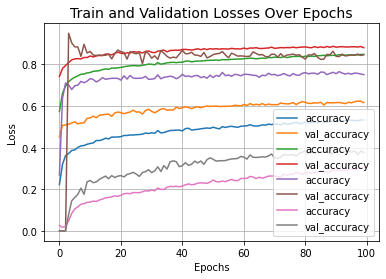

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="datal/dog/true/"
val_path="datal/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=60
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import (VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,
                                NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S,DenseNet201,ResNet50V2)
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
    
    
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_2048_datal_train4"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      Activation(activation='relu'),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.8),
      #Dense(7),
      #BatchNormalization(),
      #Activation(activation='relu'),
      #Dropout(0.5),
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.7),
      
      Dense(256),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.6),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      Dropout(0.5),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

In [16]:
from keras.models import load_model
model=load_model("best_model_InceptionResNetV2_all_224_123456_2048_datal_train4.h5")


In [17]:
checkpoint_path = f'best_model_{sav}22.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
model.compile(optimizer=Adam(0.00005),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])

history2 = model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=1000,
                         callbacks=[checkpoint])

Epoch 1/1000
396/396 [==============================] - ETA: 0s - loss: 1.2135 - accuracy: 0.5327 - auc_5: 0.8477 - precision_5: 0.7674 - recall_5: 0.2956
Epoch 1: val_accuracy improved from -inf to 0.62086, saving model to best_model_InceptionResNetV2_all_224_123456_2048_datal_train422.h5
396/396 [==============================] - 159s 377ms/step - loss: 1.2135 - accuracy: 0.5327 - auc_5: 0.8477 - precision_5: 0.7674 - recall_5: 0.2956 - val_loss: 1.0727 - val_accuracy: 0.6209 - val_auc_5: 0.8867 - val_precision_5: 0.8538 - val_recall_5: 0.3833
Epoch 2/1000
396/396 [==============================] - ETA: 0s - loss: 1.2042 - accuracy: 0.5343 - auc_5: 0.8501 - precision_5: 0.7597 - recall_5: 0.3003
Epoch 2: val_accuracy improved from 0.62086 to 0.62472, saving model to best_model_InceptionResNetV2_all_224_123456_2048_datal_train422.h5
396/396 [==============================] - 147s 371ms/step - loss: 1.2042 - accuracy: 0.5343 - auc_5: 0.8501 - precision_5: 0.7597 - recall_5: 0.3003 - va

KeyboardInterrupt: 

In [11]:
Sequential([
    pre_model,
    Dense(6)
]).layers

In [22]:
pre_model.load_weights("best_model_InceptionResNetV2_all_224_123456_2048_datal_train4.h5")

In [ ]:
pre_model

In [8]:
pre_model.output

<KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'activation_210')>

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="datal/dog/true/"
val_path="datal/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=24
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import (VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,
                                NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S,DenseNet201,ResNet50V2)
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
    
    
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_2048_datal_train13"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
#pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      Activation(activation='relu'),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      #Dense(7),
      #BatchNormalization(),
      #Activation(activation='relu'),
      #Dropout(0.5),
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(256),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      Dropout(0.5),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
#pre_model.load_weights("best_model_InceptionResNetV2_all_224_123456_2048_datal_train4.h5")


history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=470,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 23760 images belonging to 6 classes.
Found 3107 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1536)             0         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 batch_normalization_204 (Ba  (None, 512)              2048      
 tchNormalization)                   

990/990 [==============================] - ETA: 0s - loss: 1.5722 - accuracy: 0.3885 - auc: 0.7188 - precision: 0.6463 - recall: 0.1001
Epoch 7: val_accuracy did not improve from 0.47152
990/990 [==============================] - 449s 453ms/step - loss: 1.5722 - accuracy: 0.3885 - auc: 0.7188 - precision: 0.6463 - recall: 0.1001 - val_loss: 1.5127 - val_accuracy: 0.4297 - val_auc: 0.7566 - val_precision: 0.7674 - val_recall: 0.1136
Epoch 8/470
990/990 [==============================] - ETA: 0s - loss: 1.5537 - accuracy: 0.3976 - auc: 0.7277 - precision: 0.6658 - recall: 0.1125
Epoch 8: val_accuracy did not improve from 0.47152
990/990 [==============================] - 448s 453ms/step - loss: 1.5537 - accuracy: 0.3976 - auc: 0.7277 - precision: 0.6658 - recall: 0.1125 - val_loss: 1.5241 - val_accuracy: 0.4516 - val_auc: 0.7506 - val_precision: 0.7692 - val_recall: 0.0772
Epoch 9/470
990/990 [==============================] - ETA: 0s - loss: 1.5477 - accuracy: 0.3988 - auc: 0.7304 - pre

Epoch 24/470
990/990 [==============================] - ETA: 0s - loss: 1.4203 - accuracy: 0.4559 - auc: 0.7828 - precision: 0.7200 - recall: 0.1911
Epoch 24: val_accuracy did not improve from 0.57580
990/990 [==============================] - 448s 453ms/step - loss: 1.4203 - accuracy: 0.4559 - auc: 0.7828 - precision: 0.7200 - recall: 0.1911 - val_loss: 1.2777 - val_accuracy: 0.5671 - val_auc: 0.8493 - val_precision: 0.8358 - val_recall: 0.1967
Epoch 25/470
990/990 [==============================] - ETA: 0s - loss: 1.4176 - accuracy: 0.4548 - auc: 0.7836 - precision: 0.7160 - recall: 0.1880
Epoch 25: val_accuracy improved from 0.57580 to 0.57644, saving model to best_model_InceptionResNetV2_all_224_123456_2048_datal_train13.h5
990/990 [==============================] - 450s 455ms/step - loss: 1.4176 - accuracy: 0.4548 - auc: 0.7836 - precision: 0.7160 - recall: 0.1880 - val_loss: 1.2428 - val_accuracy: 0.5764 - val_auc: 0.8552 - val_precision: 0.8575 - val_recall: 0.2247
Epoch 26/470


990/990 [==============================] - 447s 451ms/step - loss: 1.3257 - accuracy: 0.4924 - auc: 0.8147 - precision: 0.7366 - recall: 0.2576 - val_loss: 1.1692 - val_accuracy: 0.6083 - val_auc: 0.8711 - val_precision: 0.8548 - val_recall: 0.2842
Epoch 42/470
990/990 [==============================] - ETA: 0s - loss: 1.3173 - accuracy: 0.4973 - auc: 0.8183 - precision: 0.7370 - recall: 0.2602
Epoch 42: val_accuracy improved from 0.61023 to 0.62311, saving model to best_model_InceptionResNetV2_all_224_123456_2048_datal_train13.h5
990/990 [==============================] - 449s 454ms/step - loss: 1.3173 - accuracy: 0.4973 - auc: 0.8183 - precision: 0.7370 - recall: 0.2602 - val_loss: 1.1443 - val_accuracy: 0.6231 - val_auc: 0.8761 - val_precision: 0.8642 - val_recall: 0.3051
Epoch 43/470
990/990 [==============================] - ETA: 0s - loss: 1.3170 - accuracy: 0.4960 - auc: 0.8179 - precision: 0.7295 - recall: 0.2629
Epoch 43: val_accuracy did not improve from 0.62311
990/990 [====

990/990 [==============================] - ETA: 0s - loss: 1.2372 - accuracy: 0.5260 - auc: 0.8416 - precision: 0.7670 - recall: 0.3077
Epoch 59: val_accuracy did not improve from 0.63791
990/990 [==============================] - 448s 452ms/step - loss: 1.2372 - accuracy: 0.5260 - auc: 0.8416 - precision: 0.7670 - recall: 0.3077 - val_loss: 1.1387 - val_accuracy: 0.6109 - val_auc: 0.8761 - val_precision: 0.8554 - val_recall: 0.3521
Epoch 60/470
990/990 [==============================] - ETA: 0s - loss: 1.2338 - accuracy: 0.5313 - auc: 0.8433 - precision: 0.7514 - recall: 0.3112
Epoch 60: val_accuracy did not improve from 0.63791
990/990 [==============================] - 447s 452ms/step - loss: 1.2338 - accuracy: 0.5313 - auc: 0.8433 - precision: 0.7514 - recall: 0.3112 - val_loss: 1.1373 - val_accuracy: 0.6257 - val_auc: 0.8745 - val_precision: 0.8309 - val_recall: 0.3637
Epoch 61/470
990/990 [==============================] - ETA: 0s - loss: 1.2237 - accuracy: 0.5373 - auc: 0.8455 -

Epoch 77/470
990/990 [==============================] - ETA: 0s - loss: 1.1535 - accuracy: 0.5675 - auc: 0.8650 - precision: 0.7698 - recall: 0.3682
Epoch 77: val_accuracy did not improve from 0.66559
990/990 [==============================] - 448s 453ms/step - loss: 1.1535 - accuracy: 0.5675 - auc: 0.8650 - precision: 0.7698 - recall: 0.3682 - val_loss: 1.0946 - val_accuracy: 0.6466 - val_auc: 0.8847 - val_precision: 0.8039 - val_recall: 0.4631
Epoch 78/470
990/990 [==============================] - ETA: 0s - loss: 1.1343 - accuracy: 0.5681 - auc: 0.8686 - precision: 0.7770 - recall: 0.3767
Epoch 78: val_accuracy did not improve from 0.66559
990/990 [==============================] - 448s 452ms/step - loss: 1.1343 - accuracy: 0.5681 - auc: 0.8686 - precision: 0.7770 - recall: 0.3767 - val_loss: 1.1135 - val_accuracy: 0.6144 - val_auc: 0.8755 - val_precision: 0.7752 - val_recall: 0.4261
Epoch 79/470
990/990 [==============================] - ETA: 0s - loss: 1.1292 - accuracy: 0.5753 - 

Epoch 95/470
990/990 [==============================] - ETA: 0s - loss: 1.0659 - accuracy: 0.5952 - auc: 0.8857 - precision: 0.7842 - recall: 0.4124
Epoch 95: val_accuracy did not improve from 0.67493
990/990 [==============================] - 447s 452ms/step - loss: 1.0659 - accuracy: 0.5952 - auc: 0.8857 - precision: 0.7842 - recall: 0.4124 - val_loss: 1.0424 - val_accuracy: 0.6518 - val_auc: 0.8943 - val_precision: 0.8308 - val_recall: 0.4458
Epoch 96/470
990/990 [==============================] - ETA: 0s - loss: 1.0709 - accuracy: 0.5922 - auc: 0.8843 - precision: 0.7832 - recall: 0.4165
Epoch 96: val_accuracy did not improve from 0.67493
990/990 [==============================] - 448s 452ms/step - loss: 1.0709 - accuracy: 0.5922 - auc: 0.8843 - precision: 0.7832 - recall: 0.4165 - val_loss: 1.0246 - val_accuracy: 0.6588 - val_auc: 0.8984 - val_precision: 0.8545 - val_recall: 0.4461
Epoch 97/470
990/990 [==============================] - ETA: 0s - loss: 1.0743 - accuracy: 0.5898 - 

990/990 [==============================] - ETA: 0s - loss: 1.0249 - accuracy: 0.6075 - auc: 0.8949 - precision: 0.7851 - recall: 0.4442
Epoch 113: val_accuracy did not improve from 0.67493
990/990 [==============================] - 447s 452ms/step - loss: 1.0249 - accuracy: 0.6075 - auc: 0.8949 - precision: 0.7851 - recall: 0.4442 - val_loss: 1.1327 - val_accuracy: 0.6276 - val_auc: 0.8768 - val_precision: 0.8158 - val_recall: 0.4290
Epoch 114/470
990/990 [==============================] - ETA: 0s - loss: 1.0196 - accuracy: 0.6106 - auc: 0.8950 - precision: 0.7908 - recall: 0.4441
Epoch 114: val_accuracy did not improve from 0.67493
990/990 [==============================] - 448s 452ms/step - loss: 1.0196 - accuracy: 0.6106 - auc: 0.8950 - precision: 0.7908 - recall: 0.4441 - val_loss: 1.0174 - val_accuracy: 0.6749 - val_auc: 0.9022 - val_precision: 0.8487 - val_recall: 0.4966
Epoch 115/470
990/990 [==============================] - ETA: 0s - loss: 0.9846 - accuracy: 0.6232 - auc: 0.90

Epoch 131/470
990/990 [==============================] - ETA: 0s - loss: 0.9605 - accuracy: 0.6280 - auc: 0.9069 - precision: 0.7941 - recall: 0.4825
Epoch 131: val_accuracy did not improve from 0.68426
990/990 [==============================] - 448s 452ms/step - loss: 0.9605 - accuracy: 0.6280 - auc: 0.9069 - precision: 0.7941 - recall: 0.4825 - val_loss: 1.0729 - val_accuracy: 0.6547 - val_auc: 0.8900 - val_precision: 0.8064 - val_recall: 0.5014
Epoch 132/470
990/990 [==============================] - ETA: 0s - loss: 0.9792 - accuracy: 0.6241 - auc: 0.9042 - precision: 0.7906 - recall: 0.4775
Epoch 132: val_accuracy did not improve from 0.68426
990/990 [==============================] - 448s 452ms/step - loss: 0.9792 - accuracy: 0.6241 - auc: 0.9042 - precision: 0.7906 - recall: 0.4775 - val_loss: 1.1301 - val_accuracy: 0.6547 - val_auc: 0.8829 - val_precision: 0.7830 - val_recall: 0.5018
Epoch 133/470
990/990 [==============================] - ETA: 0s - loss: 0.9575 - accuracy: 0.63

990/990 [==============================] - ETA: 0s - loss: 0.9139 - accuracy: 0.6486 - auc: 0.9163 - precision: 0.8049 - recall: 0.5057
Epoch 149: val_accuracy did not improve from 0.68426
990/990 [==============================] - 448s 453ms/step - loss: 0.9139 - accuracy: 0.6486 - auc: 0.9163 - precision: 0.8049 - recall: 0.5057 - val_loss: 1.0076 - val_accuracy: 0.6798 - val_auc: 0.9009 - val_precision: 0.8138 - val_recall: 0.5359
Epoch 150/470
990/990 [==============================] - ETA: 0s - loss: 0.9223 - accuracy: 0.6490 - auc: 0.9145 - precision: 0.7981 - recall: 0.5077
Epoch 150: val_accuracy did not improve from 0.68426
990/990 [==============================] - 448s 452ms/step - loss: 0.9223 - accuracy: 0.6490 - auc: 0.9145 - precision: 0.7981 - recall: 0.5077 - val_loss: 1.0308 - val_accuracy: 0.6714 - val_auc: 0.8979 - val_precision: 0.8094 - val_recall: 0.5507
Epoch 151/470
990/990 [==============================] - ETA: 0s - loss: 0.9118 - accuracy: 0.6516 - auc: 0.91

Epoch 167/470
990/990 [==============================] - ETA: 0s - loss: 0.8949 - accuracy: 0.6538 - auc: 0.9196 - precision: 0.8019 - recall: 0.5280
Epoch 167: val_accuracy did not improve from 0.68587
990/990 [==============================] - 446s 451ms/step - loss: 0.8949 - accuracy: 0.6538 - auc: 0.9196 - precision: 0.8019 - recall: 0.5280 - val_loss: 1.0768 - val_accuracy: 0.6440 - val_auc: 0.8907 - val_precision: 0.7840 - val_recall: 0.5233
Epoch 168/470
990/990 [==============================] - ETA: 0s - loss: 0.8787 - accuracy: 0.6617 - auc: 0.9228 - precision: 0.8041 - recall: 0.5352
Epoch 168: val_accuracy did not improve from 0.68587
990/990 [==============================] - 446s 450ms/step - loss: 0.8787 - accuracy: 0.6617 - auc: 0.9228 - precision: 0.8041 - recall: 0.5352 - val_loss: 1.0642 - val_accuracy: 0.6485 - val_auc: 0.8917 - val_precision: 0.7996 - val_recall: 0.5266
Epoch 169/470
990/990 [==============================] - ETA: 0s - loss: 0.8834 - accuracy: 0.66

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="datal/dog/true/"
val_path="datal/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=24
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import (VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,
                                NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S,DenseNet201,ResNet50V2)
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
    
    
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_2048_datal_train13_0005"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
#pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      Activation(activation='relu'),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      #Dense(7),
      #BatchNormalization(),
      #Activation(activation='relu'),
      #Dropout(0.5),
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(256),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      Dropout(0.5),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.00005),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
#pre_model.load_weights("best_model_InceptionResNetV2_all_224_123456_2048_datal_train4.h5")
pre_model.load_weights("best_model_InceptionResNetV2_all_224_123456_2048_datal_train13.h5")

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 23760 images belonging to 6 classes.
Found 3107 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1536)             0         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 batch_normalization_204 (Ba  (None, 512)              2048      
 tchNormalization)                   

990/990 [==============================] - ETA: 0s - loss: 0.8308 - accuracy: 0.6767 - auc: 0.9310 - precision: 0.8183 - recall: 0.5518
Epoch 7: val_accuracy did not improve from 0.71001
990/990 [==============================] - 448s 452ms/step - loss: 0.8308 - accuracy: 0.6767 - auc: 0.9310 - precision: 0.8183 - recall: 0.5518 - val_loss: 0.9400 - val_accuracy: 0.7078 - val_auc: 0.9131 - val_precision: 0.8181 - val_recall: 0.5980
Epoch 8/100
990/990 [==============================] - ETA: 0s - loss: 0.8271 - accuracy: 0.6793 - auc: 0.9317 - precision: 0.8175 - recall: 0.5540
Epoch 8: val_accuracy improved from 0.71001 to 0.71098, saving model to best_model_InceptionResNetV2_all_224_123456_2048_datal_train13_0005.h5
990/990 [==============================] - 450s 454ms/step - loss: 0.8271 - accuracy: 0.6793 - auc: 0.9317 - precision: 0.8175 - recall: 0.5540 - val_loss: 0.9211 - val_accuracy: 0.7110 - val_auc: 0.9158 - val_precision: 0.8195 - val_recall: 0.6022
Epoch 9/100
990/990 [===

Epoch 25/100
990/990 [==============================] - ETA: 0s - loss: 0.8117 - accuracy: 0.6881 - auc: 0.9339 - precision: 0.8180 - recall: 0.5692
Epoch 25: val_accuracy did not improve from 0.72031
990/990 [==============================] - 446s 451ms/step - loss: 0.8117 - accuracy: 0.6881 - auc: 0.9339 - precision: 0.8180 - recall: 0.5692 - val_loss: 0.9544 - val_accuracy: 0.7036 - val_auc: 0.9110 - val_precision: 0.7936 - val_recall: 0.6064
Epoch 26/100
990/990 [==============================] - ETA: 0s - loss: 0.8115 - accuracy: 0.6838 - auc: 0.9342 - precision: 0.8163 - recall: 0.5669
Epoch 26: val_accuracy did not improve from 0.72031
990/990 [==============================] - 446s 451ms/step - loss: 0.8115 - accuracy: 0.6838 - auc: 0.9342 - precision: 0.8163 - recall: 0.5669 - val_loss: 0.9450 - val_accuracy: 0.7020 - val_auc: 0.9113 - val_precision: 0.8072 - val_recall: 0.6051
Epoch 27/100
990/990 [==============================] - ETA: 0s - loss: 0.8076 - accuracy: 0.6855 - 

990/990 [==============================] - ETA: 0s - loss: 0.7981 - accuracy: 0.6928 - auc: 0.9362 - precision: 0.8219 - recall: 0.5755
Epoch 43: val_accuracy did not improve from 0.72031
990/990 [==============================] - 446s 451ms/step - loss: 0.7981 - accuracy: 0.6928 - auc: 0.9362 - precision: 0.8219 - recall: 0.5755 - val_loss: 0.9398 - val_accuracy: 0.7055 - val_auc: 0.9126 - val_precision: 0.8006 - val_recall: 0.6176
Epoch 44/100
990/990 [==============================] - ETA: 0s - loss: 0.7943 - accuracy: 0.6892 - auc: 0.9367 - precision: 0.8177 - recall: 0.5762
Epoch 44: val_accuracy did not improve from 0.72031
990/990 [==============================] - 447s 451ms/step - loss: 0.7943 - accuracy: 0.6892 - auc: 0.9367 - precision: 0.8177 - recall: 0.5762 - val_loss: 0.9508 - val_accuracy: 0.7052 - val_auc: 0.9115 - val_precision: 0.7787 - val_recall: 0.6228
Epoch 45/100
990/990 [==============================] - ETA: 0s - loss: 0.7898 - accuracy: 0.6938 - auc: 0.9375 -

990/990 [==============================] - ETA: 0s - loss: 0.7755 - accuracy: 0.7005 - auc: 0.9398 - precision: 0.8214 - recall: 0.5918
Epoch 61: val_accuracy did not improve from 0.72031
990/990 [==============================] - 448s 453ms/step - loss: 0.7755 - accuracy: 0.7005 - auc: 0.9398 - precision: 0.8214 - recall: 0.5918 - val_loss: 0.9494 - val_accuracy: 0.7094 - val_auc: 0.9113 - val_precision: 0.7815 - val_recall: 0.6295
Epoch 62/100
990/990 [==============================] - ETA: 0s - loss: 0.7761 - accuracy: 0.6982 - auc: 0.9397 - precision: 0.8204 - recall: 0.5873
Epoch 62: val_accuracy did not improve from 0.72031
990/990 [==============================] - 447s 451ms/step - loss: 0.7761 - accuracy: 0.6982 - auc: 0.9397 - precision: 0.8204 - recall: 0.5873 - val_loss: 0.9445 - val_accuracy: 0.7068 - val_auc: 0.9114 - val_precision: 0.7842 - val_recall: 0.6328
Epoch 63/100
990/990 [==============================] - ETA: 0s - loss: 0.7758 - accuracy: 0.6990 - auc: 0.9395 -

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="datal/dog/true/"
val_path="datal/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=24
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import (VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,
                                NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S,DenseNet201,ResNet50V2)
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
    
    
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_2048_datal_train13_00001"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
#pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      Activation(activation='relu'),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      #Dense(7),
      #BatchNormalization(),
      #Activation(activation='relu'),
      #Dropout(0.5),
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.5),
      
      Dense(256),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      Dropout(0.5),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.00001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
#pre_model.load_weights("best_model_InceptionResNetV2_all_224_123456_2048_datal_train4.h5")
pre_model.load_weights("best_model_InceptionResNetV2_all_224_123456_2048_datal_train13_00001.h5")

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 23760 images belonging to 6 classes.
Found 3107 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1536)             0         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 batch_normalization_204 (Ba  (None, 512)              2048      
 tchNormalization)                   

Epoch 8/100
990/990 [==============================] - ETA: 0s - loss: 0.8192 - accuracy: 0.6853 - auc: 0.9331 - precision: 0.8171 - recall: 0.5634
Epoch 8: val_accuracy did not improve from 0.71645
990/990 [==============================] - 445s 449ms/step - loss: 0.8192 - accuracy: 0.6853 - auc: 0.9331 - precision: 0.8171 - recall: 0.5634 - val_loss: 0.9204 - val_accuracy: 0.7148 - val_auc: 0.9156 - val_precision: 0.8105 - val_recall: 0.6099
Epoch 9/100
990/990 [==============================] - ETA: 0s - loss: 0.8242 - accuracy: 0.6822 - auc: 0.9318 - precision: 0.8167 - recall: 0.5587
Epoch 9: val_accuracy did not improve from 0.71645
990/990 [==============================] - 445s 449ms/step - loss: 0.8242 - accuracy: 0.6822 - auc: 0.9318 - precision: 0.8167 - recall: 0.5587 - val_loss: 0.9279 - val_accuracy: 0.7094 - val_auc: 0.9156 - val_precision: 0.8088 - val_recall: 0.6141
Epoch 10/100
990/990 [==============================] - ETA: 0s - loss: 0.8256 - accuracy: 0.6787 - auc:

990/990 [==============================] - ETA: 0s - loss: 0.8090 - accuracy: 0.6874 - auc: 0.9346 - precision: 0.8197 - recall: 0.5686
Epoch 26: val_accuracy did not improve from 0.71838
990/990 [==============================] - 446s 451ms/step - loss: 0.8090 - accuracy: 0.6874 - auc: 0.9346 - precision: 0.8197 - recall: 0.5686 - val_loss: 0.9409 - val_accuracy: 0.7007 - val_auc: 0.9118 - val_precision: 0.8084 - val_recall: 0.6044
Epoch 27/100
990/990 [==============================] - ETA: 0s - loss: 0.8091 - accuracy: 0.6870 - auc: 0.9342 - precision: 0.8179 - recall: 0.5710
Epoch 27: val_accuracy did not improve from 0.71838
990/990 [==============================] - 444s 449ms/step - loss: 0.8091 - accuracy: 0.6870 - auc: 0.9342 - precision: 0.8179 - recall: 0.5710 - val_loss: 0.9271 - val_accuracy: 0.7174 - val_auc: 0.9147 - val_precision: 0.8040 - val_recall: 0.6192
Epoch 28/100
990/990 [==============================] - ETA: 0s - loss: 0.8071 - accuracy: 0.6885 - auc: 0.9348 -

990/990 [==============================] - ETA: 0s - loss: 0.8045 - accuracy: 0.6878 - auc: 0.9355 - precision: 0.8220 - recall: 0.5652
Epoch 44: val_accuracy did not improve from 0.71838
990/990 [==============================] - 445s 450ms/step - loss: 0.8045 - accuracy: 0.6878 - auc: 0.9355 - precision: 0.8220 - recall: 0.5652 - val_loss: 0.9464 - val_accuracy: 0.7045 - val_auc: 0.9116 - val_precision: 0.8051 - val_recall: 0.6009
Epoch 45/100
990/990 [==============================] - ETA: 0s - loss: 0.8060 - accuracy: 0.6895 - auc: 0.9350 - precision: 0.8201 - recall: 0.5707
Epoch 45: val_accuracy did not improve from 0.71838
990/990 [==============================] - 445s 450ms/step - loss: 0.8060 - accuracy: 0.6895 - auc: 0.9350 - precision: 0.8201 - recall: 0.5707 - val_loss: 0.9335 - val_accuracy: 0.7110 - val_auc: 0.9135 - val_precision: 0.8113 - val_recall: 0.6061
Epoch 46/100
990/990 [==============================] - ETA: 0s - loss: 0.8091 - accuracy: 0.6829 - auc: 0.9343 -

990/990 [==============================] - ETA: 0s - loss: 0.8040 - accuracy: 0.6890 - auc: 0.9352 - precision: 0.8201 - recall: 0.5731
Epoch 62: val_accuracy did not improve from 0.71838
990/990 [==============================] - 451s 456ms/step - loss: 0.8040 - accuracy: 0.6890 - auc: 0.9352 - precision: 0.8201 - recall: 0.5731 - val_loss: 0.9324 - val_accuracy: 0.7036 - val_auc: 0.9133 - val_precision: 0.8085 - val_recall: 0.6154
Epoch 63/100
144/990 [===>..........................] - ETA: 6:10 - loss: 0.8009 - accuracy: 0.6863 - auc: 0.9362 - precision: 0.8250 - recall: 0.5744

In [1]:
import os
for i in os.listdir("datal/dog/true2"):
    for j in os.listdir("datal/dog/true2/"+i)[::2]:
        os.remove("datal/dog/true2/"+i+"/"+j)

for i in os.listdir("datal/dog/val2"):
    for j in os.listdir("datal/dog/val2/"+i)[::2]:
        os.remove("datal/dog/val2/"+i+"/"+j)

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="datal/dog/true/"
val_path="datal/dog/val/"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=24
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import (VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,
                                NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S,DenseNet201,ResNet50V2)
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
    
    
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_2048_datal_train13_0002_2val2"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
#pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      Activation(activation='relu'),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.45),
      #Dense(7),
      #BatchNormalization(),
      #Activation(activation='relu'),
      #Dropout(0.5),
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.35),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.35),
      
      Dense(256),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      Dropout(0.5),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.0002),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
#pre_model.load_weights("best_model_InceptionResNetV2_all_224_123456_2048_datal_train4.h5")
pre_model.load_weights("best_model_InceptionResNetV2_all_224_123456_2048_datal_train13.h5")

history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 23760 images belonging to 6 classes.
Found 3107 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1536)             0         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 batch_normalization_204 (Ba  (None, 512)              2048      
 tchNormalization)                   

990/990 [==============================] - ETA: 0s - loss: 0.8169 - accuracy: 0.6851 - auc: 0.9334 - precision: 0.8163 - recall: 0.5668
Epoch 7: val_accuracy did not improve from 0.71130
990/990 [==============================] - 446s 451ms/step - loss: 0.8169 - accuracy: 0.6851 - auc: 0.9334 - precision: 0.8163 - recall: 0.5668 - val_loss: 0.9546 - val_accuracy: 0.7013 - val_auc: 0.9100 - val_precision: 0.8011 - val_recall: 0.6003
Epoch 8/100
990/990 [==============================] - ETA: 0s - loss: 0.8142 - accuracy: 0.6831 - auc: 0.9341 - precision: 0.8149 - recall: 0.5647
Epoch 8: val_accuracy did not improve from 0.71130
990/990 [==============================] - 446s 451ms/step - loss: 0.8142 - accuracy: 0.6831 - auc: 0.9341 - precision: 0.8149 - recall: 0.5647 - val_loss: 0.9388 - val_accuracy: 0.7052 - val_auc: 0.9125 - val_precision: 0.8026 - val_recall: 0.6019
Epoch 9/100
990/990 [==============================] - ETA: 0s - loss: 0.8134 - accuracy: 0.6846 - auc: 0.9338 - pre

990/990 [==============================] - ETA: 0s - loss: 0.7771 - accuracy: 0.7003 - auc: 0.9393 - precision: 0.8220 - recall: 0.5950
Epoch 25: val_accuracy did not improve from 0.71548
990/990 [==============================] - 447s 451ms/step - loss: 0.7771 - accuracy: 0.7003 - auc: 0.9393 - precision: 0.8220 - recall: 0.5950 - val_loss: 0.9876 - val_accuracy: 0.6897 - val_auc: 0.9049 - val_precision: 0.7612 - val_recall: 0.6257
Epoch 26/100
990/990 [==============================] - ETA: 0s - loss: 0.7824 - accuracy: 0.6966 - auc: 0.9384 - precision: 0.8170 - recall: 0.5912
Epoch 26: val_accuracy did not improve from 0.71548
990/990 [==============================] - 446s 451ms/step - loss: 0.7824 - accuracy: 0.6966 - auc: 0.9384 - precision: 0.8170 - recall: 0.5912 - val_loss: 0.9757 - val_accuracy: 0.7058 - val_auc: 0.9048 - val_precision: 0.7820 - val_recall: 0.6363
Epoch 27/100
990/990 [==============================] - ETA: 0s - loss: 0.7706 - accuracy: 0.7022 - auc: 0.9402 -

990/990 [==============================] - ETA: 0s - loss: 0.7484 - accuracy: 0.7096 - auc: 0.9438 - precision: 0.8258 - recall: 0.6099
Epoch 43: val_accuracy did not improve from 0.71548
990/990 [==============================] - 445s 450ms/step - loss: 0.7484 - accuracy: 0.7096 - auc: 0.9438 - precision: 0.8258 - recall: 0.6099 - val_loss: 0.9927 - val_accuracy: 0.6981 - val_auc: 0.9052 - val_precision: 0.7581 - val_recall: 0.6344
Epoch 44/100
990/990 [==============================] - ETA: 0s - loss: 0.7593 - accuracy: 0.7039 - auc: 0.9420 - precision: 0.8179 - recall: 0.6045
Epoch 44: val_accuracy did not improve from 0.71548
990/990 [==============================] - 445s 450ms/step - loss: 0.7593 - accuracy: 0.7039 - auc: 0.9420 - precision: 0.8179 - recall: 0.6045 - val_loss: 0.9915 - val_accuracy: 0.7010 - val_auc: 0.9062 - val_precision: 0.7652 - val_recall: 0.6376
Epoch 45/100
990/990 [==============================] - ETA: 0s - loss: 0.7571 - accuracy: 0.7055 - auc: 0.9424 -

990/990 [==============================] - ETA: 0s - loss: 0.7364 - accuracy: 0.7147 - auc: 0.9454 - precision: 0.8276 - recall: 0.6223
Epoch 61: val_accuracy did not improve from 0.71548
990/990 [==============================] - 445s 450ms/step - loss: 0.7364 - accuracy: 0.7147 - auc: 0.9454 - precision: 0.8276 - recall: 0.6223 - val_loss: 0.9921 - val_accuracy: 0.7036 - val_auc: 0.9054 - val_precision: 0.7638 - val_recall: 0.6389
Epoch 62/100
990/990 [==============================] - ETA: 0s - loss: 0.7350 - accuracy: 0.7157 - auc: 0.9458 - precision: 0.8320 - recall: 0.6226
Epoch 62: val_accuracy did not improve from 0.71548
990/990 [==============================] - 445s 450ms/step - loss: 0.7350 - accuracy: 0.7157 - auc: 0.9458 - precision: 0.8320 - recall: 0.6226 - val_loss: 0.9815 - val_accuracy: 0.7036 - val_auc: 0.9059 - val_precision: 0.7546 - val_recall: 0.6434
Epoch 63/100
990/990 [==============================] - ETA: 0s - loss: 0.7429 - accuracy: 0.7099 - auc: 0.9446 -

990/990 [==============================] - ETA: 0s - loss: 0.7272 - accuracy: 0.7193 - auc: 0.9471 - precision: 0.8289 - recall: 0.6261
Epoch 79: val_accuracy did not improve from 0.71548
990/990 [==============================] - 445s 450ms/step - loss: 0.7272 - accuracy: 0.7193 - auc: 0.9471 - precision: 0.8289 - recall: 0.6261 - val_loss: 0.9967 - val_accuracy: 0.6962 - val_auc: 0.9049 - val_precision: 0.7511 - val_recall: 0.6460
Epoch 80/100
990/990 [==============================] - ETA: 0s - loss: 0.7217 - accuracy: 0.7239 - auc: 0.9475 - precision: 0.8285 - recall: 0.6311
Epoch 80: val_accuracy did not improve from 0.71548
990/990 [==============================] - 445s 450ms/step - loss: 0.7217 - accuracy: 0.7239 - auc: 0.9475 - precision: 0.8285 - recall: 0.6311 - val_loss: 0.9947 - val_accuracy: 0.6965 - val_auc: 0.9054 - val_precision: 0.7477 - val_recall: 0.6418
Epoch 81/100
990/990 [==============================] - ETA: 0s - loss: 0.7237 - accuracy: 0.7235 - auc: 0.9472 -

990/990 [==============================] - ETA: 0s - loss: 0.7093 - accuracy: 0.7271 - auc: 0.9492 - precision: 0.8308 - recall: 0.6371
Epoch 97: val_accuracy did not improve from 0.71548
990/990 [==============================] - 445s 450ms/step - loss: 0.7093 - accuracy: 0.7271 - auc: 0.9492 - precision: 0.8308 - recall: 0.6371 - val_loss: 1.0211 - val_accuracy: 0.7016 - val_auc: 0.9024 - val_precision: 0.7438 - val_recall: 0.6633
Epoch 98/100
990/990 [==============================] - ETA: 0s - loss: 0.7211 - accuracy: 0.7210 - auc: 0.9476 - precision: 0.8272 - recall: 0.6357
Epoch 98: val_accuracy did not improve from 0.71548
990/990 [==============================] - 445s 450ms/step - loss: 0.7211 - accuracy: 0.7210 - auc: 0.9476 - precision: 0.8272 - recall: 0.6357 - val_loss: 0.9823 - val_accuracy: 0.7036 - val_auc: 0.9069 - val_precision: 0.7553 - val_recall: 0.6466
Epoch 99/100
990/990 [==============================] - ETA: 0s - loss: 0.7066 - accuracy: 0.7277 - auc: 0.9497 -

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="data/dog42/train/"
val_path="data/dog42/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=24
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import (VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,
                                NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S,DenseNet201,ResNet50V2)
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
    
    
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_2048_datal_train13_42"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
#pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      Activation(activation='relu'),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.3),
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      #Dense(7),
      #BatchNormalization(),
      #Activation(activation='relu'),
      #Dropout(0.5),
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(256),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.4),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      Dropout(0.5),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
pre_model.load_weights("best_model_InceptionResNetV2_all_224_123456_2048_datal_train13.h5")


history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=470,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 4381 images belonging to 6 classes.
Found 2353 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1536)             0         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 batch_normalization_204 (Ba  (None, 512)              2048      
 tchNormalization)                    

183/183 [==============================] - ETA: 0s - loss: 0.9308 - accuracy: 0.6375 - auc: 0.9161 - precision: 0.7816 - recall: 0.5129
Epoch 7: val_accuracy did not improve from 0.78496
183/183 [==============================] - 93s 507ms/step - loss: 0.9308 - accuracy: 0.6375 - auc: 0.9161 - precision: 0.7816 - recall: 0.5129 - val_loss: 0.7365 - val_accuracy: 0.7769 - val_auc: 0.9525 - val_precision: 0.8958 - val_recall: 0.6392
Epoch 8/470
183/183 [==============================] - ETA: 0s - loss: 0.9172 - accuracy: 0.6524 - auc: 0.9189 - precision: 0.7806 - recall: 0.5321
Epoch 8: val_accuracy did not improve from 0.78496
183/183 [==============================] - 93s 507ms/step - loss: 0.9172 - accuracy: 0.6524 - auc: 0.9189 - precision: 0.7806 - recall: 0.5321 - val_loss: 0.7488 - val_accuracy: 0.7850 - val_auc: 0.9511 - val_precision: 0.9083 - val_recall: 0.6150
Epoch 9/470
183/183 [==============================] - ETA: 0s - loss: 0.9146 - accuracy: 0.6558 - auc: 0.9213 - preci

183/183 [==============================] - ETA: 0s - loss: 0.8406 - accuracy: 0.6807 - auc: 0.9309 - precision: 0.7780 - recall: 0.5686
Epoch 25: val_accuracy did not improve from 0.78496
183/183 [==============================] - 93s 507ms/step - loss: 0.8406 - accuracy: 0.6807 - auc: 0.9309 - precision: 0.7780 - recall: 0.5686 - val_loss: 0.8771 - val_accuracy: 0.7318 - val_auc: 0.9256 - val_precision: 0.8081 - val_recall: 0.6409
Epoch 26/470
183/183 [==============================] - ETA: 0s - loss: 0.8155 - accuracy: 0.6827 - auc: 0.9343 - precision: 0.7774 - recall: 0.5805
Epoch 26: val_accuracy did not improve from 0.78496
183/183 [==============================] - 93s 507ms/step - loss: 0.8155 - accuracy: 0.6827 - auc: 0.9343 - precision: 0.7774 - recall: 0.5805 - val_loss: 0.8791 - val_accuracy: 0.7131 - val_auc: 0.9247 - val_precision: 0.8014 - val_recall: 0.5763
Epoch 27/470
183/183 [==============================] - ETA: 0s - loss: 0.8718 - accuracy: 0.6724 - auc: 0.9257 - p

183/183 [==============================] - ETA: 0s - loss: 0.7783 - accuracy: 0.6994 - auc: 0.9406 - precision: 0.8044 - recall: 0.6113
Epoch 43: val_accuracy did not improve from 0.78496
183/183 [==============================] - 94s 512ms/step - loss: 0.7783 - accuracy: 0.6994 - auc: 0.9406 - precision: 0.8044 - recall: 0.6113 - val_loss: 0.7883 - val_accuracy: 0.7331 - val_auc: 0.9373 - val_precision: 0.8133 - val_recall: 0.6536
Epoch 44/470
183/183 [==============================] - ETA: 0s - loss: 0.7823 - accuracy: 0.6934 - auc: 0.9388 - precision: 0.7915 - recall: 0.5960
Epoch 44: val_accuracy did not improve from 0.78496
183/183 [==============================] - 94s 512ms/step - loss: 0.7823 - accuracy: 0.6934 - auc: 0.9388 - precision: 0.7915 - recall: 0.5960 - val_loss: 0.8533 - val_accuracy: 0.7242 - val_auc: 0.9282 - val_precision: 0.8154 - val_recall: 0.6290
Epoch 45/470
183/183 [==============================] - ETA: 0s - loss: 0.7726 - accuracy: 0.7044 - auc: 0.9408 - p

In [4]:
from keras.utils import plot_model
plot_model(pre_model,show_shapes=True,show_layer_activations=True,to_file='model.png')

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="datal/dog/true/"
val_path="datal/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=24
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import (VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,
                                NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S,DenseNet201,ResNet50V2)
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
    
    
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_2048_datal_train_l"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
#pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      Activation(activation='relu'),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.1),
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.6),
      #Dense(7),
      #BatchNormalization(),
      #Activation(activation='relu'),
      #Dropout(0.5),
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.2),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.7),
      
      Dense(256),
      BatchNormalization(),
      Activation(activation='relu'),
      Dropout(0.2),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      #Dropout(0.5),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
pre_model.load_weights("best_model_InceptionResNetV2_all_224_123456_2048_datal_train13.h5")


history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=470,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 23760 images belonging to 6 classes.
Found 3107 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1536)             0         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 batch_normalization_204 (Ba  (None, 512)              2048      
 tchNormalization)                   

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy,CategoricalCrossentropy,SparseCategoricalCrossentropy
from keras.metrics import AUC,Recall
#import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
  tf.config.experimental.set_virtual_device_configuration(gpus[0], 
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2*1800)])

train_path="datal/dog/true/"
val_path="datal/dog/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=24
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴',
                                                 #'A7_무증상',
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

from keras.applications import (VGG19,InceptionResNetV2,EfficientNetV2L,EfficientNetV2B2,
                                NASNetLarge,Xception,EfficientNetV2M,EfficientNetB7,EfficientNetV2S,DenseNet201,ResNet50V2)
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=img_size+(3,),
                                    pooling='avg')
#pre_base2 = VGG19(include_top=False, weights='imagenet', input_tensor=None, 
                                    #pooling='avg')
    
    
from keras.metrics import Precision
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
#pre_base.summary()

sav="InceptionResNetV2_all_224_123456_2048_datal_train_l"

#for i in pre_base.layers[:-50]:
    #i.trainable=False
#pre_base.trainable=False
def build_trainable_model():
  model = Sequential([
      pre_base,
      BatchNormalization(),
      Activation(activation='relu'),
      
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      #Dropout(0.1),
      
      Dense(2048),
      BatchNormalization(),
      Activation(activation='relu'),
      #Dropout(0.6),
      #Dense(7),
      #BatchNormalization(),
      #Activation(activation='relu'),
      #Dropout(0.5),
      Dense(512),
      BatchNormalization(),
      Activation(activation='relu'),
      #Dropout(0.2),
      
      Dense(1024),
      BatchNormalization(),
      Activation(activation='relu'),
      #Dropout(0.7),
      
      Dense(256),
      BatchNormalization(),
      Activation(activation='relu'),
      #Dropout(0.2),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='sigmoid'),
      #Dropout(0.5),
      
      Dense(6),
      BatchNormalization(),
      Activation(activation='softmax'),
      
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = f'best_model_{sav}.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=1000)

pre_model = build_trainable_model()
pre_model.summary()

#pre_model.compile(optimizer=Adam(0.001),loss=BinaryCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005, decay=1e-5, momentum=0.999, nesterov=True)
#optimizer = Adam(0.001)
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
pre_model.load_weights("best_model_InceptionResNetV2_all_224_123456_2048_datal_train13.h5")


history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=470,
                         callbacks=[checkpoint])



plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["auc"], label="accuracy")
plt.plot(history2.history["val_auc"], label="val_accuracy")
plt.plot(history2.history["precision"], label="accuracy")
plt.plot(history2.history["val_precision"], label="val_accuracy")
plt.plot(history2.history["recall"], label="accuracy")
plt.plot(history2.history["val_recall"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()
import json
with open(f"history_{sav}.json","w") as f:
    f.write(json.dumps(history2.history))

Found 23760 images belonging to 6 classes.
Found 3107 images belonging to 6 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 activation_203 (Activation)  (None, 1536)             0         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 batch_normalization_204 (Ba  (None, 512)              2048      
 tchNormalization)                   

In [ ]:
a="""
    asd
"""
c=a.split("\n")
d={}
for i in c:
    if "step"in i:
        b=i.split("-")
        for i in range(2,12):
            t=b[i].split(":")
            name=t[0][1:]
            #print(t)
            d.setdefault(name,[])
            d[name]+=[float(t[1])]

In [3]:
from keras.models import load_model
model=load_model("best_model_InceptionResNetV2_all_224_123456_6__6_bn_dog42_drop_sss2__5__rrelu_sig.h5")

In [25]:
from collections import Counter
Counter(model.predict(next(val_gen)[0]).argmax(1))

7/7 [==============================] - 1s 182ms/step


Counter({1: 60, 2: 43, 4: 34, 0: 10, 5: 52, 3: 1})

In [10]:
next(val_gen)[1]

array([[0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
import os
import shutil

if not os.path.exists(f"data/bin"):
    os.mkdir(f"data/bin")
        
        
t=os.listdir("data/dog1/train")
for i in t:
    if not os.path.exists(f"data/bin/{i}"):
        os.mkdir(f"data/bin/{i}")    
    for j in os.listdir(f"data/dog1/train/{i}"):
        shutil.copyfile(f"data/dog1/train/{i}/{j}",f"data/bin/{i}/{j}")

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
#from keras.applications import ResNet50V2,EfficientNetB7,vgg19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from tensorflow.keras.metrics import AUC,Recall
import tensorflow as tf
train_path="data/dog42/train"
val_path="data/dog42/val"

gen=ImageDataGenerator(rescale=1/255,
                       horizontal_flip=True,
                        vertical_flip=True,
                        #shear_range=0.1,
                        
                        #zoom_range=0.2,
                        #width_shift_range=0.1,
                       # height_shift_range=0.1,
                        #rotation_range=45,
                        fill_mode='nearest',
                        )

b_s=16
img_size=(224,224)
train_gen=gen.flow_from_directory(directory=train_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

val_gen=gen.flow_from_directory(directory=val_path,
                                        target_size=img_size,
                                        classes=['A1_구진_플라크',
                                                 'A2_비듬_각질_상피성잔고리',
                                                 'A3_태선화_과다색소침착',
                                                 'A4_농포_여드름',
                                                 'A5_미란_궤양',
                                                 'A6_결절_종괴'
                                                ],
                                        batch_size=b_s,
                                        class_mode="categorical",
                                        seed=1234)

C:\Users\a\anaconda3\envs\mmm\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\a\anaconda3\envs\mmm\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.10.0 and strictly below 2.13.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to mak

Found 4381 images belonging to 6 classes.
Found 2353 images belonging to 6 classes.


In [2]:
num_classes = 6
#num_classes = 6
input_shape = (224, 224, 3)

patch_size = (4, 4)  # 2-by-2 sized patches
dropout_rate = 0.05  # Dropout rate
num_heads = 8  # Attention heads
embed_dim = 96 # Embedding dimension
num_mlp = 128  # MLP layer size
qkv_bias = True  # Convert embedded patches to query, key, and values with a learnable additive value
window_size = 4  # Size of attention window
shift_size = 1  # Size of shifting window
image_dimension = 224  # Initial image size

num_patch_x = input_shape[0] // patch_size[0]
num_patch_y = input_shape[1] // patch_size[1]

learning_rate = 1e-3
batch_size = 128
num_epochs = 40
validation_split = 0.1
weight_decay = 0.0001
label_smoothing = 0.1

def window_partition(x, window_size):
    _, height, width, channels = x.shape
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(
        x, shape=(-1, patch_num_y, window_size, patch_num_x, window_size, channels)
    )
    x = tf.transpose(x, (0, 1, 3, 2, 4, 5))
    windows = tf.reshape(x, shape=(-1, window_size, window_size, channels))
    return windows


def window_reverse(windows, window_size, height, width, channels):
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = tf.reshape(
        windows,
        shape=(-1, patch_num_y, patch_num_x, window_size, window_size, channels),
    )
    x = tf.transpose(x, perm=(0, 1, 3, 2, 4, 5))
    x = tf.reshape(x, shape=(-1, height, width, channels))
    return x


class DropPath(layers.Layer):
    def __init__(self, drop_prob=None, **kwargs):
        super().__init__(**kwargs)
        self.drop_prob = drop_prob

    def call(self, x):
        input_shape = tf.shape(x)
        batch_size = input_shape[0]
        rank = x.shape.rank
        shape = (batch_size,) + (1,) * (rank - 1)
        random_tensor = (1 - self.drop_prob) + tf.random.uniform(shape, dtype=x.dtype)
        path_mask = tf.floor(random_tensor)
        output = tf.math.divide(x, 1 - self.drop_prob) * path_mask
        return output
    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'drop_prob': self.drop_prob
        })
        return config
#     @classmethod
#     def from_config(cls, config):
#         return cls(**config)
class WindowAttention(layers.Layer):
    def __init__(
        self, dim, window_size, num_heads, qkv_bias=True, dropout_rate=0.0, **kwargs
    ):
        super().__init__(**kwargs)
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        self.scale = (dim // num_heads) ** -0.5
        self.qkv = layers.Dense(dim * 3, use_bias=qkv_bias)
        self.dropout = layers.Dropout(dropout_rate)
        self.proj = layers.Dense(dim)
    def get_config(self):

        config = super().get_config().copy()
        config.update({
            "dim" : self.dim,
            "window_size" : self.window_size,
            "num_heads" : self.num_heads,
            "scale" : self.scale,
            "qkv" : self.qkv,
            "dropout" : self.dropout,
            "proj" : self.proj
        })
        return config
#     @classmethod
#     def from_config(cls, config):
#         return cls(**config)
    def build(self, input_shape):
        num_window_elements = (2 * self.window_size[0] - 1) * (
            2 * self.window_size[1] - 1
        )
        self.relative_position_bias_table = self.add_weight(
            shape=(num_window_elements, self.num_heads),
            initializer=tf.initializers.Zeros(),
            trainable=True,
        )
        coords_h = np.arange(self.window_size[0])
        coords_w = np.arange(self.window_size[1])
        coords_matrix = np.meshgrid(coords_h, coords_w, indexing="ij")
        coords = np.stack(coords_matrix)
        coords_flatten = coords.reshape(2, -1)
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
        relative_coords = relative_coords.transpose([1, 2, 0])
        relative_coords[:, :, 0] += self.window_size[0] - 1
        relative_coords[:, :, 1] += self.window_size[1] - 1
        relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1
        relative_position_index = relative_coords.sum(-1)

        self.relative_position_index = tf.Variable(
            initial_value=tf.convert_to_tensor(relative_position_index), trainable=False
        )

    def call(self, x, mask=None):
        _, size, channels = x.shape
        head_dim = channels // self.num_heads
        x_qkv = self.qkv(x)
        x_qkv = tf.reshape(x_qkv, shape=(-1, size, 3, self.num_heads, head_dim))
        x_qkv = tf.transpose(x_qkv, perm=(2, 0, 3, 1, 4))
        q, k, v = x_qkv[0], x_qkv[1], x_qkv[2]
        q = q * self.scale
        k = tf.transpose(k, perm=(0, 1, 3, 2))
        attn = q @ k

        num_window_elements = self.window_size[0] * self.window_size[1]
        relative_position_index_flat = tf.reshape(
            self.relative_position_index, shape=(-1,)
        )
        relative_position_bias = tf.gather(
            self.relative_position_bias_table, relative_position_index_flat
        )
        relative_position_bias = tf.reshape(
            relative_position_bias, shape=(num_window_elements, num_window_elements, -1)
        )
        relative_position_bias = tf.transpose(relative_position_bias, perm=(2, 0, 1))
        attn = attn + tf.expand_dims(relative_position_bias, axis=0)

        if mask is not None:
            nW = mask.get_shape()[0]
            mask_float = tf.cast(
                tf.expand_dims(tf.expand_dims(mask, axis=1), axis=0), tf.float32
            )
            attn = (
                tf.reshape(attn, shape=(-1, nW, self.num_heads, size, size))
                + mask_float
            )
            attn = tf.reshape(attn, shape=(-1, self.num_heads, size, size))
            attn = keras.activations.softmax(attn, axis=-1)
        else:
            attn = keras.activations.softmax(attn, axis=-1)
        attn = self.dropout(attn)

        x_qkv = attn @ v
        x_qkv = tf.transpose(x_qkv, perm=(0, 2, 1, 3))
        x_qkv = tf.reshape(x_qkv, shape=(-1, size, channels))
        x_qkv = self.proj(x_qkv)
        x_qkv = self.dropout(x_qkv)
        return x_qkv

class SwinTransformer(layers.Layer):
    def __init__(
        self,
        dim,
        num_patch,
        num_heads,
        window_size=7,
        shift_size=0,
        num_mlp=1024,
        qkv_bias=True,
        dropout_rate=0.0,
        **kwargs,
    ):
        super().__init__(**kwargs)

        self.dim = dim  # number of input dimensions
        self.num_patch = num_patch  # number of embedded patches
        self.num_heads = num_heads  # number of attention heads
        self.window_size = window_size  # size of window
        self.shift_size = shift_size  # size of window shift
        self.num_mlp = num_mlp  # number of MLP nodes

        self.norm1 = layers.LayerNormalization(epsilon=1e-5)
        self.attn = WindowAttention(
            dim,
            window_size=(self.window_size, self.window_size),
            num_heads=num_heads,
            qkv_bias=qkv_bias,
            dropout_rate=dropout_rate,
        )
        self.drop_path = DropPath(dropout_rate)
        self.norm2 = layers.LayerNormalization(epsilon=1e-5)

        self.mlp = keras.Sequential(
            [
                layers.Dense(num_mlp),
                layers.Activation(keras.activations.gelu),
                layers.Dropout(dropout_rate),
                layers.Dense(dim),
                layers.Dropout(dropout_rate),
            ]
        )
        
        if min(self.num_patch) < self.window_size:
            self.shift_size = 0
            self.window_size = min(self.num_patch)
    def get_config(self):

        config = super().get_config().copy()
        config.update({
            "dim":self.dim,  # number of input dimensions
            "num_patch":self.num_patch,  # number of embedded patches
            "num_heads":self.num_heads,  # number of attention heads
            "window_size":self.window_size,  # size of window
            "shift_size":self.shift_size,  # size of window shift
            "num_mlp":self.num_mlp,  # number of MLP nodes
            "norm1": self.norm1,
            "attn":self.attn,
            "drop_path": self.drop_path,
            "norm2": self.norm2,
            "mlp": self.mlp
        })
        return config
    def build(self, input_shape):
        if self.shift_size == 0:
            self.attn_mask = None
        else:
            height, width = self.num_patch
            h_slices = (
                slice(0, -self.window_size),
                slice(-self.window_size, -self.shift_size),
                slice(-self.shift_size, None),
            )
            w_slices = (
                slice(0, -self.window_size),
                slice(-self.window_size, -self.shift_size),
                slice(-self.shift_size, None),
            )
            mask_array = np.zeros((1, height, width, 1))
            count = 0
            for h in h_slices:
                for w in w_slices:
                    mask_array[:, h, w, :] = count
                    count += 1
            mask_array = tf.convert_to_tensor(mask_array)

            # mask array to windows
            mask_windows = window_partition(mask_array, self.window_size)
            mask_windows = tf.reshape(
                mask_windows, shape=[-1, self.window_size * self.window_size]
            )
            attn_mask = tf.expand_dims(mask_windows, axis=1) - tf.expand_dims(
                mask_windows, axis=2
            )
            attn_mask = tf.where(attn_mask != 0, -100.0, attn_mask)
            attn_mask = tf.where(attn_mask == 0, 0.0, attn_mask)
            self.attn_mask = tf.Variable(initial_value=attn_mask, trainable=False)

    def call(self, x):
        height, width = self.num_patch
        _, num_patches_before, channels = x.shape
        x_skip = x
        x = self.norm1(x)
        x = tf.reshape(x, shape=(-1, height, width, channels))
        if self.shift_size > 0:
            shifted_x = tf.roll(
                x, shift=[-self.shift_size, -self.shift_size], axis=[1, 2]
            )
        else:
            shifted_x = x

        x_windows = window_partition(shifted_x, self.window_size)
        x_windows = tf.reshape(
            x_windows, shape=(-1, self.window_size * self.window_size, channels)
        )
        attn_windows = self.attn(x_windows, mask=self.attn_mask)

        attn_windows = tf.reshape(
            attn_windows, shape=(-1, self.window_size, self.window_size, channels)
        )
        shifted_x = window_reverse(
            attn_windows, self.window_size, height, width, channels
        )
        if self.shift_size > 0:
            x = tf.roll(
                shifted_x, shift=[self.shift_size, self.shift_size], axis=[1, 2]
            )
        else:
            x = shifted_x

        x = tf.reshape(x, shape=(-1, height * width, channels))
        x = self.drop_path(x)
        x = x_skip + x
        x_skip = x
        x = self.norm2(x)
        x = self.mlp(x)
        x = self.drop_path(x)
        x = x_skip + x
        return x
    
#     @classmethod
#     def from_config(cls, config):
#         return cls(**config)
class PatchExtract(layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super(PatchExtract,self).__init__(**kwargs)
        self.patch_size_x = patch_size[0]
        self.patch_size_y = patch_size[0]
    def get_config(self):

        config = super(PatchExtract,self).get_config().copy()
        config.update({
            "patch_size_x" : self.patch_size_x,
            "patch_size_y" : self.patch_size_y
        })
        return config
    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=(1, self.patch_size_x, self.patch_size_y, 1),
            strides=(1, self.patch_size_x, self.patch_size_y, 1),
            rates=(1, 1, 1, 1),
            padding="VALID",
        )
        patch_dim = patches.shape[-1]
        patch_num = patches.shape[1]
        return tf.reshape(patches, (batch_size, patch_num * patch_num, patch_dim))
    
#     @classmethod
#     def from_config(cls, config):
#         return cls(**config)
class PatchEmbedding(layers.Layer):
    def __init__(self, num_patch, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patch = num_patch
        self.proj = layers.Dense(embed_dim)
        self.pos_embed = layers.Embedding(input_dim=num_patch, output_dim=embed_dim)
    def get_config(self):

        config = super().get_config().copy()
        config.update({
            "num_patch" : self.num_patch,
            "proj" : self.proj,
            "pos_embed" : self.pos_embed
        })
        return config
    def call(self, patch):
        pos = tf.range(start=0, limit=self.num_patch, delta=1)
        return self.proj(patch) + self.pos_embed(pos)

#     @classmethod
#     def from_config(cls, config):
#         return cls(**config)
class PatchMerging(tf.keras.layers.Layer):
    def __init__(self, num_patch, embed_dim):
        super().__init__()
        self.num_patch = num_patch
        self.embed_dim = embed_dim
        self.linear_trans = layers.Dense(2 * embed_dim, use_bias=False)
        
    def get_config(self):
        config = super().get_config()#.copy()
        config.update({
            "num_patch" : self.num_patch,
            "embed_dim" : self.embed_dim,
            "linear_trans" : self.linear_trans
        })
        return config
    def call(self, x):
        height, width = self.num_patch
        _, _, C = x.get_shape().as_list()
        x = tf.reshape(x, shape=(-1, height, width, C))
        x0 = x[:, 0::2, 0::2, :]
        x1 = x[:, 1::2, 0::2, :]
        x2 = x[:, 0::2, 1::2, :]
        x3 = x[:, 1::2, 1::2, :]
        x = tf.concat((x0, x1, x2, x3), axis=-1)
        x = tf.reshape(x, shape=(-1, (height // 2) * (width // 2), 4 * C))
        return self.linear_trans(x)
#     @classmethod
#     def from_config(cls, config):
#         return cls(**config)
input1 = layers.Input(input_shape)
x = layers.RandomCrop(image_dimension, image_dimension)(input1)
x = layers.RandomFlip("horizontal")(x)
x = PatchExtract(patch_size)(x)
x = PatchEmbedding(num_patch_x * num_patch_y, embed_dim)(x)
x = SwinTransformer(
    dim=embed_dim,
    num_patch=(num_patch_x, num_patch_y),
    num_heads=num_heads,
    window_size=window_size,
    shift_size=0,
    num_mlp=num_mlp,
    qkv_bias=qkv_bias,
    dropout_rate=dropout_rate,
)(x)
x = SwinTransformer(
    dim=embed_dim,
    num_patch=(num_patch_x, num_patch_y),
    num_heads=num_heads,
    window_size=window_size,
    shift_size=shift_size,
    num_mlp=num_mlp,
    qkv_bias=qkv_bias,
    dropout_rate=dropout_rate,
)(x)
x = PatchMerging((num_patch_x, num_patch_y), embed_dim=embed_dim)(x)
x = layers.GlobalAveragePooling1D()(x)
#output = layers.Dense(num_classes, activation="softmax")(x)

In [3]:
x=Dense(1024)(x)
x=BatchNormalization()(x)
x=Activation(activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(512)(x)

x=BatchNormalization()(x)
x=Activation(activation='relu')(x)
#x=Dropout(0.7)(x)
x=Dense(256)(x)


x=BatchNormalization()(x)
x=Activation(activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(128)(x)

x=BatchNormalization()(x)
x=Activation(activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(64)(x)


x=BatchNormalization()(x)
x=Activation(activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(32)(x)


x=BatchNormalization()(x)
x=Activation(activation='relu')(x)
x=Dense(6)(x)
output=Activation(activation='softmax')(x)





In [ ]:
model = keras.Model(input1, output)
from keras.metrics import AUC,Precision,Recall
model.compile(
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=label_smoothing),
    optimizer=tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    ),
    metrics=[
        keras.metrics.CategoricalAccuracy(name="accuracy"),AUC(),Precision(),Recall()
    ],
)
for i in range(len(model.weights)): 
    #print(model.weights[i]._handle_name)
    model.weights[i]._handle_name = model.weights[i].name + "_" + str(i)
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = 'best_model_swin_layers.h5'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=False,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1)

#early_stop = EarlyStopping(monitor='val_loss',patience=20)

history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=500,
                    callbacks=[checkpoint]
)

Epoch 1/500
274/274 [==============================] - ETA: 0s - loss: 1.8115 - accuracy: 0.2301 - auc: 0.6094 - precision: 0.2984 - recall: 0.0176
Epoch 1: val_loss improved from inf to 1.73492, saving model to best_model_swin_layers.h5
274/274 [==============================] - 45s 149ms/step - loss: 1.8115 - accuracy: 0.2301 - auc: 0.6094 - precision: 0.2984 - recall: 0.0176 - val_loss: 1.7349 - val_accuracy: 0.2439 - val_auc: 0.6466 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/500
274/274 [==============================] - ETA: 0s - loss: 1.7285 - accuracy: 0.2445 - auc: 0.6464 - precision: 0.2394 - recall: 0.0039
Epoch 2: val_loss improved from 1.73492 to 1.69950, saving model to best_model_swin_layers.h5
274/274 [==============================] - 40s 147ms/step - loss: 1.7285 - accuracy: 0.2445 - auc: 0.6464 - precision: 0.2394 - recall: 0.0039 - val_loss: 1.6995 - val_accuracy: 0.3000 - val_auc: 0.6821 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/

Epoch 19/500
274/274 [==============================] - ETA: 0s - loss: 1.5340 - accuracy: 0.4369 - auc: 0.7658 - precision: 0.6109 - recall: 0.1100
Epoch 19: val_loss did not improve from 1.53549
274/274 [==============================] - 40s 145ms/step - loss: 1.5340 - accuracy: 0.4369 - auc: 0.7658 - precision: 0.6109 - recall: 0.1100 - val_loss: 1.6003 - val_accuracy: 0.3986 - val_auc: 0.7414 - val_precision: 0.5560 - val_recall: 0.1288
Epoch 20/500
274/274 [==============================] - ETA: 0s - loss: 1.5170 - accuracy: 0.4535 - auc: 0.7736 - precision: 0.6363 - recall: 0.1258
Epoch 20: val_loss did not improve from 1.53549
274/274 [==============================] - 40s 145ms/step - loss: 1.5170 - accuracy: 0.4535 - auc: 0.7736 - precision: 0.6363 - recall: 0.1258 - val_loss: 1.8087 - val_accuracy: 0.3111 - val_auc: 0.6934 - val_precision: 0.4055 - val_recall: 0.2299
Epoch 21/500
274/274 [==============================] - ETA: 0s - loss: 1.5226 - accuracy: 0.4561 - auc: 0.769

274/274 [==============================] - 40s 145ms/step - loss: 1.4334 - accuracy: 0.5161 - auc: 0.8054 - precision: 0.7002 - recall: 0.2463 - val_loss: 1.5701 - val_accuracy: 0.4105 - val_auc: 0.7531 - val_precision: 0.5518 - val_recall: 0.2197
Epoch 56/500
274/274 [==============================] - ETA: 0s - loss: 1.4412 - accuracy: 0.5104 - auc: 0.8021 - precision: 0.6774 - recall: 0.2541
Epoch 56: val_loss did not improve from 1.46845
274/274 [==============================] - 40s 145ms/step - loss: 1.4412 - accuracy: 0.5104 - auc: 0.8021 - precision: 0.6774 - recall: 0.2541 - val_loss: 1.9114 - val_accuracy: 0.3085 - val_auc: 0.6991 - val_precision: 0.3382 - val_recall: 0.2478
Epoch 57/500
274/274 [==============================] - ETA: 0s - loss: 1.4303 - accuracy: 0.5113 - auc: 0.8074 - precision: 0.6918 - recall: 0.2623
Epoch 57: val_loss did not improve from 1.46845
274/274 [==============================] - 40s 145ms/step - loss: 1.4303 - accuracy: 0.5113 - auc: 0.8074 - pr

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 random_crop_1 (RandomCrop)  (None, 224, 224, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 patch_extract_1 (PatchExtra  (None, 3136, 48)         0         
 ct)                                                             
                                                                 
 patch_embedding_1 (PatchEmb  (None, 3136, 64)         203840    
 edding)                                                         
                                                                 
 swin_transformer_2 (SwinTra  (None, 3136, 64)         34120 

In [6]:
model.layers

In [8]:
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()

NameError: name 'history' is not defined

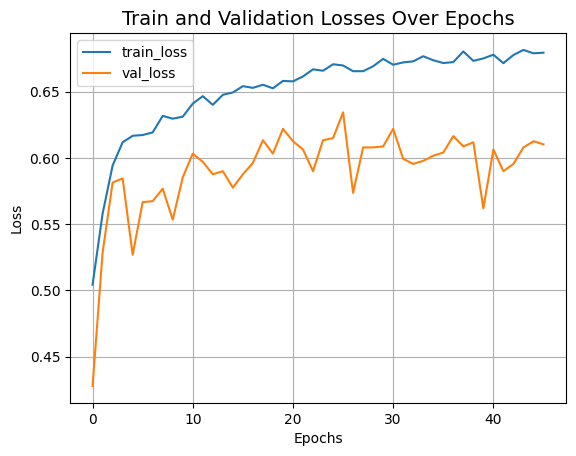

In [9]:
plt.plot(history.history["accuracy"], label="train_loss")
plt.plot(history.history["val_accuracy"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'auc', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_auc', 'val_precision', 'val_recall'])

In [8]:
from keras.models import load_model
load_model("best_model.h5",custom_objects={'PatchExtract':PatchExtract})

TypeError: __init__() missing 1 required positional argument: 'patch_size'

In [9]:
from keras.models import load_model
load_model("best_model.h5",custom_objects={"PatchExtract":PatchExtract})

TypeError: __init__() missing 1 required positional argument: 'patch_size'

In [ ]:
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=100

)

Epoch 1/100
3324/3324 [==============================] - 184s 55ms/step - loss: 0.4592 - accuracy: 0.4100 - auc: 0.7491 - val_loss: 0.4813 - val_accuracy: 0.3302 - val_auc: 0.6963
Epoch 2/100
3324/3324 [==============================] - 185s 56ms/step - loss: 0.4588 - accuracy: 0.4120 - auc: 0.7504 - val_loss: 0.4763 - val_accuracy: 0.3552 - val_auc: 0.7065
Epoch 3/100
3324/3324 [==============================] - 184s 55ms/step - loss: 0.4585 - accuracy: 0.4110 - auc: 0.7510 - val_loss: 0.4817 - val_accuracy: 0.3153 - val_auc: 0.6749
Epoch 4/100
3324/3324 [==============================] - 183s 55ms/step - loss: 0.4580 - accuracy: 0.4126 - auc: 0.7526 - val_loss: 0.4777 - val_accuracy: 0.3558 - val_auc: 0.6915
Epoch 5/100
3324/3324 [==============================] - 184s 55ms/step - loss: 0.4584 - accuracy: 0.4119 - auc: 0.7515 - val_loss: 0.4853 - val_accuracy: 0.3528 - val_auc: 0.6835
Epoch 6/100
3324/3324 [==============================] - 186s 56ms/step - loss: 0.4576 - accuracy: 0

In [3]:
from keras.applications import VGG19,InceptionResNetV2
pre_base = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=None, input_shape=(224, 224, 3),
                                    pooling='avg')
#pre_base.trainable = False
#for layer in pre_base.layers[::2]:
    #layer.trainable = False
    
#for layer in pre_base.layers[:int(len(pre_base.layers)*0.95)]:
    #layer.trainable = False
def build_trainable_model():
  model = Sequential([
      pre_base,
      Flatten(),
      Dense(2048,activation='relu'),
      #Dropout(0.3),
      Dense(3,activation='softmax')
  ])
  return model
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = 'best_model.ckpt'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=50)

pre_model = build_trainable_model()
pre_model.summary()
from keras.metrics import Precision
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[early_stop,checkpoint])

In [4]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

checkpoint_path = 'best_model.ckpt'

checkpoint  = ModelCheckpoint(
    checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

early_stop = EarlyStopping(monitor='val_loss',patience=50)

pre_model = build_trainable_model()
pre_model.summary()
from keras.metrics import Precision
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[early_stop,checkpoint])

In [5]:
pre_model.summary()
from keras.metrics import Precision
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[early_stop,checkpoint])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 2048)              3147776   
                                                                 
 dense_1 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 57,490,659
Trainable params: 57,430,115
Non-trainable params: 60,544
_________________________________________________________________


In [ ]:
from keras.metrics import Precision
pre_model.compile(optimizer=Adam(0.001),loss=CategoricalCrossentropy(),metrics=['accuracy',AUC(),Precision(),Recall()])
history2 = pre_model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=100,
                         callbacks=[early_stop,checkpoint])

Epoch 1/50
722/722 [==============================] - ETA: 0s - loss: 0.8224 - accuracy: 0.6429 - auc: 0.8160 - precision: 0.7097 - recall: 0.5260
Epoch 1: val_loss improved from inf to 1.13446, saving model to best_model.ckpt
722/722 [==============================] - 106s 129ms/step - loss: 0.8224 - accuracy: 0.6429 - auc: 0.8160 - precision: 0.7097 - recall: 0.5260 - val_loss: 1.1345 - val_accuracy: 0.4013 - val_auc: 0.6370 - val_precision: 0.4372 - val_recall: 0.3269
Epoch 2/50
722/722 [==============================] - ETA: 0s - loss: 0.7321 - accuracy: 0.6956 - auc: 0.8558 - precision: 0.7481 - recall: 0.5980
Epoch 2: val_loss improved from 1.13446 to 0.67732, saving model to best_model.ckpt
722/722 [==============================] - 76s 105ms/step - loss: 0.7321 - accuracy: 0.6956 - auc: 0.8558 - precision: 0.7481 - recall: 0.5980 - val_loss: 0.6773 - val_accuracy: 0.6699 - val_auc: 0.8729 - val_precision: 0.7591 - val_recall: 0.6068
Epoch 3/50
722/722 [=========================